# 1 .Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# 2. Charger les données

In [2]:
# Importing the dataset
dataset = pd.read_csv('healthcare.csv', delimiter=';')

In [3]:
# afficher les 5 premiers ligne du dataset
print(dataset.head())

      id  gender  age  hypertension  heart_disease ever_married work_type  \
0  11585  Female  3.0           0.0            0.0           No  children   
1  11608  Female  3.0           0.0            0.0           No  children   
2  11659    Male  3.0           0.0            0.0           No  children   
3  11689    Male  3.0           0.0            0.0           No  children   
4  12048  Female  3.0           0.0            0.0           No  children   

  Residence_type  avg_glucose_level   bmi smoking_status  stroke  
0          Urban              97.84  20.0            NaN     0.0  
1          Rural             159.22  17.2            NaN     0.0  
2          Urban             111.71  17.6            NaN     0.0  
3          Rural              80.43  17.7            NaN     0.0  
4          Rural             102.25  17.8            NaN     0.0  


In [4]:
# afficher les 5 premiers ligne du dataset
print(dataset.tail())


          id  gender   age  hypertension  heart_disease ever_married  \
11700  23251    Male  82.0           0.0            0.0          Yes   
11701  23274  Female  82.0           1.0            1.0           No   
11702  23279    Male  82.0           0.0            0.0          Yes   
11703  23280    Male  82.0           1.0            0.0          Yes   
11704  23287  Female  82.0           0.0            0.0          Yes   

           work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
11700        Private          Rural             108.70  22.5     never smoked   
11701  Self-employed          Rural             165.12  25.4     never smoked   
11702        Private          Rural             228.72   NaN     never smoked   
11703  Self-employed          Rural             201.06  29.2  formerly smoked   
11704        Private          Urban             141.38  20.0  formerly smoked   

       stroke  
11700     1.0  
11701     1.0  
11702     1.0  
11703     1.0  


# 3. Exploration of data

In [5]:
# the shape of the dataset:
print(dataset.shape)

(11705, 12)


In [6]:
# the size of our dataset and we can thenvalidate the datatypes of the input values to check if we need to change/cast any columns datatypes:
print(dataset.columns)
print(dataset.dtypes)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
id                     int64
gender                object
age                  float64
hypertension         float64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke               float64
dtype: object


We have 11705 rows and 12 columns. 10 of the 12 columns are our feature columns, while the last column (Stroke) represents our target column and the first column will be removed. Moreover, our columns appear to consist of numeric data and categoriel data.

In [7]:
# Afficher les valeurs des colonnes catégorielles:
categorical_column = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for var in categorical_column:
    print('les valeurs du variable: '+ var)
    print(dataset[var].unique())

les valeurs du variable: gender
['Female' 'Male' 'Other' nan]
les valeurs du variable: ever_married
['No' 'Yes' nan]
les valeurs du variable: work_type
['children' 'Private' 'Self-employed' 'Never_worked' 'Govt_job' nan]
les valeurs du variable: Residence_type
['Urban' 'Rural' nan]
les valeurs du variable: smoking_status
[nan 'never smoked' 'formerly smoked' 'smokes']


## 3.1 Statistical Summary

In [8]:
# the describe function to go over statistical measures of the dataset:
print(dataset.describe())

                 id           age  hypertension  heart_disease  \
count  11705.000000  11704.000000  11704.000000   11704.000000   
mean   17436.000000     45.680537      0.107741       0.062457   
std     3379.086785     22.020895      0.310066       0.241995   
min    11584.000000      3.000000      0.000000       0.000000   
25%    14510.000000     28.000000      0.000000       0.000000   
50%    17436.000000     47.000000      0.000000       0.000000   
75%    20362.000000     63.000000      0.000000       0.000000   
max    23288.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       11704.000000  11172.000000  11704.000000  
mean          107.166940     28.994674      0.101504  
std            45.953387      7.547116      0.302008  
min            55.010000     11.500000      0.000000  
25%            77.790000     23.900000      0.000000  
50%            92.450000     28.100000      0.000000  
75%           114.82

# 4. Résultats d’analyse univariée

In [9]:
# supprimer la colonne id
# remove the id column from the dataframe
dataset = dataset.iloc[:, 1:13]
print(dataset.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [10]:
# drop duplicate values:
dataset = dataset.drop_duplicates()
print(dataset.shape)

(11299, 11)


In [11]:
#Check for unique datas in each column using
dataset.nunique()

gender                  3
age                    80
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    6814
bmi                   456
smoking_status          3
stroke                  2
dtype: int64

In [12]:
# to find how many unique values numeric features have
for col in dataset.select_dtypes(include=[np.number]).columns:
    print(f"{col} has {dataset[col].nunique()} unique value")

age has 80 unique value
hypertension has 2 unique value
heart_disease has 2 unique value
avg_glucose_level has 6814 unique value
bmi has 456 unique value
stroke has 2 unique value


In [13]:
# to find how many unique values object features have
for col in dataset.select_dtypes(include=['object']).columns:
    print(f"{col} has {dataset[col].nunique()} unique value")

gender has 3 unique value
ever_married has 2 unique value
work_type has 5 unique value
Residence_type has 2 unique value
smoking_status has 3 unique value


In [14]:
dataset.isna().sum()

gender                  1
age                     1
hypertension            1
heart_disease           1
ever_married            1
work_type               1
Residence_type          1
avg_glucose_level       1
bmi                   464
smoking_status       3121
stroke                  1
dtype: int64

In [15]:
# Check entire set for any missing values
dataset.isnull().values.any()

True

In [16]:
# Check for total count of missing datum
dataset.isnull().sum()


gender                  1
age                     1
hypertension            1
heart_disease           1
ever_married            1
work_type               1
Residence_type          1
avg_glucose_level       1
bmi                   464
smoking_status       3121
stroke                  1
dtype: int64

In [17]:
# Cette étape de l exploration consiste à traiter les valeurs catégoriques et manquantes. 
# Il manque des valeurs pour smoking_status et bmi. Donc on va les remplacer les valeurs manqantes.

In [18]:
# remplissez les valeurs manquantes de la colonne smoking_status
dataset['smoking_status'] = dataset['smoking_status'].replace(np.nan, 'No Info')
# Handle missing data or Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy="mean")
imputer = imputer.fit(dataset[['bmi']])
dataset[['bmi']] = imputer.transform(dataset[['bmi']])
# Check for total count of missing datum
dataset.apply(lambda x:sum(x.isnull()),axis=0)

gender               1
age                  1
hypertension         1
heart_disease        1
ever_married         1
work_type            1
Residence_type       1
avg_glucose_level    1
bmi                  0
smoking_status       0
stroke               1
dtype: int64

In [19]:
dataset['gender'] = dataset['gender'].replace(np.nan, 'Male')
dataset['age'] = dataset['age'].replace(np.nan, 30)
dataset['hypertension'] = dataset['hypertension'].replace(np.nan, 0)
dataset['heart_disease'] = dataset['heart_disease'].replace(np.nan, 0)
dataset['ever_married'] = dataset['ever_married'].replace(np.nan, 'No')
dataset['work_type'] = dataset['work_type'].replace(np.nan, 'Private')
dataset['Residence_type'] = dataset['Residence_type'].replace(np.nan, 'Urban')
dataset['avg_glucose_level'] = dataset['avg_glucose_level'].replace(np.nan, 75.18)
dataset['stroke'] = dataset['stroke'].replace(np.nan, 0)

In [20]:
# Check for total count of missing datum
dataset.apply(lambda x:sum(x.isnull()),axis=0)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# 5. Résultats d’analyse bivariée

In [21]:
# décrire toutes les variables quantitatives(numériques) du jeu de données
dataset.describe().round(2)

age  hypertension  heart_disease  avg_glucose_level       bmi  \
count  11299.00       11299.0       11299.00           11299.00  11299.00   
mean      44.88           0.1           0.06             106.20     28.96   
std       21.87           0.3           0.23              45.00      7.42   
min        3.00           0.0           0.00              55.01     11.50   
25%       27.00           0.0           0.00              77.66     24.00   
50%       46.00           0.0           0.00              92.13     28.50   
75%       62.00           0.0           0.00             113.90     32.70   
max       82.00           1.0           1.00             291.05     89.00   

         stroke  
count  11299.00  
mean       0.07  
std        0.25  
min        0.00  
25%        0.00  
50%        0.00  
75%        0.00  
max        1.00

In [22]:
# Afficher les nombres de chaque valeurs du variables:
print(dataset["stroke"].value_counts())

stroke
0.0    10517
1.0      782
Name: count, dtype: int64


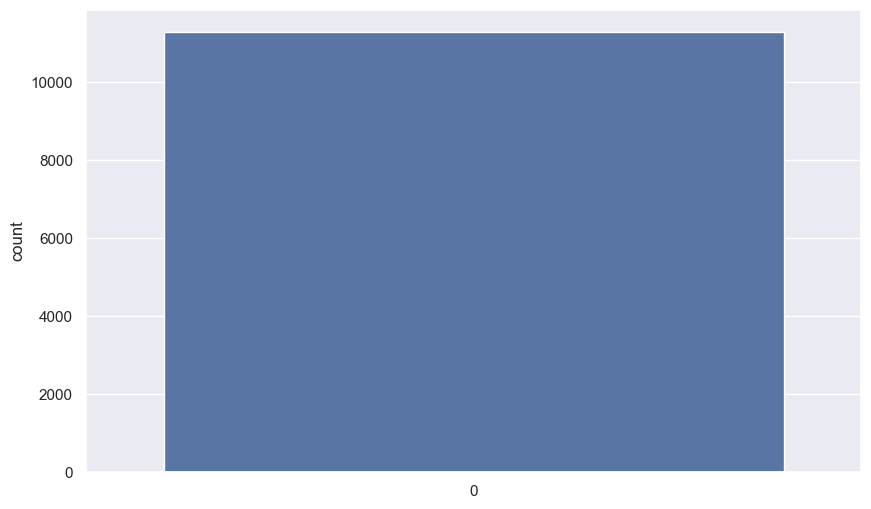

In [23]:
# Representation graphique du variables stroke:
sns.set()
sns.countplot(dataset["stroke"])
plt.show()

Our data set consists of 11298 individuals and only 782 individuals have stroke; evidently, our data set is imbalanced. 

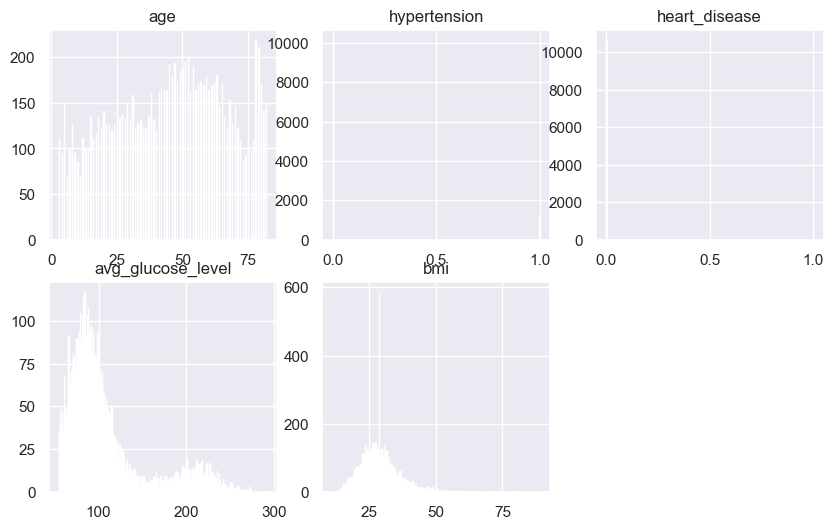

In [24]:
# Représentation graphique des variables quantitatives(numériques) avec des histogrmmes:
numerical_var = ['age', 'hypertension','heart_disease' , 'avg_glucose_level', 'bmi']
lig = 2
col = 3 
for num, val in enumerate(numerical_var):
    plt.subplot(lig, col, num+1)
    plt.hist(dataset[val], bins=500) 
    plt.title(val)

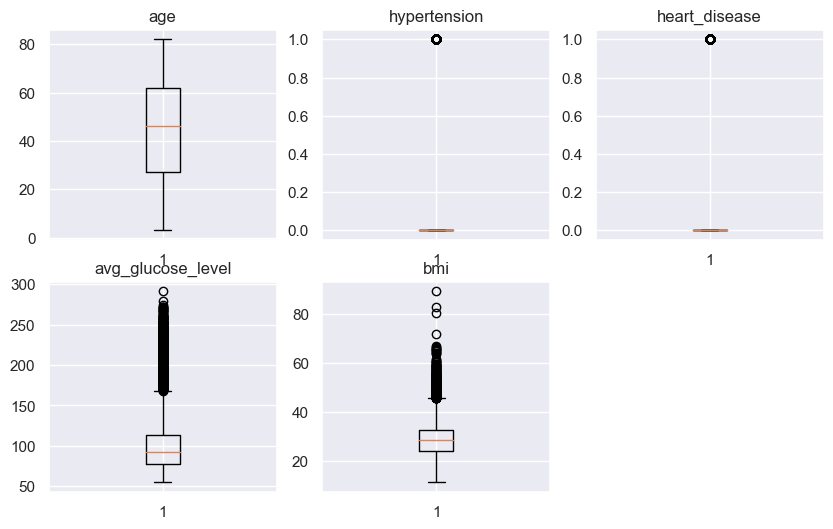

In [25]:
# Représentation graphique des variables quantitatives(numériques) avec boîtes à moustaches des variables:    
for num, val in enumerate(numerical_var):
    plt.subplot(lig, col, num+1)
    plt.boxplot(dataset[val])
    plt.title(val)

In [26]:
# compute the number of outliers present in each of the columns of our data set:
dataset_num = dataset[['age', 'hypertension','heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
for column in dataset_num.columns[:-1]:
    print(dataset_num[column])
    Q1 = dataset_num[column].quantile(0.25)
    Q3 = dataset_num[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_range = (dataset_num[column] < (Q1 - 1.5*IQR)) | (dataset_num[column] > (Q3 + 1.5*IQR))
    num_outliers = dataset_num[column][outlier_range].count()   
    print(f"{column}: {num_outliers} outliers")

0         3.0
1         3.0
2         3.0
3         3.0
4         3.0
         ... 
11680    82.0
11681    82.0
11682    82.0
11683    82.0
11684    82.0
Name: age, Length: 11299, dtype: float64
age: 0 outliers
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11680    0.0
11681    0.0
11682    0.0
11683    0.0
11684    0.0
Name: hypertension, Length: 11299, dtype: float64
hypertension: 1155 outliers
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11680    0.0
11681    0.0
11682    0.0
11683    1.0
11684    1.0
Name: heart_disease, Length: 11299, dtype: float64
heart_disease: 653 outliers
0         97.84
1        159.22
2        111.71
3         80.43
4        102.25
          ...  
11680    214.87
11681     90.88
11682    119.18
11683    125.31
11684    118.61
Name: avg_glucose_level, Length: 11299, dtype: float64
avg_glucose_level: 1421 outliers
0        20.0
1        17.2
2        17.6
3        17.7
4        17.8
         ...

On dirait que notre ensemble de données contient un grand nombre de valeurs aberrantes.

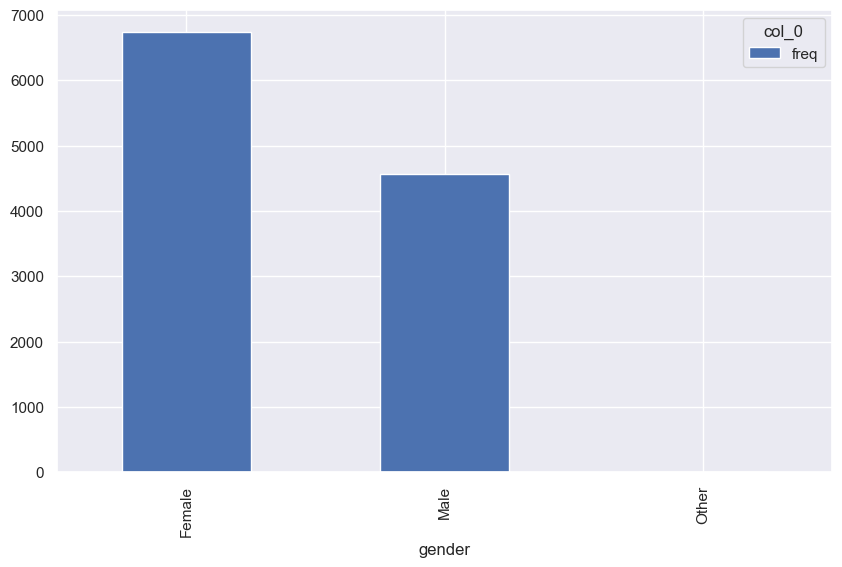

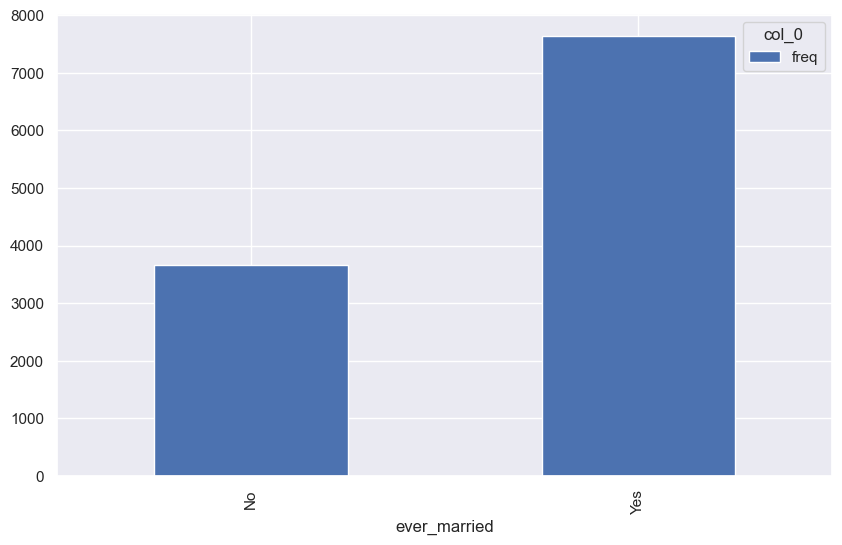

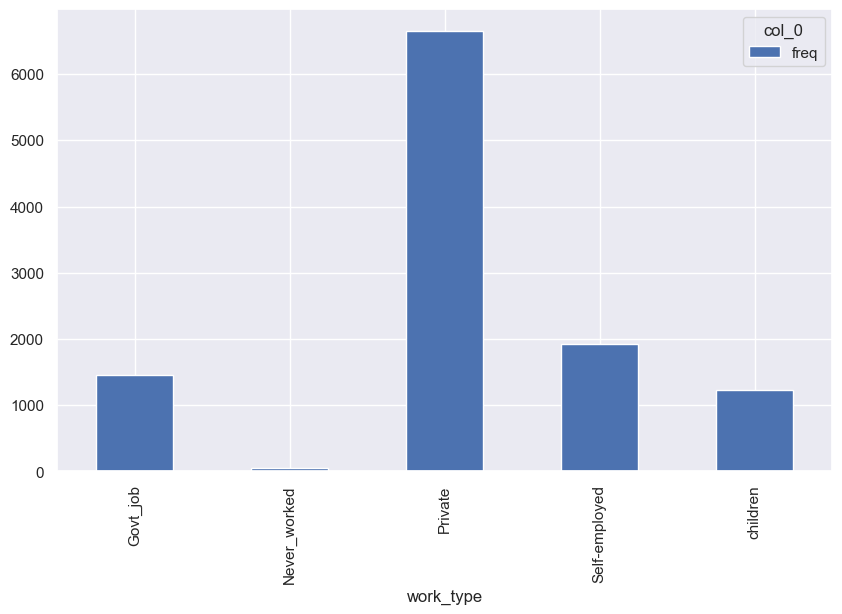

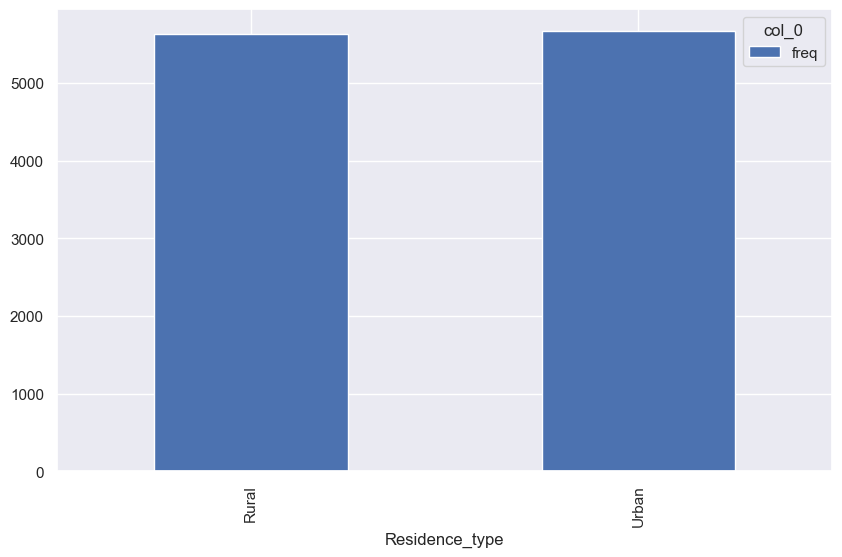

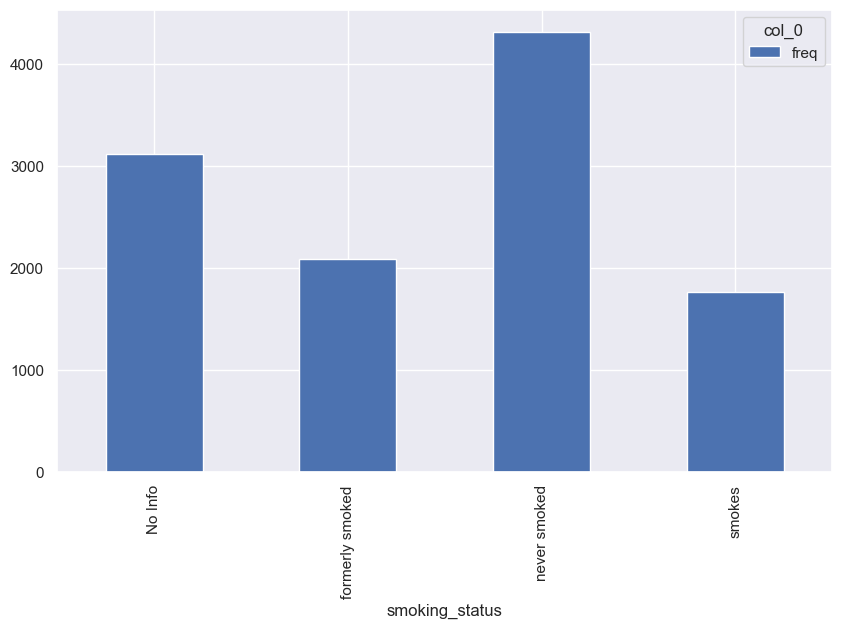

In [27]:
# Repésentation des variables qualitative (catégorielles)   
for var in categorical_column:
    t=pd.crosstab(dataset[var],"freq") 
    t.plot.bar() 

# 6. Statistiques descriptives bivariées

# 6.1 Quantitative - quantitative

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='hypertension', ylabel='age'>,
        <Axes: xlabel='heart_disease', ylabel='age'>,
        <Axes: xlabel='avg_glucose_level', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='stroke', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='hypertension'>,
        <Axes: xlabel='hypertension', ylabel='hypertension'>,
        <Axes: xlabel='heart_disease', ylabel='hypertension'>,
        <Axes: xlabel='avg_glucose_level', ylabel='hypertension'>,
        <Axes: xlabel='bmi', ylabel='hypertension'>,
        <Axes: xlabel='stroke', ylabel='hypertension'>],
       [<Axes: xlabel='age', ylabel='heart_disease'>,
        <Axes: xlabel='hypertension', ylabel='heart_disease'>,
        <Axes: xlabel='heart_disease', ylabel='heart_disease'>,
        <Axes: xlabel='avg_glucose_level', ylabel='heart_disease'>,
        <Axes: xlabel='bmi', ylabel='heart_disease'>,
        <Axes: xlabel='stroke', ylabel='h

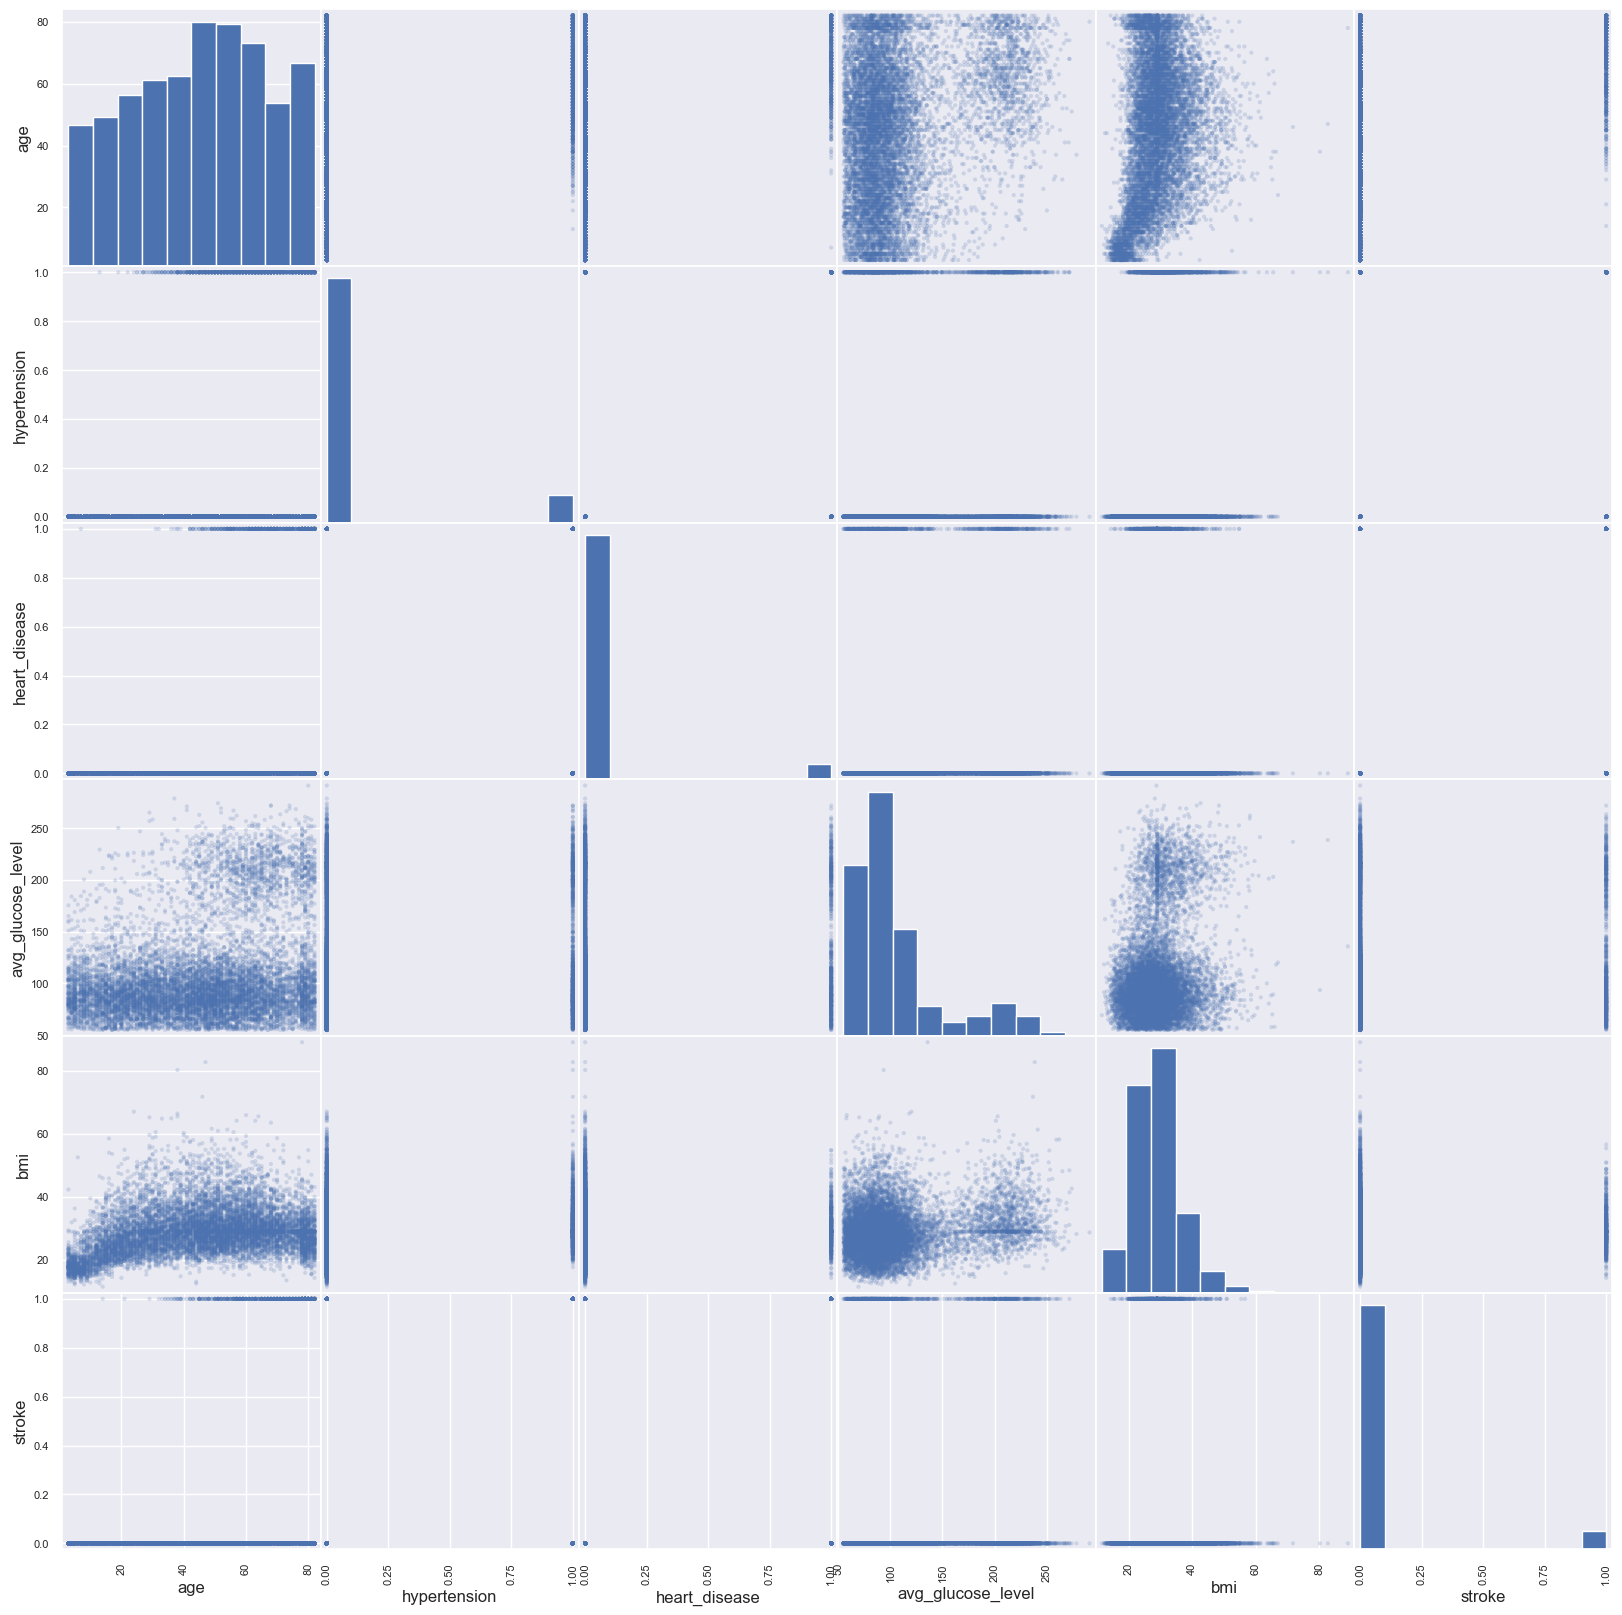

In [28]:
# First graphe
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha=0.2, figsize=(20,20))

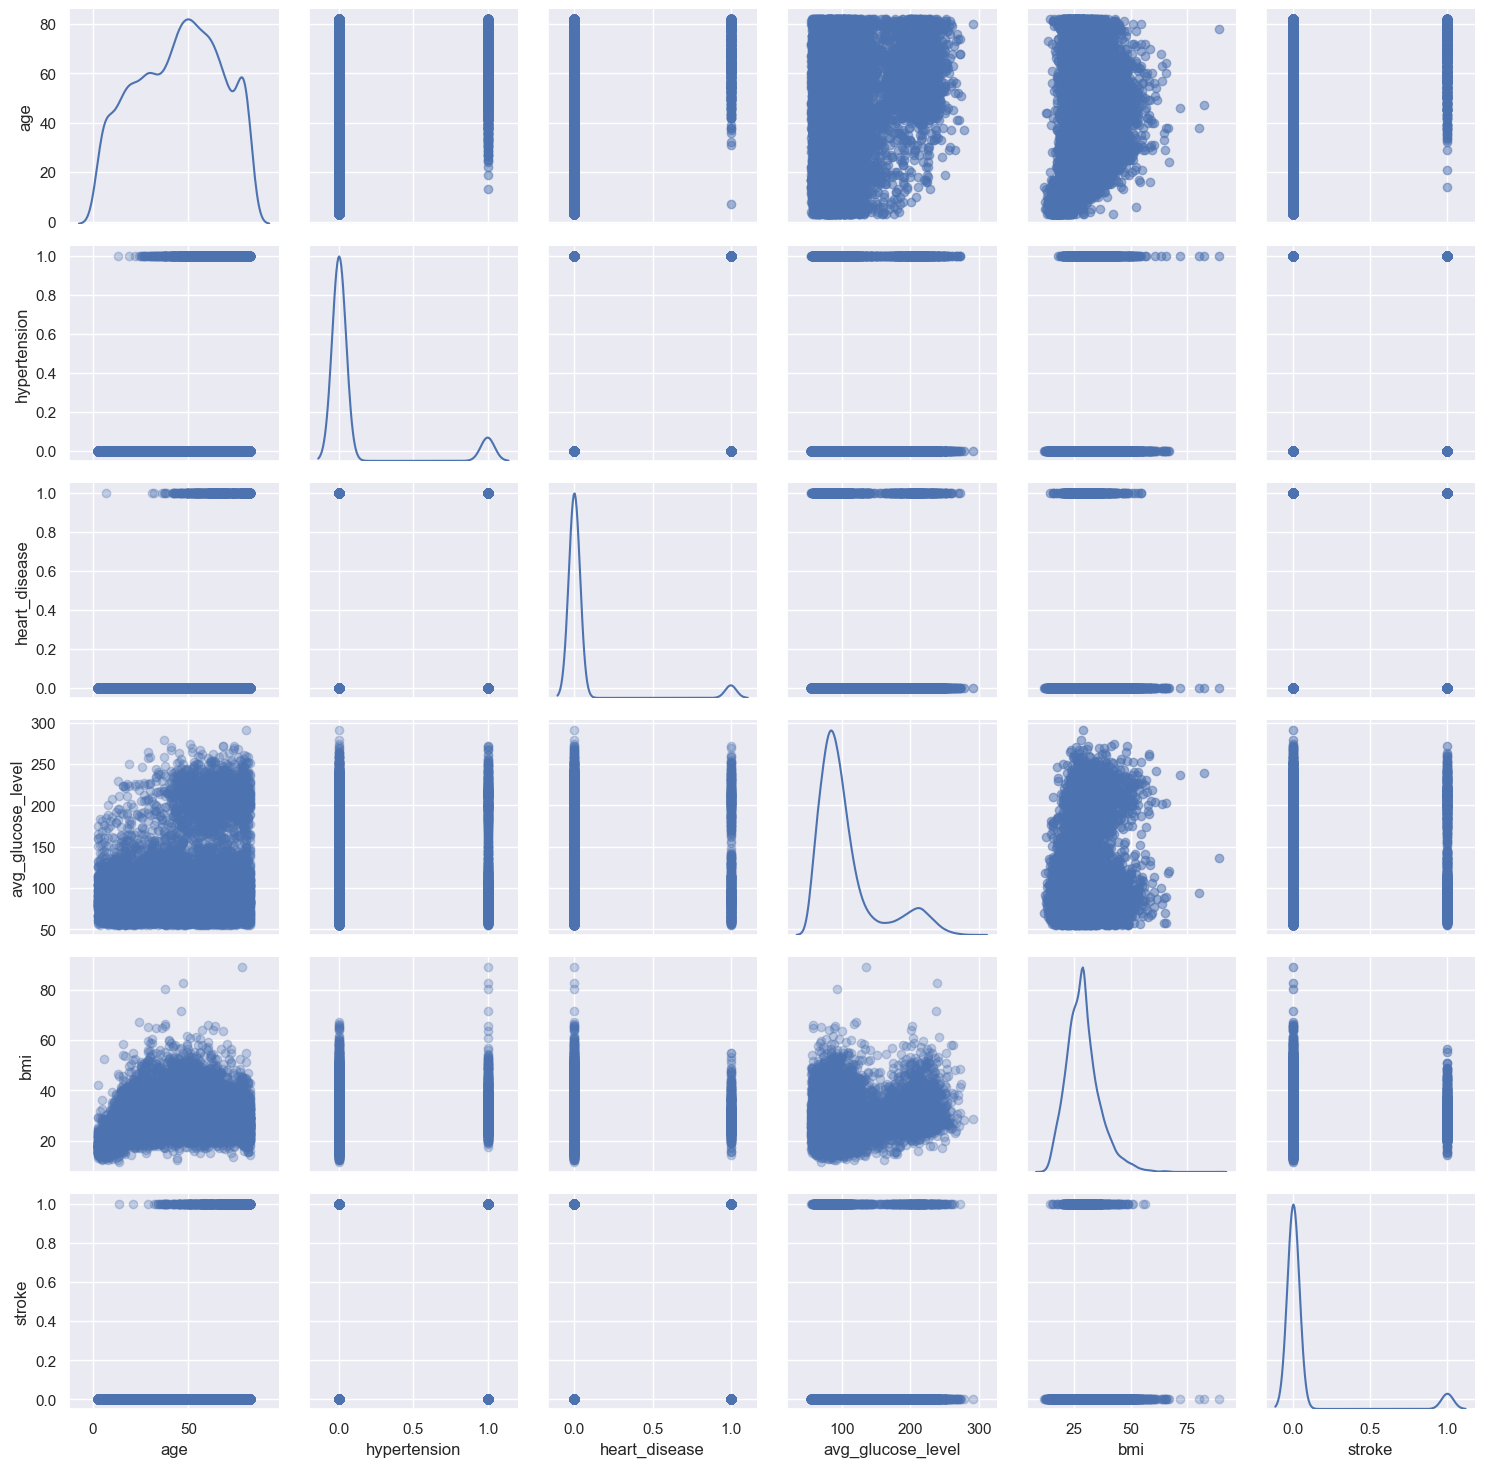

In [29]:
# Second graphe
sns.set()
g=sns.PairGrid(data=dataset, diag_sharey=False)
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, fit_reg=False, scatter_kws={'alpha':0.3})
g.add_legend()

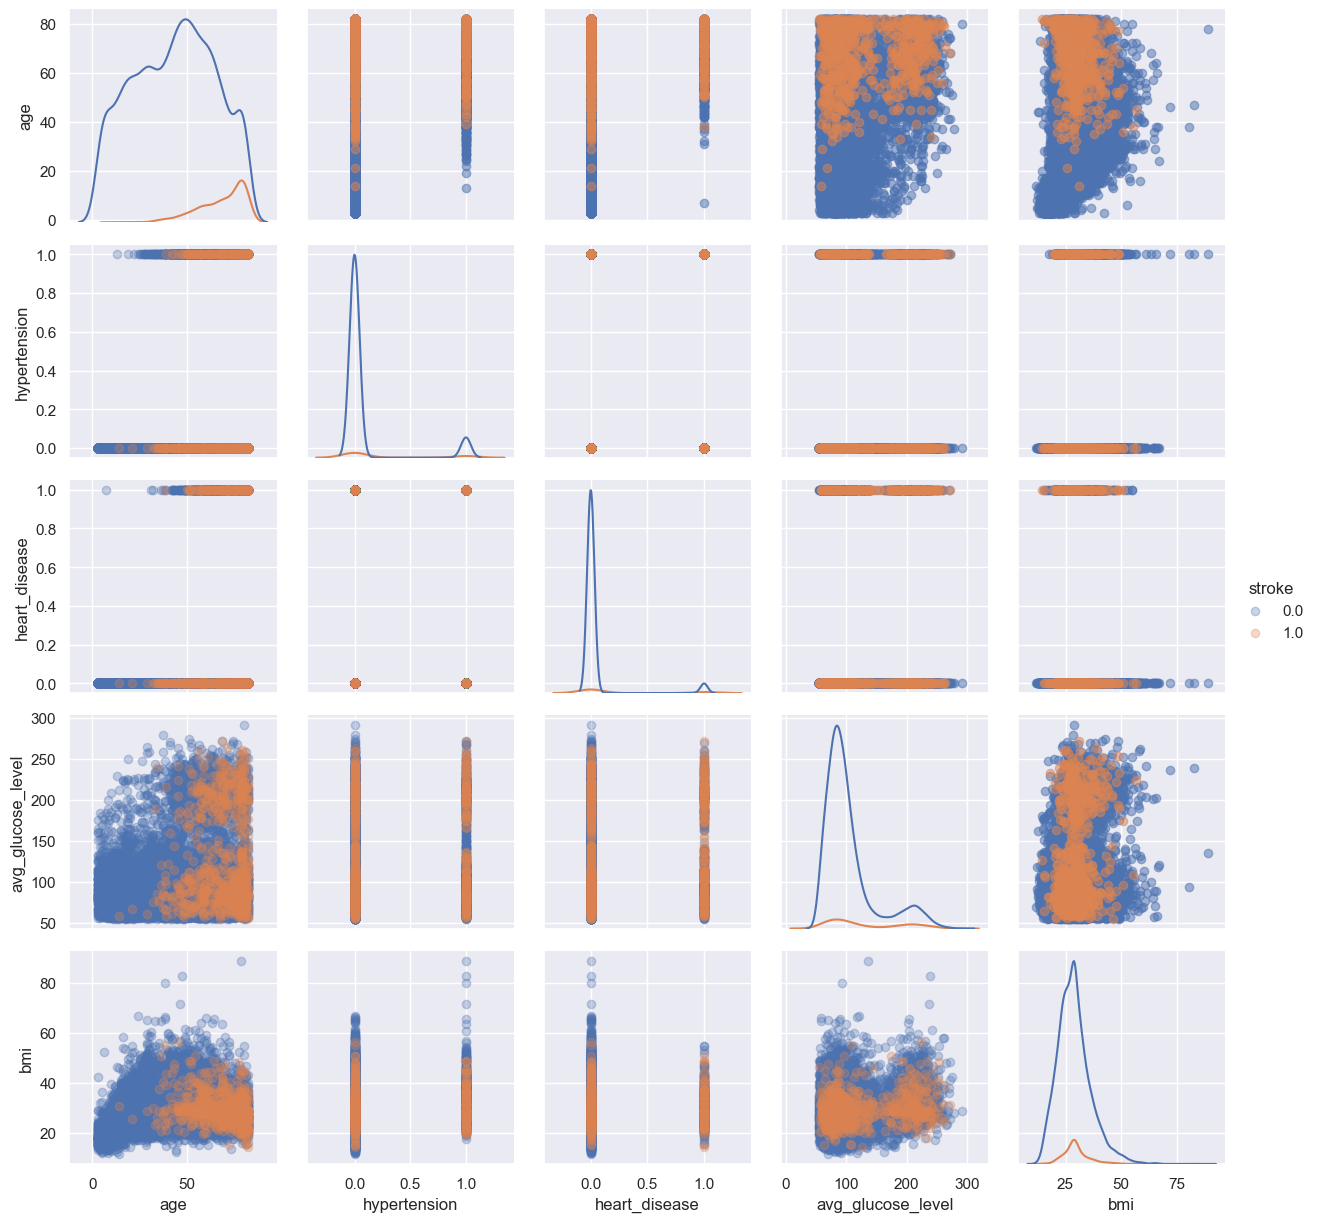

In [30]:
# Third graphe
g=sns.PairGrid(data=dataset, diag_sharey=False, hue='stroke')
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, fit_reg=False, scatter_kws={'alpha':0.3})
g.add_legend()

In [31]:
# Correlation pour les variables numériques
dataset.describe().transpose()  

count        mean        std    min    25%    50%  \
age                11299.0   44.877954  21.872283   3.00  27.00  46.00   
hypertension       11299.0    0.102221   0.302953   0.00   0.00   0.00   
heart_disease      11299.0    0.057793   0.233361   0.00   0.00   0.00   
avg_glucose_level  11299.0  106.204921  45.000372  55.01  77.66  92.13   
bmi                11299.0   28.963710   7.424683  11.50  24.00  28.50   
stroke             11299.0    0.069210   0.253822   0.00   0.00   0.00   

                       75%     max  
age                 62.000   82.00  
hypertension         0.000    1.00  
heart_disease        0.000    1.00  
avg_glucose_level  113.905  291.05  
bmi                 32.700   89.00  
stroke               0.000    1.00

The features neither have a strong correlation with one another nor the target variable. Thus, we should be able to incorporate all of them when building our final model.
on observe une très faible corrélation entre ces variables

# 6.2 Qualitative - qualitative

<Axes: xlabel='stroke'>

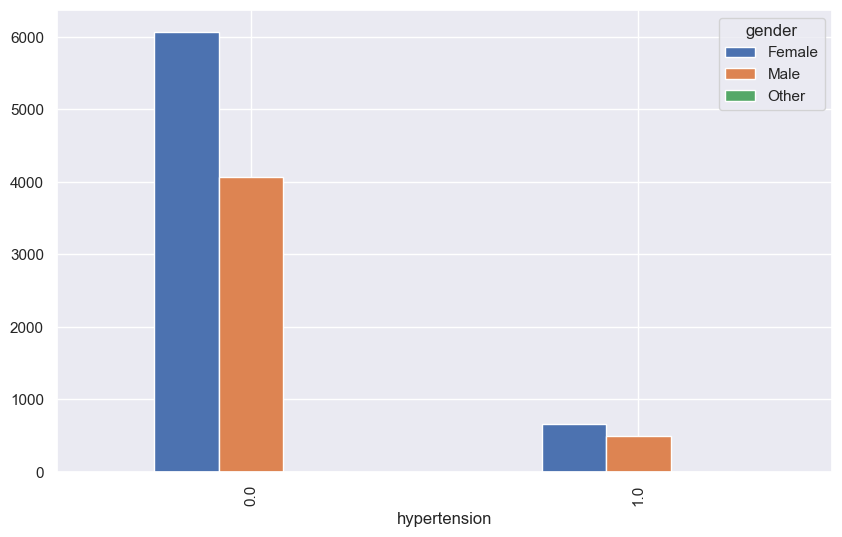

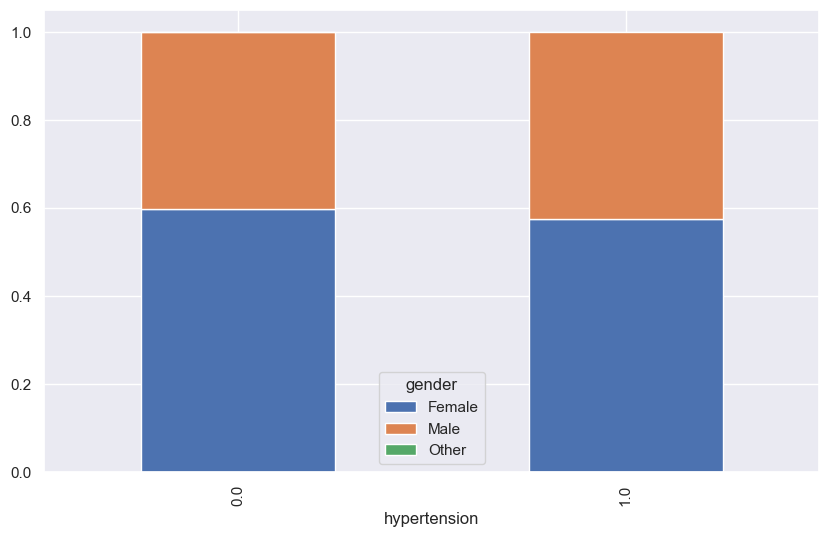

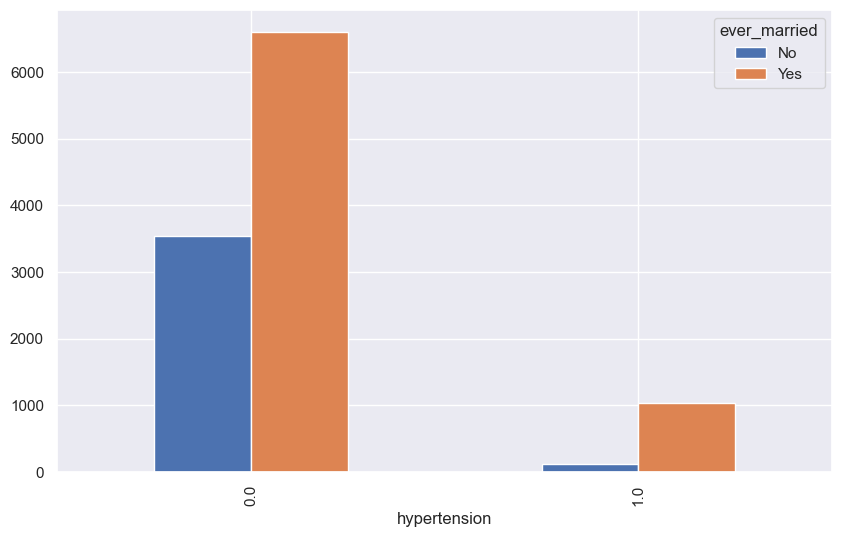

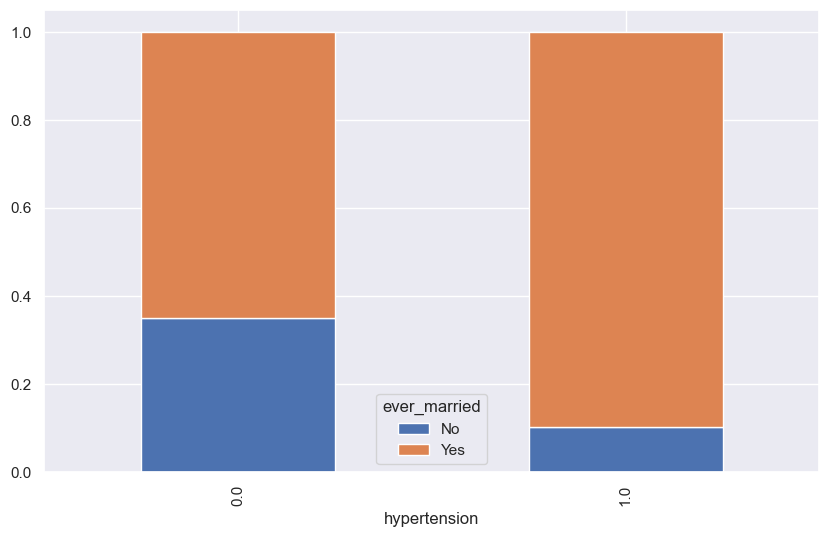

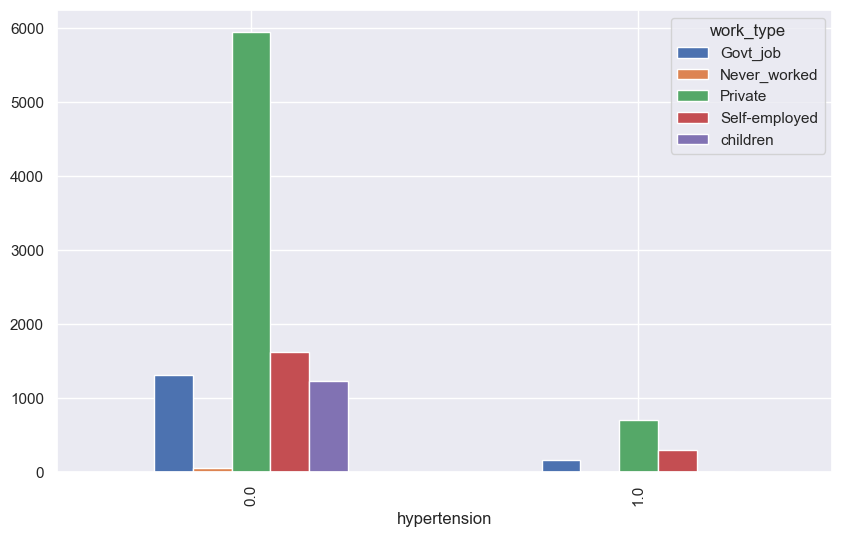

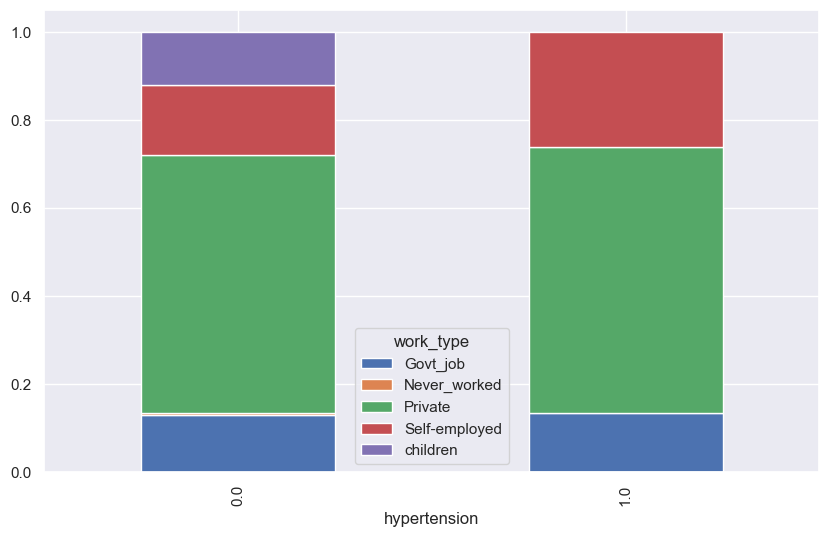

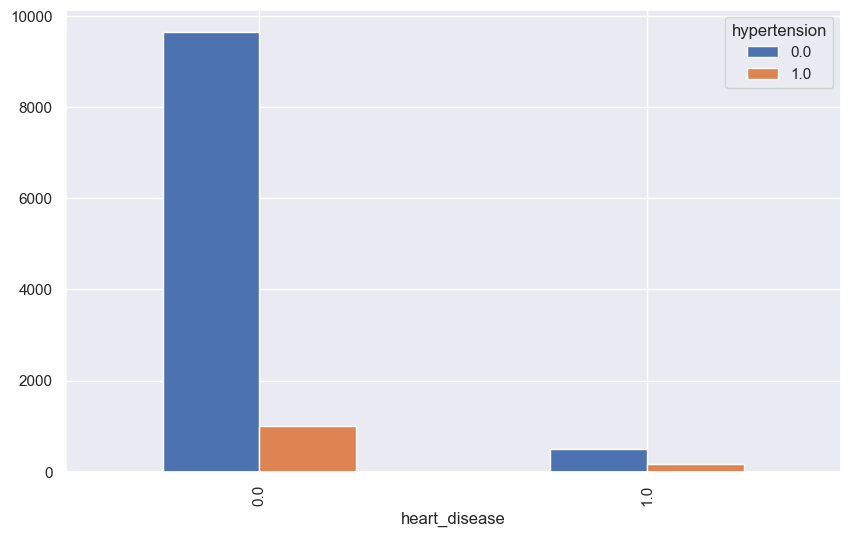

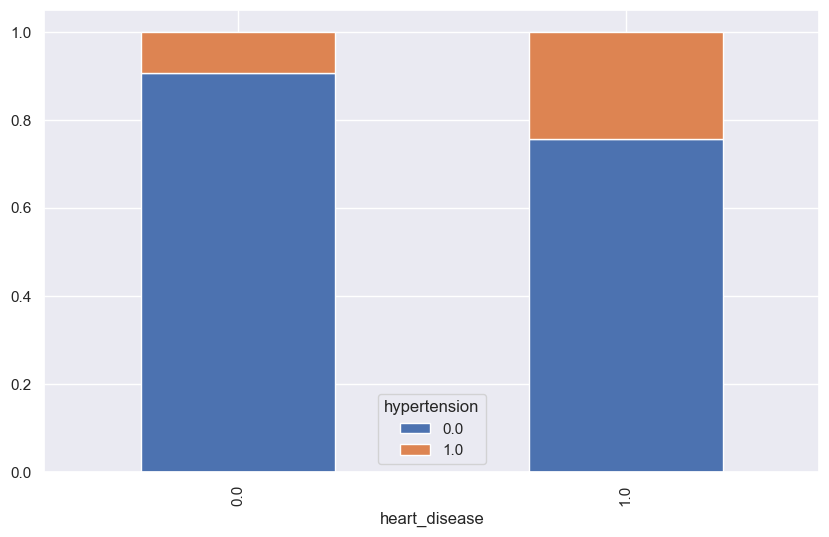

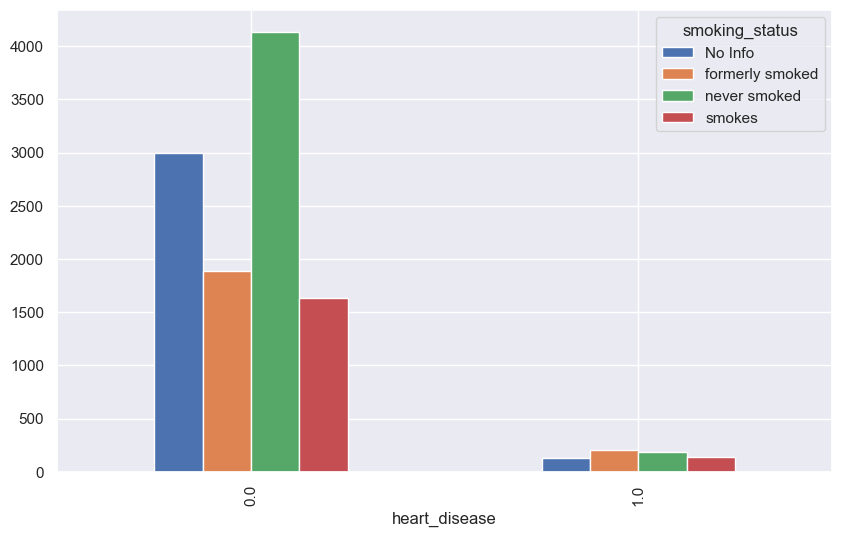

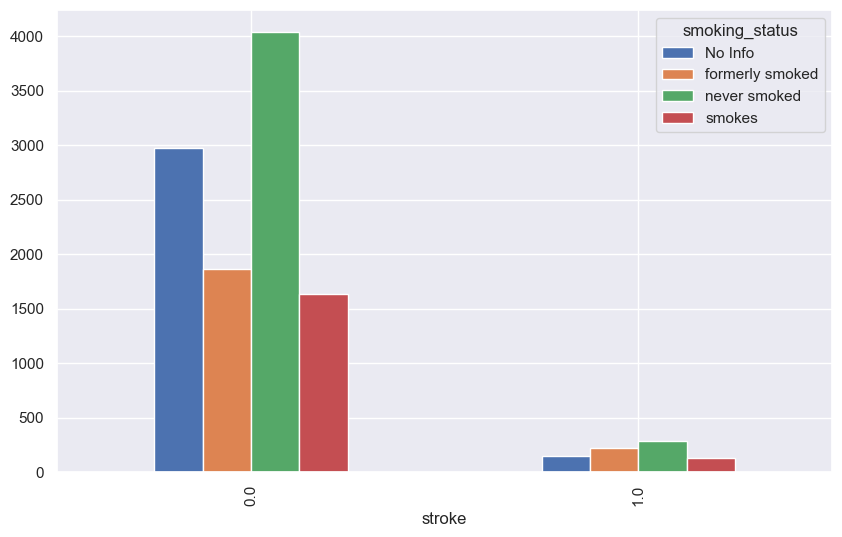

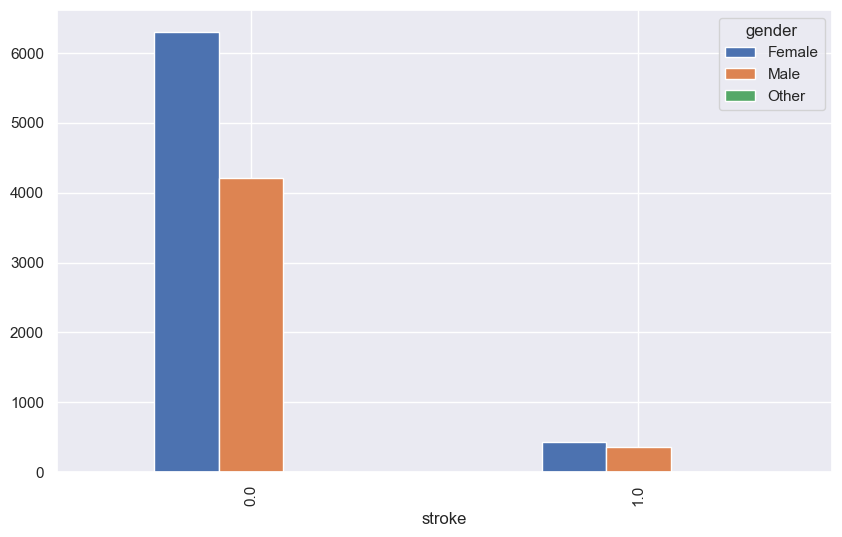

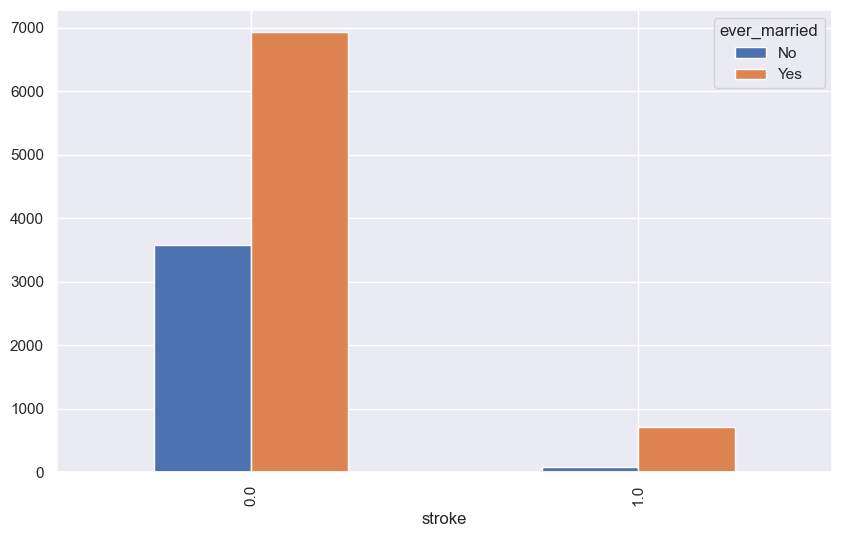

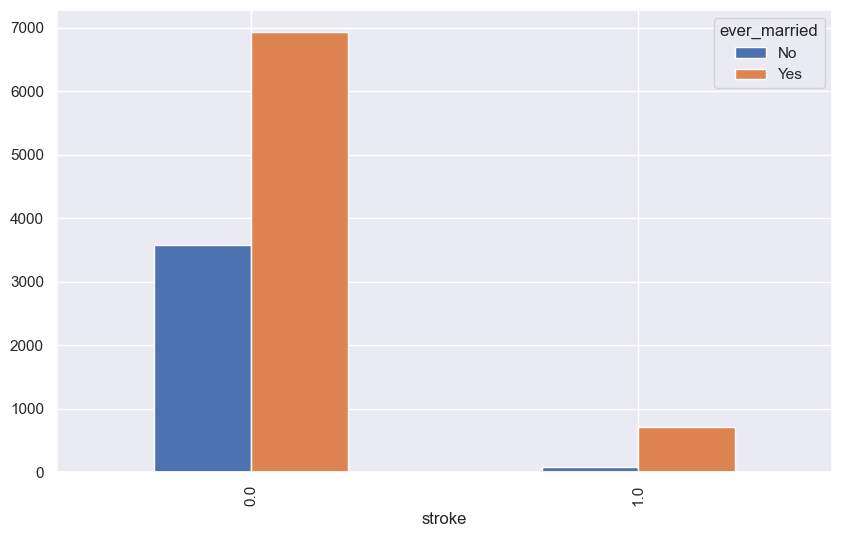

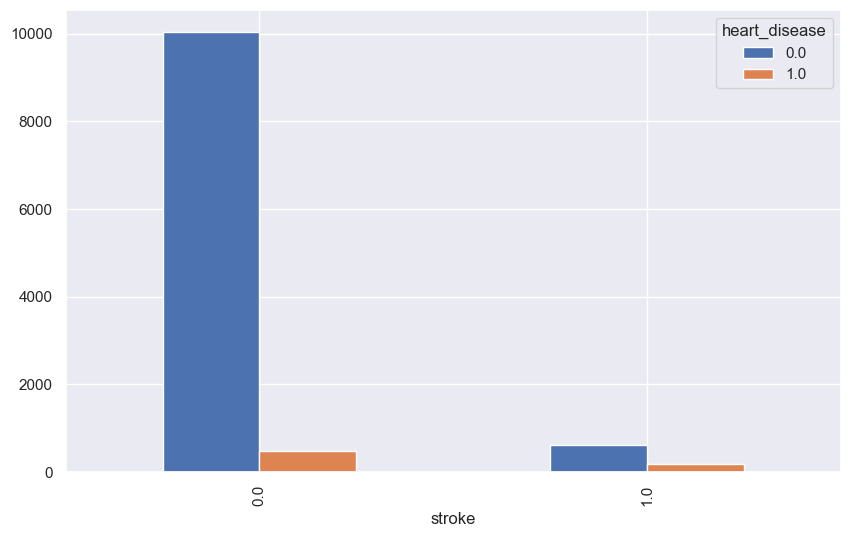

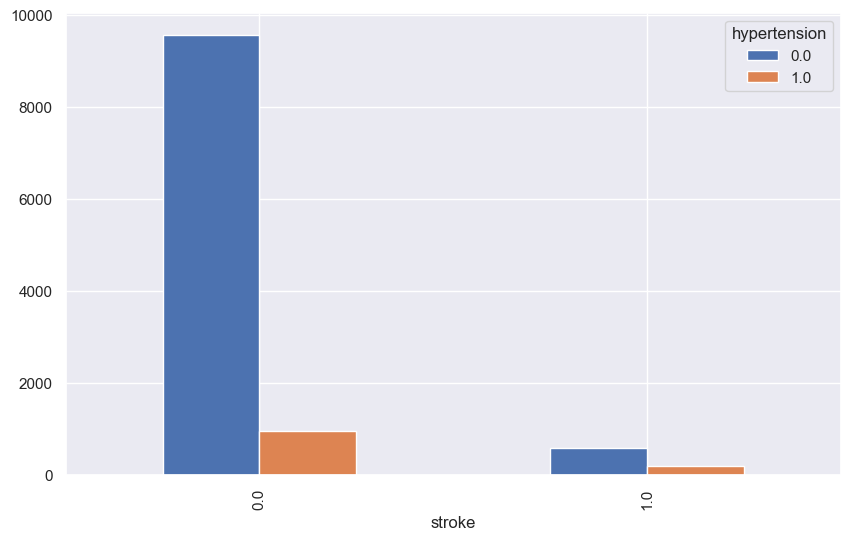

In [32]:
t = pd.crosstab(dataset.hypertension, dataset.gender)
t.plot.bar()
t = pd.crosstab(dataset.hypertension, dataset.gender, normalize="index")
t.plot.bar(stacked=True)

t=pd.crosstab(dataset.hypertension, dataset.ever_married)
t.plot.bar()
t=pd.crosstab(dataset.hypertension, dataset.ever_married, normalize="index")
t.plot.bar(stacked=True)

t=pd.crosstab(dataset.hypertension, dataset.work_type)
t.plot.bar()
t=pd.crosstab(dataset.hypertension, dataset.work_type, normalize="index")
t.plot.bar(stacked=True)

t=pd.crosstab(dataset.heart_disease, dataset.hypertension)
t.plot.bar()
t=pd.crosstab(dataset.heart_disease, dataset.hypertension, normalize="index")
t.plot.bar(stacked=True)

t=pd.crosstab(dataset.heart_disease, dataset.smoking_status)
t.plot.bar()

t=pd.crosstab(dataset.stroke, dataset.smoking_status)
t.plot.bar()

t=pd.crosstab(dataset.stroke, dataset.gender)
t.plot.bar()

t=pd.crosstab(dataset.stroke, dataset.ever_married)
t.plot.bar()

t=pd.crosstab(dataset.stroke, dataset.ever_married)
t.plot.bar()

t=pd.crosstab(dataset.stroke, dataset.heart_disease)
t.plot.bar()

t=pd.crosstab(dataset.stroke, dataset.hypertension)
t.plot.bar()

# 6.3 Qualitative - quantitative

In [33]:
# On peut comparer certains indicateurs (moyenne, médiane) d’une variable quantitative selon les modalités d’une variable qualitative.

# Comparer les mesures statistiques d’une variable quantitative selon les modalités de gender
dataset.groupby("gender").describe()

age                                                      \
         count       mean        std   min   25%   50%   75%   max   
gender                                                               
Female  6733.0  45.256201  21.387684   3.0  28.0  46.0  62.0  82.0   
Male    4565.0  44.327492  22.555771   3.0  26.0  47.0  62.0  82.0   
Other      1.0  11.000000        NaN  11.0  11.0  11.0  11.0  11.0   

       hypertension            ...   bmi        stroke                      \
              count      mean  ...   75%   max   count      mean       std   
gender                         ...                                           
Female       6733.0  0.098470  ...  33.1  82.7  6733.0  0.063865  0.244530   
Male         4565.0  0.107777  ...  32.3  89.0  4565.0  0.077108  0.266793   
Other           1.0  0.000000  ...  18.1  18.1     1.0  0.000000       NaN   

                                 
        min  25%  50%  75%  max  
gender                           
Female  0.0  0.0  0.0  0.0  1.0  
Male    0.0  0.0  0.0  0.0  1.0  
Other   0.0  0.0  0.0  0.0  0.0  

[3 rows x 48 columns]

In [34]:
# Comparer les mesures statistiques d’une variable quantitative selon les modalités de ever_married
dataset.groupby("ever_married").describe()

age                                                      \
               count       mean        std   min   25%   50%   75%   max   
ever_married                                                               
No            3660.0  23.821585  17.757426   3.0  12.0  19.0  30.0  82.0   
Yes           7639.0  54.966488  15.566990  17.0  43.0  55.0  67.0  82.0   

             hypertension            ...   bmi        stroke            \
                    count      mean  ...   75%   max   count      mean   
ever_married                         ...                                 
No                 3660.0  0.031967  ...  29.9  80.2  3660.0  0.021585   
Yes                7639.0  0.135882  ...  33.7  89.0  7639.0  0.092028   

                                                 
                   std  min  25%  50%  75%  max  
ever_married                                     
No            0.145343  0.0  0.0  0.0  0.0  1.0  
Yes           0.289084  0.0  0.0  0.0  0.0  1.0  

[2 rows x 48 columns]

In [35]:
# Comparer les mesures statistiques d’une variable quantitative selon les modalités de work_type
dataset.groupby("work_type").describe()

age                                                      \
                count       mean        std   min   25%   50%   75%   max   
work_type                                                                   
Govt_job       1459.0  49.537354  15.638990  14.0  38.0  50.0  61.0  82.0   
Never_worked     51.0  17.549020   4.211003  13.0  14.5  17.0  18.5  30.0   
Private        6644.0  46.287327  18.707959  13.0  30.0  46.0  61.0  82.0   
Self-employed  1919.0  60.445545  16.659162  13.0  49.0  63.0  75.0  82.0   
children       1226.0   8.464927   3.679285   3.0   5.0   8.0  12.0  16.0   

              hypertension            ...        bmi        stroke            \
                     count      mean  ...        75%   max   count      mean   
work_type                             ...                                      
Govt_job            1459.0  0.106237  ...  34.050000  65.9  1459.0  0.061001   
Never_worked          51.0  0.000000  ...  28.581855  42.9    51.0  0.000000   
Private             6644.0  0.104907  ...  33.500000  89.0  6644.0  0.066376   
Self-employed       1919.0  0.157895  ...  32.700000  64.1  1919.0  0.130797   
children            1226.0  0.000000  ...  22.700000  54.0  1226.0  0.000816   

                                                  
                    std  min  25%  50%  75%  max  
work_type                                         
Govt_job       0.239414  0.0  0.0  0.0  0.0  1.0  
Never_worked   0.000000  0.0  0.0  0.0  0.0  0.0  
Private        0.248956  0.0  0.0  0.0  0.0  1.0  
Self-employed  0.337266  0.0  0.0  0.0  0.0  1.0  
children       0.028560  0.0  0.0  0.0  0.0  1.0  

[5 rows x 48 columns]

In [36]:
# Comparer les mesures statistiques d’une variable quantitative selon les modalités de Residence_type
dataset.groupby("Residence_type").describe()

age                                                     \
                 count       mean        std  min   25%   50%   75%   max   
Residence_type                                                              
Rural           5632.0  44.651456  21.906214  3.0  27.0  46.0  62.0  82.0   
Urban           5667.0  45.103053  21.838115  3.0  28.0  47.0  63.0  82.0   

               hypertension            ...   bmi        stroke            \
                      count      mean  ...   75%   max   count      mean   
Residence_type                         ...                                 
Rural                5632.0  0.100852  ...  32.7  89.0  5632.0  0.068182   
Urban                5667.0  0.103582  ...  32.7  82.7  5667.0  0.070231   

                                                   
                     std  min  25%  50%  75%  max  
Residence_type                                     
Rural           0.252080  0.0  0.0  0.0  0.0  1.0  
Urban           0.255559  0.0  0.0  0.0  0.0  1.0  

[2 rows x 48 columns]

In [37]:
# Comparer les mesures statistiques d’une variable quantitative selon les modalités de smoking_status
dataset.groupby("smoking_status").describe()

age                                                      \
                  count       mean        std   min   25%   50%   75%   max   
smoking_status                                                                
No Info          3121.0  33.377443  24.658588   3.0  10.0  29.0  54.0  82.0   
formerly smoked  2088.0  55.700670  18.296471  10.0  43.0  59.0  70.0  82.0   
never smoked     4322.0  47.089079  19.436202  10.0  31.0  47.0  62.0  82.0   
smokes           1768.0  46.992647  16.660240  13.0  33.0  47.0  60.0  82.0   

                hypertension            ...     bmi        stroke            \
                       count      mean  ...     75%   max   count      mean   
smoking_status                          ...                                   
No Info               3121.0  0.042615  ...  30.300  80.2  3121.0  0.046139   
formerly smoked       2088.0  0.139368  ...  33.600  65.9  2088.0  0.105843   
never smoked          4322.0  0.121703  ...  33.475  89.0  4322.0  0.065710   
smokes                1768.0  0.115950  ...  33.025  60.5  1768.0  0.075226   

                                                    
                      std  min  25%  50%  75%  max  
smoking_status                                      
No Info          0.209820  0.0  0.0  0.0  0.0  1.0  
formerly smoked  0.307710  0.0  0.0  0.0  0.0  1.0  
never smoked     0.247804  0.0  0.0  0.0  0.0  1.0  
smokes           0.263831  0.0  0.0  0.0  0.0  1.0  

[4 rows x 48 columns]

In [38]:
# Les modalités de stroke
dataset.groupby("stroke").count()

gender    age  hypertension  heart_disease  ever_married  work_type  \
stroke                                                                        
0.0      10517  10517         10517          10517         10517      10517   
1.0        782    782           782            782           782        782   

        Residence_type  avg_glucose_level    bmi  smoking_status  
stroke                                                            
0.0              10517              10517  10517           10517  
1.0                782                782    782             782

# Pairplot for better visualisation

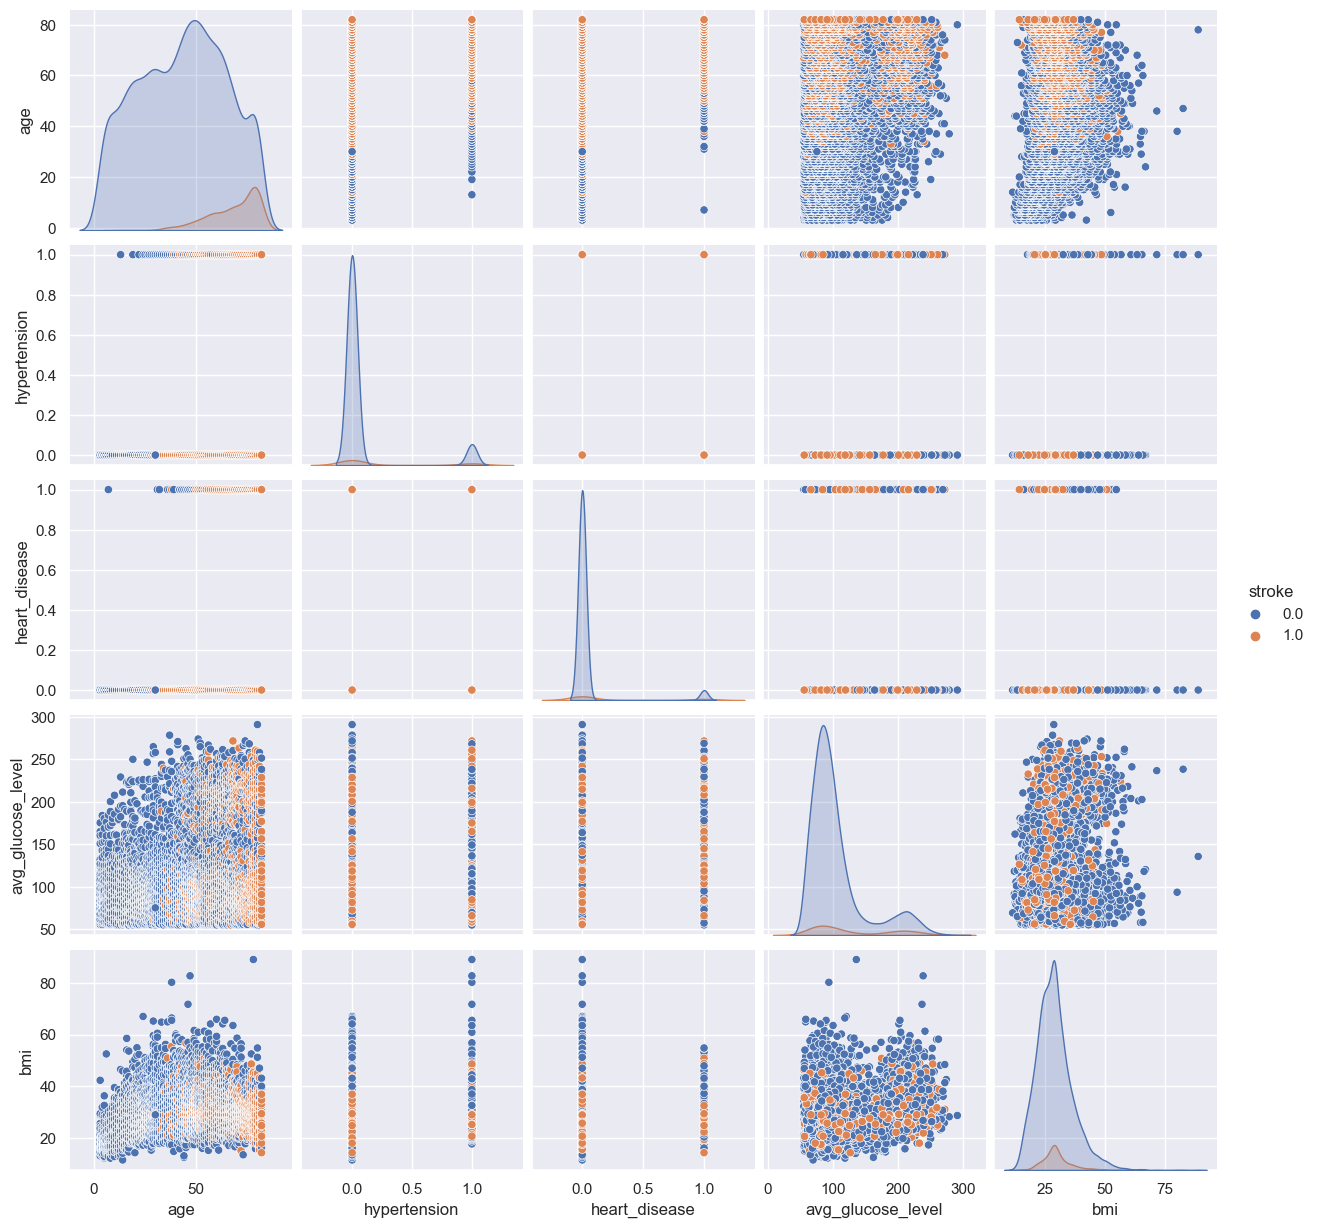

In [39]:
sns.pairplot(dataset, hue="stroke")

# 7. Data Preprocessing

C’est la partie où nous convertissons la variable catégorique en forme numérique et créons un seul vecteur combinant toutes les entités en entrée

In [8]:
data = pd.read_csv('healthcare.csv', delimiter=';', header='infer')

In [9]:
data.head()

id  gender  age  hypertension  heart_disease ever_married work_type  \
0  11585  Female    3             0              0           No  children   
1  11608  Female    3             0              0           No  children   
2  11659    Male    3             0              0           No  children   
3  11689    Male    3             0              0           No  children   
4  12048  Female    3             0              0           No  children   

  Residence_type  avg_glucose_level   bmi smoking_status  stroke  
0          Urban              97.84  20.0            NaN       0  
1          Rural             159.22  17.2            NaN       0  
2          Urban             111.71  17.6            NaN       0  
3          Rural              80.43  17.7            NaN       0  
4          Rural             102.25  17.8            NaN       0

In [10]:
# Check for their Count and Datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22983 entries, 0 to 22982
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22983 non-null  int64  
 1   gender             22983 non-null  object 
 2   age                22983 non-null  int64  
 3   hypertension       22983 non-null  int64  
 4   heart_disease      22983 non-null  int64  
 5   ever_married       22983 non-null  object 
 6   work_type          22983 non-null  object 
 7   Residence_type     22983 non-null  object 
 8   avg_glucose_level  22983 non-null  float64
 9   bmi                20502 non-null  float64
 10  smoking_status     17702 non-null  object 
 11  stroke             22983 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


In [11]:
# Check for total count of missing data
data.isnull().sum()
data.apply(lambda x:sum(x.isnull()),axis=0)

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  2481
smoking_status       5281
stroke                  0
dtype: int64

In [12]:
# supprimer la colonne id puisque n'a aucun importance dans notre modèle de classification
# remove the id column from the dataframe
data = data.drop(['id'], axis=1)
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [13]:
# Check for Duplicate Values
data.duplicated().value_counts()

True     11685
False    11298
Name: count, dtype: int64

In [14]:
# drop duplicate values:
#data = data.drop_duplicates()
print(data.shape)

(22983, 11)


In [15]:
# Check for total count of missing datum
data.isnull().sum()
data.apply(lambda x:sum(x.isnull()),axis=0)

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  2481
smoking_status       5281
stroke                  0
dtype: int64

In [16]:
# remplissez les valeurs manquantes de la colonne smoking_status
data['smoking_status'] = data['smoking_status'].replace(np.nan, 'No Info')
data['gender'] = data['gender'].replace(np.nan, 'Male')
data['age'] = data['age'].replace(np.nan, 30)
data['hypertension'] = data['hypertension'].replace(np.nan, 0)
data['heart_disease'] = data['heart_disease'].replace(np.nan, 0)
data['ever_married'] = data['ever_married'].replace(np.nan, 'No')
data['work_type'] = data['work_type'].replace(np.nan, 'Private')
data['Residence_type'] = data['Residence_type'].replace(np.nan, 'Urban')
data['avg_glucose_level'] = data['avg_glucose_level'].replace(np.nan, 75.18)
data['stroke'] = data['stroke'].replace(np.nan, 0)
# Handle missing data or Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy="mean")
imputer = imputer.fit(data[['bmi']])
data[['bmi']] = imputer.transform(data[['bmi']])

In [17]:
# Check entire set for any missing values
data.isnull().values.any()

False

In [18]:
# only columns with object datatypes
objectList = data.select_dtypes(include = "object").columns 
print(objectList)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [19]:
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [20]:
print(data.columns)
data.isnull().sum()
data.apply(lambda x:sum(x.isnull()),axis=0)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_No Info',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_No Info            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [21]:
# Encoding categorical data
# Encoding the Independent Variable
X = data.drop('stroke', axis=1)
print(X)
y = data['stroke']
print(y)

       age  hypertension  heart_disease  avg_glucose_level        bmi  \
0        3             0              0              97.84  20.000000   
1        3             0              0             159.22  17.200000   
2        3             0              0             111.71  17.600000   
3        3             0              0              80.43  17.700000   
4        3             0              0             102.25  17.800000   
...    ...           ...            ...                ...        ...   
22978   82             0              0             108.70  22.500000   
22979   82             1              1             165.12  25.400000   
22980   82             0              0             228.72  29.451946   
22981   82             1              0             201.06  29.200000   
22982   82             0              0             141.38  20.000000   

       gender_Female  gender_Male  gender_Other  ever_married_No  \
0               True        False         False        

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [23]:
print(y_train)
print(y_test)

10602    1
8275     1
804      0
11746    1
9953     1
        ..
1099     0
18898    1
11798    1
6637     1
2575     0
Name: stroke, Length: 18386, dtype: int64
1705     0
11473    1
13024    0
14558    0
22942    1
        ..
1599     0
14324    1
3970     1
13098    1
20936    1
Name: stroke, Length: 4597, dtype: int64


In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# save the Feature Scaling to disk
import pickle
pickle.dump(sc, open('finalizedScalerHealthcare.sav', 'wb'))

In [25]:
# Print metrics:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as sklm
def model_evaluation(labels_test, predictions):
    metrics = sklm.precision_recall_fscore_support(labels_test, predictions)
    conf = sklm.confusion_matrix(labels_test, predictions)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels_test, predictions))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    # Print the evaluation metrics for the dataset.
    print(classification_report(labels_test, predictions))    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(labels_test, predictions)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Greens',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# 8. Modeling

## 8.1 Logistic Regression Classifier

### 8.1.1 Logistic Regression Classifier with default parameters

In [26]:
# Construction Model:
from sklearn.linear_model import LogisticRegression
logisticRegressionClassifier = LogisticRegression(random_state = 0)
# fit the model
logisticRegressionClassifier.fit(X_train, y_train)
# Predict values for Test dataset
y_predLRC = logisticRegressionClassifier.predict(X_test)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1459               623
Actual negative       421              2094

Accuracy  0.77
 
           Positive      Negative
Num case     2082          2515
Precision    0.78          0.77
Recall       0.70          0.83
F1           0.74          0.80
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      2082
           1       0.77      0.83      0.80      2515

    accuracy                           0.77      4597
   macro avg       0.77      0.77      0.77      4597
weighted avg       0.77      0.77      0.77      4597



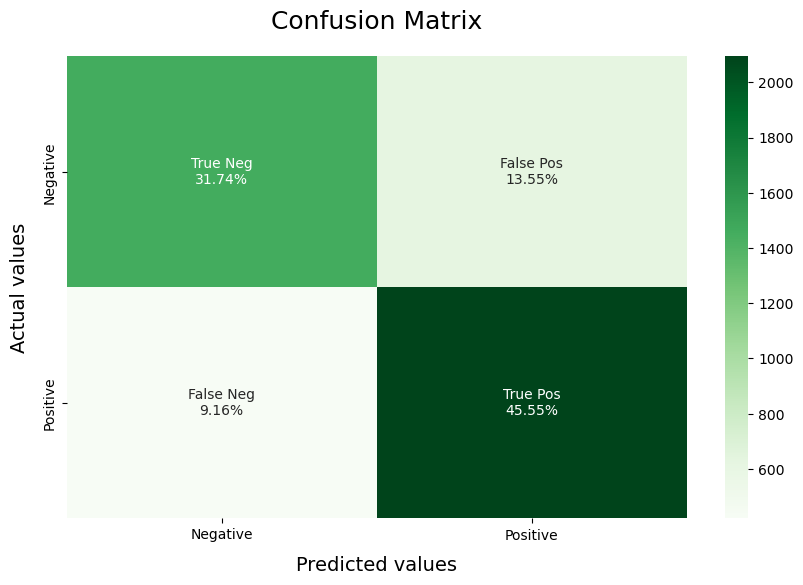

In [27]:
# Evaluation du modèle:
model_evaluation(y_test, y_predLRC) 

Examine these results:
    The confusion matrix shows the following characteristics:
    a) most of the positive cases are correctly classified, 2825 vs. 0, however.
    b) may be cases are are scored incorrectly.                      
        1) The overall accuracy is 1.00 However as just observed this is extremely misleading!. 
        2) The class imbalance is not confirmed. Of the 300 test cases 2610 are positive and 215 are negative.
        3) The precision, recall and F1 all show that positive cases are classified reasonably well.
    

### 8.1.2 Logistic Regression Classifier with cross validation

In [28]:
from sklearn.model_selection import cross_validate
bestLogisticRegressionClassifier = LogisticRegression(random_state = 0)
bestLogisticRegressionClassifierScores = cross_validate(bestLogisticRegressionClassifier, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
bestLogisticRegressionClassifierScores = pd.DataFrame(bestLogisticRegressionClassifierScores, index = range(1, 11))
print(bestLogisticRegressionClassifierScores)

    fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   0.122722    0.004477       0.792822        0.785316     0.849246  0.816031
2   0.025491    0.003304       0.777597        0.763016     0.854271  0.806069
3   0.025265    0.003566       0.767265        0.763231     0.826131  0.793436
4   0.030750    0.003159       0.786297        0.782364     0.838191  0.809316
5   0.035766    0.008661       0.756389        0.756098     0.810865  0.782524
6   0.023702    0.003155       0.769440        0.759563     0.839034  0.797323
7   0.036627    0.003106       0.779652        0.776007     0.832998  0.803493
8   0.039495    0.012573       0.772579        0.770169     0.825956  0.797087
9   0.033046    0.003032       0.764962        0.755920     0.835010  0.793499
10  0.032378    0.012473       0.767682        0.756098     0.842052  0.796763


In [29]:
bestLogisticRegressionClassifierScores.mean()

fit_time          0.040524
score_time        0.005751
test_accuracy     0.773468
test_precision    0.766778
test_recall       0.835375
test_f1           0.799554
dtype: float64

### 8.1.3 Logistic Regression with GridSeachCV

In [30]:
paramGrid = {"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]}

In [31]:
from sklearn.model_selection import GridSearchCV
gridLogisticRegressionClassifier = LogisticRegression(random_state = 0)
gridLogisticRegressionClassifier = GridSearchCV(estimator = gridLogisticRegressionClassifier, 
                             param_grid = paramGrid, 
                             scoring = "recall", 
                             n_jobs = -1, 
                             verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [32]:
# best parameters & estimator found by GridSearchCV
print('\033[1mBest Parameters of GridSearchCV for Logistic Regression Classifier:\033[0m ', gridLogisticRegressionClassifier.best_params_)
print('\033[1mBest Estimator of GridSearchCV for Logistic Regression Classifier:\033[0m', gridLogisticRegressionClassifier.best_estimator_)

Best Parameters of GridSearchCV for Logistic Regression Classifier:  {'C': 0.001, 'penalty': 'l2'}
Best Estimator of GridSearchCV for Logistic Regression Classifier: LogisticRegression(C=0.001, random_state=0)


In [33]:
# Predict values for Test dataset
y_pred_GLGC = gridLogisticRegressionClassifier.predict(X_test)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1422               660
Actual negative       381              2134

Accuracy  0.77
 
           Positive      Negative
Num case     2082          2515
Precision    0.79          0.76
Recall       0.68          0.85
F1           0.73          0.80
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      2082
           1       0.76      0.85      0.80      2515

    accuracy                           0.77      4597
   macro avg       0.78      0.77      0.77      4597
weighted avg       0.78      0.77      0.77      4597



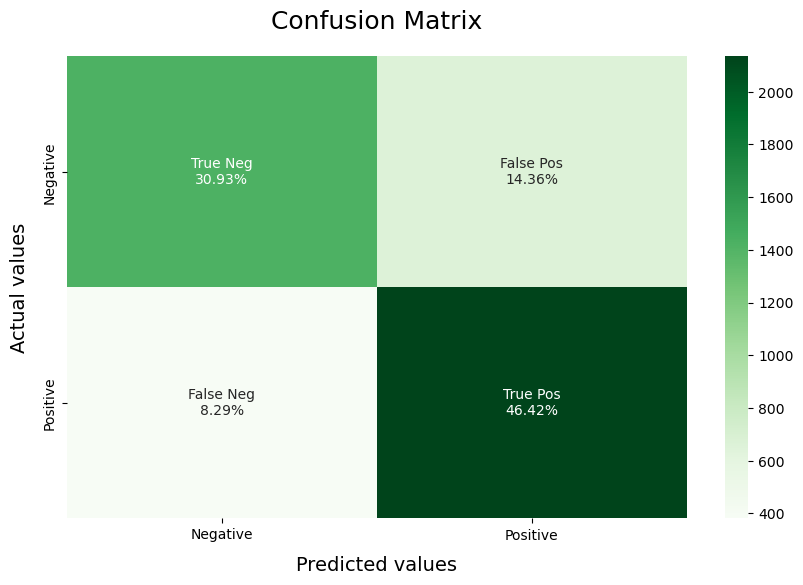

In [34]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_GLGC) 

### 8.2.4 Feature Importance for Logistic Regression

In [35]:
featureImportance = logisticRegressionClassifier.coef_
featureImportance = np.array(featureImportance).flatten()
print(featureImportance)

[ 1.57182522e+00  1.95059462e-01  2.08756518e-01  2.20428397e-01
  1.24773323e-02 -1.80314968e-02  1.82893003e-02 -1.72331087e-02
 -1.29123180e-02  1.29123180e-02  3.18647350e-02 -2.22894083e-01
  1.35450673e-01  9.67293524e-02 -4.78722739e-01 -3.75667004e-02
  3.75667004e-02 -3.59015257e-04 -1.07181421e-02 -8.30259963e-02
  1.19749692e-01]


In [36]:
feutColumns = data.iloc[:, 0:10].columns
logisticRegressionClassifierFeatures = pd.DataFrame(index = feutColumns, data = featureImportance, 
                                 columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)
print(logisticRegressionClassifierFeatures)

ValueError: Shape of passed values is (21, 1), indices imply (10, 1)

In [37]:
sns.barplot(x=logisticRegressionClassifierFeatures["Feature Importance"], y=logisticRegressionClassifierFeatures.index)
plt.title("Feature Importance")
plt.show()

NameError: name 'logisticRegressionClassifierFeatures' is not defined

### 8.3.5 ROC and AUC curve with logistic Regression

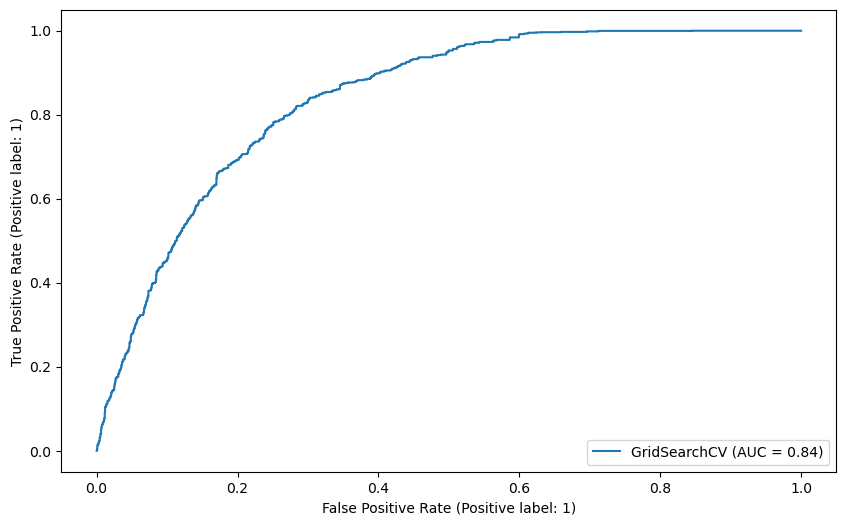

In [38]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(gridLogisticRegressionClassifier, X_test, y_test)

## 8.2 Random Forest Classifier

### 8.2.1 Random Forest Classifier with default parameters

In [43]:
# Construction Model:
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier = RandomForestClassifier(class_weight="balanced", random_state=101)
# fit the model
randomForestClassifier.fit(X_train, y_train)
# Predict values for Test dataset
y_predRFC = randomForestClassifier.predict(X_test)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2016                66
Actual negative         0              2515

Accuracy  0.99
 
           Positive      Negative
Num case     2082          2515
Precision    1.00          0.97
Recall       0.97          1.00
F1           0.98          0.99
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2082
           1       0.97      1.00      0.99      2515

    accuracy                           0.99      4597
   macro avg       0.99      0.98      0.99      4597
weighted avg       0.99      0.99      0.99      4597



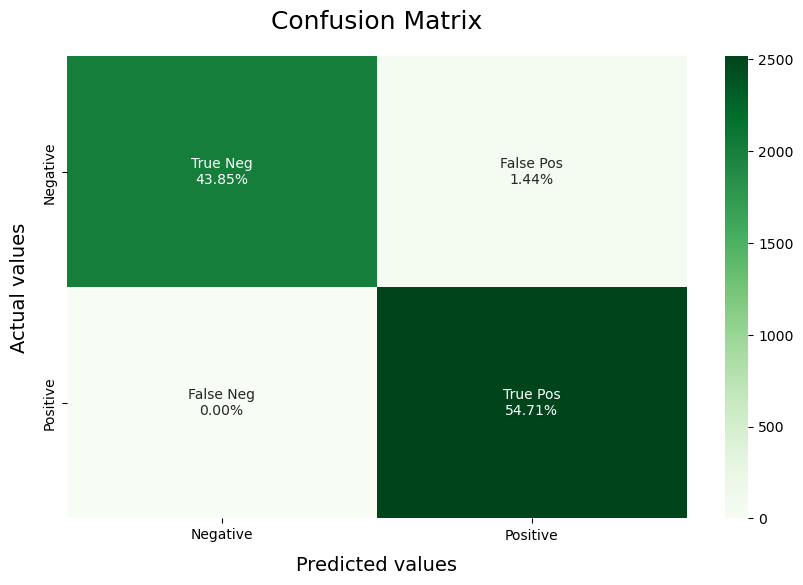

In [44]:
# Evaluation du modèle:
model_evaluation(y_test, y_predRFC) 

### 8.2.2 Random Forest Classifier with cross validation

In [45]:
from sklearn.model_selection import cross_validate
bestRandomForestClassifier = RandomForestClassifier(max_depth=None, random_state=101)
bestRandomForestClassifierScores = cross_validate(bestRandomForestClassifier, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
bestRandomForestClassifierScores = pd.DataFrame(bestRandomForestClassifierScores, index = range(1, 11))
print(bestRandomForestClassifierScores)

    fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   0.935446    0.030389       0.980968        0.966019     1.000000  0.982716
2   0.903090    0.030190       0.984231        0.971680     1.000000  0.985636
3   0.905070    0.030826       0.976618        0.959459     0.998995  0.978828
4   0.903220    0.030669       0.983687        0.972576     0.997990  0.985119
5   0.899244    0.030280       0.978793        0.963143     0.998994  0.980741
6   0.903266    0.030050       0.983687        0.970703     1.000000  0.985134
7   0.905777    0.029771       0.985854        0.974510     1.000000  0.987090
8   0.937786    0.029931       0.976605        0.960310     0.997988  0.978786
9   0.907522    0.030169       0.976061        0.958494     0.998994  0.978325
10  0.903714    0.030297       0.982046        0.968780     0.998994  0.983655


In [46]:
bestRandomForestClassifierScores.mean()

fit_time          0.910414
score_time        0.030257
test_accuracy     0.980855
test_precision    0.966567
test_recall       0.999195
test_f1           0.982603
dtype: float64

### 8.2.3 Random Forest Classifier with  GridSeachCV

In [47]:
param_grid = {'n_estimators':[50, 100, 150],
             'max_features':[2, 3, 4],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [48]:
from sklearn.model_selection import GridSearchCV
gridRandomForestClassifier = RandomForestClassifier(random_state=101)

gridRandomForestClassifier = GridSearchCV(estimator = gridRandomForestClassifier, 
                             param_grid = param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, 
                             verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [49]:
# best parameters & estimator found by GridSearchCV
print('\033[1mBest Parameters of GridSearchCV for Random Forest Model:\033[0m ', gridRandomForestClassifier.best_params_)
print('\033[1mBest Estimator of GridSearchCV for Random Forest Model:\033[0m', gridRandomForestClassifier.best_estimator_)

Best Parameters of GridSearchCV for Random Forest Model:  {'max_depth': 9, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Estimator of GridSearchCV for Random Forest Model: RandomForestClassifier(max_depth=9, max_features=2, min_samples_split=5,
                       random_state=101)


In [50]:
# Predict values for Test dataset
y_pred_GRFC = gridRandomForestClassifier.predict(X_test)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1570               512
Actual negative       164              2351

Accuracy  0.85
 
           Positive      Negative
Num case     2082          2515
Precision    0.91          0.82
Recall       0.75          0.93
F1           0.82          0.87
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      2082
           1       0.82      0.93      0.87      2515

    accuracy                           0.85      4597
   macro avg       0.86      0.84      0.85      4597
weighted avg       0.86      0.85      0.85      4597



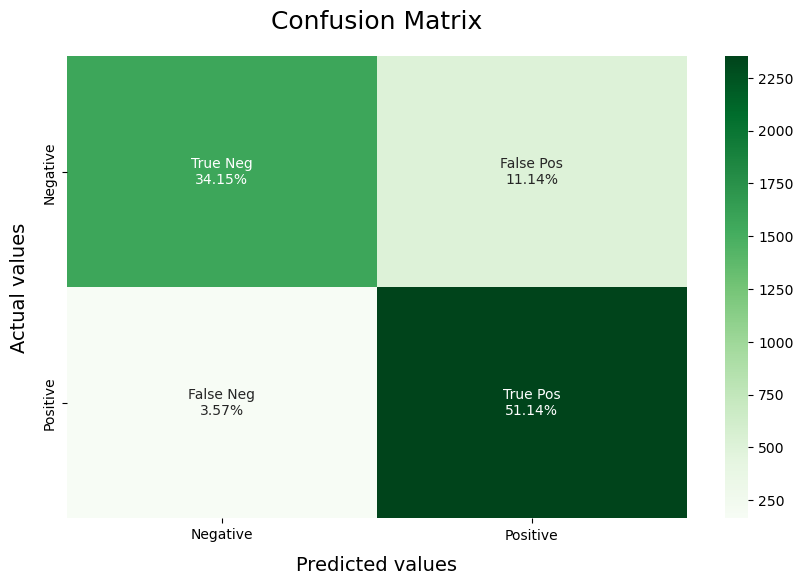

In [51]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_GRFC) 

### 8.2.4 Feature Importance for Random Forest

In [52]:
randomForestClassifier.feature_importances_

array([3.65401557e-01, 2.80973915e-02, 2.79980600e-02, 2.02829863e-01,
       1.82873519e-01, 1.08197875e-02, 1.11220929e-02, 7.72737230e-10,
       1.95849811e-02, 3.17373075e-02, 9.38813207e-03, 1.08645807e-04,
       1.18035868e-02, 1.50766504e-02, 9.78794672e-03, 1.18613637e-02,
       1.21473265e-02, 1.16778147e-02, 1.17237174e-02, 1.40660992e-02,
       1.18941564e-02])

In [53]:
X = pd.DataFrame(X)
randomForestClassifierFeatures = pd.DataFrame(index = X.columns, data = randomForestClassifier.feature_importances_, 
                                 columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)
print(randomForestClassifierFeatures)

                                Feature Importance
age                                   3.654016e-01
avg_glucose_level                     2.028299e-01
bmi                                   1.828735e-01
ever_married_Yes                      3.173731e-02
hypertension                          2.809739e-02
heart_disease                         2.799806e-02
ever_married_No                       1.958498e-02
work_type_Self-employed               1.507665e-02
smoking_status_never smoked           1.406610e-02
Residence_type_Urban                  1.214733e-02
smoking_status_smokes                 1.189416e-02
Residence_type_Rural                  1.186136e-02
work_type_Private                     1.180359e-02
smoking_status_formerly smoked        1.172372e-02
smoking_status_No Info                1.167781e-02
gender_Male                           1.112209e-02
gender_Female                         1.081979e-02
work_type_children                    9.787947e-03
work_type_Govt_job             

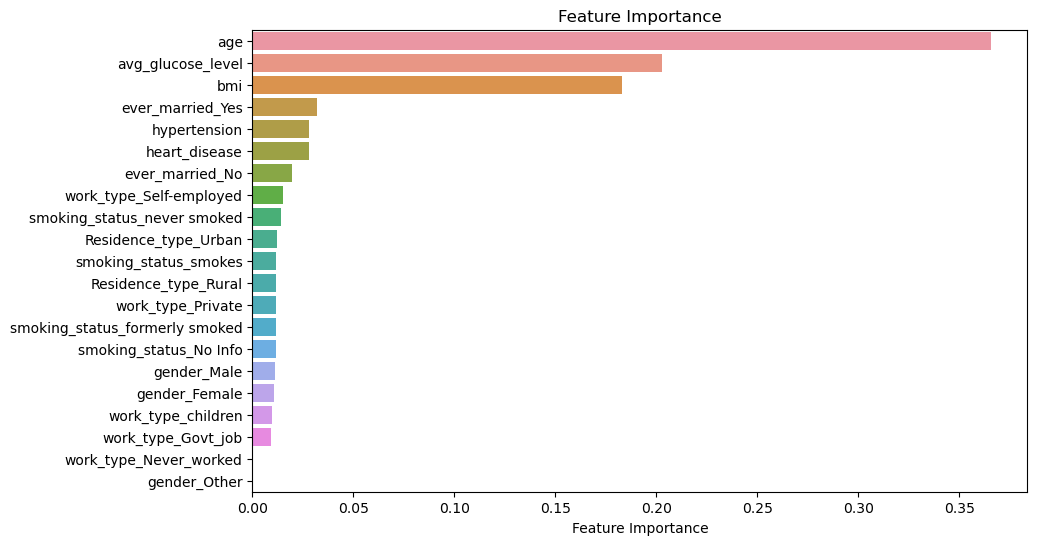

In [54]:
sns.barplot(x=randomForestClassifierFeatures["Feature Importance"], y=randomForestClassifierFeatures.index)
plt.title("Feature Importance")
plt.show()

### 8.2.5 ROC and AUC curve with RandomForest

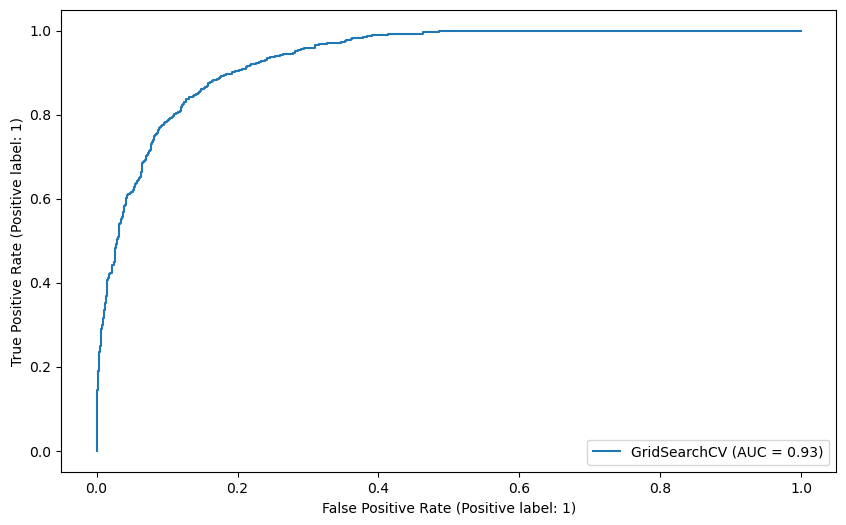

In [55]:
svc_disp = RocCurveDisplay.from_estimator(gridRandomForestClassifier, X_test, y_test)

## 8.3 Support Vector Machine implementation (SVM)

### 8.3.1 Support Vector Machine with default parameters

In [58]:
# Construction Model:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
SVMClassifier = SVC(class_weight = "balanced")
# fit the model
SVMClassifier.fit(X_train, y_train)
# Predict values for Test dataset
y_predSVM = SVMClassifier.predict(X_test)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1556               526
Actual negative       279              2236

Accuracy  0.82
 
           Positive      Negative
Num case     2082          2515
Precision    0.85          0.81
Recall       0.75          0.89
F1           0.79          0.85
              precision    recall  f1-score   support

           0       0.85      0.75      0.79      2082
           1       0.81      0.89      0.85      2515

    accuracy                           0.82      4597
   macro avg       0.83      0.82      0.82      4597
weighted avg       0.83      0.82      0.82      4597



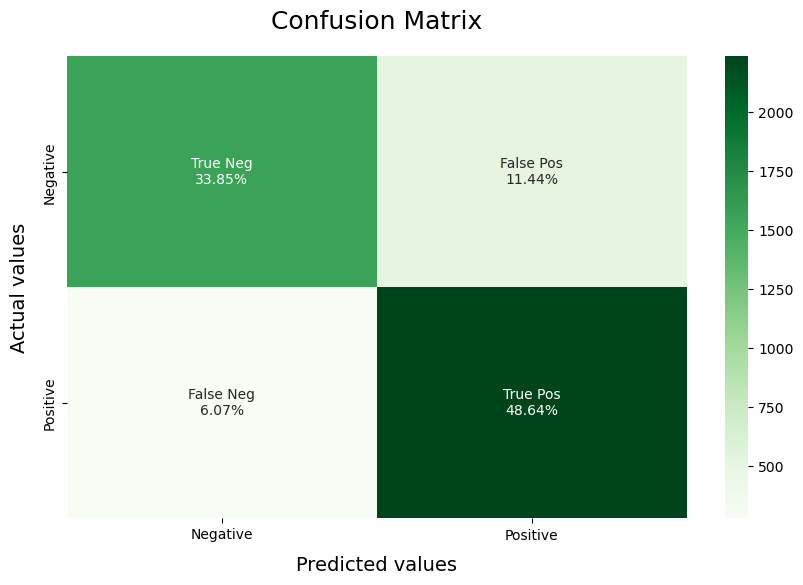

In [59]:
# Evaluation du modèle:
model_evaluation(y_test, y_predSVM) 

### 8.3.2 Support Vector Machine with cross validation

In [60]:
bestSVMClassifier = SVC()
bestSVMClassifierScores = cross_validate(bestSVMClassifier, X_train, y_train, scoring = ['accuracy', 'precision','recall', 'f1'], cv = 10)
bestSVMClassifierScores = pd.DataFrame(bestSVMClassifierScores, index = range(1, 11))
print(bestSVMClassifierScores)

    fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   4.549228    0.680225       0.831974        0.803540     0.912563  0.854588
2   4.465875    0.690835       0.825992        0.795276     0.913568  0.850327
3   4.392419    0.661812       0.811310        0.781739     0.903518  0.838228
4   4.509293    0.677229       0.830343        0.799299     0.916583  0.853933
5   4.442999    0.677281       0.824905        0.795775     0.909457  0.848826
6   4.467986    0.673313       0.810767        0.778929     0.907445  0.838290
7   4.523076    0.675948       0.816104        0.789242     0.900402  0.841165
8   4.408401    0.670347       0.825354        0.794401     0.913481  0.849789
9   4.416894    0.674154       0.812840        0.779210     0.912475  0.840593
10  4.461022    0.660709       0.800871        0.767918     0.905433  0.831025


In [61]:
model = SVC(class_weight = "balanced")
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
print(df_scores.mean())

fit_time          5.059638
score_time        0.695367
test_accuracy     0.821059
test_precision    0.802831
test_recall       0.887167
test_f1           0.842870
dtype: float64


### 8.3.3 Support Vector Machine with GridSeachCV

In [62]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

In [65]:
model = SVC(class_weight = "balanced")
gridSVMClassifier = GridSearchCV(model, param_grid, verbose=3, refit=True)
gridSVMClassifier.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.803 total time=   5.8s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.801 total time=   5.7s


KeyboardInterrupt: 

In [64]:
# best parameters & estimator found by GridSearchCV
print('\033[1mBest Parameters of GridSearchCV for SVM Model:\033[0m ', gridSVMClassifier.best_params_)
print('\033[1mBest Estimator of GridSearchCV for SVM Model:\033[0m', gridSVMClassifier.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
# Predict values for Test dataset
y_pred_GSVMC = gridSVMClassifier.predict(X_test)

In [ ]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_GSVMC) 

### 8.3.4 ROC curve and AUC with SVM

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(gridSVMClassifier, X_test, y_test)

## 8.4 Decision Tree Classifier

### 8.4.1 Decision Tree Classifier with default parameters

In [66]:
# Construction Model:
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = DecisionTreeClassifier(class_weight="balanced", random_state=42)
# fit the model
decisionTreeClassifier.fit(X_train, y_train)
# Predict values for Test dataset
y_predSDTC = decisionTreeClassifier.predict(X_test)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1950               132
Actual negative         0              2515

Accuracy  0.97
 
           Positive      Negative
Num case     2082          2515
Precision    1.00          0.95
Recall       0.94          1.00
F1           0.97          0.97
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2082
           1       0.95      1.00      0.97      2515

    accuracy                           0.97      4597
   macro avg       0.98      0.97      0.97      4597
weighted avg       0.97      0.97      0.97      4597



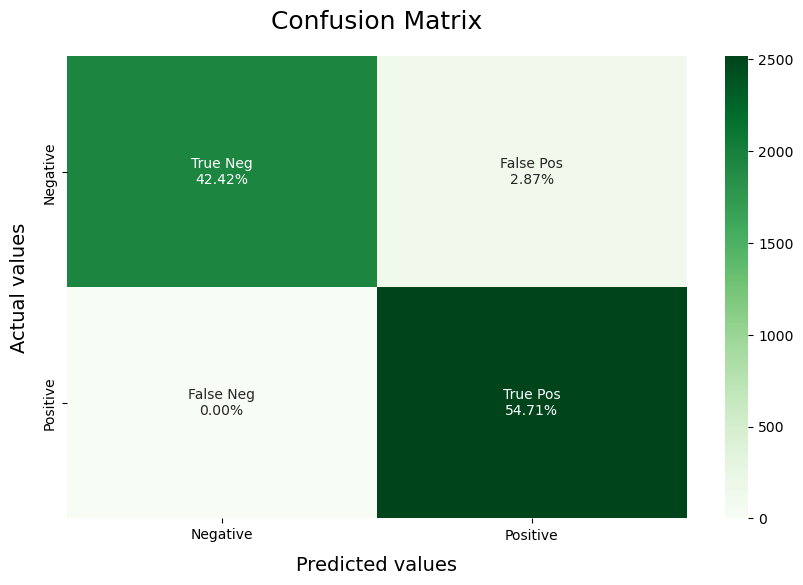

In [67]:
# Evaluation du modèle:
model_evaluation(y_test, y_predSDTC) 

### 8.4.2 Decision Tree Classifier with cross validation

In [73]:
bestDecisionTreeClassifier = DecisionTreeClassifier(max_depth=None, random_state=42)
bestDecisionTreeClassifierScores = cross_validate(bestDecisionTreeClassifier, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
bestDecisionTreeClassifierScores = pd.DataFrame(bestDecisionTreeClassifierScores, index = range(1, 11))
print(bestDecisionTreeClassifierScores)

    fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   0.055420    0.003928       0.965198        0.939566     1.000000  0.968841
2   0.048976    0.004006       0.967374        0.943128     1.000000  0.970732
3   0.047839    0.003725       0.965198        0.940397     0.998995  0.968811
4   0.045451    0.003608       0.963023        0.937677     0.997990  0.966894
5   0.048919    0.003861       0.965198        0.940341     0.998994  0.968780
6   0.046323    0.003466       0.963567        0.936852     1.000000  0.967397
7   0.046742    0.003600       0.966812        0.942180     1.000000  0.970229
8   0.047422    0.003689       0.964635        0.940284     0.997988  0.968277
9   0.049299    0.003766       0.957018        0.927171     0.998994  0.961743
10  0.048682    0.003622       0.966812        0.943020     0.998994  0.970200


In [74]:
bestDecisionTreeClassifierScores.mean()

fit_time          0.048507
score_time        0.003727
test_accuracy     0.964484
test_precision    0.939062
test_recall       0.999195
test_f1           0.968191
dtype: float64

### 8.4.3 Decision Tree Classifier with RandomizedsearchCV

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
parameters={'max_depth':(10,20,30,40,50),'criterion':('gini','entropy'),'max_features':('log2','sqrt','auto'),
            'min_samples_split':(2,4,6),'random_state':(0,1,2,3,4,5)}
gridDecisionTreeClassifier = RandomizedSearchCV(tree.DecisionTreeClassifier(),param_distributions=parameters,cv=5,random_state=2)
gridDecisionTreeClassifier = gridDecisionTreeClassifier.fit(X_train, y_train)

In [76]:
print('\033[1mBest Parameters of RandomizedSearchCV for Decision Tree Model:\033[0m', gridDecisionTreeClassifier.best_params_)
print('\033[1mEstimator of RandomizedSearchCV for Decision Tree Model:\033[0m', gridDecisionTreeClassifier.best_estimator_)

Best Parameters of RandomizedSearchCV for Decision Tree Model: {'random_state': 0, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'gini'}
Estimator of RandomizedSearchCV for Decision Tree Model: DecisionTreeClassifier(max_depth=50, max_features='sqrt', min_samples_split=4,
                       random_state=0)


In [77]:
gridDecisionTreeClassifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=None, min_samples_split=6, random_state=2)
gridDecisionTreeClassifier = gridDecisionTreeClassifier.fit(X_train, y_train)
y_pred_DTHPM = gridDecisionTreeClassifier.predict(X_test)
y_train_pred_DTHPM = gridDecisionTreeClassifier.predict(X_train)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1479               603
Actual negative        96              2419

Accuracy  0.85
 
           Positive      Negative
Num case     2082          2515
Precision    0.94          0.80
Recall       0.71          0.96
F1           0.81          0.87
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      2082
           1       0.80      0.96      0.87      2515

    accuracy                           0.85      4597
   macro avg       0.87      0.84      0.84      4597
weighted avg       0.86      0.85      0.84      4597



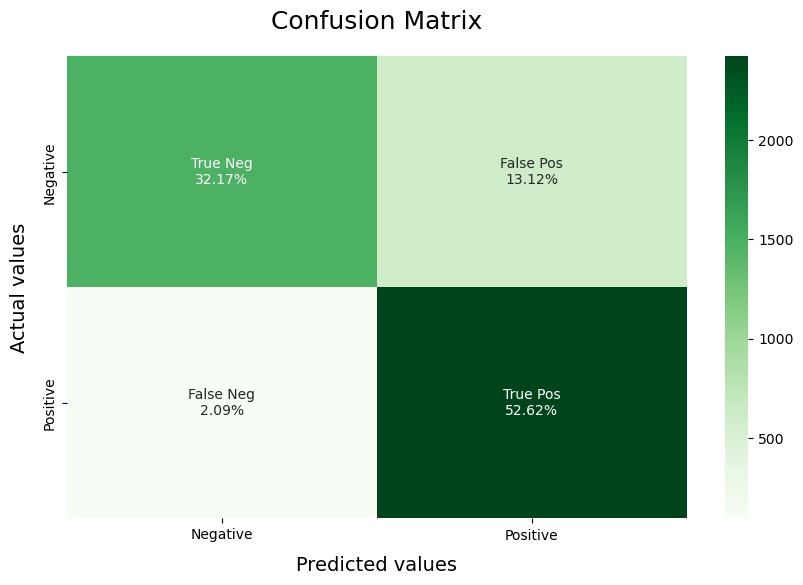

In [78]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_DTHPM) 

In [79]:
# Function for examining scores
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
def trainVal(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [80]:

print('---------------Train vs Test Report----------------')
trainVal(y_train, y_train_pred_DTHPM, y_test, y_pred_DTHPM)

---------------Train vs Test Report----------------


train_set  test_set
Accuracy    0.865278  0.847944
Precision   0.819348  0.800463
Recall      0.963294  0.961829
f1          0.885510  0.873758

### 8.3.4 Feature Importance for Decision Tree

In [81]:
gridDecisionTreeClassifier.feature_importances_

array([0.59961282, 0.01251145, 0.01173187, 0.14493947, 0.14078884,
       0.00507439, 0.00633419, 0.        , 0.00227609, 0.00469665,
       0.00866447, 0.        , 0.        , 0.00900943, 0.        ,
       0.00632275, 0.00925935, 0.01404122, 0.00346067, 0.0134258 ,
       0.00785055])

In [82]:
X = pd.DataFrame(X)
gridDecisionTreeClassifier = pd.DataFrame(index = X.columns, data = gridDecisionTreeClassifier.feature_importances_, 
                                 columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)
print(gridDecisionTreeClassifier)

                                Feature Importance
age                                       0.599613
avg_glucose_level                         0.144939
bmi                                       0.140789
smoking_status_No Info                    0.014041
smoking_status_never smoked               0.013426
hypertension                              0.012511
heart_disease                             0.011732
Residence_type_Urban                      0.009259
work_type_Self-employed                   0.009009
work_type_Govt_job                        0.008664
smoking_status_smokes                     0.007851
gender_Male                               0.006334
Residence_type_Rural                      0.006323
gender_Female                             0.005074
ever_married_Yes                          0.004697
smoking_status_formerly smoked            0.003461
ever_married_No                           0.002276
work_type_Never_worked                    0.000000
work_type_Private              

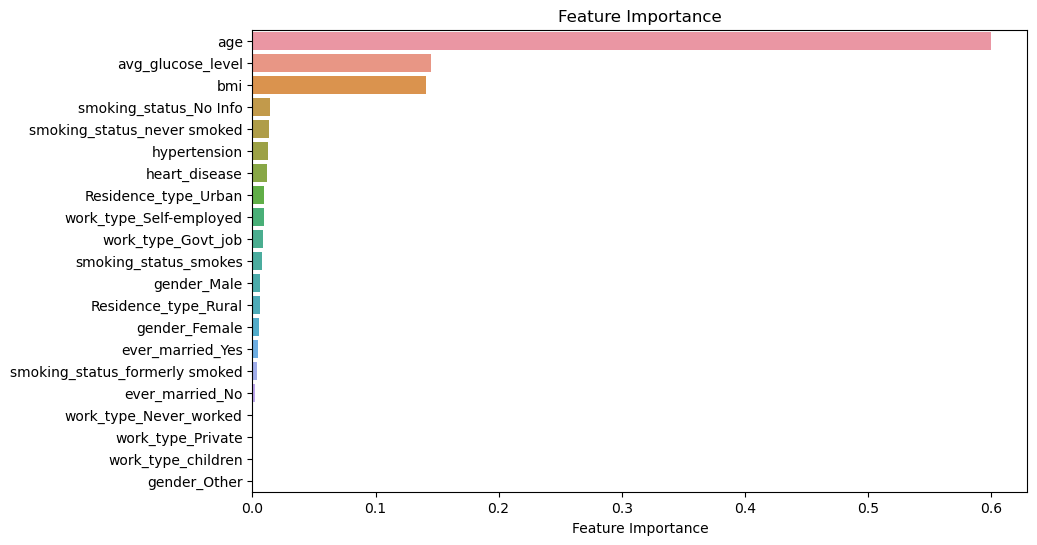

In [83]:
sns.barplot(x=gridDecisionTreeClassifier["Feature Importance"], y=gridDecisionTreeClassifier.index)
plt.title("Feature Importance")
plt.show()

### 8.3.5 ROC curve and AUC with DecisionTree

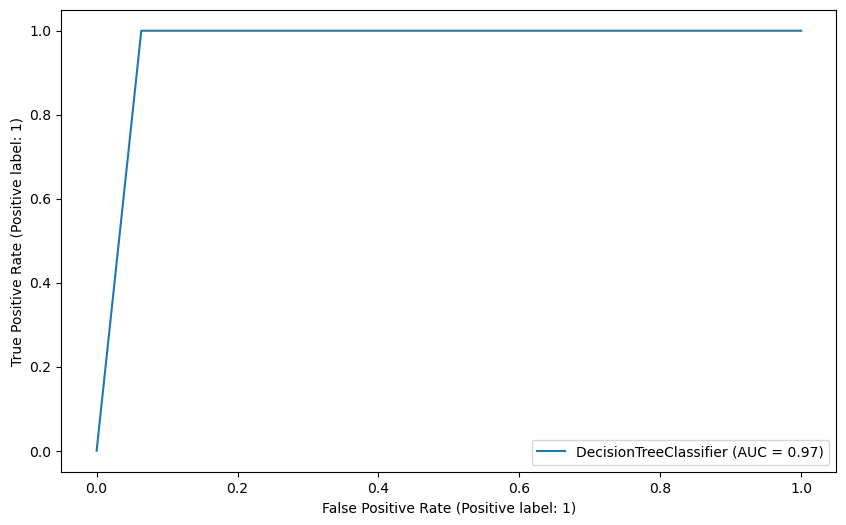

In [84]:
svc_disp = RocCurveDisplay.from_estimator(decisionTreeClassifier, X_test, y_test)

## 8.5 K-Nearest Neighbor Classifier (KNN)

### 8.5.1 K-Nearest Neighbor Classifier with defailt parameters

In [85]:
# Construction Model:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')
# fit the model
KNNClassifier.fit(X_train, y_train)
# Predict values for Test dataset
y_predKNNC = decisionTreeClassifier.predict(X_test)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1950               132
Actual negative         0              2515

Accuracy  0.97
 
           Positive      Negative
Num case     2082          2515
Precision    1.00          0.95
Recall       0.94          1.00
F1           0.97          0.97
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2082
           1       0.95      1.00      0.97      2515

    accuracy                           0.97      4597
   macro avg       0.98      0.97      0.97      4597
weighted avg       0.97      0.97      0.97      4597



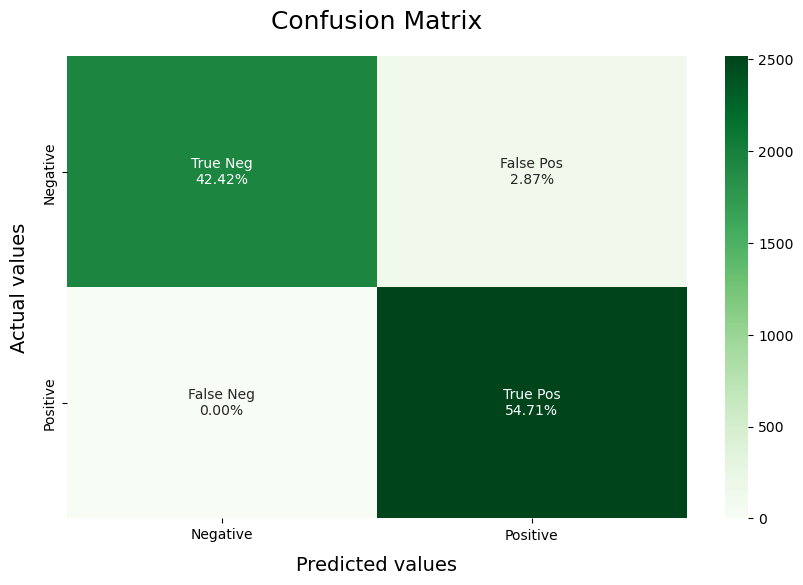

In [86]:
# Evaluation du modèle:
model_evaluation(y_test, y_predKNNC) 

### 8.5.2 K-Nearest Neighbor Classifier with Cross validation

In [87]:
bestKNNC = KNeighborsClassifier(n_neighbors=5)
bestKNNCScores = cross_validate(bestKNNC, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
bestKNNCScores = pd.DataFrame(bestKNNCScores, index = range(1, 11))
print(bestKNNCScores)

    fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   0.004845    0.218362       0.922240        0.874341     1.000000  0.932958
2   0.004315    0.098511       0.919521        0.871166     0.998995  0.930712
3   0.001687    0.034123       0.902121        0.847400     0.998995  0.916974
4   0.001744    0.036261       0.917890        0.871479     0.994975  0.929141
5   0.002770    0.034329       0.913540        0.863359     0.997988  0.925805
6   0.001843    0.034525       0.908102        0.854686     1.000000  0.921650
7   0.001620    0.035504       0.909140        0.859253     0.994970  0.922145
8   0.001581    0.033773       0.915125        0.866259     0.996982  0.927035
9   0.002037    0.035369       0.905876        0.852966     0.997988  0.919796
10  0.002222    0.035754       0.909140        0.856773     0.998994  0.922434


In [88]:
bestKNNCScores.mean()

fit_time          0.002466
score_time        0.059651
test_accuracy     0.912270
test_precision    0.861768
test_recall       0.997989
test_f1           0.924865
dtype: float64

### 8.5.3 Choosing Reasonable K Values with Elbow Method

In [89]:
testErrorRates = []
for k in range(1, 30):
    KNNClassifier = KNeighborsClassifier(n_neighbors=k)
    KNNClassifier.fit(X_train, y_train) 
   
    y_pred_Error = KNNClassifier.predict(X_test)
    testErrorRates.append(np.mean(y_pred_Error!=y_test))

Text(0, 0.5, 'Error_rate')

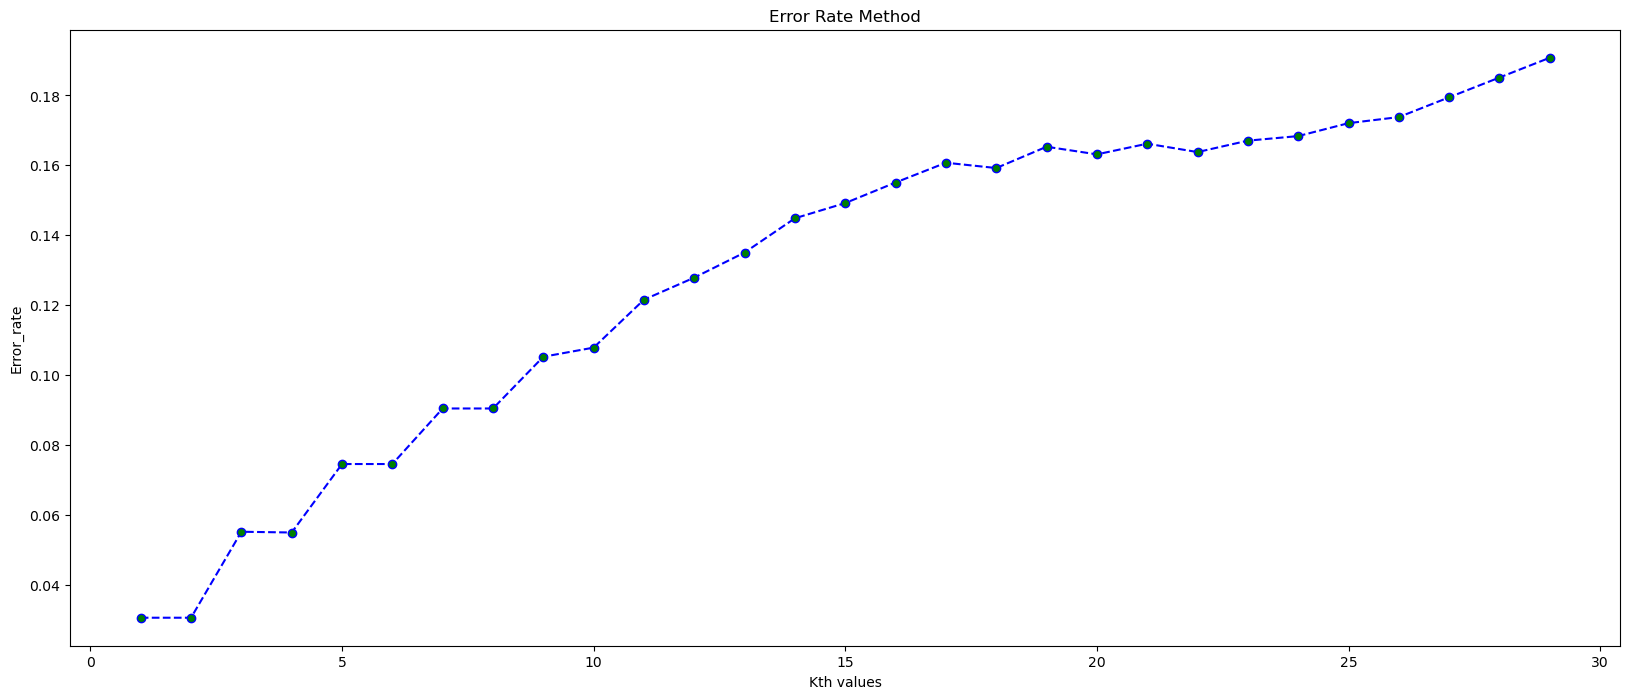

In [90]:
# Plot for Elbow Method
plt.figure(figsize=(20,8))
plt.plot(range(1,30),testErrorRates,color='blue',linestyle='dashed',marker='o',markerfacecolor='green')
plt.title("Error Rate Method")
plt.xlabel('Kth values')
plt.ylabel('Error_rate')

### 8.5.4 K-Nearest Neighbor Classifier with GridSearchCV

In [91]:
k = range(1, 30)
param_grid = {"n_neighbors": k, "p": [1, 2], "weights": ['uniform', "distance"]}

In [92]:
KNNGrid = KNeighborsClassifier()
KNNGridModel = GridSearchCV(KNNGrid, param_grid, cv=10, scoring='accuracy')
KNNGridModel.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [93]:
print('Best Parameters of GridSearchCV for KNN Classifier:', KNNGridModel.best_params_)
print('Best Estimator of GridSearchCV for KNN Classifier:', KNNGridModel.best_estimator_)

Best Parameters of GridSearchCV for KNN Classifier: {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Best Estimator of GridSearchCV for KNN Classifier: KNeighborsClassifier(n_neighbors=1)


In [94]:
y_pred_GKNNC = KNNGridModel.predict(X_test)
y_train_pred_GKNNC = KNNGridModel.predict(X_train)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1941               141
Actual negative         0              2515

Accuracy  0.97
 
           Positive      Negative
Num case     2082          2515
Precision    1.00          0.95
Recall       0.93          1.00
F1           0.96          0.97
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2082
           1       0.95      1.00      0.97      2515

    accuracy                           0.97      4597
   macro avg       0.97      0.97      0.97      4597
weighted avg       0.97      0.97      0.97      4597



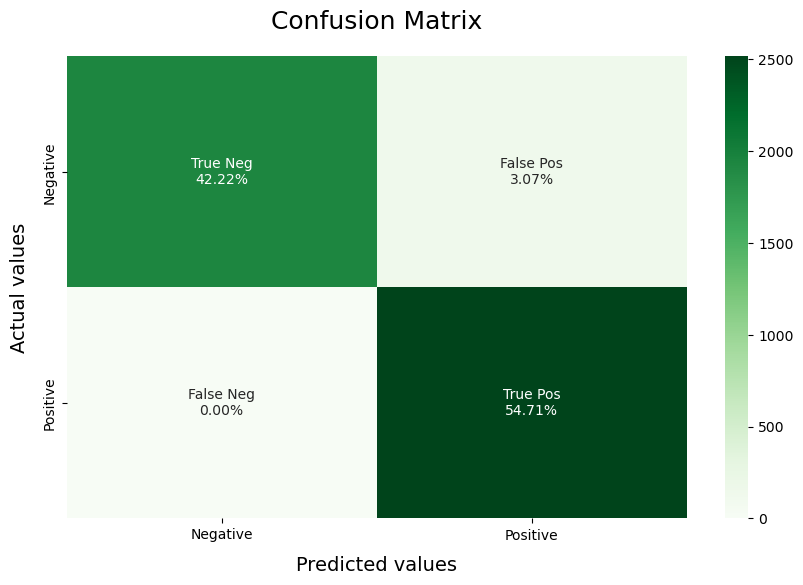

In [95]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_GKNNC) 

### 8.5.5 ROC curve and AUC with K-Nearest Neighbor

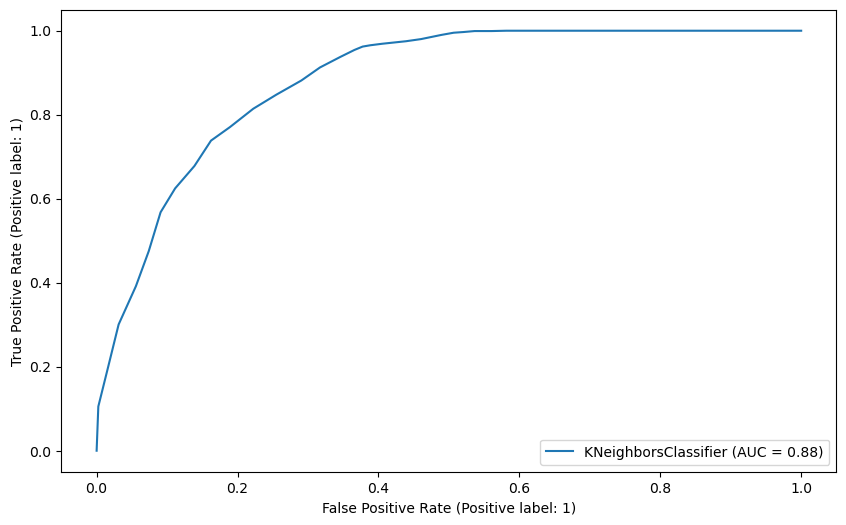

In [96]:
svc_disp = RocCurveDisplay.from_estimator(KNNClassifier, X_test, y_test)

## 8.6 GradientBoosting (GB) implementation

### 8.6.1 GradientBoosting with default parameters

In [99]:
# Construction Model:
from sklearn.ensemble import GradientBoostingClassifier
GBClassifier = GradientBoostingClassifier(random_state=42)
# fit the model
GBClassifier.fit(X_train, y_train)
# Predict values for Test dataset
y_pred_GBC = GBClassifier.predict(X_test)
# Predict training values for Test dataset
y_train_GBC = GBClassifier.predict(X_train)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1527               555
Actual negative       273              2242

Accuracy  0.82
 
           Positive      Negative
Num case     2082          2515
Precision    0.85          0.80
Recall       0.73          0.89
F1           0.79          0.84
              precision    recall  f1-score   support

           0       0.85      0.73      0.79      2082
           1       0.80      0.89      0.84      2515

    accuracy                           0.82      4597
   macro avg       0.82      0.81      0.82      4597
weighted avg       0.82      0.82      0.82      4597



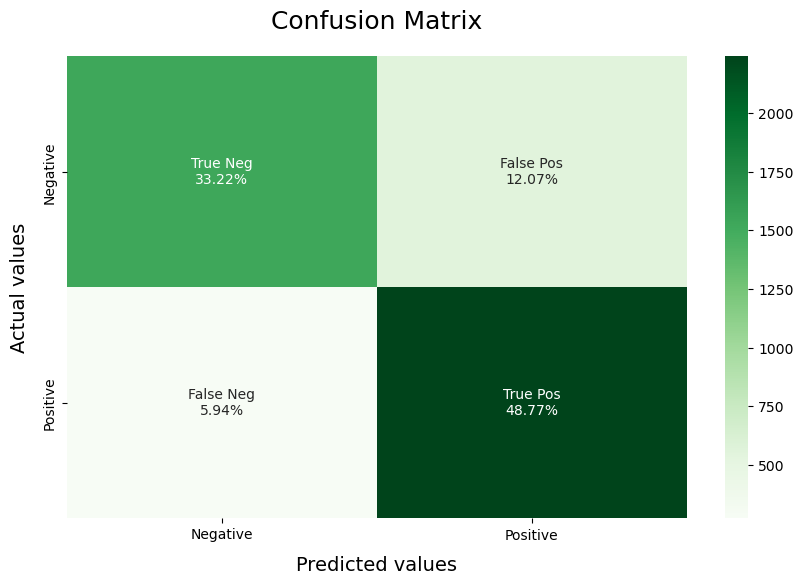

In [100]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_GBC) 

### 8.6.2 GradientBoosting with Cross validation

In [101]:
bestGBClassifier = GradientBoostingClassifier(random_state=42)
bestGBClassifierScores = cross_validate(bestGBClassifier, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
bestGBClassifierScores = pd.DataFrame(bestGBClassifierScores, index = range(1, 11))
print(bestGBClassifierScores)

    fit_time  score_time  test_accuracy  test_precision_macro  \
1   1.565531    0.006196       0.831974              0.837533   
2   1.562343    0.006362       0.820555              0.827510   
3   1.569106    0.006678       0.816748              0.823391   
4   1.551630    0.005951       0.829799              0.832605   
5   1.566056    0.006005       0.817836              0.825258   
6   1.553235    0.005961       0.818380              0.826968   
7   1.547072    0.005936       0.828074              0.832163   
8   1.561362    0.005965       0.823721              0.830377   
9   1.563512    0.006017       0.812840              0.818960   
10  1.557814    0.005871       0.808487              0.816751   

    test_recall_macro  test_f1_macro  
1            0.825844       0.828493  
2            0.813583       0.816327  
3            0.809795       0.812463  
4            0.824912       0.826998  
5            0.810734       0.813449  
6            0.810882       0.813715  
7          

In [102]:
bestGBClassifierScores.mean()

fit_time                1.559766
score_time              0.006094
test_accuracy           0.820841
test_precision_macro    0.827152
test_recall_macro       0.814210
test_f1_macro           0.816809
dtype: float64

### 8.6.3 GradientBoosting Feature Importance 

In [103]:
GBClassifier.feature_importances_

array([7.92807735e-01, 1.38255192e-02, 1.49888615e-02, 6.84232836e-02,
       8.71220701e-02, 6.89782181e-05, 3.33041393e-04, 0.00000000e+00,
       8.28948019e-04, 1.65099053e-04, 4.07499848e-03, 0.00000000e+00,
       4.63467999e-04, 2.82209593e-03, 0.00000000e+00, 3.33497296e-03,
       8.92379570e-05, 9.23982915e-04, 0.00000000e+00, 5.95489344e-03,
       3.77281462e-03])

In [104]:
GBClassifierFeatureImportance = pd.DataFrame(index = X.columns, data = GBClassifier.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
print(GBClassifierFeatureImportance)

                                Feature Importance
age                                       0.792808
bmi                                       0.087122
avg_glucose_level                         0.068423
heart_disease                             0.014989
hypertension                              0.013826
smoking_status_never smoked               0.005955
work_type_Govt_job                        0.004075
smoking_status_smokes                     0.003773
Residence_type_Rural                      0.003335
work_type_Self-employed                   0.002822
smoking_status_No Info                    0.000924
ever_married_No                           0.000829
work_type_Private                         0.000463
gender_Male                               0.000333
ever_married_Yes                          0.000165
Residence_type_Urban                      0.000089
gender_Female                             0.000069
gender_Other                              0.000000
work_type_Never_worked         

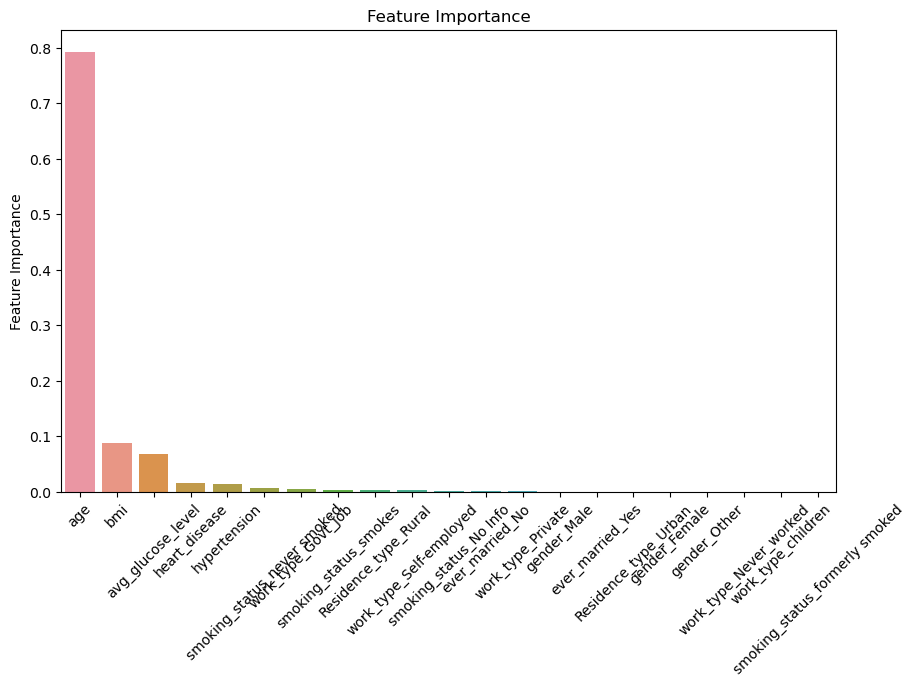

In [105]:
sns.barplot(y=GBClassifierFeatureImportance["Feature Importance"], x=GBClassifierFeatureImportance.index)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

### 8.6.4 GradientBoosting with GridSeachCV

In [106]:
# Accuracy scores on train and validation sets with different learning rates
learningRates = [0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]
for learningRate in learningRates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learningRate, random_state=42)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learningRate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.778
Accuracy score (test): 0.776

Learning rate:  0.1
Accuracy score (training): 0.787
Accuracy score (test): 0.780

Learning rate:  0.15
Accuracy score (training): 0.802
Accuracy score (test): 0.797

Learning rate:  0.25
Accuracy score (training): 0.809
Accuracy score (test): 0.803

Learning rate:  0.5
Accuracy score (training): 0.829
Accuracy score (test): 0.820

Learning rate:  0.6
Accuracy score (training): 0.824
Accuracy score (test): 0.816

Learning rate:  0.75
Accuracy score (training): 0.835
Accuracy score (test): 0.825

Learning rate:  0.85
Accuracy score (training): 0.836
Accuracy score (test): 0.821

Learning rate:  1
Accuracy score (training): 0.847
Accuracy score (test): 0.836



In [107]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4], "learning_rate": [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25, 1.5]}

In [108]:
GBGrid = GradientBoostingClassifier(random_state=42)
GBGrid = GridSearchCV(GBGrid, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [109]:
print('Best Parameters of GridSearchCV for Gradient Boosting Model:', GBGrid.best_params_)
print('Best Estimator of GridSearchCV for Gradient Boosting Model:', GBGrid.best_estimator_)

Best Parameters of GridSearchCV for Gradient Boosting Model: {'learning_rate': 1.5, 'max_features': None, 'n_estimators': 300, 'subsample': 1}
Best Estimator of GridSearchCV for Gradient Boosting Model: GradientBoostingClassifier(learning_rate=1.5, n_estimators=300, random_state=42,
                           subsample=1)


In [110]:
y_pred_GGB = GBGrid.predict(X_test)
y_train_pred_GGB = GBGrid.predict(X_train)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1867               215
Actual negative         5              2510

Accuracy  0.95
 
           Positive      Negative
Num case     2082          2515
Precision    1.00          0.92
Recall       0.90          1.00
F1           0.94          0.96
              precision    recall  f1-score   support

           0       1.00      0.90      0.94      2082
           1       0.92      1.00      0.96      2515

    accuracy                           0.95      4597
   macro avg       0.96      0.95      0.95      4597
weighted avg       0.96      0.95      0.95      4597



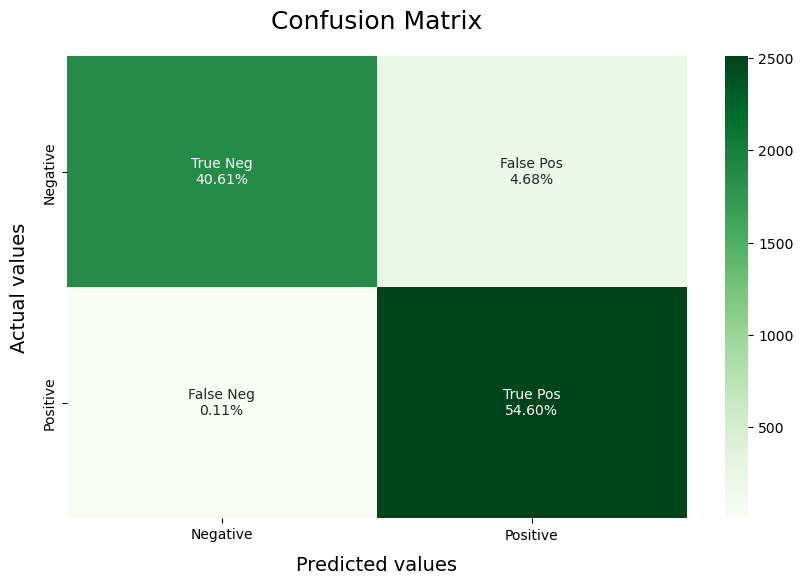

In [111]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_GGB) 

### 8.6.5 ROC curve and AUC with GradientBoosting

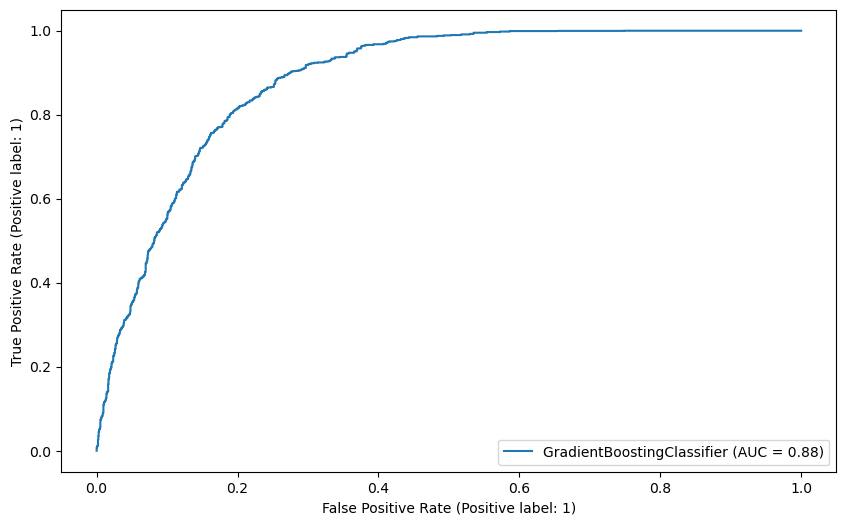

In [112]:
svc_disp = RocCurveDisplay.from_estimator(GBClassifier, X_test, y_test)

## 8.7 AdaBoosting (AB) implementation

### 8.7.1 AdaBoosting with default parameters

In [113]:
# Construction Model:
from sklearn.ensemble import AdaBoostClassifier
ABClassifier = AdaBoostClassifier(n_estimators=50, random_state=101)
# fit the model
ABClassifier.fit(X_train, y_train)
# Predict values for Test dataset
y_pred_ABC = ABClassifier.predict(X_test)
# Predict training values for Test dataset
y_train_pred8ABC = ABClassifier.predict(X_train)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1480               602
Actual negative       357              2158

Accuracy  0.79
 
           Positive      Negative
Num case     2082          2515
Precision    0.81          0.78
Recall       0.71          0.86
F1           0.76          0.82
              precision    recall  f1-score   support

           0       0.81      0.71      0.76      2082
           1       0.78      0.86      0.82      2515

    accuracy                           0.79      4597
   macro avg       0.79      0.78      0.79      4597
weighted avg       0.79      0.79      0.79      4597



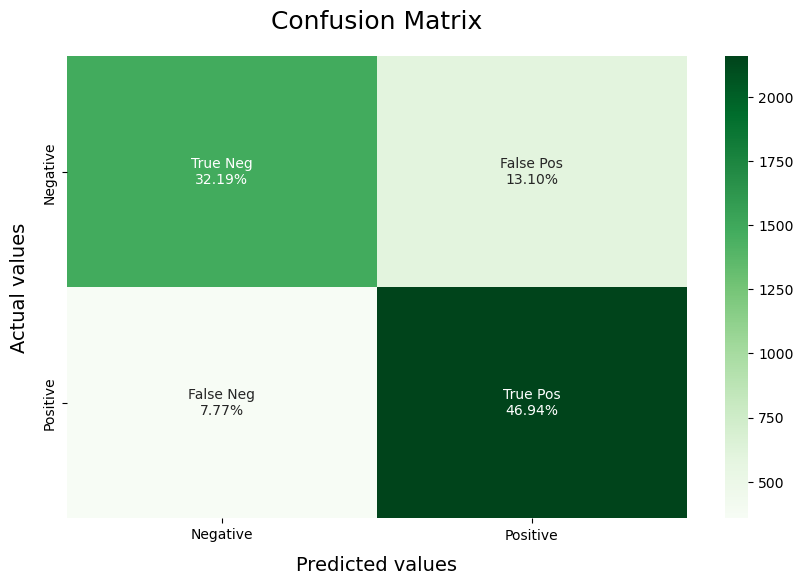

In [114]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_ABC) 

### 8.6.2 AdaBoosting with Cross validation

In [115]:
bestABClassifier = AdaBoostClassifier(n_estimators=50, random_state=101)
bestABClassifierScores = cross_validate(bestABClassifier, X_train, y_train, scoring = ['accuracy', 'precision','recall', 'f1'], cv = 10)
bestABClassifierScores = pd.DataFrame(bestABClassifierScores, index = range(1, 11))
print(bestABClassifierScores)

    fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   0.428302    0.010943       0.812398        0.793321     0.883417  0.835949
2   0.404232    0.010394       0.788472        0.772482     0.863317  0.815377
3   0.416290    0.010613       0.789016        0.767873     0.874372  0.817669
4   0.497584    0.010648       0.806960        0.793040     0.870352  0.829899
5   0.417572    0.010875       0.785209        0.765750     0.868209  0.813767
6   0.412750    0.010707       0.792822        0.768624     0.882294  0.821546
7   0.407742    0.010810       0.785092        0.774519     0.850101  0.810552
8   0.415430    0.010367       0.803591        0.786425     0.874245  0.828013
9   0.403891    0.011589       0.775843        0.756162     0.864185  0.806573
10  0.417770    0.010514       0.781828        0.765919     0.859155  0.809862


In [116]:
bestABClassifierScores.mean()

fit_time          0.422156
score_time        0.010746
test_accuracy     0.792123
test_precision    0.774412
test_recall       0.868965
test_f1           0.818921
dtype: float64

### 8.7.3 Performance with Weak Learners

In [117]:
errorRates = []

for n in range(1, 100):    
    ABClassifier = AdaBoostClassifier(n_estimators=n)
    ABClassifier.fit(X_train, y_train)
    preds = ABClassifier.predict(X_test)
    error = 1 - f1_score(y_test, preds)    
    errorRates.append(error)

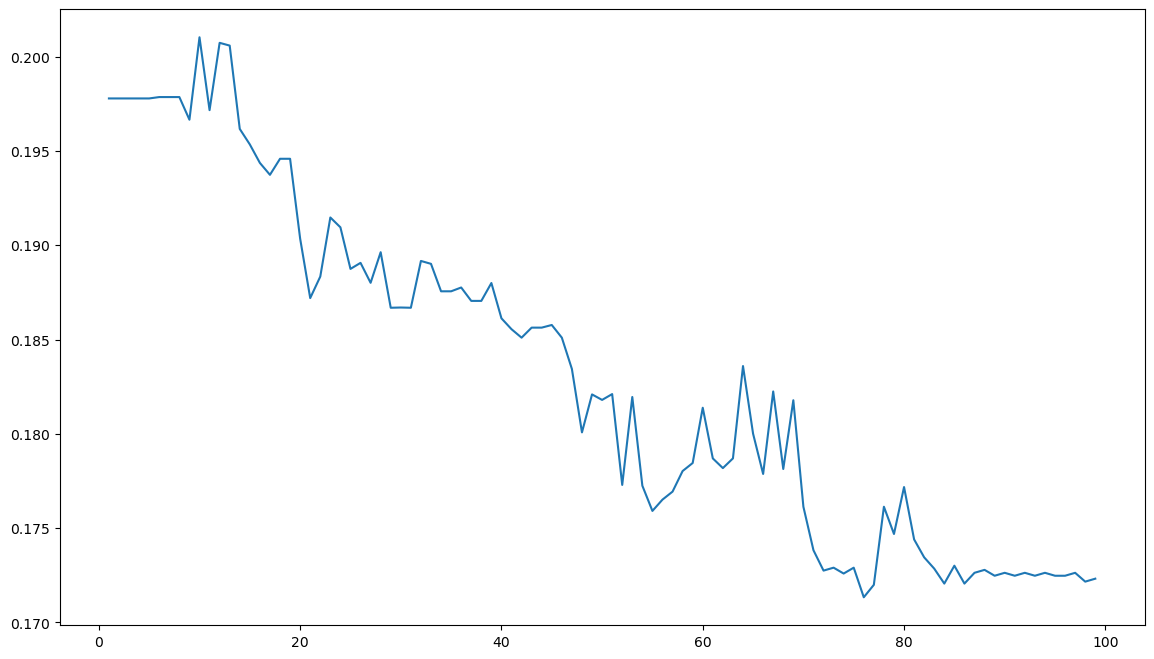

In [118]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 100), errorRates)

### 8.7.4  AdaBoosting Feature Importance

In [119]:
ABClassifier.feature_importances_

array([0.33333333, 0.01010101, 0.02020202, 0.21212121, 0.37373737,
       0.        , 0.        , 0.        , 0.01010101, 0.        ,
       0.01010101, 0.        , 0.        , 0.        , 0.01010101,
       0.01010101, 0.        , 0.        , 0.        , 0.        ,
       0.01010101])

In [120]:
ABClassifierFeatureImportance = pd.DataFrame(index = X.columns, data = ABClassifier.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
print(ABClassifierFeatureImportance)

                                Feature Importance
bmi                                       0.373737
age                                       0.333333
avg_glucose_level                         0.212121
heart_disease                             0.020202
ever_married_No                           0.010101
Residence_type_Rural                      0.010101
work_type_children                        0.010101
hypertension                              0.010101
work_type_Govt_job                        0.010101
smoking_status_smokes                     0.010101
ever_married_Yes                          0.000000
gender_Other                              0.000000
work_type_Never_worked                    0.000000
work_type_Private                         0.000000
work_type_Self-employed                   0.000000
gender_Male                               0.000000
gender_Female                             0.000000
Residence_type_Urban                      0.000000
smoking_status_No Info         

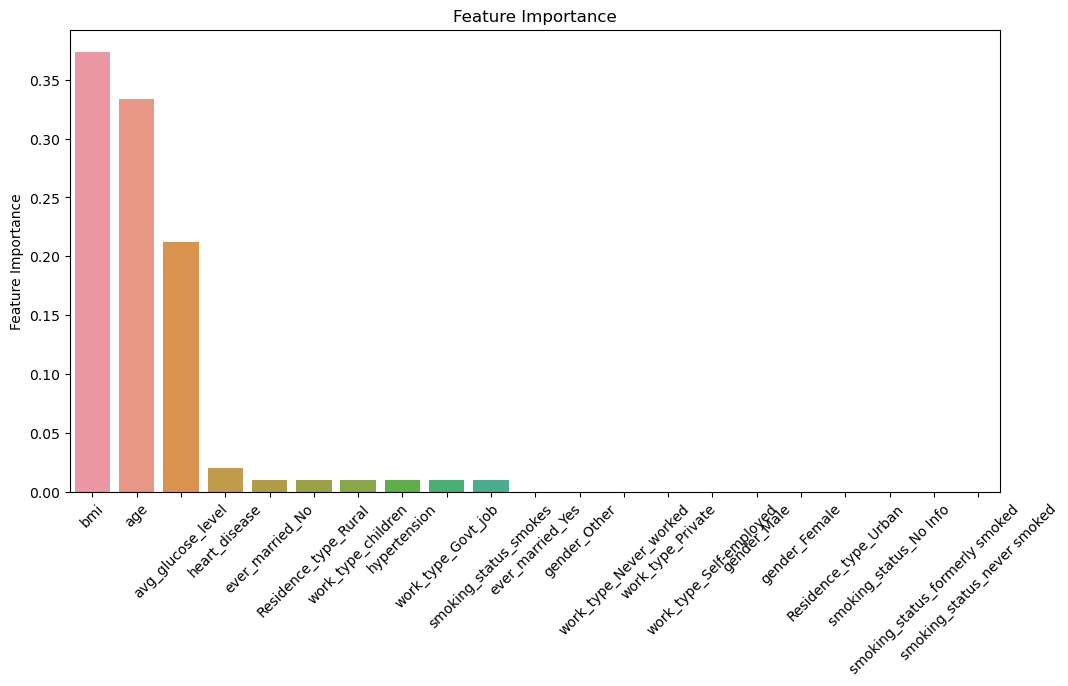

In [121]:
plt.figure(figsize=(12,6))
sns.barplot(y=ABClassifierFeatureImportance["Feature Importance"], x=ABClassifierFeatureImportance.index)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

### 8.7.5 AdaBoosting with GridSearchCV

In [122]:
# Accuracy scores on train and validation sets with different learning rates
learningRates = [0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]
for learningRate in learningRates:
    AB = AdaBoostClassifier(n_estimators=20, learning_rate = learningRate, random_state=42)
    AB.fit(X_train, y_train)
    print("Learning rate: ", learningRate)
    print("Accuracy score (training): {0:.3f}".format(AB.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(AB.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.762
Accuracy score (test): 0.759

Learning rate:  0.1
Accuracy score (training): 0.762
Accuracy score (test): 0.759

Learning rate:  0.15
Accuracy score (training): 0.762
Accuracy score (test): 0.759

Learning rate:  0.25
Accuracy score (training): 0.778
Accuracy score (test): 0.774

Learning rate:  0.5
Accuracy score (training): 0.764
Accuracy score (test): 0.760

Learning rate:  0.6
Accuracy score (training): 0.763
Accuracy score (test): 0.760

Learning rate:  0.75
Accuracy score (training): 0.773
Accuracy score (test): 0.767

Learning rate:  0.85
Accuracy score (training): 0.779
Accuracy score (test): 0.776

Learning rate:  1
Accuracy score (training): 0.784
Accuracy score (test): 0.779



In [123]:
param_grid = {"n_estimators": [15, 20, 100, 500], "learning_rate": [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25, 1.5]}
ABClassifierGrid = AdaBoostClassifier(random_state=42)
ABClassifierGrid = GridSearchCV(ABClassifierGrid, param_grid, cv=5, scoring= 'f1')
ABClassifierGrid.fit(X_train, y_train)

[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=1; total time=   1.7s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=0.5; total time=   2.2s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=0.5; total time=   2.9s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=1; total time=   4.8s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.2, max_features=3, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.2, max_features=3, n_estimators=100, subsample=1; total time=   0.5s
[CV] END learning_rate=0.2, max_features=3, n_estimators=200, subsample=1; total time=   0.9s
[CV] END learning_rate=0.2, max_features=3, n_estimators=300, subsample=1; total time=   1.3s
[CV] END learning_rate=0.2, max_features=4, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.2, max_featur

[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=0.5; total time=   2.1s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=1; total time=   3.2s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=1; total time=   4.8s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=1; total time=   1.4s
[CV] END learning_rate=0.2, max_features=3, n_estimators=200, subsample=0.5; total time=   0.9s
[CV] END learning_rate=0.2, max_features=3, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END learning_rate=0.2, max_features=4, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.2, max_features=4, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_fe

[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=1; total time=   1.7s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=0.5; total time=   2.2s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=0.5; total time=   3.0s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=1; total time=   0.4s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=1; total time=   0.4s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.2, max_featu

[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=1; total time=   1.6s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=1; total time=   3.3s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=0.5; total time=   3.0s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=1; total time=   0.4s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=1; total time=   0.8s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=1; total time=   0.8s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=1; total time=   1.1s
[CV] END learning_rate=0.2, max_features=3, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=3

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25,
                                           1.5],
                         'n_estimators': [15, 20, 100, 500]},
             scoring='f1')

In [124]:
print('Best Parameters of GridSearchCV for AdaBoosting Model: ', ABClassifierGrid.best_params_)
print('Best Estimator of GridSearchCV for AdaBoosting Model: ', ABClassifierGrid.best_estimator_)

Best Parameters of GridSearchCV for AdaBoosting Model:  {'learning_rate': 1.5, 'n_estimators': 500}
Best Estimator of GridSearchCV for AdaBoosting Model:  AdaBoostClassifier(learning_rate=1.5, n_estimators=500, random_state=42)


In [125]:
y_pred_GABC = ABClassifierGrid.predict(X_test)
y_train_pred_GABC = ABClassifierGrid.predict(X_train)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1540               542
Actual negative       251              2264

Accuracy  0.83
 
           Positive      Negative
Num case     2082          2515
Precision    0.86          0.81
Recall       0.74          0.90
F1           0.80          0.85
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      2082
           1       0.81      0.90      0.85      2515

    accuracy                           0.83      4597
   macro avg       0.83      0.82      0.82      4597
weighted avg       0.83      0.83      0.83      4597



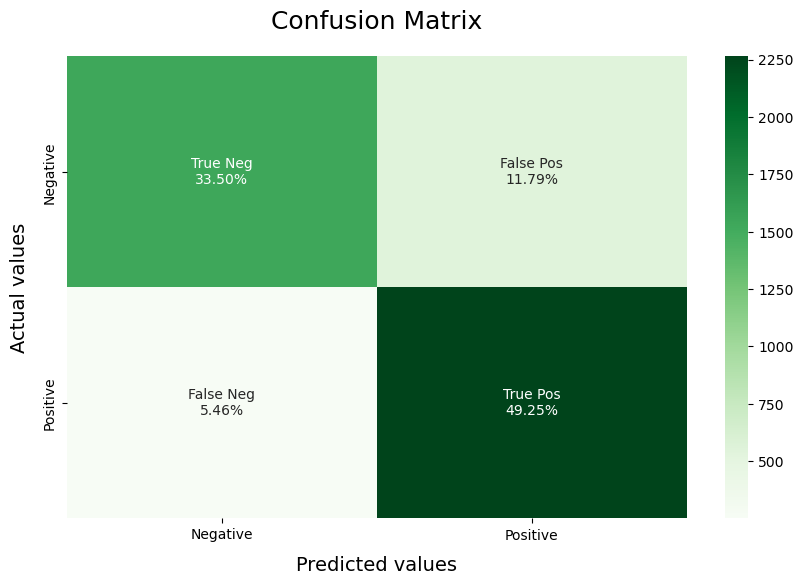

In [126]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_GABC) 

### 8.7.5 ROC curve and AUC with AdaBoosting

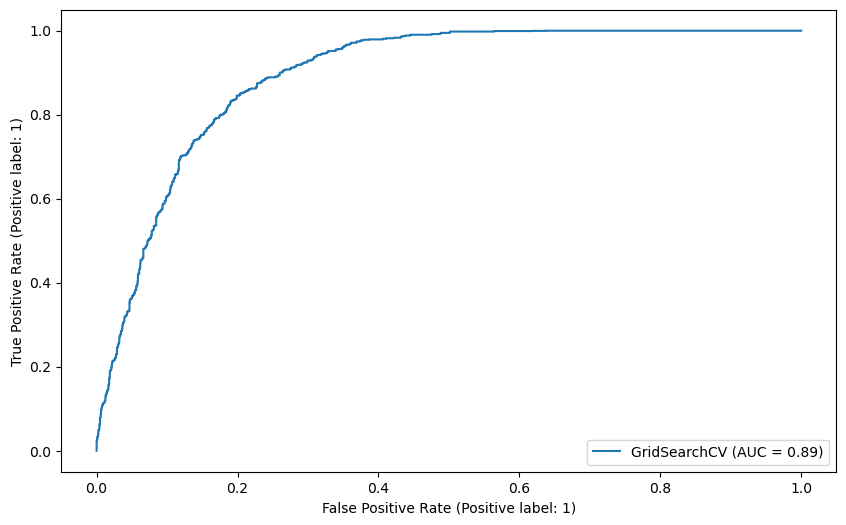

In [127]:
svc_disp = RocCurveDisplay.from_estimator(ABClassifierGrid, X_test, y_test)

## 8.8 XGBoosting (XGB) implementation

### 8.8.1 XGBoosting with default parameters

In [129]:
# Construction Model:
from xgboost import XGBClassifier
XGBoostClassifier = XGBClassifier(random_state=101)
# fit the model
XGBoostClassifier.fit(X_train, y_train)
# Predict values for Test dataset
y_pred_XGBC = XGBoostClassifier.predict(X_test)
# Predict training values for Test dataset
y_train_pred_XGBC = XGBoostClassifier.predict(X_train)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1842               240
Actual negative         2              2513

Accuracy  0.95
 
           Positive      Negative
Num case     2082          2515
Precision    1.00          0.91
Recall       0.88          1.00
F1           0.94          0.95
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2082
           1       0.91      1.00      0.95      2515

    accuracy                           0.95      4597
   macro avg       0.96      0.94      0.95      4597
weighted avg       0.95      0.95      0.95      4597



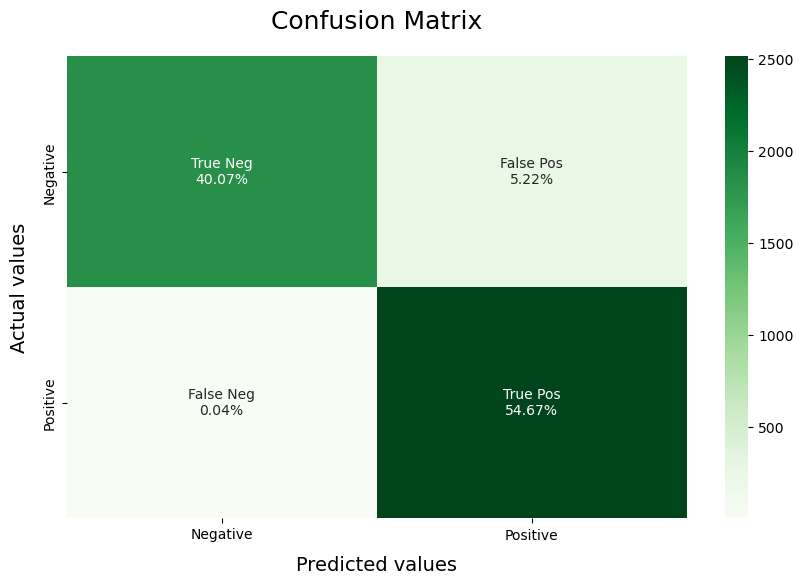

In [130]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_XGBC) 

### 8.8.2 XGBoosting with cross validation

In [131]:
bestXGBoostClassifier = XGBClassifier(random_state=101)
bestXGBoostClassifierScores = cross_validate(bestXGBoostClassifier, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
bestXGBoostClassifierScores = pd.DataFrame(bestXGBoostClassifierScores, index = range(1, 11))
print(bestXGBoostClassifierScores)

    fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   0.452823    0.004731       0.938554        0.903108     0.992965  0.945907
2   0.451977    0.005742       0.949973        0.916898     0.997990  0.955727
3   0.445011    0.004464       0.943991        0.908425     0.996985  0.950647
4   0.418193    0.004997       0.951060        0.921715     0.993970  0.956480
5   0.430630    0.004528       0.944535        0.907678     0.998994  0.951149
6   0.427094    0.004576       0.945623        0.910846     0.996982  0.951969
7   0.424676    0.004574       0.945593        0.909341     0.998994  0.952061
8   0.538486    0.005593       0.942329        0.905109     0.997988  0.949282
9   0.534297    0.005764       0.941785        0.905764     0.995976  0.948730
10  0.440307    0.006568       0.946137        0.910174     0.998994  0.952518


In [132]:
bestXGBoostClassifierScores.mean()

fit_time          0.456349
score_time        0.005154
test_accuracy     0.944958
test_precision    0.909906
test_recall       0.996984
test_f1           0.951447
dtype: float64

### 8.8.3 XGBoosting Feature Importance 

In [133]:
XGBoostClassifier.feature_importances_ 

array([0.24237101, 0.06953117, 0.06501674, 0.05508053, 0.06204548,
       0.04096224, 0.        , 0.        , 0.04437001, 0.        ,
       0.05792432, 0.        , 0.03588817, 0.05436565, 0.00778757,
       0.05148797, 0.        , 0.05015555, 0.0463723 , 0.05959809,
       0.05704312], dtype=float32)

In [134]:
features = pd.DataFrame(index=X.columns, data=XGBoostClassifier.feature_importances_, columns=["Feature Importance"])
XGBoostClassifierFeatureImportance = features.sort_values("Feature Importance", ascending=False)
print(XGBoostClassifierFeatureImportance)

                                Feature Importance
age                                       0.242371
hypertension                              0.069531
heart_disease                             0.065017
bmi                                       0.062045
smoking_status_never smoked               0.059598
work_type_Govt_job                        0.057924
smoking_status_smokes                     0.057043
avg_glucose_level                         0.055081
work_type_Self-employed                   0.054366
Residence_type_Rural                      0.051488
smoking_status_No Info                    0.050156
smoking_status_formerly smoked            0.046372
ever_married_No                           0.044370
gender_Female                             0.040962
work_type_Private                         0.035888
work_type_children                        0.007788
gender_Male                               0.000000
gender_Other                              0.000000
ever_married_Yes               

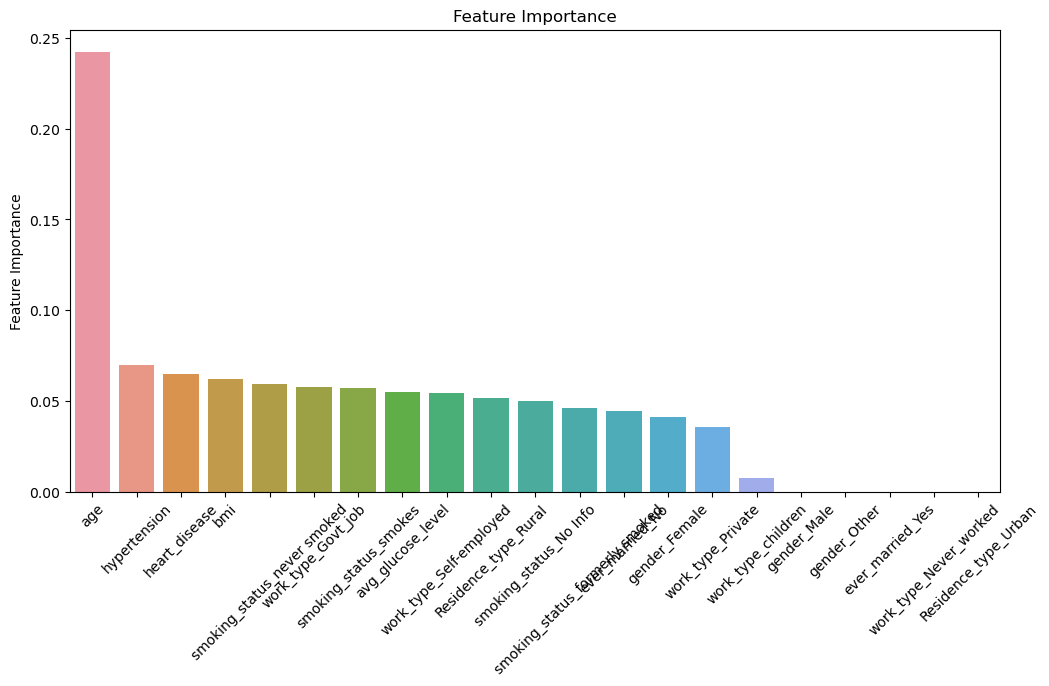

In [135]:
plt.figure(figsize=(12,6))
sns.barplot(y=XGBoostClassifierFeatureImportance["Feature Importance"], x=XGBoostClassifierFeatureImportance.index)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

### 8.8.4 XGBoosting with GridSearchCV

In [136]:
param_grid = {"n_estimators":[100, 300], 
              "max_depth":[3,5,6], 
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1], 
              "colsample_bytree":[0.5, 1]}

In [137]:
XGBoostClassifierGrid = XGBClassifier(random_state=42)
XGBoostClassifierGrid = GridSearchCV(XGBoostClassifierGrid, param_grid, scoring = "f1", verbose=2, n_jobs = -1)
XGBoostClassifierGrid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.1, 0.3], 'max_depth': [3, 5, 6],
                         'n_estimators': [100, 300], 'subsample': [0.5, 1]},
             scoring='f1', verbose=2)

In [138]:
print('\033[1mBest Parameters of GridSearchCV for RF Model:\033[0m', XGBoostClassifierGrid.best_params_)
print('\033[1mBest Estimator of GridSearchCV for RF Model:\033[0m', XGBoostClassifierGrid.best_estimator_)

Best Parameters of GridSearchCV for RF Model: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.5}
Best Estimator of GridSearchCV for RF Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)


In [139]:
y_pred_GXGBC = XGBoostClassifierGrid.predict(X_test)
y_train_pred_GXGBC = XGBoostClassifierGrid.predict(X_train)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1946               136
Actual negative         1              2514

Accuracy  0.97
 
           Positive      Negative
Num case     2082          2515
Precision    1.00          0.95
Recall       0.93          1.00
F1           0.97          0.97
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      2082
           1       0.95      1.00      0.97      2515

    accuracy                           0.97      4597
   macro avg       0.97      0.97      0.97      4597
weighted avg       0.97      0.97      0.97      4597



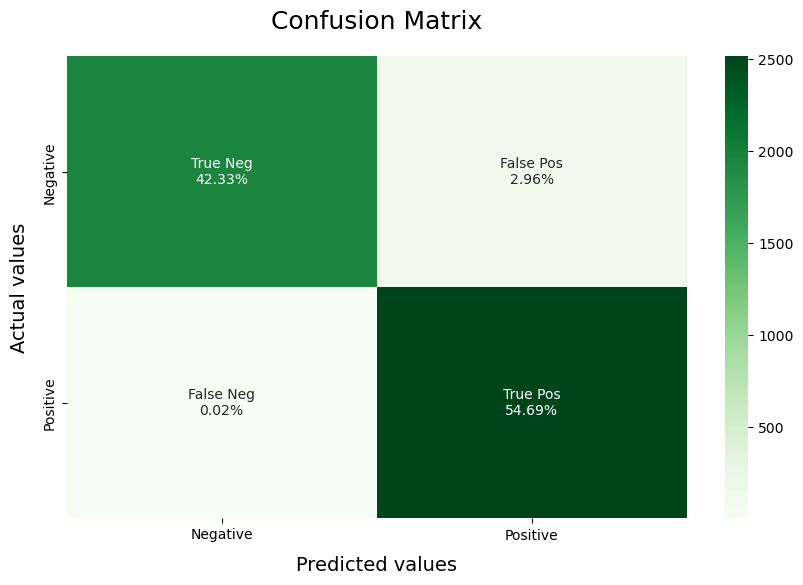

In [140]:
#Evaluation du modèle:
model_evaluation(y_test, y_pred_GXGBC) 

### 8.8.5 ROC curve and AUC with XGBoost Classifier

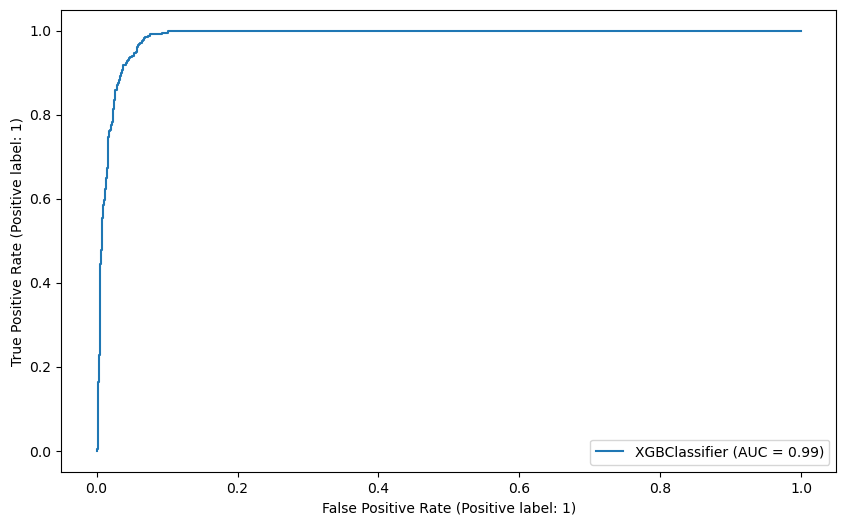

In [141]:
svc_disp = RocCurveDisplay.from_estimator(XGBoostClassifier, X_test, y_test)

## 8.8 Naive Bayes implementation

### 8.8.1 Naive Bayes with default parameters

In [143]:
# Construction model
from sklearn.naive_bayes import GaussianNB
naiveBayesclassifier = GaussianNB()
# fit the model
naiveBayesclassifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred_NBC = naiveBayesclassifier.predict(X_test)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       245              1837
Actual negative         0              2515

Accuracy  0.60
 
           Positive      Negative
Num case     2082          2515
Precision    1.00          0.58
Recall       0.12          1.00
F1           0.21          0.73
              precision    recall  f1-score   support

           0       1.00      0.12      0.21      2082
           1       0.58      1.00      0.73      2515

    accuracy                           0.60      4597
   macro avg       0.79      0.56      0.47      4597
weighted avg       0.77      0.60      0.50      4597



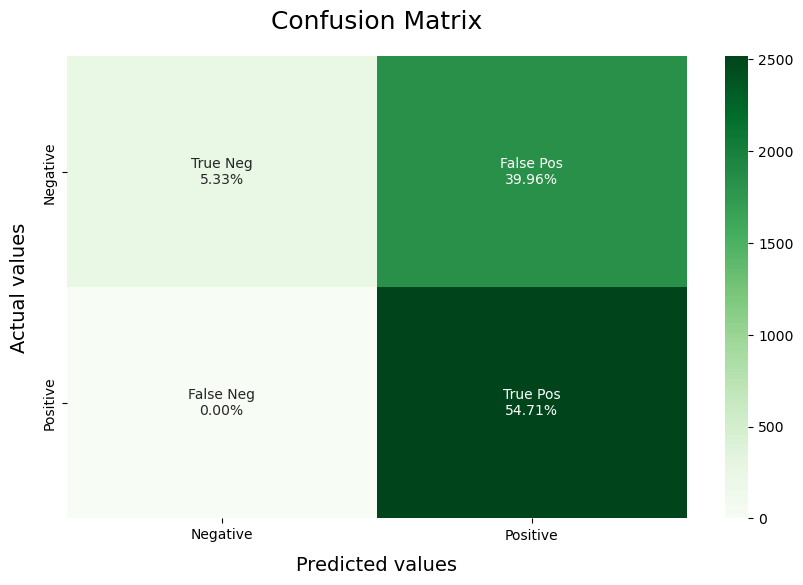

In [144]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_NBC) 

### 8.8.2 Naive Bayes with cross validation

In [145]:
bestNaiveBayesClassifier = GaussianNB()
bestNaiveBayesClassifierScores = cross_validate(bestNaiveBayesClassifier, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
bestNaiveBayesClassifierScores = pd.DataFrame(bestNaiveBayesClassifierScores, index = range(1, 11))
print(bestNaiveBayesClassifierScores)

    fit_time  score_time  test_accuracy  test_precision  test_recall   test_f1
1   0.010440    0.005557       0.601958        0.576144     1.000000  0.731080
2   0.005549    0.005111       0.598695        0.574235     0.998995  0.729274
3   0.004199    0.004638       0.634040        0.596639     0.998995  0.747088
4   0.005347    0.003935       0.606308        0.578825     1.000000  0.733235
5   0.005183    0.003382       0.595432        0.571922     1.000000  0.727672
6   0.004783    0.003932       0.593257        0.570608     1.000000  0.726608
7   0.004899    0.003357       0.600109        0.574899     1.000000  0.730077
8   0.005416    0.003304       0.595756        0.572251     1.000000  0.727938
9   0.004706    0.003849       0.585419        0.566059     1.000000  0.722909
10  0.005597    0.003685       0.599565        0.574566     1.000000  0.729809


In [146]:
bestNaiveBayesClassifierScores.mean()

fit_time          0.005612
score_time        0.004075
test_accuracy     0.601054
test_precision    0.575615
test_recall       0.999799
test_f1           0.730569
dtype: float64

### 8.8.3 Naive Bayes with GridSearchCV

In [147]:
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

In [148]:
naiveBayesClassifierGrid = XGBClassifier(random_state=42)
naiveBayesClassifierGrid = GridSearchCV(naiveBayesClassifierGrid, param_grid, scoring = "f1", verbose=2, n_jobs = -1)
naiveBayesClassifierGrid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1, param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='f1', verbose=2)

In [149]:
print('\033[1mBest Parameters of GridSearchCV for RF Model:\033[0m', naiveBayesClassifierGrid.best_params_)
print('\033[1mBest Estimator of GridSearchCV for RF Model:\033[0m', naiveBayesClassifierGrid.best_estimator_)

Best Parameters of GridSearchCV for RF Model: {'alpha': 0.5}
Best Estimator of GridSearchCV for RF Model: XGBClassifier(alpha=0.5, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)


In [150]:
y_pred_GNBC = naiveBayesClassifierGrid.predict(X_test)
y_train_pred_GNBC = naiveBayesClassifierGrid.predict(X_train)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1840               242
Actual negative         2              2513

Accuracy  0.95
 
           Positive      Negative
Num case     2082          2515
Precision    1.00          0.91
Recall       0.88          1.00
F1           0.94          0.95
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2082
           1       0.91      1.00      0.95      2515

    accuracy                           0.95      4597
   macro avg       0.96      0.94      0.95      4597
weighted avg       0.95      0.95      0.95      4597



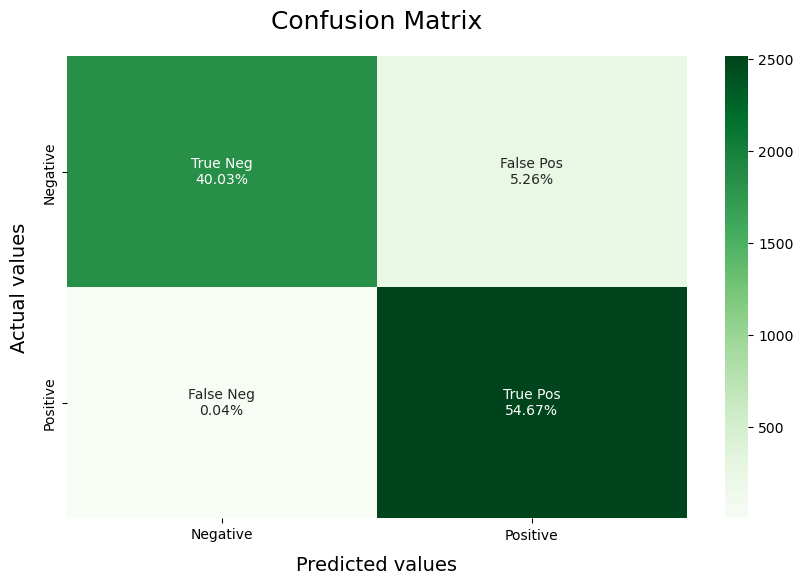

In [151]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_GNBC) 

### 8.9.5 ROC curve and AUC with Naive Bayes Classifier

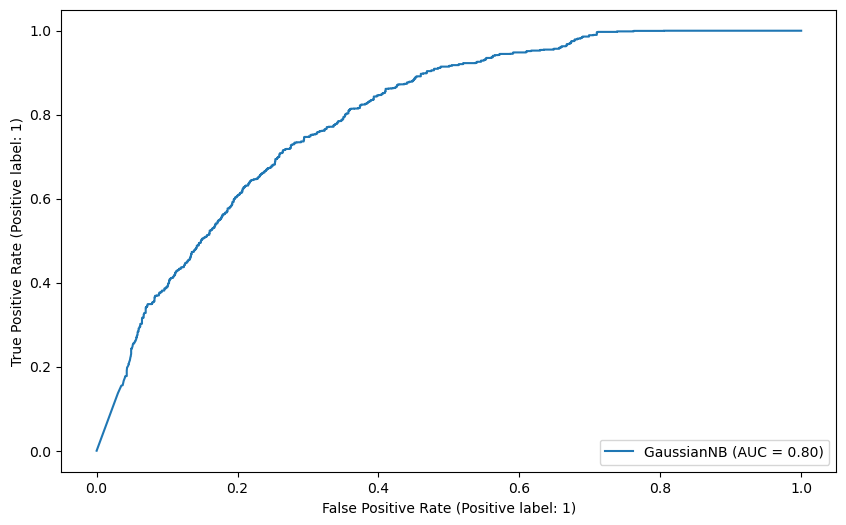

In [152]:
svc_disp = RocCurveDisplay.from_estimator(naiveBayesclassifier, X_test, y_test)

# 9 The neural model (Deep learning model)

## 9.1 The neural model with default parameters

In [154]:
# Importing the libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [155]:
# Initialising the ANN
ANNClassifier = Sequential()    
# Adding the input layer and the first hidden layer kernel_constraint=maxnorm(3)
ANNClassifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
# Adding the second hidden layer
ANNClassifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))    
# Adding the output layer
ANNClassifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))    
# Compiling the ANN
ANNClassifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [156]:
# Fitting the ANN to the Training set
print(X_train[:,2])
print(y_train)
ANNClassifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

[-0.39826013 -0.39826013 -0.39826013 ... -0.39826013 -0.39826013
 -0.39826013]
10602    1
8275     1
804      0
11746    1
9953     1
        ..
1099     0
18898    1
11798    1
6637     1
2575     0
Name: stroke, Length: 18386, dtype: int64
Epoch 1/100


2024-06-25 16:27:11.152699: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


In [ ]:
# evaluate accuracie model
scores = ANNClassifier.evaluate(X_test, y_test)
print("%s: %.2f%%" % (ANNClassifier.metrics_names[1], scores[1]*100))

In [ ]:
# Predicting the Test set results
y_predANNC = ANNClassifier.predict(X_test)
y_predANNC = (y_predANNC > 0.5)

In [ ]:
# Evaluation du modèle:
model_evaluation(y_test, y_predANNC) 

## 9.2 The neural model with dropout visible layer

In [ ]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.constraints import unit_norm

def createModel():
    # Initialising the ANN
    ANNDropoutVisibeClassifier = Sequential()  
    ANNDropoutVisibeClassifier.add(Dropout(0.2, input_shape=(10,)))
    # Adding the input layer and the first hidden layer 
    ANNDropoutVisibeClassifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    # Adding the second hidden layer
    ANNDropoutVisibeClassifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))    
    # Adding the output layer
    ANNDropoutVisibeClassifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))   
    # Compiling tANNDropoutVisibeClassifierhe ANN
    optimisateur = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
    ANNDropoutVisibeClassifier.compile(optimizer = optimisateur, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ANNDropoutVisibeClassifier

In [ ]:
estimators = []
estimators.append(('mlp', KerasClassifier(build_fn=createModel, nb_epoch=100, batch_size=10)))
pipeline = Pipeline(estimators)
validationCroise = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
resultDropoutVisibe = cross_val_score(pipeline, X_train, y_train, cv=validationCroise)

In [ ]:
# evaluate accuracie model
print(resultDropoutVisibe)
print("Accuracie: %.2f%% (%.2f%%)" % (resultDropoutVisibe.mean()*100, resultDropoutVisibe.std()*100))

In [ ]:
resultDropoutVisibeScores = pd.DataFrame(resultDropoutVisibe, index = range(1, 11))
print(resultDropoutVisibeScores)

In [ ]:
resultDropoutVisibeScores.mean()

## 9.3 The neural model with dropout hidden layer

In [157]:
def createModel():
    # Initialising the ANN
    ANNDropoutHiddenClassifier = Sequential()  
    # Adding the input layer and the first hidden layer 
    ANNDropoutHiddenClassifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
    # Adding the second hidden layer
    ANNDropoutHiddenClassifier.add(Dropout(0.2))
    ANNDropoutHiddenClassifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))    
    # Adding the output layer
    ANNDropoutHiddenClassifier.add(Dropout(0.2))
    ANNDropoutHiddenClassifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))   
    # Compiling the ANN
    optimisateur = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
    ANNDropoutHiddenClassifier.compile(optimizer = optimisateur, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ANNDropoutHiddenClassifier

In [158]:
estimators = []
estimators.append(('mlp', KerasClassifier(build_fn=createModel, nb_epoch=100, batch_size=10)))
pipeline = Pipeline(estimators)
validationCroise = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
resultDropoutHidden = cross_val_score(pipeline, X_train, y_train, cv=validationCroise)

NameError: name 'KerasClassifier' is not defined

In [159]:
# evaluate accuracie model
print("Accuracie: %.2f%% (%.2f%%)" % (resultDropoutHidden.mean()*100, resultDropoutHidden.std()*100))

NameError: name 'resultDropoutHidden' is not defined

In [160]:
resultDropoutHiddenScores = pd.DataFrame(resultDropoutHidden, index = range(1, 11))
print(resultDropoutHiddenScores)

NameError: name 'resultDropoutHidden' is not defined

In [161]:
resultDropoutHiddenScores.mean()

NameError: name 'resultDropoutHiddenScores' is not defined

## 9.4 Improving the ANN: The neural model with GridSearchCV

Dropout Regularization to reduce overfitting if needed

In [162]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [163]:
def buildClassifier(optimizer):
    ANNClassifier = Sequential()
    ANNClassifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
    ANNClassifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    ANNClassifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    ANNClassifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ANNClassifier

In [164]:
classifier = KerasClassifier(build_fn = buildClassifier)

In [165]:
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}

In [166]:
gridANNClassifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
gridANNClassifier = gridANNClassifier.fit(X_train, y_train)

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500
Epoch 1/500


ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_9" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_10" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_11" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_12" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_13" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_14" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_15" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_16" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_17" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_18" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_19" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_20" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_21" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_22" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_23" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_24" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_25" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_26" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_27" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_28" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_29" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_30" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_31" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_32" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_33" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_34" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_35" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_36" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_37" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_38" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_39" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_40" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_41" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_42" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_43" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_44" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_45" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_46" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_47" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_48" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_49" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_50" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_51" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_52" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_53" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_54" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_55" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_56" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_57" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_58" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_59" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_60" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_61" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_62" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_63" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_64" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_65" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_66" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_67" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_68" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_69" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_70" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_71" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_72" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_73" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_74" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_75" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_76" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_77" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_78" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_79" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/jw/mbxymz_x1z1gg0d2_bqgbnxw0000gn/T/__autograph_generated_fileoyzmkfov.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/macbook/anaconda3/lib/python3.11/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_80" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 21)



In [ ]:
print('\033[1mBest Parameters of GridSearchCV for Classifier ANN Model:\033[0m', gridy: 0.9318
Epoch 496/500
255/255 [==============================] - 0s 353us/step - loss: 0.1911 - accuracy: 0.9314
Epoch 497/500
255/255 [==============================] - 0s 361us/step - loss: 0.1907 - accuracy: 0.9309
Epoch 498/500
255/255 [==============================] - 0s 349us/step - loss: 0.1906 - accuracy: 0.9314
Epoch 499/500
255/255 [==============================] - 0s 348us/step - loss: 0.1908 - accuracy: 0.9318
Epoch 500/500
255/255 [==============================] - 0s 341us/step - loss: 0.1910 - accuracy: 0.9319
29/29 [==============================] - 0s 341us/step
Epoch 1/500
255/255 [==============================] - 0s 394us/step - loss: 0.5137 - accuracy: 0.9274
Epoch 2/500
255/255 [==============================] - 0s 342us/step - loss: 0.2222 - accuracy: 0.9294
Epoch 3/500
255/255 [==============================] - 0s 340us/step - loss: 0.2057 - accuracy: 0.9294
Epoch 4/500
255/255 [==============================] - 0s 346us/step - loss: 0.2028 - accuracy: 0.9294
Epoch 5/500
255/255 [==============================] - 0s 356us/step - loss: 0.2014 - accuracy: 0.9294
Epoch 6/500
255/255 [==============================] - 0s 343us/step - loss: 0.2006 - accuracy: 0.9294
Epoch 7/500
255/255 [==============================] - 0s 342us/step - loss: 0.1997 - accuracy: 0.9294
Epo255 [==============================] - 0s 348us/step - loss: 0.1980 - accuracy: 0.9294
Epoch 12/500
255/255 [==============================] - 0s 349us/step - loss: 0.1982 - accuracy: 0.9294
Epoch 13ch 8/500
255/255 [==============================] - 0s 341us/step - loss: 0.1993 - accuracy: 0.9294
Epoch 9/500
255/255 [==============================] - 0s 344us/step - loss: 0.1988 - accuracy: 0.9294
Epoch 10/500
255/255 [==============================] - 0s 342us/step - loss: 0.1985 - accuracy: 0.9294
Epoch 11/500
255//500
255/255 [==============================] - 0s 339us/step - loss: 0.1977 - accuracy: 0.9294
Epoch 14/500
255/255 [==============================] - 0s 341us/step - loss: 0.1975 - accuracy: 0.9294
Epoch 15/500
255/255 [==============================] - 0s 344us/step - loss: 0.1975 - accuracy: 0.9294
Epoch 16/500
255/255 [==============================] - 0s 342us/step - loss: 0.1974 - accuracy: 0.9294
Epoch 17/500
255/255 [==============================] - 0s 346us/step - loss: 0.1972 - accuracy: 0.9294
Epoch 18/500
255/255 [==============================] - 0s 346us/step - loss: 0.1972 - accuracy: 0.9294
Epoch 19/500
255/255 [==============================] - 0s 339us/step - loss: 0.1971 - accuracy: 0.9294
Epoch 20/500
255/255 [==============================] - 0s 340us/step - loss: 0.1970 - accuracy: 0.9294
Epoch 21/500
255/255 [==============================] - 0s 345us/step - loss: 0.1969 - accuracy: 0.9294
Epoch 22/500
255/255 [==============================] - 0s 349us/step - loss: 0.1970 - accuracy: 0.9294
Epoch 23/500
255/255 [==============================] - 0s 337us/step - loss: 0.1967 - accuracy: 0.9294
Epoch 24/500
255/255 [==============================] - 0s 343us/step - loss: 0.1970 - accuracy: 0.9294
Epoch 25/500
255/255 [==============================] - 0s 343us/step - loss: 0.1966 - accuracy: 0.9294
Epoch 26/500
255/255 [==============================] - 0s 341us/step - loss: 0.1964 - accuracy: 0.9294
Epoch 27/500
255/255 [==============================] - 0s 347us/step - loss: 0.1966 - accuracy: 0.9294
Epoch 28/500
255/255 [==============================] - 0s 340us/step - loss: 0.1966 - accuracy: 0.9294
Epoch 29/500
255/255 [==============================] - 0s 344us/step - loss: 0.1965 - accuracy: 0.9294
Epoch 30/500
255/255 [==============================] - 0s 342us/step - loss: 0.1963 - accuracy: 0.9294
Epoch 31/500
255/255 [==============================] - 0s 343us/step - loss: 0.1962 - accuracy: 0.9294
Epoch 32/500
255/255 [==============================] - 0s 343us/step - loss: 0.1961 - accuracy: 0.9294
Epoch 33/500
255/255 [==============================] - 0s 347us/step - loss: 0.1961 - accuracy: 0.9294
Epoch 34/500
255/255 [==============================] - 0s 343us/step - loss: 0.1956 - accuracy: 0.9294
Epoch 35/500
255/255 [==============================] - 0s 347us/step - loss: 0.1957 - accuracy: 0.9294
Epoch 36/500
255/255 [==============================] - 0s 339us/step - loss: 0.1958 - accuracy: 0.9294
Epoch 37/500
255/255 [==============================] - 0s 348us/step - loss: 0.1955 - accuracy: 0.9294
Epoch 38/500
255/255 [==============================] - 0s 344us/step - loss: 0.1955 - accuracy: 0.9294
Epoch 39/500
255/255 [==============================] - 0s 342us/step - loss: 0.1954 - accuracy: 0.9294
Epoch 40/500
255/255 [==============================] - 0s 344us/step - loss: 0.1954 - accuracy: 0.9294
Epoch 41/500
255/255 [==============================] - 0s 342us/step - loss: 0.1954 - accuracy: 0.9296
Epoch 42/500
255/255 [==============================] - 0s 344us/step - loss: 0.1953 - accuracy: 0.9294
Epoch 43/500
255/255 [==============================] - 0s 348us/step - loss: 0.1951 - accuracy: 0.9297
Epoch 44/500
255/255 [==============================] - 0s 343us/step - loss: 0.1952 - accuracy: 0.9299
Epoch 45/500
255/255 [==============================] - 0s 345us/step - loss: 0.1945 - accuracy: 0.9296
Epoch 46/500
255/255 [==============================] - 0s 348us/step - loss: 0.1950 - accuracy: 0.9298
Epoch 47/500
255/255 [==============================] - 0s 340us/step - loss: 0.1948 - accuracy: 0.9298
Epoch 48/500
255/255 [==============================] - 0s 342us/step - loss: 0.1949 - accuracy: 0.9301
Epoch 49/500
255/255 [==============================] - 0s 345us/step - loss: 0.1948 - accuracy: 0.9298
Epoch 50/500
255/255 [==============================] - 0s 338us/step - loss: 0.1948 - accuracy: 0.9297
Epoch 51/500
255/255 [==============================] - 0s 346us/step - loss: 0.1948 - accuracy: 0.9299
Epoch 52/500

255/255 [==============================] - 0s 344us/step - loss: 0.1947 - accuracy: 0.9298
Epoch 53/500
255/255 [==============================] - 0s 341us/step - loss: 0.1946 - accuracy: 0.9298
Epoch 54/500
255/255 [==============================] - 0s 342us/step - loss: 0.1948 - accuracy: 0.9301
Epoch 55/500
255/255 [==============================] - 0s 346us/step - loss: 0.1948 - accuracy: 0.9301
Epoch 56/500
255/255 [==============================] - 0s 350us/step - loss: 0.1945 - accuracy: 0.9299
Epoch 57/500
255/255 [==============================] - 0s 340us/step - loss: 0.1946 - accuracy: 0.9301
Epoch 58/500
255/255 [==============================] - 0s 342us/step - loss: 0.1946 - accuracy: 0.9297
Epoch 59/500
255/255 [==============================] - 0s 338us/step - loss: 0.1946 - accuracy: 0.9298
Epoch 60/500
255/255 [==============================] - 0s 342us/step - loss: 0.1943 - accuracy: 0.9299
Epoch 61/500
255/255 [==============================] - 0s 346us/step - loss: 0.1945 - accuracy: 0.9301
Epoch 62/500
255/255 [==============================] - 0s 342us/step - loss: 0.1943 - accuracy: 0.9298
Epoch 63/500
255/255 [==============================] - 0s 341us/step - loss: 0.1945 - accuracy: 0.9297
Epoch 64/500
255/255 [==============================] - 0s 339us/step - loss: 0.1944 - accuracy: 0.9298
Epoch 65/500
255/255 [==============================] - 0s 344us/step - loss: 0.1944 - accuracy: 0.9298
Epoch 66/500
255/255 [==============================] - 0s 339us/step - loss: 0.1945 - accuracy: 0.9301
Epoch 67/500
255/255 [==============================] - 0s 343us/step - loss: 0.1944 - accuracy: 0.9299
Epoch 68/500
255/255 [==============================] - 0s 339us/step - loss: 0.1943 - accuracy: 0.9301
Epoch 69/500
255/255 [==============================] - 0s 348us/step - loss: 0.1944 - accuracy: 0.9294
Epoch 70/500
255/255 [==============================] - 0s 339us/step - loss: 0.1943 - accuracy: 0.9297
Epoch 71/500
255/255 [==============================] - 0s 336us/step - loss: 0.1942 - accuracy: 0.9301
Epoch 72/500
255/255 [==============================] - 0s 344us/step - loss: 0.1943 - accuracy: 0.9297
Epoch 73/500
255/255 [==============================] - 0s 344us/step - loss: 0.1941 - accuracy: 0.9294
Epoch 74/500
255/255 [==============================] - 0s 345us/step - loss: 0.1943 - accuracy: 0.9301
Epoch 75/500
255/255 [==============================] - 0s 342us/step - loss: 0.1945 - accuracy: 0.9297
Epoch 76/500
255/255 [==============================] - 0s 377us/step - loss: 0.1941 - accuracy: 0.9296
Epoch 77/500
255/255 [==============================] - 0s 379us/step - loss: 0.1943 - accuracy: 0.9298
Epoch 78/500
255/255 [==============================] - 0s 387us/step - loss: 0.1942 - accuracy: 0.9298
Epoch 79/500
255/255 [==============================] - 0s 383us/step - loss: 0.1940 - accuracy: 0.9302
Epoch 80/500
255/255 [==============================] - 0s 382us/step - loss: 0.1945 - accuracy: 0.9304
Epoch 81/500
255/255 [==============================] - 0s 346us/step - loss: 0.1942 - accuracy: 0.9297
Epoch 82/500
255/255 [==============================] - 0s 345us/step - loss: 0.1940 - accuracy: 0.9294
Epoch 83/500
255/255 [==============================] - 0s 342us/step - loss: 0.1940 - accuracy: 0.9302
Epoch 84/500
255/255 [==============================] - 0s 341us/step - loss: 0.1942 - accuracy: 0.9301
Epoch 85/500
255/255 [==============================] - 0s 341us/step - loss: 0.1942 - accuracy: 0.9298
Epoch 86/500
255/255 [==============================] - 0s 340us/step - loss: 0.1941 - accuracy: 0.9298
Epoch 87/500
255/255 [==============================] - 0s 346us/step - loss: 0.1942 - accuracy: 0.9299
Epoch 88/500
255/255 [==============================] - 0s 344us/step - loss: 0.1942 - accuracy: 0.9298
Epoch 89/500
255/255 [==============================] - 0s 340us/step - loss: 0.1943 - accuracy: 0.9302
Epoch 90/500
255/255 [==============================] - 0s 345us/step - loss: 0.1939 - accuracy: 0.9301
Epoch 91/500
255/255 [==============================] - 0s 343us/step - loss: 0.1942 - accuracy: 0.9303
Epoch 92/500
255/255 [==============================] - 0s 344us/step - loss: 0.1942 - accuracy: 0.9302
Epoch 93/500
255/255 [==============================] - 0s 341us/step - loss: 0.1940 - accuracy: 0.9299
Epoch 94/500
255/255 [==============================] - 0s 340us/step - loss: 0.1939 - accuracy: 0.9301
Epoch 95/500
255/255 [==============================] - 0s 347us/step - loss: 0.1943 - accuracy: 0.9303
Epoch 96/500
255/255 [==============================] - 0s 345us/step - loss: 0.1941 - accuracy: 0.9302
Epoch 97/500
255/255 [==============================] - 0s 338us/step - loss: 0.1941 - accuracy: 0.9306
Epoch 98/500
255/255 [==============================] - 0s 344us/step - loss: 0.1940 - accuracy: 0.9301
Epoch 99/500
255/255 [==============================] - 0s 341us/step - loss: 0.1938 - accuracy: 0.9299
Epoch 100/500
255/255 [==============================] - 0s 341us/step - loss: 0.1941 - accuracy: 0.9301
Epoch 101/500
255/255 [==============================] - 0s 343us/step - loss: 0.1941 - accuracy: 0.9298
Epoch 102/500
255/255 [==============================] - 0s 343us/step - loss: 0.1940 - accuracy: 0.9301
Epoch 103/500
255/255 [==============================] - 0s 342us/step - loss: 0.1941 - accuracy: 0.9298
Epoch 104/500
255/255 [==============================] - 0s 341us/step - loss: 0.1937 - accuracy: 0.9304
Epoch 105/500
255/255 [==============================] - 0s 343us/step - loss: 0.1939 - accuracy: 0.9303
Epoch 106/500
255/255 [==============================] - 0s 341us/step - loss: 0.1937 - accuracy: 0.9302
Epoch 107/500
255/255 [==============================] - 0s 345us/step - loss: 0.1939 - accuracy: 0.9302
Epoch 108/500
255/255 [==============================] - 0s 343us/step - loss: 0.1940 - accuracy: 0.9301
Epoch 109/500
255/255 [==============================] - 0s 341us/step - loss: 0.1939 - accuracy: 0.9303
Epoch 110/500
255/255 [==============================] - 0s 342us/step - loss: 0.1938 - accuracy: 0.9303
Epoch 111/500
255/255 [==============================] - 0s 341us/step - loss: 0.1939 - accuracy: 0.9310
Epoch 112/500
255/255 [==============================] - 0s 343us/step - loss: 0.1941 - accuracy: 0.9303
Epoch 113/500
255/255 [==============================] - 0s 344us/step - loss: 0.1940 - accuracy: 0.9308
Epoch 114/500
255/255 [==============================] - 0s 343us/step - loss: 0.1941 - accuracy: 0.9301
Epoch 115/500
255/255 [==============================] - 0s 343us/step - loss: 0.1939 - accuracy: 0.9312
Epoch 116/500
255/255 [==============================] - 0s 346us/step - loss: 0.1939 - accuracy: 0.9309
Epoch 117/500
255/255 [==============================] - 0s 341us/step - loss: 0.1939 - accuracy: 0.9309
Epoch 118/500
255/255 [==============================] - 0s 343us/step - loss: 0.1938 - accuracy: 0.9303
Epoch 119/500
255/255 [==============================] - 0s 342us/step - loss: 0.1939 - accuracy: 0.9309
Epoch 120/500
255/255 [==============================] - 0s 341us/step - loss: 0.1939 - accuracy: 0.9306
Epoch 121/500
255/255 [==============================] - 0s 341us/step - loss: 0.1938 - accuracy: 0.9309
Epoch 122/500
255/255 [==============================] - 0s 340us/step - loss: 0.1938 - accuracy: 0.9303
Epoch 123/500
255/255 [==============================] - 0s 341us/step - loss: 0.1938 - accuracy: 0.9309
Epoch 124/500
255/255 [==============================] - 0s 343us/step - loss: 0.1939 - accuracy: 0.9302
Epoch 125/500
255/255 [==============================] - 0s 346us/step - loss: 0.1937 - accuracy: 0.9313
Epoch 126/500
255/255 [==============================] - 0s 339us/step - loss: 0.1938 - accuracy: 0.9307
Epoch 127/500
255/255 [==============================] - 0s 342us/step - loss: 0.1940 - accuracy: 0.9304
Epoch 128/500
255/255 [==============================] - 0s 345us/step - loss: 0.1937 - accuracy: 0.9306
Epoch 129/500
255/255 [==============================] - 0s 341us/step - loss: 0.1941 - accuracy: 0.9306
Epoch 130/500

255/255 [==============================] - 0s 344us/step - loss: 0.1936 - accuracy: 0.9307
Epoch 131/500
255/255 [==============================] - 0s 340us/step - loss: 0.1938 - accuracy: 0.9303
Epoch 132/500
255/255 [==============================] - 0s 346us/step - loss: 0.1939 - accuracy: 0.9309
Epoch 133/500
255/255 [==============================] - 0s 338us/step - loss: 0.1938 - accuracy: 0.9306
Epoch 134/500
255/255 [==============================] - 0s 348us/step - loss: 0.1939 - accuracy: 0.9301
Epoch 135/500
255/255 [==============================] - 0s 343us/step - loss: 0.1940 - accuracy: 0.9306
Epoch 136/500
255/255 [==============================] - 0s 341us/step - loss: 0.1937 - accuracy: 0.9301
Epoch 137/500
255/255 [==============================] - 0s 342us/step - loss: 0.1939 - accuracy: 0.9306
Epoch 138/500
255/255 [==============================] - 0s 344us/step - loss: 0.1939 - accuracy: 0.9307
Epoch 139/500
255/255 [==============================] - 0s 342us/step - loss: 0.1939 - accuracy: 0.9304
Epoch 140/500
255/255 [==============================] - 0s 338us/step - loss: 0.1939 - accuracy: 0.9304
Epoch 141/500
255/255 [==============================] - 0s 337us/step - loss: 0.1937 - accuracy: 0.9302
Epoch 142/500
255/255 [==============================] - 0s 339us/step - loss: 0.1939 - accuracy: 0.9308
Epoch 143/500
255/255 [==============================] - 0s 342us/step - loss: 0.1937 - accuracy: 0.9308
Epoch 144/500
255/255 [==============================] - 0s 340us/step - loss: 0.1939 - accuracy: 0.9306
Epoch 145/500
255/255 [==============================] - 0s 345us/step - loss: 0.1938 - accuracy: 0.9303
Epoch 146/500
255/255 [==============================] - 0s 342us/step - loss: 0.1937 - accuracy: 0.9303
Epoch 147/500
255/255 [==============================] - 0s 336us/step - loss: 0.1940 - accuracy: 0.9309
Epoch 148/500
255/255 [==============================] - 0s 340us/step - loss: 0.1938 - accuracy: 0.9307
Epoch 149/500
255/255 [==============================] - 0s 342us/step - loss: 0.1939 - accuracy: 0.9307
Epoch 150/500
255/255 [==============================] - 0s 344us/step - loss: 0.1937 - accuracy: 0.9309
Epoch 151/500
255/255 [==============================] - 0s 340us/step - loss: 0.1934 - accuracy: 0.9310
Epoch 152/500
255/255 [==============================] - 0s 342us/step - loss: 0.1937 - accuracy: 0.9308
Epoch 153/500
255/255 [==============================] - 0s 339us/step - loss: 0.1938 - accuracy: 0.9304
Epoch 154/500
255/255 [==============================] - 0s 341us/step - loss: 0.1938 - accuracy: 0.9303
Epoch 155/500
255/255 [==============================] - 0s 341us/step - loss: 0.1936 - accuracy: 0.9308
Epoch 156/500
255/255 [==============================] - 0s 344us/step - loss: 0.1936 - accuracy: 0.9313
Epoch 157/500
255/255 [==============================] - 0s 342us/step - loss: 0.1937 - accuracy: 0.9313
Epoch 158/500
255/255 [==============================] - 0s 343us/step - loss: 0.1935 - accuracy: 0.9306
Epoch 159/500
255/255 [==============================] - 0s 340us/step - loss: 0.1932 - accuracy: 0.9306
Epoch 160/500
255/255 [==============================] - 0s 340us/step - loss: 0.1938 - accuracy: 0.9302
Epoch 161/500
255/255 [==============================] - 0s 344us/step - loss: 0.1938 - accuracy: 0.9306
Epoch 162/500
255/255 [==============================] - 0s 345us/step - loss: 0.1939 - accuracy: 0.9308
Epoch 163/500
255/255 [==============================] - 0s 343us/step - loss: 0.1937 - accuracy: 0.9306
Epoch 164/500
255/255 [==============================] - 0s 342us/step - loss: 0.1934 - accuracy: 0.9306
Epoch 165/500
255/255 [==============================] - 0s 341us/step - loss: 0.1933 - accuracy: 0.9308
Epoch 166/500
255/255 [==============================] - 0s 344us/step - loss: 0.1939 - accuracy: 0.9304
Epoch 167/500
255/255 [==============================] - 0s 345us/step - loss: 0.1936 - accuracy: 0.9302
Epoch 168/500
255/255 [==============================] - 0s 345us/step - loss: 0.1937 - accuracy: 0.9307
Epoch 169/500
255/255 [==============================] - 0s 344us/step - loss: 0.1937 - accuracy: 0.9309
Epoch 170/500
255/255 [==============================] - 0s 341us/step - loss: 0.1935 - accuracy: 0.9304
Epoch 171/500
255/255 [==============================] - 0s 342us/step - loss: 0.1938 - accuracy: 0.9303
Epoch 172/500
255/255 [==============================] - 0s 344us/step - loss: 0.1938 - accuracy: 0.9307
Epoch 173/500
255/255 [==============================] - 0s 344us/step - loss: 0.1938 - accuracy: 0.9301
Epoch 174/500
255/255 [==============================] - 0s 344us/step - loss: 0.1934 - accuracy: 0.9303
Epoch 175/500
255/255 [==============================] - 0s 340us/step - loss: 0.1938 - accuracy: 0.9304
Epoch 176/500
255/255 [==============================] - 0s 346us/step - loss: 0.1937 - accuracy: 0.9299
Epoch 177/500
255/255 [==============================] - 0s 348us/step - loss: 0.1936 - accuracy: 0.9307
Epoch 178/500
255/255 [==============================] - 0s 339us/step - loss: 0.1936 - accuracy: 0.9312
Epoch 179/500
255/255 [==============================] - 0s 348us/step - loss: 0.1937 - accuracy: 0.9306
Epoch 180/500
255/255 [==============================] - 0s 343us/step - loss: 0.1936 - accuracy: 0.9309
Epoch 181/500
255/255 [==============================] - 0s 342us/step - loss: 0.1935 - accuracy: 0.9304
Epoch 182/500
255/255 [==============================] - 0s 346us/step - loss: 0.1934 - accuracy: 0.9306
Epoch 183/500
255/255 [==============================] - 0s 341us/step - loss: 0.1938 - accuracy: 0.9307
Epoch 184/500
255/255 [==============================] - 0s 342us/step - loss: 0.1938 - accuracy: 0.9309
Epoch 185/500
255/255 [==============================] - 0s 342us/step - loss: 0.1936 - accuracy: 0.9304
Epoch 186/500
255/255 [==============================] - 0s 344us/step - loss: 0.1935 - accuracy: 0.9307
Epoch 187/500
255/255 [==============================] - 0s 342us/step - loss: 0.1939 - accuracy: 0.9306
Epoch 188/500
255/255 [==============================] - 0s 339us/step - loss: 0.1936 - accuracy: 0.9307
Epoch 189/500
255/255 [==============================] - 0s 348us/step - loss: 0.1936 - accuracy: 0.9303
Epoch 190/500
255/255 [==============================] - 0s 340us/step - loss: 0.1936 - accuracy: 0.9301
Epoch 191/500
255/255 [==============================] - 0s 342us/step - loss: 0.1936 - accuracy: 0.9301
Epoch 192/500
255/255 [==============================] - 0s 339us/step - loss: 0.1936 - accuracy: 0.9310
Epoch 193/500
255/255 [==============================] - 0s 343us/step - loss: 0.1935 - accuracy: 0.9306
Epoch 194/500
255/255 [==============================] - 0s 346us/step - loss: 0.1934 - accuracy: 0.9304
Epoch 195/500
255/255 [==============================] - 0s 341us/step - loss: 0.1936 - accuracy: 0.9303
Epoch 196/500
255/255 [==============================] - 0s 346us/step - loss: 0.1936 - accuracy: 0.9308
Epoch 197/500
255/255 [==============================] - 0s 342us/step - loss: 0.1936 - accuracy: 0.9307
Epoch 198/500
255/255 [==============================] - 0s 337us/step - loss: 0.1934 - accuracy: 0.9307
Epoch 199/500
255/255 [==============================] - 0s 347us/step - loss: 0.1936 - accuracy: 0.9299
Epoch 200/500
255/255 [==============================] - 0s 343us/step - loss: 0.1937 - accuracy: 0.9304
Epoch 201/500
255/255 [==============================] - 0s 339us/step - loss: 0.1932 - accuracy: 0.9303
Epoch 202/500
255/255 [==============================] - 0s 348us/step - loss: 0.1937 - accuracy: 0.9307
Epoch 203/500
255/255 [==============================] - 0s 339us/step - loss: 0.1936 - accuracy: 0.9306
Epoch 204/500
255/255 [==============================] - 0s 346us/step - loss: 0.1935 - accuracy: 0.9306
Epoch 205/500
255/255 [==============================] - 0s 343us/step - loss: 0.1933 - accuracy: 0.9309
Epoch 206/500
255/255 [==============================] - 0s 344us/step - loss: 0.1935 - accuracy: 0.9306
Epoch 207/500
255/255 [==============================] - 0s 342us/step - loss: 0.1934 - accuracy: 0.9306
Epoch 208/500

255/255 [==============================] - 0s 345us/step - loss: 0.1937 - accuracy: 0.9310
Epoch 209/500
255/255 [==============================] - 0s 339us/step - loss: 0.1932 - accuracy: 0.9306
Epoch 210/500
255/255 [==============================] - 0s 338us/step - loss: 0.1934 - accuracy: 0.9303
Epoch 211/500
255/255 [==============================] - 0s 340us/step - loss: 0.1934 - accuracy: 0.9308
Epoch 212/500
255/255 [==============================] - 0s 337us/step - loss: 0.1931 - accuracy: 0.9307
Epoch 213/500
255/255 [==============================] - 0s 343us/step - loss: 0.1934 - accuracy: 0.9313
Epoch 214/500
255/255 [==============================] - 0s 348us/step - loss: 0.1933 - accuracy: 0.9308
Epoch 215/500
255/255 [==============================] - 0s 342us/step - loss: 0.1934 - accuracy: 0.9302
Epoch 216/500
255/255 [==============================] - 0s 342us/step - loss: 0.1933 - accuracy: 0.9304
Epoch 217/500
255/255 [==============================] - 0s 345us/step - loss: 0.1935 - accuracy: 0.9309
Epoch 218/500
255/255 [==============================] - 0s 339us/step - loss: 0.1935 - accuracy: 0.9307
Epoch 219/500
255/255 [==============================] - 0s 339us/step - loss: 0.1935 - accuracy: 0.9304
Epoch 220/500
255/255 [==============================] - 0s 338us/step - loss: 0.1933 - accuracy: 0.9307
Epoch 221/500
255/255 [==============================] - 0s 339us/step - loss: 0.1934 - accuracy: 0.9310
Epoch 222/500
255/255 [==============================] - 0s 338us/step - loss: 0.1934 - accuracy: 0.9306
Epoch 223/500
255/255 [==============================] - 0s 344us/step - loss: 0.1935 - accuracy: 0.9309
Epoch 224/500
255/255 [==============================] - 0s 339us/step - loss: 0.1933 - accuracy: 0.9306
Epoch 225/500
255/255 [==============================] - 0s 341us/step - loss: 0.1934 - accuracy: 0.9304
Epoch 226/500
255/255 [==============================] - 0s 339us/step - loss: 0.1934 - accuracy: 0.9303
Epoch 227/500
255/255 [==============================] - 0s 343us/step - loss: 0.1932 - accuracy: 0.9306
Epoch 228/500
255/255 [==============================] - 0s 342us/step - loss: 0.1934 - accuracy: 0.9309
Epoch 229/500
255/255 [==============================] - 0s 339us/step - loss: 0.1934 - accuracy: 0.9304
Epoch 230/500
255/255 [==============================] - 0s 342us/step - loss: 0.1929 - accuracy: 0.9306
Epoch 231/500
255/255 [==============================] - 0s 340us/step - loss: 0.1936 - accuracy: 0.9307
Epoch 232/500
255/255 [==============================] - 0s 345us/step - loss: 0.1934 - accuracy: 0.9303
Epoch 233/500
255/255 [==============================] - 0s 346us/step - loss: 0.1933 - accuracy: 0.9302
Epoch 234/500
255/255 [==============================] - 0s 339us/step - loss: 0.1935 - accuracy: 0.9306
Epoch 235/500
255/255 [==============================] - 0s 343us/step - loss: 0.1933 - accuracy: 0.9308
Epoch 236/500
255/255 [==============================] - 0s 337us/step - loss: 0.1931 - accuracy: 0.9309
Epoch 237/500
255/255 [==============================] - 0s 340us/step - loss: 0.1931 - accuracy: 0.9308
Epoch 238/500
255/255 [==============================] - 0s 341us/step - loss: 0.1932 - accuracy: 0.9303
Epoch 239/500
255/255 [==============================] - 0s 341us/step - loss: 0.1927 - accuracy: 0.9308
Epoch 240/500
255/255 [==============================] - 0s 346us/step - loss: 0.1932 - accuracy: 0.9309
Epoch 241/500
255/255 [==============================] - 0s 341us/step - loss: 0.1934 - accuracy: 0.9313
Epoch 242/500
255/255 [==============================] - 0s 339us/step - loss: 0.1932 - accuracy: 0.9302
Epoch 243/500
255/255 [==============================] - 0s 343us/step - loss: 0.1932 - accuracy: 0.9309
Epoch 244/500
255/255 [==============================] - 0s 345us/step - loss: 0.1934 - accuracy: 0.9307
Epoch 245/500
255/255 [==============================] - 0s 339us/step - loss: 0.1934 - accuracy: 0.9310
Epoch 246/500
255/255 [==============================] - 0s 341us/step - loss: 0.1933 - accuracy: 0.9308
Epoch 247/500
255/255 [==============================] - 0s 342us/step - loss: 0.1935 - accuracy: 0.9308
Epoch 248/500
255/255 [==============================] - 0s 342us/step - loss: 0.1933 - accuracy: 0.9308
Epoch 249/500
255/255 [==============================] - 0s 338us/step - loss: 0.1932 - accuracy: 0.9306
Epoch 250/500
255/255 [==============================] - 0s 341us/step - loss: 0.1932 - accuracy: 0.9304
Epoch 251/500
255/255 [==============================] - 0s 343us/step - loss: 0.1935 - accuracy: 0.9310
Epoch 252/500
255/255 [==============================] - 0s 344us/step - loss: 0.1933 - accuracy: 0.9306
Epoch 253/500
255/255 [==============================] - 0s 346us/step - loss: 0.1935 - accuracy: 0.9307
Epoch 254/500
255/255 [==============================] - 0s 345us/step - loss: 0.1933 - accuracy: 0.9306
Epoch 255/500
255/255 [==============================] - 0s 347us/step - loss: 0.1933 - accuracy: 0.9306
Epoch 256/500
255/255 [==============================] - 0s 344us/step - loss: 0.1934 - accuracy: 0.9304
Epoch 257/500
255/255 [==============================] - 0s 372us/step - loss: 0.1933 - accuracy: 0.9308
Epoch 258/500
255/255 [==============================] - 0s 384us/step - loss: 0.1933 - accuracy: 0.9307
Epoch 259/500
255/255 [==============================] - 0s 395us/step - loss: 0.1932 - accuracy: 0.9308
Epoch 260/500
255/255 [==============================] - 0s 374us/step - loss: 0.1934 - accuracy: 0.9309
Epoch 261/500
255/255 [==============================] - 0s 377us/step - loss: 0.1930 - accuracy: 0.9302
Epoch 262/500
255/255 [==============================] - 0s 342us/step - loss: 0.1932 - accuracy: 0.9307
Epoch 263/500
255/255 [==============================] - 0s 344us/step - loss: 0.1933 - accuracy: 0.9310
Epoch 264/500
255/255 [==============================] - 0s 344us/step - loss: 0.1931 - accuracy: 0.9308
Epoch 265/500
255/255 [==============================] - 0s 342us/step - loss: 0.1927 - accuracy: 0.9303
Epoch 266/500
255/255 [==============================] - 0s 344us/step - loss: 0.1931 - accuracy: 0.9310
Epoch 267/500
255/255 [==============================] - 0s 345us/step - loss: 0.1930 - accuracy: 0.9313
Epoch 268/500
255/255 [==============================] - 0s 342us/step - loss: 0.1932 - accuracy: 0.9309
Epoch 269/500
255/255 [==============================] - 0s 338us/step - loss: 0.1932 - accuracy: 0.9308
Epoch 270/500
255/255 [==============================] - 0s 343us/step - loss: 0.1930 - accuracy: 0.9306
Epoch 271/500
255/255 [==============================] - 0s 343us/step - loss: 0.1933 - accuracy: 0.9307
Epoch 272/500
255/255 [==============================] - 0s 345us/step - loss: 0.1930 - accuracy: 0.9314
Epoch 273/500
255/255 [==============================] - 0s 344us/step - loss: 0.1932 - accuracy: 0.9312
Epoch 274/500
255/255 [==============================] - 0s 347us/step - loss: 0.1935 - accuracy: 0.9309
Epoch 275/500
255/255 [==============================] - 0s 343us/step - loss: 0.1931 - accuracy: 0.9309
Epoch 276/500
255/255 [==============================] - 0s 343us/step - loss: 0.1934 - accuracy: 0.9310
Epoch 277/500
255/255 [==============================] - 0s 348us/step - loss: 0.1931 - accuracy: 0.9314
Epoch 278/500
255/255 [==============================] - 0s 345us/step - loss: 0.1932 - accuracy: 0.9309
Epoch 279/500
255/255 [==============================] - 0s 352us/step - loss: 0.1932 - accuracy: 0.9312
Epoch 280/500
255/255 [==============================] - 0s 344us/step - loss: 0.1932 - accuracy: 0.9317
Epoch 281/500
255/255 [==============================] - 0s 344us/step - loss: 0.1933 - accuracy: 0.9310
Epoch 282/500
255/255 [==============================] - 0s 345us/step - loss: 0.1931 - accuracy: 0.9313
Epoch 283/500
255/255 [==============================] - 0s 340us/step - loss: 0.1932 - accuracy: 0.9313
Epoch 284/500
255/255 [==============================] - 0s 342us/step - loss: 0.1932 - accuracy: 0.9308
Epoch 285/500
255/255 [==============================] - 0s 345us/step - loss: 0.1932 - accuracy: 0.9309
Epoch 286/500

255/255 [==============================] - 0s 348us/step - loss: 0.1933 - accuracy: 0.9313
Epoch 287/500
255/255 [==============================] - 0s 341us/step - loss: 0.1933 - accuracy: 0.9314
Epoch 288/500
255/255 [==============================] - 0s 352us/step - loss: 0.1933 - accuracy: 0.9307
Epoch 289/500
255/255 [==============================] - 0s 341us/step - loss: 0.1931 - accuracy: 0.9310
Epoch 290/500
255/255 [==============================] - 0s 336us/step - loss: 0.1929 - accuracy: 0.9310
Epoch 291/500
255/255 [==============================] - 0s 347us/step - loss: 0.1932 - accuracy: 0.9314
Epoch 292/500
255/255 [==============================] - 0s 347us/step - loss: 0.1931 - accuracy: 0.9313
Epoch 293/500
255/255 [==============================] - 0s 339us/step - loss: 0.1931 - accuracy: 0.9313
Epoch 294/500
255/255 [==============================] - 0s 346us/step - loss: 0.1932 - accuracy: 0.9310
Epoch 295/500
255/255 [==============================] - 0s 339us/step - loss: 0.1930 - accuracy: 0.9310
Epoch 296/500
255/255 [==============================] - 0s 338us/step - loss: 0.1933 - accuracy: 0.9309
Epoch 297/500
255/255 [==============================] - 0s 337us/step - loss: 0.1931 - accuracy: 0.9312
Epoch 298/500
255/255 [==============================] - 0s 338us/step - loss: 0.1932 - accuracy: 0.9317
Epoch 299/500
255/255 [==============================] - 0s 339us/step - loss: 0.1929 - accuracy: 0.9312
Epoch 300/500
255/255 [==============================] - 0s 341us/step - loss: 0.1932 - accuracy: 0.9315
Epoch 301/500
255/255 [==============================] - 0s 345us/step - loss: 0.1931 - accuracy: 0.9313
Epoch 302/500
255/255 [==============================] - 0s 342us/step - loss: 0.1933 - accuracy: 0.9315
Epoch 303/500
255/255 [==============================] - 0s 341us/step - loss: 0.1933 - accuracy: 0.9315
Epoch 304/500
255/255 [==============================] - 0s 340us/step - loss: 0.1931 - accuracy: 0.9314
Epoch 305/500
255/255 [==============================] - 0s 339us/step - loss: 0.1934 - accuracy: 0.9314
Epoch 306/500
255/255 [==============================] - 0s 344us/step - loss: 0.1930 - accuracy: 0.9313
Epoch 307/500
255/255 [==============================] - 0s 341us/step - loss: 0.1929 - accuracy: 0.9309
Epoch 308/500
255/255 [==============================] - 0s 342us/step - loss: 0.1931 - accuracy: 0.9310
Epoch 309/500
255/255 [==============================] - 0s 342us/step - loss: 0.1929 - accuracy: 0.9309
Epoch 310/500
255/255 [==============================] - 0s 344us/step - loss: 0.1929 - accuracy: 0.9315
Epoch 311/500
255/255 [==============================] - 0s 343us/step - loss: 0.1931 - accuracy: 0.9310
Epoch 312/500
255/255 [==============================] - 0s 340us/step - loss: 0.1930 - accuracy: 0.9317
Epoch 313/500
255/255 [==============================] - 0s 343us/step - loss: 0.1933 - accuracy: 0.9314
Epoch 314/500
255/255 [==============================] - 0s 341us/step - loss: 0.1931 - accuracy: 0.9313
Epoch 315/500
255/255 [==============================] - 0s 339us/step - loss: 0.1929 - accuracy: 0.9320
Epoch 316/500
255/255 [==============================] - 0s 345us/step - loss: 0.1932 - accuracy: 0.9312
Epoch 317/500
255/255 [==============================] - 0s 339us/step - loss: 0.1930 - accuracy: 0.9309
Epoch 318/500
255/255 [==============================] - 0s 343us/step - loss: 0.1930 - accuracy: 0.9309
Epoch 319/500
255/255 [==============================] - 0s 339us/step - loss: 0.1929 - accuracy: 0.9314
Epoch 320/500
255/255 [==============================] - 0s 341us/step - loss: 0.1930 - accuracy: 0.9312
Epoch 321/500
255/255 [==============================] - 0s 344us/step - loss: 0.1931 - accuracy: 0.9313
Epoch 322/500
255/255 [==============================] - 0s 335us/step - loss: 0.1931 - accuracy: 0.9314
Epoch 323/500
255/255 [==============================] - 0s 342us/step - loss: 0.1927 - accuracy: 0.9319
Epoch 324/500
255/255 [==============================] - 0s 341us/step - loss: 0.1928 - accuracy: 0.9315
Epoch 325/500
255/255 [==============================] - 0s 345us/step - loss: 0.1932 - accuracy: 0.9315
Epoch 326/500
255/255 [==============================] - 0s 341us/step - loss: 0.1931 - accuracy: 0.9314
Epoch 327/500
255/255 [==============================] - 0s 342us/step - loss: 0.1929 - accuracy: 0.9319
Epoch 328/500
255/255 [==============================] - 0s 342us/step - loss: 0.1930 - accuracy: 0.9309
Epoch 329/500
255/255 [==============================] - 0s 341us/step - loss: 0.1930 - accuracy: 0.9306
Epoch 330/500
255/255 [==============================] - 0s 340us/step - loss: 0.1929 - accuracy: 0.9318
Epoch 331/500
255/255 [==============================] - 0s 343us/step - loss: 0.1930 - accuracy: 0.9314
Epoch 332/500
255/255 [==============================] - 0s 347us/step - loss: 0.1926 - accuracy: 0.9315
Epoch 333/500
255/255 [==============================] - 0s 346us/step - loss: 0.1929 - accuracy: 0.9317
Epoch 334/500
255/255 [==============================] - 0s 347us/step - loss: 0.1928 - accuracy: 0.9315
Epoch 335/500
255/255 [==============================] - 0s 348us/step - loss: 0.1926 - accuracy: 0.9314
Epoch 336/500
255/255 [==============================] - 0s 342us/step - loss: 0.1926 - accuracy: 0.9314
Epoch 337/500
255/255 [==============================] - 0s 348us/step - loss: 0.1927 - accuracy: 0.9319
Epoch 338/500
255/255 [==============================] - 0s 344us/step - loss: 0.1928 - accuracy: 0.9318
Epoch 339/500
255/255 [==============================] - 0s 341us/step - loss: 0.1928 - accuracy: 0.9315
Epoch 340/500
255/255 [==============================] - 0s 347us/step - loss: 0.1926 - accuracy: 0.9320
Epoch 341/500
255/255 [==============================] - 0s 344us/step - loss: 0.1930 - accuracy: 0.9317
Epoch 342/500
255/255 [==============================] - 0s 344us/step - loss: 0.1928 - accuracy: 0.9322
Epoch 343/500
255/255 [==============================] - 0s 345us/step - loss: 0.1927 - accuracy: 0.9319
Epoch 344/500
255/255 [==============================] - 0s 342us/step - loss: 0.1928 - accuracy: 0.9320
Epoch 345/500
255/255 [==============================] - 0s 341us/step - loss: 0.1928 - accuracy: 0.9319
Epoch 346/500
255/255 [==============================] - 0s 340us/step - loss: 0.1927 - accuracy: 0.9322
Epoch 347/500
255/255 [==============================] - 0s 343us/step - loss: 0.1927 - accuracy: 0.9315
Epoch 348/500
255/255 [==============================] - 0s 342us/step - loss: 0.1923 - accuracy: 0.9320
Epoch 349/500
255/255 [==============================] - 0s 342us/step - loss: 0.1927 - accuracy: 0.9320
Epoch 350/500
255/255 [==============================] - 0s 344us/step - loss: 0.1927 - accuracy: 0.9317
Epoch 351/500
255/255 [==============================] - 0s 343us/step - loss: 0.1927 - accuracy: 0.9320
Epoch 352/500
255/255 [==============================] - 0s 345us/step - loss: 0.1928 - accuracy: 0.9320
Epoch 353/500
255/255 [==============================] - 0s 347us/step - loss: 0.1928 - accuracy: 0.9320
Epoch 354/500
255/255 [==============================] - 0s 344us/step - loss: 0.1926 - accuracy: 0.9314
Epoch 355/500
255/255 [==============================] - 0s 342us/step - loss: 0.1925 - accuracy: 0.9320
Epoch 356/500
255/255 [==============================] - 0s 344us/step - loss: 0.1924 - accuracy: 0.9318
Epoch 357/500
255/255 [==============================] - 0s 349us/step - loss: 0.1924 - accuracy: 0.9323
Epoch 358/500
255/255 [==============================] - 0s 340us/step - loss: 0.1924 - accuracy: 0.9319
Epoch 359/500
255/255 [==============================] - 0s 344us/step - loss: 0.1925 - accuracy: 0.9323
Epoch 360/500
255/255 [==============================] - 0s 343us/step - loss: 0.1925 - accuracy: 0.9318
Epoch 361/500
255/255 [==============================] - 0s 342us/step - loss: 0.1927 - accuracy: 0.9323
Epoch 362/500
255/255 [==============================] - 0s 345us/step - loss: 0.1926 - accuracy: 0.9319
Epoch 363/500
255/255 [==============================] - 0s 345us/step - loss: 0.1926 - accuracy: 0.9322
Epoch 364/500

255/255 [==============================] - 0s 344us/step - loss: 0.1924 - accuracy: 0.9322
Epoch 365/500
255/255 [==============================] - 0s 340us/step - loss: 0.1927 - accuracy: 0.9319
Epoch 366/500
255/255 [==============================] - 0s 342us/step - loss: 0.1925 - accuracy: 0.9328
Epoch 367/500
255/255 [==============================] - 0s 343us/step - loss: 0.1925 - accuracy: 0.9322
Epoch 368/500
255/255 [==============================] - 0s 342us/step - loss: 0.1923 - accuracy: 0.9325
Epoch 369/500
255/255 [==============================] - 0s 341us/step - loss: 0.1925 - accuracy: 0.9324
Epoch 370/500
255/255 [==============================] - 0s 339us/step - loss: 0.1921 - accuracy: 0.9325
Epoch 371/500
255/255 [==============================] - 0s 342us/step - loss: 0.1926 - accuracy: 0.9323
Epoch 372/500
255/255 [==============================] - 0s 342us/step - loss: 0.1922 - accuracy: 0.9323
Epoch 373/500
255/255 [==============================] - 0s 338us/step - loss: 0.1924 - accuracy: 0.9318
Epoch 374/500
255/255 [==============================] - 0s 343us/step - loss: 0.1924 - accuracy: 0.9319
Epoch 375/500
255/255 [==============================] - 0s 342us/step - loss: 0.1922 - accuracy: 0.9325
Epoch 376/500
255/255 [==============================] - 0s 339us/step - loss: 0.1924 - accuracy: 0.9318
Epoch 377/500
255/255 [==============================] - 0s 346us/step - loss: 0.1923 - accuracy: 0.9319
Epoch 378/500
255/255 [==============================] - 0s 342us/step - loss: 0.1925 - accuracy: 0.9323
Epoch 379/500
255/255 [==============================] - 0s 338us/step - loss: 0.1924 - accuracy: 0.9319
Epoch 380/500
255/255 [==============================] - 0s 341us/step - loss: 0.1924 - accuracy: 0.9323
Epoch 381/500
255/255 [==============================] - 0s 338us/step - loss: 0.1921 - accuracy: 0.9320
Epoch 382/500
255/255 [==============================] - 0s 342us/step - loss: 0.1922 - accuracy: 0.9322
Epoch 383/500
255/255 [==============================] - 0s 345us/step - loss: 0.1924 - accuracy: 0.9324
Epoch 384/500
255/255 [==============================] - 0s 342us/step - loss: 0.1924 - accuracy: 0.9325
Epoch 385/500
255/255 [==============================] - 0s 343us/step - loss: 0.1922 - accuracy: 0.9322
Epoch 386/500
255/255 [==============================] - 0s 337us/step - loss: 0.1921 - accuracy: 0.9326
Epoch 387/500
255/255 [==============================] - 0s 341us/step - loss: 0.1921 - accuracy: 0.9315
Epoch 388/500
255/255 [==============================] - 0s 345us/step - loss: 0.1921 - accuracy: 0.9324
Epoch 389/500
255/255 [==============================] - 0s 340us/step - loss: 0.1925 - accuracy: 0.9318
Epoch 390/500
255/255 [==============================] - 0s 339us/step - loss: 0.1920 - accuracy: 0.9322
Epoch 391/500
255/255 [==============================] - 0s 340us/step - loss: 0.1922 - accuracy: 0.9318
Epoch 392/500
255/255 [==============================] - 0s 339us/step - loss: 0.1922 - accuracy: 0.9325
Epoch 393/500
255/255 [==============================] - 0s 343us/step - loss: 0.1922 - accuracy: 0.9324
Epoch 394/500
255/255 [==============================] - 0s 342us/step - loss: 0.1924 - accuracy: 0.9322
Epoch 395/500
255/255 [==============================] - 0s 346us/step - loss: 0.1921 - accuracy: 0.9324
Epoch 396/500
255/255 [==============================] - 0s 346us/step - loss: 0.1923 - accuracy: 0.9326
Epoch 397/500
255/255 [==============================] - 0s 342us/step - loss: 0.1920 - accuracy: 0.9325
Epoch 398/500
255/255 [==============================] - 0s 342us/step - loss: 0.1922 - accuracy: 0.9323
Epoch 399/500
255/255 [==============================] - 0s 348us/step - loss: 0.1923 - accuracy: 0.9318
Epoch 400/500
255/255 [==============================] - 0s 342us/step - loss: 0.1919 - accuracy: 0.9325
Epoch 401/500
255/255 [==============================] - 0s 344us/step - loss: 0.1919 - accuracy: 0.9320
Epoch 402/500
255/255 [==============================] - 0s 342us/step - loss: 0.1920 - accuracy: 0.9329
Epoch 403/500
255/255 [==============================] - 0s 340us/step - loss: 0.1920 - accuracy: 0.9325
Epoch 404/500
255/255 [==============================] - 0s 347us/step - loss: 0.1920 - accuracy: 0.9330
Epoch 405/500
255/255 [==============================] - 0s 346us/step - loss: 0.1920 - accuracy: 0.9326
Epoch 406/500
255/255 [==============================] - 0s 339us/step - loss: 0.1919 - accuracy: 0.9330
Epoch 407/500
255/255 [==============================] - 0s 344us/step - loss: 0.1919 - accuracy: 0.9329
Epoch 408/500
255/255 [==============================] - 0s 342us/step - loss: 0.1917 - accuracy: 0.9328
Epoch 409/500
255/255 [==============================] - 0s 342us/step - loss: 0.1919 - accuracy: 0.9326
Epoch 410/500
255/255 [==============================] - 0s 342us/step - loss: 0.1918 - accuracy: 0.9323
Epoch 411/500
255/255 [==============================] - 0s 345us/step - loss: 0.1919 - accuracy: 0.9329
Epoch 412/500
255/255 [==============================] - 0s 343us/step - loss: 0.1917 - accuracy: 0.9330
Epoch 413/500
255/255 [==============================] - 0s 350us/step - loss: 0.1916 - accuracy: 0.9322
Epoch 414/500
255/255 [==============================] - 0s 349us/step - loss: 0.1919 - accuracy: 0.9328
Epoch 415/500
255/255 [==============================] - 0s 341us/step - loss: 0.1918 - accuracy: 0.9330
Epoch 416/500
255/255 [==============================] - 0s 339us/step - loss: 0.1916 - accuracy: 0.9334
Epoch 417/500
255/255 [==============================] - 0s 346us/step - loss: 0.1916 - accuracy: 0.9328
Epoch 418/500
255/255 [==============================] - 0s 337us/step - loss: 0.1914 - accuracy: 0.9329
Epoch 419/500
255/255 [==============================] - 0s 345us/step - loss: 0.1913 - accuracy: 0.9325
Epoch 420/500
255/255 [==============================] - 0s 344us/step - loss: 0.1915 - accuracy: 0.9324
Epoch 421/500
255/255 [==============================] - 0s 340us/step - loss: 0.1913 - accuracy: 0.9326
Epoch 422/500
255/255 [==============================] - 0s 337us/step - loss: 0.1916 - accuracy: 0.9328
Epoch 423/500
255/255 [==============================] - 0s 341us/step - loss: 0.1915 - accuracy: 0.9325
Epoch 424/500
255/255 [==============================] - 0s 344us/step - loss: 0.1911 - accuracy: 0.9328
Epoch 425/500
255/255 [==============================] - 0s 346us/step - loss: 0.1911 - accuracy: 0.9330
Epoch 426/500
255/255 [==============================] - 0s 342us/step - loss: 0.1912 - accuracy: 0.9325
Epoch 427/500
255/255 [==============================] - 0s 344us/step - loss: 0.1913 - accuracy: 0.9331
Epoch 428/500
255/255 [==============================] - 0s 341us/step - loss: 0.1913 - accuracy: 0.9331
Epoch 429/500
255/255 [==============================] - 0s 346us/step - loss: 0.1912 - accuracy: 0.9328
Epoch 430/500
255/255 [==============================] - 0s 346us/step - loss: 0.1908 - accuracy: 0.9330
Epoch 431/500
255/255 [==============================] - 0s 342us/step - loss: 0.1907 - accuracy: 0.9326
Epoch 432/500
255/255 [==============================] - 0s 345us/step - loss: 0.1912 - accuracy: 0.9326
Epoch 433/500
255/255 [==============================] - 0s 344us/step - loss: 0.1909 - accuracy: 0.9328
Epoch 434/500
255/255 [==============================] - 0s 337us/step - loss: 0.1911 - accuracy: 0.9329
Epoch 435/500
255/255 [==============================] - 0s 344us/step - loss: 0.1910 - accuracy: 0.9334
Epoch 436/500
255/255 [==============================] - 0s 339us/step - loss: 0.1906 - accuracy: 0.9330
Epoch 437/500
255/255 [==============================] - 0s 338us/step - loss: 0.1911 - accuracy: 0.9329
Epoch 438/500
255/255 [==============================] - 0s 378us/step - loss: 0.1911 - accuracy: 0.9328
Epoch 439/500
255/255 [==============================] - 0s 379us/step - loss: 0.1910 - accuracy: 0.9322
Epoch 440/500
255/255 [==============================] - 0s 403us/step - loss: 0.1908 - accuracy: 0.9335
Epoch 441/500
255/255 [==============================] - 0s 402us/step - loss: 0.1911 - accuracy: 0.9323
Epoch 442/500

255/255 [==============================] - 0s 359us/step - loss: 0.1912 - accuracy: 0.9325
Epoch 443/500
255/255 [==============================] - 0s 345us/step - loss: 0.1909 - accuracy: 0.9328
Epoch 444/500
255/255 [==============================] - 0s 342us/step - loss: 0.1908 - accuracy: 0.9331
Epoch 445/500
255/255 [==============================] - 0s 345us/step - loss: 0.1912 - accuracy: 0.9331
Epoch 446/500
255/255 [==============================] - 0s 336us/step - loss: 0.1908 - accuracy: 0.9329
Epoch 447/500
255/255 [==============================] - 0s 341us/step - loss: 0.1909 - accuracy: 0.9330
Epoch 448/500
255/255 [==============================] - 0s 342us/step - loss: 0.1910 - accuracy: 0.9326
Epoch 449/500
255/255 [==============================] - 0s 343us/step - loss: 0.1909 - accuracy: 0.9331
Epoch 450/500
255/255 [==============================] - 0s 343us/step - loss: 0.1909 - accuracy: 0.9334
Epoch 451/500
255/255 [==============================] - 0s 342us/step - loss: 0.1908 - accuracy: 0.9331
Epoch 452/500
255/255 [==============================] - 0s 343us/step - loss: 0.1906 - accuracy: 0.9330
Epoch 453/500
255/255 [==============================] - 0s 344us/step - loss: 0.1909 - accuracy: 0.9333
Epoch 454/500
255/255 [==============================] - 0s 348us/step - loss: 0.1908 - accuracy: 0.9329
Epoch 455/500
255/255 [==============================] - 0s 344us/step - loss: 0.1907 - accuracy: 0.9330
Epoch 456/500
255/255 [==============================] - 0s 340us/step - loss: 0.1909 - accuracy: 0.9329
Epoch 457/500
255/255 [==============================] - 0s 340us/step - loss: 0.1906 - accuracy: 0.9331
Epoch 458/500
255/255 [==============================] - 0s 341us/step - loss: 0.1904 - accuracy: 0.9323
Epoch 459/500
255/255 [==============================] - 0s 346us/step - loss: 0.1903 - accuracy: 0.9330
Epoch 460/500
255/255 [==============================] - 0s 338us/step - loss: 0.1906 - accuracy: 0.9331
Epoch 461/500
255/255 [==============================] - 0s 344us/step - loss: 0.1910 - accuracy: 0.9330
Epoch 462/500
255/255 [==============================] - 0s 344us/step - loss: 0.1907 - accuracy: 0.9328
Epoch 463/500
255/255 [==============================] - 0s 343us/step - loss: 0.1906 - accuracy: 0.9330
Epoch 464/500
255/255 [==============================] - 0s 341us/step - loss: 0.1906 - accuracy: 0.9325
Epoch 465/500
255/255 [==============================] - 0s 345us/step - loss: 0.1907 - accuracy: 0.9329
Epoch 466/500
255/255 [==============================] - 0s 340us/step - loss: 0.1906 - accuracy: 0.9333
Epoch 467/500
255/255 [==============================] - 0s 343us/step - loss: 0.1906 - accuracy: 0.9328
Epoch 468/500
255/255 [==============================] - 0s 342us/step - loss: 0.1901 - accuracy: 0.9328
Epoch 469/500
255/255 [==============================] - 0s 344us/step - loss: 0.1904 - accuracy: 0.9328
Epoch 470/500
255/255 [==============================] - 0s 345us/step - loss: 0.1906 - accuracy: 0.9329
Epoch 471/500
255/255 [==============================] - 0s 342us/step - loss: 0.1907 - accuracy: 0.9330
Epoch 472/500
255/255 [==============================] - 0s 341us/step - loss: 0.1905 - accuracy: 0.9331
Epoch 473/500
255/255 [==============================] - 0s 345us/step - loss: 0.1904 - accuracy: 0.9330
Epoch 474/500
255/255 [==============================] - 0s 344us/step - loss: 0.1905 - accuracy: 0.9328
Epoch 475/500
255/255 [==============================] - 0s 342us/step - loss: 0.1901 - accuracy: 0.9335
Epoch 476/500
255/255 [==============================] - 0s 341us/step - loss: 0.1905 - accuracy: 0.9324
Epoch 477/500
255/255 [==============================] - 0s 341us/step - loss: 0.1905 - accuracy: 0.9329
Epoch 478/500
255/255 [==============================] - 0s 339us/step - loss: 0.1907 - accuracy: 0.9330
Epoch 479/500
255/255 [==============================] - 0s 339us/step - loss: 0.1906 - accuracy: 0.9329
Epoch 480/500
255/255 [==============================] - 0s 342us/step - loss: 0.1900 - accuracy: 0.9333
Epoch 481/500
255/255 [==============================] - 0s 342us/step - loss: 0.1902 - accuracy: 0.9326
Epoch 482/500
255/255 [==============================] - 0s 345us/step - loss: 0.1904 - accuracy: 0.9338
Epoch 483/500
255/255 [==============================] - 0s 340us/step - loss: 0.1900 - accuracy: 0.9330
Epoch 484/500
255/255 [==============================] - 0s 345us/step - loss: 0.1903 - accuracy: 0.9331
Epoch 485/500
255/255 [==============================] - 0s 343us/step - loss: 0.1902 - accuracy: 0.9338
Epoch 486/500
255/255 [==============================] - 0s 348us/step - loss: 0.1901 - accuracy: 0.9334
Epoch 487/500
255/255 [==============================] - 0s 359us/step - loss: 0.1902 - accuracy: 0.9333
Epoch 488/500
255/255 [==============================] - 0s 356us/step - loss: 0.1903 - accuracy: 0.9331
Epoch 489/500
255/255 [==============================] - 0s 359us/step - loss: 0.1900 - accuracy: 0.9334
Epoch 490/500
255/255 [==============================] - 0s 355us/step - loss: 0.1901 - accuracy: 0.9333
Epoch 491/500
255/255 [==============================] - 0s 371us/step - loss: 0.1899 - accuracy: 0.9335
Epoch 492/500
255/255 [==============================] - 0s 358us/step - loss: 0.1902 - accuracy: 0.9331
Epoch 493/500
255/255 [==============================] - 0s 366us/step - loss: 0.1904 - accuracy: 0.9335
Epoch 494/500
255/255 [==============================] - 0s 353us/step - loss: 0.1897 - accuracy: 0.9339
Epoch 495/500
255/255 [==============================] - 0s 348us/step - loss: 0.1907 - accuracy: 0.9330
Epoch 496/500
255/255 [==============================] - 0s 348us/step - loss: 0.1900 - accuracy: 0.9328
Epoch 497/500
255/255 [==============================] - 0s 345us/step - loss: 0.1901 - accuracy: 0.9334
Epoch 498/500
255/255 [==============================] - 0s 346us/step - loss: 0.1898 - accuracy: 0.9334
Epoch 499/500
255/255 [==============================] - 0s 342us/step - loss: 0.1900 - accuracy: 0.9339
Epoch 500/500
255/255 [==============================] - 0s 343us/step - loss: 0.1900 - accuracy: 0.9340
29/29 [==============================] - 0s 304us/step
Epoch 1/100
362/362 [==============================] - 0s 369us/step - loss: 0.3882 - accuracy: 0.9301
Epoch 2/100
362/362 [==============================] - 0s 342us/step - loss: 0.2068 - accuracy: 0.9302
Epoch 3/100
362/362 [==============================] - 0s 342us/step - loss: 0.2015 - accuracy: 0.9302
Epoch 4/100
362/362 [==============================] - 0s 346us/step - loss: 0.1993 - accuracy: 0.9302
Epoch 5/100
362/362 [==============================] - 0s 342us/step - loss: 0.1983 - accuracy: 0.9302
Epoch 6/100
362/362 [==============================] - 0s 340us/step - loss: 0.1973 - accuracy: 0.9302
Epoch 7/100
362/362 [==============================] - 0s 343us/step - loss: 0.1969 - accuracy: 0.9302
Epoch 8/100
362/362 [==============================] - 0s 342us/step - loss: 0.1964 - accuracy: 0.9302
Epoch 9/100
362/362 [==============================] - 0s 343us/step - loss: 0.1960 - accuracy: 0.9302
Epoch 10/100
362/362 [==============================] - 0s 342us/step - loss: 0.1959 - accuracy: 0.9302
Epoch 11/100
362/362 [==============================] - 0s 339us/step - loss: 0.1956 - accuracy: 0.9302
Epoch 12/100
362/362 [==============================] - 0s 338us/step - loss: 0.1954 - accuracy: 0.9302
Epoch 13/100
362/362 [==============================] - 0s 341us/step - loss: 0.1953 - accuracy: 0.9302
Epoch 14/100
362/362 [==============================] - 0s 342us/step - loss: 0.1951 - accuracy: 0.9302
Epoch 15/100
362/362 [==============================] - 0s 340us/step - loss: 0.1950 - accuracy: 0.9302
Epoch 16/100
362/362 [==============================] - 0s 341us/step - loss: 0.1949 - accuracy: 0.9302
Epoch 17/100
362/362 [==============================] - 0s 343us/step - loss: 0.1945 - accuracy: 0.9302
Epoch 18/100
362/362 [==============================] - 0s 343us/step - loss: 0.1948 - accuracy: 0.9302
Epoch 19/100

362/362 [==============================] - 0s 340us/step - loss: 0.1947 - accuracy: 0.9302
Epoch 20/100
362/362 [==============================] - 0s 339us/step - loss: 0.1943 - accuracy: 0.9302
Epoch 21/100
362/362 [==============================] - 0s 338us/step - loss: 0.1947 - accuracy: 0.9302
Epoch 22/100
362/362 [==============================] - 0s 336us/step - loss: 0.1943 - accuracy: 0.9302
Epoch 23/100
362/362 [==============================] - 0s 337us/step - loss: 0.1943 - accuracy: 0.9302
Epoch 24/100
362/362 [==============================] - 0s 341us/step - loss: 0.1943 - accuracy: 0.9302
Epoch 25/100
362/362 [==============================] - 0s 339us/step - loss: 0.1941 - accuracy: 0.9302
Epoch 26/100
362/362 [==============================] - 0s 338us/step - loss: 0.1942 - accuracy: 0.9302
Epoch 27/100
362/362 [==============================] - 0s 339us/step - loss: 0.1942 - accuracy: 0.9302
Epoch 28/100
362/362 [==============================] - 0s 340us/step - loss: 0.1940 - accuracy: 0.9302
Epoch 29/100
362/362 [==============================] - 0s 338us/step - loss: 0.1942 - accuracy: 0.9302
Epoch 30/100
362/362 [==============================] - 0s 337us/step - loss: 0.1940 - accuracy: 0.9302
Epoch 31/100
362/362 [==============================] - 0s 340us/step - loss: 0.1940 - accuracy: 0.9302
Epoch 32/100
362/362 [==============================] - 0s 337us/step - loss: 0.1940 - accuracy: 0.9302
Epoch 33/100
362/362 [==============================] - 0s 339us/step - loss: 0.1939 - accuracy: 0.9302
Epoch 34/100
362/362 [==============================] - 0s 342us/step - loss: 0.1938 - accuracy: 0.9302
Epoch 35/100
362/362 [==============================] - 0s 337us/step - loss: 0.1938 - accuracy: 0.9302
Epoch 36/100
362/362 [==============================] - 0s 343us/step - loss: 0.1938 - accuracy: 0.9302
Epoch 37/100
362/362 [==============================] - 0s 341us/step - loss: 0.1935 - accuracy: 0.9302
Epoch 38/100
362/362 [==============================] - 0s 338us/step - loss: 0.1938 - accuracy: 0.9302
Epoch 39/100
362/362 [==============================] - 0s 343us/step - loss: 0.1934 - accuracy: 0.9302
Epoch 40/100
362/362 [==============================] - 0s 336us/step - loss: 0.1938 - accuracy: 0.9302
Epoch 41/100
362/362 [==============================] - 0s 340us/step - loss: 0.1935 - accuracy: 0.9302
Epoch 42/100
362/362 [==============================] - 0s 342us/step - loss: 0.1935 - accuracy: 0.9302
Epoch 43/100
362/362 [==============================] - 0s 337us/step - loss: 0.1934 - accuracy: 0.9302
Epoch 44/100
362/362 [==============================] - 0s 342us/step - loss: 0.1935 - accuracy: 0.9302
Epoch 45/100
362/362 [==============================] - 0s 341us/step - loss: 0.1933 - accuracy: 0.9302
Epoch 46/100
362/362 [==============================] - 0s 337us/step - loss: 0.1937 - accuracy: 0.9302
Epoch 47/100
362/362 [==============================] - 0s 341us/step - loss: 0.1933 - accuracy: 0.9302
Epoch 48/100
362/362 [==============================] - 0s 338us/step - loss: 0.1932 - accuracy: 0.9302
Epoch 49/100
362/362 [==============================] - 0s 340us/step - loss: 0.1934 - accuracy: 0.9302
Epoch 50/100
362/362 [==============================] - 0s 338us/step - loss: 0.1931 - accuracy: 0.9302
Epoch 51/100
362/362 [==============================] - 0s 341us/step - loss: 0.1932 - accuracy: 0.9302
Epoch 52/100
362/362 [==============================] - 0s 342us/step - loss: 0.1932 - accuracy: 0.9302
Epoch 53/100
362/362 [==============================] - 0s 340us/step - loss: 0.1931 - accuracy: 0.9302
Epoch 54/100
362/362 [==============================] - 0s 339us/step - loss: 0.1931 - accuracy: 0.9302
Epoch 55/100
362/362 [==============================] - 0s 338us/step - loss: 0.1931 - accuracy: 0.9302
Epoch 56/100
362/362 [==============================] - 0s 339us/step - loss: 0.1931 - accuracy: 0.9302
Epoch 57/100
362/362 [==============================] - 0s 339us/step - loss: 0.1931 - accuracy: 0.9302
Epoch 58/100
362/362 [==============================] - 0s 339us/step - loss: 0.1930 - accuracy: 0.9302
Epoch 59/100
362/362 [==============================] - 0s 339us/step - loss: 0.1929 - accuracy: 0.9302
Epoch 60/100
362/362 [==============================] - 0s 340us/step - loss: 0.1930 - accuracy: 0.9302
Epoch 61/100
362/362 [==============================] - 0s 338us/step - loss: 0.1930 - accuracy: 0.9302
Epoch 62/100
362/362 [==============================] - 0s 340us/step - loss: 0.1930 - accuracy: 0.9302
Epoch 63/100
362/362 [==============================] - 0s 339us/step - loss: 0.1928 - accuracy: 0.9302
Epoch 64/100
362/362 [==============================] - 0s 341us/step - loss: 0.1929 - accuracy: 0.9302
Epoch 65/100
362/362 [==============================] - 0s 339us/step - loss: 0.1927 - accuracy: 0.9302
Epoch 66/100
362/362 [==============================] - 0s 342us/step - loss: 0.1927 - accuracy: 0.9302
Epoch 67/100
362/362 [==============================] - 0s 337us/step - loss: 0.1926 - accuracy: 0.9302
Epoch 68/100
362/362 [==============================] - 0s 341us/step - loss: 0.1929 - accuracy: 0.9302
Epoch 69/100
362/362 [==============================] - 0s 345us/step - loss: 0.1929 - accuracy: 0.9302
Epoch 70/100
362/362 [==============================] - 0s 340us/step - loss: 0.1928 - accuracy: 0.9302
Epoch 71/100
362/362 [==============================] - 0s 339us/step - loss: 0.1927 - accuracy: 0.9302
Epoch 72/100
362/362 [==============================] - 0s 342us/step - loss: 0.1927 - accuracy: 0.9302
Epoch 73/100
362/362 [==============================] - 0s 343us/step - loss: 0.1929 - accuracy: 0.9302
Epoch 74/100
362/362 [==============================] - 0s 343us/step - loss: 0.1926 - accuracy: 0.9302
Epoch 75/100
362/362 [==============================] - 0s 338us/step - loss: 0.1928 - accuracy: 0.9302
Epoch 76/100
362/362 [==============================] - 0s 344us/step - loss: 0.1925 - accuracy: 0.9302
Epoch 77/100
362/362 [==============================] - 0s 341us/step - loss: 0.1927 - accuracy: 0.9302
Epoch 78/100
362/362 [==============================] - 0s 343us/step - loss: 0.1928 - accuracy: 0.9302
Epoch 79/100
362/362 [==============================] - 0s 341us/step - loss: 0.1927 - accuracy: 0.9299
Epoch 80/100
362/362 [==============================] - 0s 339us/step - loss: 0.1929 - accuracy: 0.9301
Epoch 81/100
362/362 [==============================] - 0s 339us/step - loss: 0.1926 - accuracy: 0.9302
Epoch 82/100
362/362 [==============================] - 0s 360us/step - loss: 0.1925 - accuracy: 0.9302
Epoch 83/100
362/362 [==============================] - 0s 385us/step - loss: 0.1928 - accuracy: 0.9304
Epoch 84/100
362/362 [==============================] - 0s 386us/step - loss: 0.1926 - accuracy: 0.9304
Epoch 85/100
362/362 [==============================] - 0s 371us/step - loss: 0.1925 - accuracy: 0.9297
Epoch 86/100
362/362 [==============================] - 0s 343us/step - loss: 0.1925 - accuracy: 0.9295
Epoch 87/100
362/362 [==============================] - 0s 341us/step - loss: 0.1923 - accuracy: 0.9297
Epoch 88/100
362/362 [==============================] - 0s 341us/step - loss: 0.1926 - accuracy: 0.9299
Epoch 89/100
362/362 [==============================] - 0s 341us/step - loss: 0.1926 - accuracy: 0.9299
Epoch 90/100
362/362 [==============================] - 0s 339us/step - loss: 0.1923 - accuracy: 0.9300
Epoch 91/100
362/362 [==============================] - 0s 342us/step - loss: 0.1928 - accuracy: 0.9297
Epoch 92/100
362/362 [==============================] - 0s 344us/step - loss: 0.1924 - accuracy: 0.9300
Epoch 93/100
362/362 [==============================] - 0s 345us/step - loss: 0.1927 - accuracy: 0.9302
Epoch 94/100
362/362 [==============================] - 0s 343us/step - loss: 0.1923 - accuracy: 0.9296
Epoch 95/100
362/362 [==============================] - 0s 344us/step - loss: 0.1925 - accuracy: 0.9297
Epoch 96/100
362/362 [==============================] - 0s 343us/step - loss: 0.1924 - accuracy: 0.9295
Epoch 97/100

362/362 [==============================] - 0s 343us/step - loss: 0.1925 - accuracy: 0.9300
Epoch 98/100
362/362 [==============================] - 0s 340us/step - loss: 0.1924 - accuracy: 0.9296
Epoch 99/100
362/362 [==============================] - 0s 340us/step - loss: 0.1924 - accuracy: 0.9302
Epoch 100/100
362/362 [==============================] - 0s 341us/step - loss: 0.1923 - accuracy: 0.9303

print('\033[1mBest Parameters of GridSearchCV for Classifier ANN Model:\033[0m', gridANNClassifier.best_params_)

print('\033[1mBest Estimator of GridSearchCV for ANN Classifier Model:\033[0m', gridANNCl - accuracy: 0.9307

Epoch 10/100

326/326 [==============================] - 0s 333us/step - loss: 0.1933 - accuracy: 0.9307

Epoch 11/100

326/326 [==============================] - 0s 334us/step - loss: 0.1931 - accuracy: 0ANNClassifier.best_params_)
print('\033[1mBest Estimator of GridSearchCV for ANN Classifier Model:\033[0m', gridANNCl - accuracy: 0.9307
Epoch 10/100
326/326 [==============================] - 0s 333us/step - loss: 0.1933 - accuracy: 0.9307
Epoch 11/100
326/326 [==============================] - 0s 334us/step - loss: 0.1931 - accuracy: 0.9307
Epoch 12/100
326/326 [==============================] - 0s 334us/step - loss: 0.1929 - accuracy: 0.9307
Epoch 13/100
326/326 [==============================] - 0s 336us/step - loss: 0.1926 - accuracy: 0.9307
Epoch 14/100
326/326 [==============================] - 0s 341us/step - loss: 0.1922 - accuracy: 0.9307
Epoch 15/100
326/326 [==============================] - 0s 338us/step - loss: 0.1920 - accuracy: 0.9307
Epoch 16/100
326/326 [==============================] - 0s 335us/step - loss: 0.1919 - accuracy: 0.9307
Epoch 17/100
326/326 [==============================] - 0s 345us/step - loss: 0.1918 - accuracy: 0.9307
Epoch 18/100
326/326 [==============================] - 0s 334us/step - loss: 0.1915 - accuracy: 0.9307
Epoch 19/100
326/326 [==============================] - 0s 332us/step - loss: 0.1912 - accuracy: 0.9307
Epoch 20/100
326/326 [==============================] - 0s 340us/step - loss: 0.1910 - accuracy: 0.9307
Epoch 21/100
326/326 [==============================] - 0s 333us/step - loss: 0.1914 - accuracy: 0.9307
Epoch 22/100
326/326 [==============================] - 0s 335us/step - loss: 0.1909 - accuracy: 0.9307
Epoch 23/100
326/326 [==============================] - 0s 335us/step - loss: 0.1907 - accuracy: 0.9307
Epoch 24/100
326/326 [==============================] - 0s 334us/step - loss: 0.1909 - accuracy: 0.9307
Epoch 25/100
326/326 [==============================] - 0s 342us/step - loss: 0.1907 - accuracy: 0.9307
Epoch 26/100
326/326 [==============================] - 0s 335us/step - loss: 0.1907 - accuracy: 0.9307
Epoch 27/100
326/326 [==============================] - 0s 338us/step - loss: 0.1905 - accuracy: 0.9307
Epoch 28/100
326/326 [==============================] - 0s 344us/step - loss: 0.1905 - accuracy: 0.9307
Epoch 29/100
326/326 [==============================] - 0s 338us/step - loss: 0.1902 - accuracy: 0.9307
Epoch 30/100
326/326 [==============================] - 0s 346us/step - loss: 0.1901 - accuracy: 0.9307
Epoch 31/100
326/326 [==============================] - 0s 336us/step - loss: 0.1902 - accuracy: 0.9307
Epoch 32/100
326/326 [==============================] - 0s 339us/step - loss: 0.1901 - accuracy: 0.9307
Epoch 33/100
326/326 [==============================] - 0s 340us/step - loss: 0.1899 - accuracy: 0.9307
Epoch 34/100
326/326 [==============================] - 0s 340us/step - loss: 0.1899 - accuracy: 0.9307
Epoch 35/100
326/326 [==============================] - 0s 340us/step - loss: 0.1899 - accuracy: 0.9307
Epoch 36/100
326/326 [==============================] - 0s 337us/step - loss: 0.1898 - accuracy: 0.9307
Epoch 37/100
326/326 [==============================] - 0s 336us/step - loss: 0.1893 - accuracy: 0.9307
Epoch 38/100
326/326 [==============================] - 0s 344us/step - loss: 0.1898 - accuracy: 0.9307
Epoch 39/100
326/326 [==============================] - 0s 337us/step - loss: 0.1895 - accuracy: 0.9307
Epoch 40/100
326/326 [==============================] - 0s 336us/step - loss: 0.1896 - accuracy: 0.9307
Epoch 41/100
326/326 [==============================] - 0s 347us/step - loss: 0.1897 - accuracy: 0.9307
Epoch 42/100
326/326 [==============================] - 0s 341us/step - loss: 0.1892 - accuracy: 0.9307
Epoch 43/100
326/326 [==============================] - 0s 343us/step - loss: 0.1896 - accuracy: 0.9307
Epoch 44/100
326/326 [==============================] - 0s 337us/step - loss: 0.1892 - accuracy: 0.9307
Epoch 45/100
326/326 [==============================] - 0s 344us/step - loss: 0.1893 - accuracy: 0.9307
Epoch 46/100
326/326 [==============================] - 0s 332us/step - loss: 0.1894 - accuracy: 0.9307
Epoch 47/100
326/326 [==============================] - 0s 337us/step - loss: 0.1893 - accuracy: 0.9307
Epoch 48/100
326/326 [==============================] - 0s 336us/step - loss: 0.1892 - accuracy: 0.9307
Epoch 49/100
326/326 [==============================] - 0s 345us/step - loss: 0.1892 - accuracy: 0.9307
Epoch 50/100
326/326 [==============================] - 0s 340us/step - loss: 0.1891 - accuracy: 0.9307
Epoch 51/100
326/326 [==============================] - 0s 343us/step - loss: 0.1888 - accuracy: 0.9307
Epoch 52/100
326/326 [==============================] - 0s 342us/step - loss: 0.1891 - accuracy: 0.9307
Epoch 53/100
326/326 [==============================] - 0s 348us/step - loss: 0.1890 - accuracy: 0.9307
Epoch 54/100
326/326 [==============================] - 0s 342us/step - loss: 0.1889 - accuracy: 0.9307
Epoch 55/100
326/326 [==============================] - 0s 338us/step - loss: 0.1888 - accuracy: 0.9307
Epoch 56/100
326/326 [==============================] - 0s 337us/step - loss: 0.1888 - accuracy: 0.9307
Epoch 57/100
326/326 [==============================] - 0s 355us/step - loss: 0.1887 - accuracy: 0.9307
Epoch 58/100
326/326 [==============================] - 0s 352us/step - loss: 0.1888 - accuracy: 0.9307
Epoch 59/100
326/326 [==============================] - 0s 338us/step - loss: 0.1886 - accuracy: 0.9307
Epoch 60/100
326/326 [==============================] - 0s 336us/step - loss: 0.1886 - accuracy: 0.9307
Epoch 61/100
326/326 [==============================] - 0s 335us/step - loss: 0.1889 - accuracy: 0.9307
Epoch 62/100
326/326 [==============================] - 0s 338us/step - loss: 0.1889 - accuracy: 0.9307
Epoch 63/100
326/326 [==============================] - 0s 337us/step - loss: 0.1886 - accuracy: 0.9310
Epoch 64/100
326/326 [==============================] - 0s 334us/step - loss: 0.1889 - accuracy: 0.9310
Epoch 65/100
326/326 [==============================] - 0s 337us/step - loss: 0.1886 - accuracy: 0.9308
Epoch 66/100
326/326 [==============================] - 0s 338us/step - loss: 0.1886 - accuracy: 0.9312
Epoch 67/100
326/326 [==============================] - 0s 333us/step - loss: 0.1887 - accuracy: 0.9312
Epoch 68/100
326/326 [==============================] - 0s 338us/step - loss: 0.1885 - accuracy: 0.9314
Epoch 69/100
326/326 [==============================] - 0s 338us/step - loss: 0.1886 - accuracy: 0.9317
Epoch 70/100
326/326 [==============================] - 0s 339us/step - loss: 0.1886 - accuracy: 0.9314
Epoch 71/100
326/326 [==============================] - 0s 337us/step - loss: 0.1885 - accuracy: 0.9313
Epoch 72/100
326/326 [==============================] - 0s 334us/step - loss: 0.1882 - accuracy: 0.9318
Epoch 73/100
326/326 [==============================] - 0s 339us/step - loss: 0.1887 - accuracy: 0.9320
Epoch 74/100
326/326 [==============================] - 0s 337us/step - loss: 0.1883 - accuracy: 0.9314
Epoch 75/100
326/326 [==============================] - 0s 337us/step - loss: 0.1886 - accuracy: 0.9317
Epoch 76/100
326/326 [==============================] - 0s 338us/step - loss: 0.1882 - accuracy: 0.9318
Epoch 77/100
326/326 [==============================] - 0s 336us/step - loss: 0.1882 - accuracy: 0.9314
Epoch 78/100
326/326 [==============================] - 0s 334us/step - loss: 0.1885 - accuracy: 0.9310
Epoch 79/100

326/326 [==============================] - 0s 339us/step - loss: 0.1883 - accuracy: 0.9317
Epoch 80/100
326/326 [==============================] - 0s 332us/step - loss: 0.1883 - accuracy: 0.9317
Epoch 81/100
326/326 [==============================] - 0s 334us/step - loss: 0.1881 - accuracy: 0.9315
Epoch 82/100
326/326 [==============================] - 0s 336us/step - loss: 0.1884 - accuracy: 0.9315
Epoch 83/100
326/326 [==============================] - 0s 334us/step - loss: 0.1882 - accuracy: 0.9318
Epoch 84/100
326/326 [==============================] - 0s 332us/step - loss: 0.1882 - accuracy: 0.9317
Epoch 85/100
326/326 [==============================] - 0s 332us/step - loss: 0.1883 - accuracy: 0.9313
Epoch 86/100
326/326 [==============================] - 0s 336us/step - loss: 0.1881 - accuracy: 0.9312
Epoch 87/100
326/326 [==============================] - 0s 332us/step - loss: 0.1879 - accuracy: 0.9315
Epoch 88/100
326/326 [==============================] - 0s 336us/step - loss: 0.1881 - accuracy: 0.9310
Epoch 89/100
326/326 [==============================] - 0s 332us/step - loss: 0.1882 - accuracy: 0.9313
Epoch 90/100
326/326 [==============================] - 0s 329us/step - loss: 0.1881 - accuracy: 0.9312
Epoch 91/100
326/326 [==============================] - 0s 331us/step - loss: 0.1880 - accuracy: 0.9318
Epoch 92/100
326/326 [==============================] - 0s 337us/step - loss: 0.1879 - accuracy: 0.9317
Epoch 93/100
326/326 [==============================] - 0s 336us/step - loss: 0.1879 - accuracy: 0.9314
Epoch 94/100
326/326 [==============================] - 0s 334us/step - loss: 0.1880 - accuracy: 0.9313
Epoch 95/100
326/326 [==============================] - 0s 332us/step - loss: 0.1879 - accuracy: 0.9312
Epoch 96/100
326/326 [==============================] - 0s 331us/step - loss: 0.1883 - accuracy: 0.9320
Epoch 97/100
326/326 [==============================] - 0s 331us/step - loss: 0.1880 - accuracy: 0.9321
Epoch 98/100
326/326 [==============================] - 0s 332us/step - loss: 0.1879 - accuracy: 0.9314
Epoch 99/100
326/326 [==============================] - 0s 334us/step - loss: 0.1880 - accuracy: 0.9313
Epoch 100/100
326/326 [==============================] - 0s 332us/step - loss: 0.1879 - accuracy: 0.9313
29/29 [==============================] - 0s 311us/step
Epoch 1/100
326/326 [==============================] - 0s 370us/step - loss: 0.3974 - accuracy: 0.9287
Epoch 2/100
326/326 [==============================] - 0s 335us/step - loss: 0.2055 - accuracy: 0.9301
Epoch 3/100
326/326 [==============================] - 0s 331us/step - loss: 0.2007 - accuracy: 0.9301
Epoch 4/100
326/326 [==============================] - 0s 332us/step - loss: 0.1988 - accuracy: 0.9301
Epoch 5/100
326/326 [==============================] - 0s 334us/step - loss: 0.1974 - accuracy: 0.9301
Epoch 6/100
326/326 [==============================] - 0s 332us/step - loss: 0.1964 - accuracy: 0.9301
Epoch 7/100
326/326 [==============================] - 0s 333us/step - loss: 0.1956 - accuracy: 0.9301
Epoch 8/100
326/326 [==============================] - 0s 350us/step - loss: 0.1949 - accuracy: 0.9301
Epoch 9/100
326/326 [==============================] - 0s 378us/step - loss: 0.1947 - accuracy: 0.9301
Epoch 10/100
326/326 [==============================] - 0s 377us/step - loss: 0.1944 - accuracy: 0.9301
Epoch 11/100
326/326 [==============================] - 0s 374us/step - loss: 0.1940 - accuracy: 0.9301
Epoch 12/100
326/326 [==============================] - 0s 336us/step - loss: 0.1940 - accuracy: 0.9301
Epoch 13/100
326/326 [==============================] - 0s 332us/step - loss: 0.1936 - accuracy: 0.9301
Epoch 14/100
326/326 [==============================] - 0s 330us/step - loss: 0.1935 - accuracy: 0.9301
Epoch 15/100
326/326 [==============================] - 0s 331us/step - loss: 0.1933 - accuracy: 0.9301
Epoch 16/100
326/326 [==============================] - 0s 327us/step - loss: 0.1932 - accuracy: 0.9301
Epoch 17/100
326/326 [==============================] - 0s 332us/step - loss: 0.1932 - accuracy: 0.9301
Epoch 18/100
326/326 [==============================] - 0s 332us/step - loss: 0.1928 - accuracy: 0.9301
Epoch 19/100
326/326 [==============================] - 0s 328us/step - loss: 0.1931 - accuracy: 0.9301
Epoch 20/100
326/326 [==============================] - 0s 335us/step - loss: 0.1927 - accuracy: 0.9301
Epoch 21/100
326/326 [==============================] - 0s 334us/step - loss: 0.1926 - accuracy: 0.9301
Epoch 22/100
326/326 [==============================] - 0s 330us/step - loss: 0.1925 - accuracy: 0.9301
Epoch 23/100
326/326 [==============================] - 0s 333us/step - loss: 0.1923 - accuracy: 0.9301
Epoch 24/100
326/326 [==============================] - 0s 332us/step - loss: 0.1924 - accuracy: 0.9301
Epoch 25/100
326/326 [==============================] - 0s 328us/step - loss: 0.1922 - accuracy: 0.9301
Epoch 26/100
326/326 [==============================] - 0s 334us/step - loss: 0.1924 - accuracy: 0.9301
Epoch 27/100
326/326 [==============================] - 0s 333us/step - loss: 0.1922 - accuracy: 0.9301
Epoch 28/100
326/326 [==============================] - 0s 332us/step - loss: 0.1919 - accuracy: 0.9301
Epoch 29/100
326/326 [==============================] - 0s 335us/step - loss: 0.1918 - accuracy: 0.9301
Epoch 30/100
326/326 [==============================] - 0s 333us/step - loss: 0.1918 - accuracy: 0.9301
Epoch 31/100
326/326 [==============================] - 0s 336us/step - loss: 0.1916 - accuracy: 0.9301
Epoch 32/100
326/326 [==============================] - 0s 335us/step - loss: 0.1918 - accuracy: 0.9301
Epoch 33/100
326/326 [==============================] - 0s 333us/step - loss: 0.1918 - accuracy: 0.9301
Epoch 34/100
326/326 [==============================] - 0s 332us/step - loss: 0.1914 - accuracy: 0.9301
Epoch 35/100
326/326 [==============================] - 0s 334us/step - loss: 0.1913 - accuracy: 0.9301
Epoch 36/100
326/326 [==============================] - 0s 334us/step - loss: 0.1912 - accuracy: 0.9304
Epoch 37/100
326/326 [==============================] - 0s 332us/step - loss: 0.1913 - accuracy: 0.9307
Epoch 38/100
326/326 [==============================] - 0s 334us/step - loss: 0.1913 - accuracy: 0.9305
Epoch 39/100
326/326 [==============================] - 0s 334us/step - loss: 0.1911 - accuracy: 0.9310
Epoch 40/100
326/326 [==============================] - 0s 334us/step - loss: 0.1915 - accuracy: 0.9304
Epoch 41/100
326/326 [==============================] - 0s 333us/step - loss: 0.1910 - accuracy: 0.9308
Epoch 42/100
326/326 [==============================] - 0s 331us/step - loss: 0.1910 - accuracy: 0.9304
Epoch 43/100
326/326 [==============================] - 0s 336us/step - loss: 0.1909 - accuracy: 0.9308
Epoch 44/100
326/326 [==============================] - 0s 336us/step - loss: 0.1909 - accuracy: 0.9307
Epoch 45/100
326/326 [==============================] - 0s 336us/step - loss: 0.1911 - accuracy: 0.9312
Epoch 46/100
326/326 [==============================] - 0s 335us/step - loss: 0.1907 - accuracy: 0.9307
Epoch 47/100
326/326 [==============================] - 0s 332us/step - loss: 0.1906 - accuracy: 0.9309
Epoch 48/100
326/326 [==============================] - 0s 338us/step - loss: 0.1907 - accuracy: 0.9308
Epoch 49/100
326/326 [==============================] - 0s 336us/step - loss: 0.1906 - accuracy: 0.9309
Epoch 50/100
326/326 [==============================] - 0s 334us/step - loss: 0.1905 - accuracy: 0.9310
Epoch 51/100
326/326 [==============================] - 0s 331us/step - loss: 0.1906 - accuracy: 0.9308
Epoch 52/100
326/326 [==============================] - 0s 330us/step - loss: 0.1905 - accuracy: 0.9308
Epoch 53/100
326/326 [==============================] - 0s 332us/step - loss: 0.1906 - accuracy: 0.9307
Epoch 54/100
326/326 [==============================] - 0s 333us/step - loss: 0.1904 - accuracy: 0.9305
Epoch 55/100
326/326 [==============================] - 0s 333us/step - loss: 0.1904 - accuracy: 0.9312
Epoch 56/100
326/326 [==============================] - 0s 336us/step - loss: 0.1902 - accuracy: 0.9309
Epoch 57/100

326/326 [==============================] - 0s 333us/step - loss: 0.1904 - accuracy: 0.9313
Epoch 58/100
326/326 [==============================] - 0s 331us/step - loss: 0.1903 - accuracy: 0.9312
Epoch 59/100
326/326 [==============================] - 0s 329us/step - loss: 0.1903 - accuracy: 0.9313
Epoch 60/100
326/326 [==============================] - 0s 331us/step - loss: 0.1902 - accuracy: 0.9314
Epoch 61/100
326/326 [==============================] - 0s 329us/step - loss: 0.1903 - accuracy: 0.9315
Epoch 62/100
326/326 [==============================] - 0s 333us/step - loss: 0.1901 - accuracy: 0.9314
Epoch 63/100
326/326 [==============================] - 0s 333us/step - loss: 0.1901 - accuracy: 0.9314
Epoch 64/100
326/326 [==============================] - 0s 330us/step - loss: 0.1901 - accuracy: 0.9308
Epoch 65/100
326/326 [==============================] - 0s 335us/step - loss: 0.1900 - accuracy: 0.9314
Epoch 66/100
326/326 [==============================] - 0s 334us/step - loss: 0.1903 - accuracy: 0.9310
Epoch 67/100
326/326 [==============================] - 0s 331us/step - loss: 0.1899 - accuracy: 0.9313
Epoch 68/100
326/326 [==============================] - 0s 332us/step - loss: 0.1900 - accuracy: 0.9315
Epoch 69/100
326/326 [==============================] - 0s 329us/step - loss: 0.1901 - accuracy: 0.9310
Epoch 70/100
326/326 [==============================] - 0s 330us/step - loss: 0.1900 - accuracy: 0.9310
Epoch 71/100
326/326 [==============================] - 0s 329us/step - loss: 0.1896 - accuracy: 0.9313
Epoch 72/100
326/326 [==============================] - 0s 330us/step - loss: 0.1899 - accuracy: 0.9315
Epoch 73/100
326/326 [==============================] - 0s 333us/step - loss: 0.1897 - accuracy: 0.9312
Epoch 74/100
326/326 [==============================] - 0s 332us/step - loss: 0.1900 - accuracy: 0.9308
Epoch 75/100
326/326 [==============================] - 0s 331us/step - loss: 0.1898 - accuracy: 0.9310
Epoch 76/100
326/326 [==============================] - 0s 332us/step - loss: 0.1896 - accuracy: 0.9309
Epoch 77/100
326/326 [==============================] - 0s 334us/step - loss: 0.1899 - accuracy: 0.9313
Epoch 78/100
326/326 [==============================] - 0s 328us/step - loss: 0.1900 - accuracy: 0.9314
Epoch 79/100
326/326 [==============================] - 0s 330us/step - loss: 0.1897 - accuracy: 0.9319
Epoch 80/100
326/326 [==============================] - 0s 331us/step - loss: 0.1896 - accuracy: 0.9310
Epoch 81/100
326/326 [==============================] - 0s 336us/step - loss: 0.1896 - accuracy: 0.9310
Epoch 82/100
326/326 [==============================] - 0s 332us/step - loss: 0.1896 - accuracy: 0.9312
Epoch 83/100
326/326 [==============================] - 0s 331us/step - loss: 0.1896 - accuracy: 0.9318
Epoch 84/100
326/326 [==============================] - 0s 333us/step - loss: 0.1897 - accuracy: 0.9310
Epoch 85/100
326/326 [==============================] - 0s 332us/step - loss: 0.1897 - accuracy: 0.9315
Epoch 86/100
326/326 [==============================] - 0s 334us/step - loss: 0.1896 - accuracy: 0.9310
Epoch 87/100
326/326 [==============================] - 0s 336us/step - loss: 0.1897 - accuracy: 0.9315
Epoch 88/100
326/326 [==============================] - 0s 333us/step - loss: 0.1895 - accuracy: 0.9308
Epoch 89/100
326/326 [==============================] - 0s 331us/step - loss: 0.1895 - accuracy: 0.9314
Epoch 90/100
326/326 [==============================] - 0s 329us/step - loss: 0.1896 - accuracy: 0.9318
Epoch 91/100
326/326 [==============================] - 0s 331us/step - loss: 0.1895 - accuracy: 0.9320
Epoch 92/100
326/326 [==============================] - 0s 329us/step - loss: 0.1895 - accuracy: 0.9312
Epoch 93/100
326/326 [==============================] - 0s 329us/step - loss: 0.1895 - accuracy: 0.9310
Epoch 94/100
326/326 [==============================] - 0s 333us/step - loss: 0.1893 - accuracy: 0.9313
Epoch 95/100
326/326 [==============================] - 0s 327us/step - loss: 0.1894 - accuracy: 0.9303
Epoch 96/100
326/326 [==============================] - 0s 332us/step - loss: 0.1895 - accuracy: 0.9314
Epoch 97/100
326/326 [==============================] - 0s 332us/step - loss: 0.1896 - accuracy: 0.9315
Epoch 98/100
326/326 [==============================] - 0s 333us/step - loss: 0.1893 - accuracy: 0.9319
Epoch 99/100
326/326 [==============================] - 0s 333us/step - loss: 0.1893 - accuracy: 0.9317
Epoch 100/100
326/326 [==============================] - 0s 336us/step - loss: 0.1893 - accuracy: 0.9310
29/29 [==============================] - 0s 305us/step
Epoch 1/100
326/326 [==============================] - 0s 370us/step - loss: 0.4404 - accuracy: 0.9310
Epoch 2/100
326/326 [==============================] - 0s 335us/step - loss: 0.2097 - accuracy: 0.9310
Epoch 3/100
326/326 [==============================] - 0s 335us/step - loss: 0.2016 - accuracy: 0.9310
Epoch 4/100
326/326 [==============================] - 0s 331us/step - loss: 0.1986 - accuracy: 0.9310
Epoch 5/100
326/326 [==============================] - 0s 332us/step - loss: 0.1972 - accuracy: 0.9310
Epoch 6/100
326/326 [==============================] - 0s 335us/step - loss: 0.1961 - accuracy: 0.9310
Epoch 7/100
326/326 [==============================] - 0s 329us/step - loss: 0.1956 - accuracy: 0.9310
Epoch 8/100
326/326 [==============================] - 0s 333us/step - loss: 0.1949 - accuracy: 0.9310
Epoch 9/100
326/326 [==============================] - 0s 331us/step - loss: 0.1948 - accuracy: 0.9310
Epoch 10/100
326/326 [==============================] - 0s 333us/step - loss: 0.1944 - accuracy: 0.9310
Epoch 11/100
326/326 [==============================] - 0s 328us/step - loss: 0.1944 - accuracy: 0.9310
Epoch 12/100
326/326 [==============================] - 0s 334us/step - loss: 0.1941 - accuracy: 0.9310
Epoch 13/100
326/326 [==============================] - 0s 336us/step - loss: 0.1940 - accuracy: 0.9310
Epoch 14/100
326/326 [==============================] - 0s 333us/step - loss: 0.1939 - accuracy: 0.9310
Epoch 15/100
326/326 [==============================] - 0s 333us/step - loss: 0.1936 - accuracy: 0.9310
Epoch 16/100
326/326 [==============================] - 0s 335us/step - loss: 0.1935 - accuracy: 0.9310
Epoch 17/100
326/326 [==============================] - 0s 332us/step - loss: 0.1936 - accuracy: 0.9310
Epoch 18/100
326/326 [==============================] - 0s 331us/step - loss: 0.1933 - accuracy: 0.9310
Epoch 19/100
326/326 [==============================] - 0s 335us/step - loss: 0.1933 - accuracy: 0.9310
Epoch 20/100
326/326 [==============================] - 0s 332us/step - loss: 0.1932 - accuracy: 0.9310
Epoch 21/100
326/326 [==============================] - 0s 337us/step - loss: 0.1929 - accuracy: 0.9310
Epoch 22/100
326/326 [==============================] - 0s 333us/step - loss: 0.1929 - accuracy: 0.9310
Epoch 23/100
326/326 [==============================] - 0s 336us/step - loss: 0.1929 - accuracy: 0.9310
Epoch 24/100
326/326 [==============================] - 0s 337us/step - loss: 0.1931 - accuracy: 0.9310
Epoch 25/100
326/326 [==============================] - 0s 331us/step - loss: 0.1927 - accuracy: 0.9310
Epoch 26/100
326/326 [==============================] - 0s 336us/step - loss: 0.1927 - accuracy: 0.9310
Epoch 27/100
326/326 [==============================] - 0s 338us/step - loss: 0.1925 - accuracy: 0.9310
Epoch 28/100
326/326 [==============================] - 0s 335us/step - loss: 0.1925 - accuracy: 0.9310
Epoch 29/100
326/326 [==============================] - 0s 334us/step - loss: 0.1921 - accuracy: 0.9310
Epoch 30/100
326/326 [==============================] - 0s 335us/step - loss: 0.1924 - accuracy: 0.9310
Epoch 31/100
326/326 [==============================] - 0s 332us/step - loss: 0.1919 - accuracy: 0.9310
Epoch 32/100
326/326 [==============================] - 0s 335us/step - loss: 0.1921 - accuracy: 0.9310
Epoch 33/100
326/326 [==============================] - 0s 334us/step - loss: 0.1920 - accuracy: 0.9310
Epoch 34/100
326/326 [==============================] - 0s 333us/step - loss: 0.1920 - accuracy: 0.9310
Epoch 35/100

326/326 [==============================] - 0s 334us/step - loss: 0.1919 - accuracy: 0.9310
Epoch 36/100
326/326 [==============================] - 0s 330us/step - loss: 0.1919 - accuracy: 0.9310
Epoch 37/100
326/326 [==============================] - 0s 335us/step - loss: 0.1917 - accuracy: 0.9310
Epoch 38/100
326/326 [==============================] - 0s 331us/step - loss: 0.1915 - accuracy: 0.9310
Epoch 39/100
326/326 [==============================] - 0s 329us/step - loss: 0.1917 - accuracy: 0.9310
Epoch 40/100
326/326 [==============================] - 0s 333us/step - loss: 0.1914 - accuracy: 0.9310
Epoch 41/100
326/326 [==============================] - 0s 331us/step - loss: 0.1914 - accuracy: 0.9310
Epoch 42/100
326/326 [==============================] - 0s 332us/step - loss: 0.1912 - accuracy: 0.9310
Epoch 43/100
326/326 [==============================] - 0s 331us/step - loss: 0.1912 - accuracy: 0.9310
Epoch 44/100
326/326 [==============================] - 0s 328us/step - loss: 0.1912 - accuracy: 0.9309
Epoch 45/100
326/326 [==============================] - 0s 330us/step - loss: 0.1910 - accuracy: 0.9314
Epoch 46/100
326/326 [==============================] - 0s 327us/step - loss: 0.1909 - accuracy: 0.9309
Epoch 47/100
326/326 [==============================] - 0s 330us/step - loss: 0.1908 - accuracy: 0.9314
Epoch 48/100
326/326 [==============================] - 0s 332us/step - loss: 0.1907 - accuracy: 0.9315
Epoch 49/100
326/326 [==============================] - 0s 331us/step - loss: 0.1907 - accuracy: 0.9307
Epoch 50/100
326/326 [==============================] - 0s 331us/step - loss: 0.1904 - accuracy: 0.9317
Epoch 51/100
326/326 [==============================] - 0s 328us/step - loss: 0.1906 - accuracy: 0.9313
Epoch 52/100
326/326 [==============================] - 0s 364us/step - loss: 0.1905 - accuracy: 0.9314
Epoch 53/100
326/326 [==============================] - 0s 382us/step - loss: 0.1903 - accuracy: 0.9315
Epoch 54/100
326/326 [==============================] - 0s 379us/step - loss: 0.1904 - accuracy: 0.9313
Epoch 55/100
326/326 [==============================] - 0s 370us/step - loss: 0.1903 - accuracy: 0.9312
Epoch 56/100
326/326 [==============================] - 0s 333us/step - loss: 0.1903 - accuracy: 0.9317
Epoch 57/100
326/326 [==============================] - 0s 329us/step - loss: 0.1902 - accuracy: 0.9315
Epoch 58/100
326/326 [==============================] - 0s 331us/step - loss: 0.1903 - accuracy: 0.9314
Epoch 59/100
326/326 [==============================] - 0s 328us/step - loss: 0.1899 - accuracy: 0.9314
Epoch 60/100
326/326 [==============================] - 0s 331us/step - loss: 0.1900 - accuracy: 0.9315
Epoch 61/100
326/326 [==============================] - 0s 334us/step - loss: 0.1901 - accuracy: 0.9314
Epoch 62/100
326/326 [==============================] - 0s 335us/step - loss: 0.1899 - accuracy: 0.9309
Epoch 63/100
326/326 [==============================] - 0s 333us/step - loss: 0.1899 - accuracy: 0.9314
Epoch 64/100
326/326 [==============================] - 0s 332us/step - loss: 0.1898 - accuracy: 0.9305
Epoch 65/100
326/326 [==============================] - 0s 335us/step - loss: 0.1898 - accuracy: 0.9313
Epoch 66/100
326/326 [==============================] - 0s 334us/step - loss: 0.1898 - accuracy: 0.9314
Epoch 67/100
326/326 [==============================] - 0s 329us/step - loss: 0.1897 - accuracy: 0.9312
Epoch 68/100
326/326 [==============================] - 0s 334us/step - loss: 0.1894 - accuracy: 0.9314
Epoch 69/100
326/326 [==============================] - 0s 331us/step - loss: 0.1896 - accuracy: 0.9304
Epoch 70/100
326/326 [==============================] - 0s 331us/step - loss: 0.1894 - accuracy: 0.9317
Epoch 71/100
326/326 [==============================] - 0s 332us/step - loss: 0.1893 - accuracy: 0.9315
Epoch 72/100
326/326 [==============================] - 0s 333us/step - loss: 0.1892 - accuracy: 0.9312
Epoch 73/100
326/326 [==============================] - 0s 335us/step - loss: 0.1894 - accuracy: 0.9312
Epoch 74/100
326/326 [==============================] - 0s 338us/step - loss: 0.1891 - accuracy: 0.9313
Epoch 75/100
326/326 [==============================] - 0s 331us/step - loss: 0.1894 - accuracy: 0.9315
Epoch 76/100
326/326 [==============================] - 0s 332us/step - loss: 0.1891 - accuracy: 0.9317
Epoch 77/100
326/326 [==============================] - 0s 333us/step - loss: 0.1893 - accuracy: 0.9318
Epoch 78/100
326/326 [==============================] - 0s 333us/step - loss: 0.1891 - accuracy: 0.9307
Epoch 79/100
326/326 [==============================] - 0s 331us/step - loss: 0.1891 - accuracy: 0.9309
Epoch 80/100
326/326 [==============================] - 0s 332us/step - loss: 0.1889 - accuracy: 0.9312
Epoch 81/100
326/326 [==============================] - 0s 333us/step - loss: 0.1890 - accuracy: 0.9315
Epoch 82/100
326/326 [==============================] - 0s 331us/step - loss: 0.1889 - accuracy: 0.9312
Epoch 83/100
326/326 [==============================] - 0s 331us/step - loss: 0.1888 - accuracy: 0.9313
Epoch 84/100
326/326 [==============================] - 0s 332us/step - loss: 0.1888 - accuracy: 0.9317
Epoch 85/100
326/326 [==============================] - 0s 329us/step - loss: 0.1889 - accuracy: 0.9317
Epoch 86/100
326/326 [==============================] - 0s 333us/step - loss: 0.1888 - accuracy: 0.9313
Epoch 87/100
326/326 [==============================] - 0s 332us/step - loss: 0.1889 - accuracy: 0.9307
Epoch 88/100
326/326 [==============================] - 0s 337us/step - loss: 0.1887 - accuracy: 0.9312
Epoch 89/100
326/326 [==============================] - 0s 330us/step - loss: 0.1887 - accuracy: 0.9317
Epoch 90/100
326/326 [==============================] - 0s 333us/step - loss: 0.1886 - accuracy: 0.9315
Epoch 91/100
326/326 [==============================] - 0s 333us/step - loss: 0.1884 - accuracy: 0.9308
Epoch 92/100
326/326 [==============================] - 0s 329us/step - loss: 0.1886 - accuracy: 0.9315
Epoch 93/100
326/326 [==============================] - 0s 332us/step - loss: 0.1885 - accuracy: 0.9313
Epoch 94/100
326/326 [==============================] - 0s 336us/step - loss: 0.1883 - accuracy: 0.9323
Epoch 95/100
326/326 [==============================] - 0s 335us/step - loss: 0.1884 - accuracy: 0.9315
Epoch 96/100
326/326 [==============================] - 0s 334us/step - loss: 0.1884 - accuracy: 0.9307
Epoch 97/100
326/326 [==============================] - 0s 334us/step - loss: 0.1882 - accuracy: 0.9318
Epoch 98/100
326/326 [==============================] - 0s 334us/step - loss: 0.1885 - accuracy: 0.9312
Epoch 99/100
326/326 [==============================] - 0s 333us/step - loss: 0.1882 - accuracy: 0.9309
Epoch 100/100
326/326 [==============================] - 0s 336us/step - loss: 0.1882 - accuracy: 0.9315
29/29 [==============================] - 0s 302us/step
Epoch 1/100
326/326 [==============================] - 0s 370us/step - loss: 0.4166 - accuracy: 0.9270
Epoch 2/100
326/326 [==============================] - 0s 339us/step - loss: 0.2095 - accuracy: 0.9291
Epoch 3/100
326/326 [==============================] - 0s 336us/step - loss: 0.2036 - accuracy: 0.9291
Epoch 4/100
326/326 [==============================] - 0s 338us/step - loss: 0.2015 - accuracy: 0.9291
Epoch 5/100
326/326 [==============================] - 0s 332us/step - loss: 0.2001 - accuracy: 0.9291
Epoch 6/100
326/326 [==============================] - 0s 338us/step - loss: 0.1993 - accuracy: 0.9291
Epoch 7/100
326/326 [==============================] - 0s 338us/step - loss: 0.1988 - accuracy: 0.9291
Epoch 8/100
326/326 [==============================] - 0s 336us/step - loss: 0.1983 - accuracy: 0.9291
Epoch 9/100
326/326 [==============================] - 0s 336us/step - loss: 0.1980 - accuracy: 0.9291
Epoch 10/100
326/326 [==============================] - 0s 336us/step - loss: 0.1978 - accuracy: 0.9291
Epoch 11/100
326/326 [==============================] - 0s 334us/step - loss: 0.1977 - accuracy: 0.9291
Epoch 12/100
326/326 [==============================] - 0s 335us/step - loss: 0.1976 - accuracy: 0.9291
Epoch 13/100

326/326 [==============================] - 0s 336us/step - loss: 0.1974 - accuracy: 0.9291
Epoch 14/100
326/326 [==============================] - 0s 334us/step - loss: 0.1973 - accuracy: 0.9291
Epoch 15/100
326/326 [==============================] - 0s 332us/step - loss: 0.1971 - accuracy: 0.9291
Epoch 16/100
326/326 [==============================] - 0s 333us/step - loss: 0.1969 - accuracy: 0.9291
Epoch 17/100
326/326 [==============================] - 0s 332us/step - loss: 0.1966 - accuracy: 0.9291
Epoch 18/100
326/326 [==============================] - 0s 334us/step - loss: 0.1968 - accuracy: 0.9291
Epoch 19/100
326/326 [==============================] - 0s 328us/step - loss: 0.1969 - accuracy: 0.9291
Epoch 20/100
326/326 [==============================] - 0s 329us/step - loss: 0.1967 - accuracy: 0.9291
Epoch 21/100
326/326 [==============================] - 0s 334us/step - loss: 0.1964 - accuracy: 0.9291
Epoch 22/100
326/326 [==============================] - 0s 333us/step - loss: 0.1965 - accuracy: 0.9291
Epoch 23/100
326/326 [==============================] - 0s 331us/step - loss: 0.1964 - accuracy: 0.9291
Epoch 24/100
326/326 [==============================] - 0s 331us/step - loss: 0.1964 - accuracy: 0.9291
Epoch 25/100
326/326 [==============================] - 0s 334us/step - loss: 0.1963 - accuracy: 0.9291
Epoch 26/100
326/326 [==============================] - 0s 330us/step - loss: 0.1962 - accuracy: 0.9291
Epoch 27/100
326/326 [==============================] - 0s 333us/step - loss: 0.1961 - accuracy: 0.9291
Epoch 28/100
326/326 [==============================] - 0s 331us/step - loss: 0.1961 - accuracy: 0.9291
Epoch 29/100
326/326 [==============================] - 0s 336us/step - loss: 0.1959 - accuracy: 0.9291
Epoch 30/100
326/326 [==============================] - 0s 333us/step - loss: 0.1958 - accuracy: 0.9291
Epoch 31/100
326/326 [==============================] - 0s 335us/step - loss: 0.1959 - accuracy: 0.9291
Epoch 32/100
326/326 [==============================] - 0s 333us/step - loss: 0.1957 - accuracy: 0.9291
Epoch 33/100
326/326 [==============================] - 0s 335us/step - loss: 0.1956 - accuracy: 0.9291
Epoch 34/100
326/326 [==============================] - 0s 333us/step - loss: 0.1958 - accuracy: 0.9291
Epoch 35/100
326/326 [==============================] - 0s 337us/step - loss: 0.1958 - accuracy: 0.9291
Epoch 36/100
326/326 [==============================] - 0s 338us/step - loss: 0.1957 - accuracy: 0.9291
Epoch 37/100
326/326 [==============================] - 0s 330us/step - loss: 0.1954 - accuracy: 0.9291
Epoch 38/100
326/326 [==============================] - 0s 336us/step - loss: 0.1957 - accuracy: 0.9291
Epoch 39/100
326/326 [==============================] - 0s 331us/step - loss: 0.1956 - accuracy: 0.9291
Epoch 40/100
326/326 [==============================] - 0s 332us/step - loss: 0.1954 - accuracy: 0.9291
Epoch 41/100
326/326 [==============================] - 0s 336us/step - loss: 0.1954 - accuracy: 0.9291
Epoch 42/100
326/326 [==============================] - 0s 334us/step - loss: 0.1954 - accuracy: 0.9291
Epoch 43/100
326/326 [==============================] - 0s 334us/step - loss: 0.1953 - accuracy: 0.9291
Epoch 44/100
326/326 [==============================] - 0s 333us/step - loss: 0.1951 - accuracy: 0.9291
Epoch 45/100
326/326 [==============================] - 0s 332us/step - loss: 0.1948 - accuracy: 0.9291
Epoch 46/100
326/326 [==============================] - 0s 333us/step - loss: 0.1951 - accuracy: 0.9291
Epoch 47/100
326/326 [==============================] - 0s 335us/step - loss: 0.1951 - accuracy: 0.9291
Epoch 48/100
326/326 [==============================] - 0s 336us/step - loss: 0.1950 - accuracy: 0.9291
Epoch 49/100
326/326 [==============================] - 0s 339us/step - loss: 0.1949 - accuracy: 0.9291
Epoch 50/100
326/326 [==============================] - 0s 336us/step - loss: 0.1949 - accuracy: 0.9291
Epoch 51/100
326/326 [==============================] - 0s 336us/step - loss: 0.1950 - accuracy: 0.9291
Epoch 52/100
326/326 [==============================] - 0s 332us/step - loss: 0.1948 - accuracy: 0.9291
Epoch 53/100
326/326 [==============================] - 0s 336us/step - loss: 0.1948 - accuracy: 0.9291
Epoch 54/100
326/326 [==============================] - 0s 336us/step - loss: 0.1948 - accuracy: 0.9291
Epoch 55/100
326/326 [==============================] - 0s 335us/step - loss: 0.1945 - accuracy: 0.9294
Epoch 56/100
326/326 [==============================] - 0s 334us/step - loss: 0.1949 - accuracy: 0.9289
Epoch 57/100
326/326 [==============================] - 0s 332us/step - loss: 0.1946 - accuracy: 0.9289
Epoch 58/100
326/326 [==============================] - 0s 332us/step - loss: 0.1946 - accuracy: 0.9292
Epoch 59/100
326/326 [==============================] - 0s 337us/step - loss: 0.1944 - accuracy: 0.9288
Epoch 60/100
326/326 [==============================] - 0s 333us/step - loss: 0.1944 - accuracy: 0.9292
Epoch 61/100
326/326 [==============================] - 0s 337us/step - loss: 0.1944 - accuracy: 0.9288
Epoch 62/100
326/326 [==============================] - 0s 336us/step - loss: 0.1945 - accuracy: 0.9289
Epoch 63/100
326/326 [==============================] - 0s 335us/step - loss: 0.1943 - accuracy: 0.9291
Epoch 64/100
326/326 [==============================] - 0s 336us/step - loss: 0.1943 - accuracy: 0.9292
Epoch 65/100
326/326 [==============================] - 0s 334us/step - loss: 0.1942 - accuracy: 0.9294
Epoch 66/100
326/326 [==============================] - 0s 334us/step - loss: 0.1944 - accuracy: 0.9293
Epoch 67/100
326/326 [==============================] - 0s 336us/step - loss: 0.1942 - accuracy: 0.9294
Epoch 68/100
326/326 [==============================] - 0s 335us/step - loss: 0.1942 - accuracy: 0.9296
Epoch 69/100
326/326 [==============================] - 0s 334us/step - loss: 0.1942 - accuracy: 0.9294
Epoch 70/100
326/326 [==============================] - 0s 361us/step - loss: 0.1943 - accuracy: 0.9297
Epoch 71/100
326/326 [==============================] - 0s 331us/step - loss: 0.1939 - accuracy: 0.9294
Epoch 72/100
326/326 [==============================] - 0s 335us/step - loss: 0.1941 - accuracy: 0.9296
Epoch 73/100
326/326 [==============================] - 0s 335us/step - loss: 0.1940 - accuracy: 0.9298
Epoch 74/100
326/326 [==============================] - 0s 336us/step - loss: 0.1940 - accuracy: 0.9294
Epoch 75/100
326/326 [==============================] - 0s 337us/step - loss: 0.1939 - accuracy: 0.9297
Epoch 76/100
326/326 [==============================] - 0s 336us/step - loss: 0.1939 - accuracy: 0.9296
Epoch 77/100
326/326 [==============================] - 0s 331us/step - loss: 0.1936 - accuracy: 0.9297
Epoch 78/100
326/326 [==============================] - 0s 336us/step - loss: 0.1939 - accuracy: 0.9298
Epoch 79/100
326/326 [==============================] - 0s 336us/step - loss: 0.1938 - accuracy: 0.9293
Epoch 80/100
326/326 [==============================] - 0s 336us/step - loss: 0.1938 - accuracy: 0.9296
Epoch 81/100
326/326 [==============================] - 0s 335us/step - loss: 0.1937 - accuracy: 0.9298
Epoch 82/100
326/326 [==============================] - 0s 338us/step - loss: 0.1936 - accuracy: 0.9294
Epoch 83/100
326/326 [==============================] - 0s 338us/step - loss: 0.1937 - accuracy: 0.9299
Epoch 84/100
326/326 [==============================] - 0s 337us/step - loss: 0.1937 - accuracy: 0.9296
Epoch 85/100
326/326 [==============================] - 0s 334us/step - loss: 0.1935 - accuracy: 0.9297
Epoch 86/100
326/326 [==============================] - 0s 333us/step - loss: 0.1938 - accuracy: 0.9292
Epoch 87/100
326/326 [==============================] - 0s 338us/step - loss: 0.1938 - accuracy: 0.9296
Epoch 88/100
326/326 [==============================] - 0s 334us/step - loss: 0.1935 - accuracy: 0.9294
Epoch 89/100
326/326 [==============================] - 0s 333us/step - loss: 0.1935 - accuracy: 0.9297
Epoch 90/100
326/326 [==============================] - 0s 341us/step - loss: 0.1934 - accuracy: 0.9293
Epoch 91/100

326/326 [==============================] - 0s 335us/step - loss: 0.1930 - accuracy: 0.9292
Epoch 92/100
326/326 [==============================] - 0s 334us/step - loss: 0.1934 - accuracy: 0.9296
Epoch 93/100
326/326 [==============================] - 0s 333us/step - loss: 0.1935 - accuracy: 0.9294
Epoch 94/100
326/326 [==============================] - 0s 330us/step - loss: 0.1933 - accuracy: 0.9294
Epoch 95/100
326/326 [==============================] - 0s 370us/step - loss: 0.1931 - accuracy: 0.9297
Epoch 96/100
326/326 [==============================] - 0s 383us/step - loss: 0.1935 - accuracy: 0.9293
Epoch 97/100
326/326 [==============================] - 0s 388us/step - loss: 0.1932 - accuracy: 0.9299
Epoch 98/100
326/326 [==============================] - 0s 373us/step - loss: 0.1931 - accuracy: 0.9293
Epoch 99/100
326/326 [==============================] - 0s 334us/step - loss: 0.1931 - accuracy: 0.9297
Epoch 100/100
326/326 [==============================] - 0s 336us/step - loss: 0.1932 - accuracy: 0.9296
29/29 [==============================] - 0s 304us/step
Epoch 1/100
326/326 [==============================] - 0s 368us/step - loss: 0.4160 - accuracy: 0.9288
Epoch 2/100
326/326 [==============================] - 0s 335us/step - loss: 0.2072 - accuracy: 0.9307
Epoch 3/100
326/326 [==============================] - 0s 332us/step - loss: 0.2005 - accuracy: 0.9307
Epoch 4/100
326/326 [==============================] - 0s 331us/step - loss: 0.1981 - accuracy: 0.9307
Epoch 5/100
326/326 [==============================] - 0s 328us/step - loss: 0.1969 - accuracy: 0.9307
Epoch 6/100
326/326 [==============================] - 0s 331us/step - loss: 0.1961 - accuracy: 0.9307
Epoch 7/100
326/326 [==============================] - 0s 329us/step - loss: 0.1956 - accuracy: 0.9307
Epoch 8/100
326/326 [==============================] - 0s 328us/step - loss: 0.1953 - accuracy: 0.9307
Epoch 9/100
326/326 [==============================] - 0s 329us/step - loss: 0.1950 - accuracy: 0.9307
Epoch 10/100
326/326 [==============================] - 0s 331us/step - loss: 0.1949 - accuracy: 0.9307
Epoch 11/100
326/326 [==============================] - 0s 331us/step - loss: 0.1944 - accuracy: 0.9307
Epoch 12/100
326/326 [==============================] - 0s 331us/step - loss: 0.1944 - accuracy: 0.9307
Epoch 13/100
326/326 [==============================] - 0s 329us/step - loss: 0.1940 - accuracy: 0.9307
Epoch 14/100
326/326 [==============================] - 0s 331us/step - loss: 0.1940 - accuracy: 0.9307
Epoch 15/100
326/326 [==============================] - 0s 331us/step - loss: 0.1938 - accuracy: 0.9307
Epoch 16/100
326/326 [==============================] - 0s 332us/step - loss: 0.1937 - accuracy: 0.9307
Epoch 17/100
326/326 [==============================] - 0s 332us/step - loss: 0.1938 - accuracy: 0.9307
Epoch 18/100
326/326 [==============================] - 0s 333us/step - loss: 0.1935 - accuracy: 0.9307
Epoch 19/100
326/326 [==============================] - 0s 332us/step - loss: 0.1935 - accuracy: 0.9307
Epoch 20/100
326/326 [==============================] - 0s 333us/step - loss: 0.1934 - accuracy: 0.9307
Epoch 21/100
326/326 [==============================] - 0s 331us/step - loss: 0.1935 - accuracy: 0.9307
Epoch 22/100
326/326 [==============================] - 0s 332us/step - loss: 0.1932 - accuracy: 0.9307
Epoch 23/100
326/326 [==============================] - 0s 335us/step - loss: 0.1931 - accuracy: 0.9307
Epoch 24/100
326/326 [==============================] - 0s 336us/step - loss: 0.1931 - accuracy: 0.9307
Epoch 25/100
326/326 [==============================] - 0s 335us/step - loss: 0.1929 - accuracy: 0.9307
Epoch 26/100
326/326 [==============================] - 0s 331us/step - loss: 0.1928 - accuracy: 0.9307
Epoch 27/100
326/326 [==============================] - 0s 335us/step - loss: 0.1928 - accuracy: 0.9307
Epoch 28/100
326/326 [==============================] - 0s 335us/step - loss: 0.1926 - accuracy: 0.9307
Epoch 29/100
326/326 [==============================] - 0s 334us/step - loss: 0.1925 - accuracy: 0.9307
Epoch 30/100
326/326 [==============================] - 0s 337us/step - loss: 0.1926 - accuracy: 0.9307
Epoch 31/100
326/326 [==============================] - 0s 331us/step - loss: 0.1924 - accuracy: 0.9307
Epoch 32/100
326/326 [==============================] - 0s 331us/step - loss: 0.1923 - accuracy: 0.9307
Epoch 33/100
326/326 [==============================] - 0s 334us/step - loss: 0.1924 - accuracy: 0.9307
Epoch 34/100
326/326 [==============================] - 0s 333us/step - loss: 0.1922 - accuracy: 0.9307
Epoch 35/100
326/326 [==============================] - 0s 332us/step - loss: 0.1922 - accuracy: 0.9307
Epoch 36/100
326/326 [==============================] - 0s 331us/step - loss: 0.1922 - accuracy: 0.9307
Epoch 37/100
326/326 [==============================] - 0s 331us/step - loss: 0.1921 - accuracy: 0.9307
Epoch 38/100
326/326 [==============================] - 0s 332us/step - loss: 0.1921 - accuracy: 0.9307
Epoch 39/100
326/326 [==============================] - 0s 332us/step - loss: 0.1919 - accuracy: 0.9307
Epoch 40/100
326/326 [==============================] - 0s 339us/step - loss: 0.1919 - accuracy: 0.9307
Epoch 41/100
326/326 [==============================] - 0s 334us/step - loss: 0.1919 - accuracy: 0.9307
Epoch 42/100
326/326 [==============================] - 0s 334us/step - loss: 0.1919 - accuracy: 0.9307
Epoch 43/100
326/326 [==============================] - 0s 336us/step - loss: 0.1918 - accuracy: 0.9307
Epoch 44/100
326/326 [==============================] - 0s 332us/step - loss: 0.1919 - accuracy: 0.9307
Epoch 45/100
326/326 [==============================] - 0s 333us/step - loss: 0.1918 - accuracy: 0.9307
Epoch 46/100
326/326 [==============================] - 0s 335us/step - loss: 0.1915 - accuracy: 0.9307
Epoch 47/100
326/326 [==============================] - 0s 336us/step - loss: 0.1917 - accuracy: 0.9307
Epoch 48/100
326/326 [==============================] - 0s 331us/step - loss: 0.1915 - accuracy: 0.9307
Epoch 49/100
326/326 [==============================] - 0s 334us/step - loss: 0.1914 - accuracy: 0.9307
Epoch 50/100
326/326 [==============================] - 0s 333us/step - loss: 0.1916 - accuracy: 0.9307
Epoch 51/100
326/326 [==============================] - 0s 332us/step - loss: 0.1913 - accuracy: 0.9307
Epoch 52/100
326/326 [==============================] - 0s 335us/step - loss: 0.1913 - accuracy: 0.9307
Epoch 53/100
326/326 [==============================] - 0s 335us/step - loss: 0.1913 - accuracy: 0.9307
Epoch 54/100
326/326 [==============================] - 0s 332us/step - loss: 0.1911 - accuracy: 0.9307
Epoch 55/100
326/326 [==============================] - 0s 334us/step - loss: 0.1912 - accuracy: 0.9307
Epoch 56/100
326/326 [==============================] - 0s 334us/step - loss: 0.1913 - accuracy: 0.9307
Epoch 57/100
326/326 [==============================] - 0s 332us/step - loss: 0.1911 - accuracy: 0.9307
Epoch 58/100
326/326 [==============================] - 0s 334us/step - loss: 0.1912 - accuracy: 0.9307
Epoch 59/100
326/326 [==============================] - 0s 332us/step - loss: 0.1911 - accuracy: 0.9307
Epoch 60/100
326/326 [==============================] - 0s 333us/step - loss: 0.1910 - accuracy: 0.9307
Epoch 61/100
326/326 [==============================] - 0s 332us/step - loss: 0.1910 - accuracy: 0.9307
Epoch 62/100
326/326 [==============================] - 0s 329us/step - loss: 0.1911 - accuracy: 0.9307
Epoch 63/100
326/326 [==============================] - 0s 332us/step - loss: 0.1907 - accuracy: 0.9309
Epoch 64/100
326/326 [==============================] - 0s 333us/step - loss: 0.1910 - accuracy: 0.9307
Epoch 65/100
326/326 [==============================] - 0s 334us/step - loss: 0.1907 - accuracy: 0.9309
Epoch 66/100
326/326 [==============================] - 0s 334us/step - loss: 0.1906 - accuracy: 0.9303
Epoch 67/100
326/326 [==============================] - 0s 332us/step - loss: 0.1908 - accuracy: 0.9307
Epoch 68/100
326/326 [==============================] - 0s 334us/step - loss: 0.1909 - accuracy: 0.9307
Epoch 69/100

326/326 [==============================] - 0s 336us/step - loss: 0.1907 - accuracy: 0.9313
Epoch 70/100
326/326 [==============================] - 0s 327us/step - loss: 0.1906 - accuracy: 0.9309
Epoch 71/100
326/326 [==============================] - 0s 333us/step - loss: 0.1906 - accuracy: 0.9312
Epoch 72/100
326/326 [==============================] - 0s 328us/step - loss: 0.1906 - accuracy: 0.9314
Epoch 73/100
326/326 [==============================] - 0s 331us/step - loss: 0.1906 - accuracy: 0.9308
Epoch 74/100
326/326 [==============================] - 0s 333us/step - loss: 0.1904 - accuracy: 0.9313
Epoch 75/100
326/326 [==============================] - 0s 330us/step - loss: 0.1906 - accuracy: 0.9310
Epoch 76/100
326/326 [==============================] - 0s 331us/step - loss: 0.1903 - accuracy: 0.9312
Epoch 77/100
326/326 [==============================] - 0s 330us/step - loss: 0.1907 - accuracy: 0.9312
Epoch 78/100
326/326 [==============================] - 0s 336us/step - loss: 0.1905 - accuracy: 0.9312
Epoch 79/100
326/326 [==============================] - 0s 331us/step - loss: 0.1905 - accuracy: 0.9310
Epoch 80/100
326/326 [==============================] - 0s 333us/step - loss: 0.1903 - accuracy: 0.9313
Epoch 81/100
326/326 [==============================] - 0s 330us/step - loss: 0.1904 - accuracy: 0.9313
Epoch 82/100
326/326 [==============================] - 0s 331us/step - loss: 0.1902 - accuracy: 0.9310
Epoch 83/100
326/326 [==============================] - 0s 330us/step - loss: 0.1904 - accuracy: 0.9317
Epoch 84/100
326/326 [==============================] - 0s 330us/step - loss: 0.1904 - accuracy: 0.9308
Epoch 85/100
326/326 [==============================] - 0s 331us/step - loss: 0.1903 - accuracy: 0.9313
Epoch 86/100
326/326 [==============================] - 0s 327us/step - loss: 0.1903 - accuracy: 0.9310
Epoch 87/100
326/326 [==============================] - 0s 330us/step - loss: 0.1905 - accuracy: 0.9313
Epoch 88/100
326/326 [==============================] - 0s 326us/step - loss: 0.1902 - accuracy: 0.9313
Epoch 89/100
326/326 [==============================] - 0s 328us/step - loss: 0.1904 - accuracy: 0.9315
Epoch 90/100
326/326 [==============================] - 0s 332us/step - loss: 0.1903 - accuracy: 0.9312
Epoch 91/100
326/326 [==============================] - 0s 331us/step - loss: 0.1903 - accuracy: 0.9314
Epoch 92/100
326/326 [==============================] - 0s 328us/step - loss: 0.1902 - accuracy: 0.9308
Epoch 93/100
326/326 [==============================] - 0s 331us/step - loss: 0.1902 - accuracy: 0.9313
Epoch 94/100
326/326 [==============================] - 0s 329us/step - loss: 0.1903 - accuracy: 0.9314
Epoch 95/100
326/326 [==============================] - 0s 327us/step - loss: 0.1899 - accuracy: 0.9308
Epoch 96/100
326/326 [==============================] - 0s 331us/step - loss: 0.1902 - accuracy: 0.9312
Epoch 97/100
326/326 [==============================] - 0s 328us/step - loss: 0.1901 - accuracy: 0.9314
Epoch 98/100
326/326 [==============================] - 0s 331us/step - loss: 0.1900 - accuracy: 0.9313
Epoch 99/100
326/326 [==============================] - 0s 333us/step - loss: 0.1901 - accuracy: 0.9312
Epoch 100/100
326/326 [==============================] - 0s 329us/step - loss: 0.1902 - accuracy: 0.9319
29/29 [==============================] - 0s 304us/step
Epoch 1/100
326/326 [==============================] - 0s 365us/step - loss: 0.4122 - accuracy: 0.9289
Epoch 2/100
326/326 [==============================] - 0s 334us/step - loss: 0.2053 - accuracy: 0.9305
Epoch 3/100
326/326 [==============================] - 0s 336us/step - loss: 0.1991 - accuracy: 0.9305
Epoch 4/100
326/326 [==============================] - 0s 337us/step - loss: 0.1970 - accuracy: 0.9305
Epoch 5/100
326/326 [==============================] - 0s 339us/step - loss: 0.1955 - accuracy: 0.9305
Epoch 6/100
326/326 [==============================] - 0s 342us/step - loss: 0.1948 - accuracy: 0.9305
Epoch 7/100
326/326 [==============================] - 0s 336us/step - loss: 0.1944 - accuracy: 0.9305
Epoch 8/100
326/326 [==============================] - 0s 336us/step - loss: 0.1940 - accuracy: 0.9305
Epoch 9/100
326/326 [==============================] - 0s 339us/step - loss: 0.1938 - accuracy: 0.9305
Epoch 10/100
326/326 [==============================] - 0s 341us/step - loss: 0.1936 - accuracy: 0.9305
Epoch 11/100
326/326 [==============================] - 0s 340us/step - loss: 0.1933 - accuracy: 0.9305
Epoch 12/100
326/326 [==============================] - 0s 338us/step - loss: 0.1932 - accuracy: 0.9305
Epoch 13/100
326/326 [==============================] - 0s 338us/step - loss: 0.1928 - accuracy: 0.9305
Epoch 14/100
326/326 [==============================] - 0s 336us/step - loss: 0.1926 - accuracy: 0.9305
Epoch 15/100
326/326 [==============================] - 0s 342us/step - loss: 0.1925 - accuracy: 0.9305
Epoch 16/100
326/326 [==============================] - 0s 339us/step - loss: 0.1924 - accuracy: 0.9305
Epoch 17/100
326/326 [==============================] - 0s 334us/step - loss: 0.1924 - accuracy: 0.9305
Epoch 18/100
326/326 [==============================] - 0s 338us/step - loss: 0.1923 - accuracy: 0.9305
Epoch 19/100
326/326 [==============================] - 0s 336us/step - loss: 0.1921 - accuracy: 0.9305
Epoch 20/100
326/326 [==============================] - 0s 337us/step - loss: 0.1917 - accuracy: 0.9305
Epoch 21/100
326/326 [==============================] - 0s 338us/step - loss: 0.1918 - accuracy: 0.9305
Epoch 22/100
326/326 [==============================] - 0s 336us/step - loss: 0.1916 - accuracy: 0.9305
Epoch 23/100
326/326 [==============================] - 0s 338us/step - loss: 0.1914 - accuracy: 0.9305
Epoch 24/100
326/326 [==============================] - 0s 332us/step - loss: 0.1915 - accuracy: 0.9305
Epoch 25/100
326/326 [==============================] - 0s 354us/step - loss: 0.1914 - accuracy: 0.9305
Epoch 26/100
326/326 [==============================] - 0s 332us/step - loss: 0.1912 - accuracy: 0.9305
Epoch 27/100
326/326 [==============================] - 0s 333us/step - loss: 0.1911 - accuracy: 0.9305
Epoch 28/100
326/326 [==============================] - 0s 341us/step - loss: 0.1911 - accuracy: 0.9305
Epoch 29/100
326/326 [==============================] - 0s 374us/step - loss: 0.1908 - accuracy: 0.9305
Epoch 30/100
326/326 [==============================] - 0s 339us/step - loss: 0.1910 - accuracy: 0.9305
Epoch 31/100
326/326 [==============================] - 0s 334us/step - loss: 0.1908 - accuracy: 0.9305
Epoch 32/100
326/326 [==============================] - 0s 333us/step - loss: 0.1906 - accuracy: 0.9305
Epoch 33/100
326/326 [==============================] - 0s 348us/step - loss: 0.1904 - accuracy: 0.9304
Epoch 34/100
326/326 [==============================] - 0s 352us/step - loss: 0.1906 - accuracy: 0.9303
Epoch 35/100
326/326 [==============================] - 0s 336us/step - loss: 0.1902 - accuracy: 0.9304
Epoch 36/100
326/326 [==============================] - 0s 366us/step - loss: 0.1903 - accuracy: 0.9305
Epoch 37/100
326/326 [==============================] - 0s 378us/step - loss: 0.1904 - accuracy: 0.9309
Epoch 38/100
326/326 [==============================] - 0s 377us/step - loss: 0.1902 - accuracy: 0.9308
Epoch 39/100
326/326 [==============================] - 0s 372us/step - loss: 0.1901 - accuracy: 0.9307
Epoch 40/100
326/326 [==============================] - 0s 337us/step - loss: 0.1899 - accuracy: 0.9307
Epoch 41/100
326/326 [==============================] - 0s 339us/step - loss: 0.1901 - accuracy: 0.9305
Epoch 42/100
326/326 [==============================] - 0s 337us/step - loss: 0.1899 - accuracy: 0.9310
Epoch 43/100
326/326 [==============================] - 0s 336us/step - loss: 0.1899 - accuracy: 0.9310
Epoch 44/100
326/326 [==============================] - 0s 337us/step - loss: 0.1900 - accuracy: 0.9308
Epoch 45/100
326/326 [==============================] - 0s 338us/step - loss: 0.1897 - accuracy: 0.9310
Epoch 46/100
326/326 [==============================] - 0s 341us/step - loss: 0.1897 - accuracy: 0.9310
Epoch 47/100

326/326 [==============================] - 0s 340us/step - loss: 0.1896 - accuracy: 0.9309
Epoch 48/100
326/326 [==============================] - 0s 336us/step - loss: 0.1895 - accuracy: 0.9310
Epoch 49/100
326/326 [==============================] - 0s 330us/step - loss: 0.1896 - accuracy: 0.9314
Epoch 50/100
326/326 [==============================] - 0s 333us/step - loss: 0.1891 - accuracy: 0.9312
Epoch 51/100
326/326 [==============================] - 0s 334us/step - loss: 0.1892 - accuracy: 0.9313
Epoch 52/100
326/326 [==============================] - 0s 333us/step - loss: 0.1891 - accuracy: 0.9309
Epoch 53/100
326/326 [==============================] - 0s 336us/step - loss: 0.1890 - accuracy: 0.9317
Epoch 54/100
326/326 [==============================] - 0s 332us/step - loss: 0.1891 - accuracy: 0.9320
Epoch 55/100
326/326 [==============================] - 0s 337us/step - loss: 0.1890 - accuracy: 0.9318
Epoch 56/100
326/326 [==============================] - 0s 336us/step - loss: 0.1890 - accuracy: 0.9321
Epoch 57/100
326/326 [==============================] - 0s 333us/step - loss: 0.1888 - accuracy: 0.9319
Epoch 58/100
326/326 [==============================] - 0s 335us/step - loss: 0.1888 - accuracy: 0.9319
Epoch 59/100
326/326 [==============================] - 0s 337us/step - loss: 0.1887 - accuracy: 0.9317
Epoch 60/100
326/326 [==============================] - 0s 335us/step - loss: 0.1887 - accuracy: 0.9313
Epoch 61/100
326/326 [==============================] - 0s 338us/step - loss: 0.1888 - accuracy: 0.9324
Epoch 62/100
326/326 [==============================] - 0s 335us/step - loss: 0.1886 - accuracy: 0.9318
Epoch 63/100
326/326 [==============================] - 0s 330us/step - loss: 0.1885 - accuracy: 0.9321
Epoch 64/100
326/326 [==============================] - 0s 338us/step - loss: 0.1886 - accuracy: 0.9325
Epoch 65/100
326/326 [==============================] - 0s 354us/step - loss: 0.1886 - accuracy: 0.9321
Epoch 66/100
326/326 [==============================] - 0s 338us/step - loss: 0.1884 - accuracy: 0.9323
Epoch 67/100
326/326 [==============================] - 0s 337us/step - loss: 0.1883 - accuracy: 0.9321
Epoch 68/100
326/326 [==============================] - 0s 337us/step - loss: 0.1882 - accuracy: 0.9314
Epoch 69/100
326/326 [==============================] - 0s 336us/step - loss: 0.1884 - accuracy: 0.9320
Epoch 70/100
326/326 [==============================] - 0s 333us/step - loss: 0.1882 - accuracy: 0.9324
Epoch 71/100
326/326 [==============================] - 0s 333us/step - loss: 0.1882 - accuracy: 0.9321
Epoch 72/100
326/326 [==============================] - 0s 334us/step - loss: 0.1883 - accuracy: 0.9323
Epoch 73/100
326/326 [==============================] - 0s 334us/step - loss: 0.1881 - accuracy: 0.9325
Epoch 74/100
326/326 [==============================] - 0s 336us/step - loss: 0.1881 - accuracy: 0.9323
Epoch 75/100
326/326 [==============================] - 0s 339us/step - loss: 0.1878 - accuracy: 0.9329
Epoch 76/100
326/326 [==============================] - 0s 337us/step - loss: 0.1878 - accuracy: 0.9325
Epoch 77/100
326/326 [==============================] - 0s 337us/step - loss: 0.1882 - accuracy: 0.9317
Epoch 78/100
326/326 [==============================] - 0s 336us/step - loss: 0.1878 - accuracy: 0.9320
Epoch 79/100
326/326 [==============================] - 0s 338us/step - loss: 0.1876 - accuracy: 0.9324
Epoch 80/100
326/326 [==============================] - 0s 341us/step - loss: 0.1880 - accuracy: 0.9320
Epoch 81/100
326/326 [==============================] - 0s 332us/step - loss: 0.1879 - accuracy: 0.9320
Epoch 82/100
326/326 [==============================] - 0s 338us/step - loss: 0.1877 - accuracy: 0.9321
Epoch 83/100
326/326 [==============================] - 0s 336us/step - loss: 0.1878 - accuracy: 0.9318
Epoch 84/100
326/326 [==============================] - 0s 339us/step - loss: 0.1876 - accuracy: 0.9326
Epoch 85/100
326/326 [==============================] - 0s 337us/step - loss: 0.1877 - accuracy: 0.9328
Epoch 86/100
326/326 [==============================] - 0s 336us/step - loss: 0.1872 - accuracy: 0.9324
Epoch 87/100
326/326 [==============================] - 0s 348us/step - loss: 0.1876 - accuracy: 0.9323
Epoch 88/100
326/326 [==============================] - 0s 345us/step - loss: 0.1876 - accuracy: 0.9329
Epoch 89/100
326/326 [==============================] - 0s 336us/step - loss: 0.1874 - accuracy: 0.9328
Epoch 90/100
326/326 [==============================] - 0s 338us/step - loss: 0.1871 - accuracy: 0.9323
Epoch 91/100
326/326 [==============================] - 0s 332us/step - loss: 0.1873 - accuracy: 0.9314
Epoch 92/100
326/326 [==============================] - 0s 376us/step - loss: 0.1874 - accuracy: 0.9325
Epoch 93/100
326/326 [==============================] - 0s 337us/step - loss: 0.1875 - accuracy: 0.9317
Epoch 94/100
326/326 [==============================] - 0s 335us/step - loss: 0.1874 - accuracy: 0.9325
Epoch 95/100
326/326 [==============================] - 0s 338us/step - loss: 0.1870 - accuracy: 0.9324
Epoch 96/100
326/326 [==============================] - 0s 340us/step - loss: 0.1870 - accuracy: 0.9330
Epoch 97/100
326/326 [==============================] - 0s 342us/step - loss: 0.1871 - accuracy: 0.9326
Epoch 98/100
326/326 [==============================] - 0s 341us/step - loss: 0.1869 - accuracy: 0.9319
Epoch 99/100
326/326 [==============================] - 0s 354us/step - loss: 0.1870 - accuracy: 0.9328
Epoch 100/100
326/326 [==============================] - 0s 338us/step - loss: 0.1871 - accuracy: 0.9324
29/29 [==============================] - 0s 311us/step
Epoch 1/100
326/326 [==============================] - 0s 381us/step - loss: 0.4058 - accuracy: 0.9274
Epoch 2/100
326/326 [==============================] - 0s 349us/step - loss: 0.2060 - accuracy: 0.9301
Epoch 3/100
326/326 [==============================] - 0s 340us/step - loss: 0.2004 - accuracy: 0.9301
Epoch 4/100
326/326 [==============================] - 0s 335us/step - loss: 0.1979 - accuracy: 0.9301
Epoch 5/100
326/326 [==============================] - 0s 334us/step - loss: 0.1964 - accuracy: 0.9301
Epoch 6/100
326/326 [==============================] - 0s 334us/step - loss: 0.1953 - accuracy: 0.9301
Epoch 7/100
326/326 [==============================] - 0s 334us/step - loss: 0.1947 - accuracy: 0.9301
Epoch 8/100
326/326 [==============================] - 0s 334us/step - loss: 0.1943 - accuracy: 0.9301
Epoch 9/100
326/326 [==============================] - 0s 336us/step - loss: 0.1938 - accuracy: 0.9301
Epoch 10/100
326/326 [==============================] - 0s 338us/step - loss: 0.1936 - accuracy: 0.9301
Epoch 11/100
326/326 [==============================] - 0s 336us/step - loss: 0.1936 - accuracy: 0.9301
Epoch 12/100
326/326 [==============================] - 0s 335us/step - loss: 0.1932 - accuracy: 0.9301
Epoch 13/100
326/326 [==============================] - 0s 334us/step - loss: 0.1929 - accuracy: 0.9301
Epoch 14/100
326/326 [==============================] - 0s 341us/step - loss: 0.1929 - accuracy: 0.9301
Epoch 15/100
326/326 [==============================] - 0s 338us/step - loss: 0.1927 - accuracy: 0.9301
Epoch 16/100
326/326 [==============================] - 0s 333us/step - loss: 0.1928 - accuracy: 0.9301
Epoch 17/100
326/326 [==============================] - 0s 334us/step - loss: 0.1924 - accuracy: 0.9301
Epoch 18/100
326/326 [==============================] - 0s 335us/step - loss: 0.1927 - accuracy: 0.9301
Epoch 19/100
326/326 [==============================] - 0s 335us/step - loss: 0.1924 - accuracy: 0.9301
Epoch 20/100
326/326 [==============================] - 0s 334us/step - loss: 0.1922 - accuracy: 0.9301
Epoch 21/100
326/326 [==============================] - 0s 333us/step - loss: 0.1917 - accuracy: 0.9301
Epoch 22/100
326/326 [==============================] - 0s 333us/step - loss: 0.1922 - accuracy: 0.9301
Epoch 23/100
326/326 [==============================] - 0s 335us/step - loss: 0.1921 - accuracy: 0.9301
Epoch 24/100
326/326 [==============================] - 0s 338us/step - loss: 0.1919 - accuracy: 0.9301
Epoch 25/100

326/326 [==============================] - 0s 335us/step - loss: 0.1921 - accuracy: 0.9301
Epoch 26/100
326/326 [==============================] - 0s 334us/step - loss: 0.1921 - accuracy: 0.9301
Epoch 27/100
326/326 [==============================] - 0s 329us/step - loss: 0.1921 - accuracy: 0.9301
Epoch 28/100
326/326 [==============================] - 0s 333us/step - loss: 0.1918 - accuracy: 0.9301
Epoch 29/100
326/326 [==============================] - 0s 333us/step - loss: 0.1919 - accuracy: 0.9301
Epoch 30/100
326/326 [==============================] - 0s 329us/step - loss: 0.1918 - accuracy: 0.9301
Epoch 31/100
326/326 [==============================] - 0s 333us/step - loss: 0.1915 - accuracy: 0.9301
Epoch 32/100
326/326 [==============================] - 0s 332us/step - loss: 0.1920 - accuracy: 0.9301
Epoch 33/100
326/326 [==============================] - 0s 331us/step - loss: 0.1917 - accuracy: 0.9301
Epoch 34/100
326/326 [==============================] - 0s 328us/step - loss: 0.1916 - accuracy: 0.9301
Epoch 35/100
326/326 [==============================] - 0s 336us/step - loss: 0.1917 - accuracy: 0.9301
Epoch 36/100
326/326 [==============================] - 0s 332us/step - loss: 0.1915 - accuracy: 0.9301
Epoch 37/100
326/326 [==============================] - 0s 331us/step - loss: 0.1914 - accuracy: 0.9301
Epoch 38/100
326/326 [==============================] - 0s 331us/step - loss: 0.1915 - accuracy: 0.9301
Epoch 39/100
326/326 [==============================] - 0s 334us/step - loss: 0.1914 - accuracy: 0.9301
Epoch 40/100
326/326 [==============================] - 0s 334us/step - loss: 0.1916 - accuracy: 0.9301
Epoch 41/100
326/326 [==============================] - 0s 332us/step - loss: 0.1913 - accuracy: 0.9301
Epoch 42/100
326/326 [==============================] - 0s 330us/step - loss: 0.1914 - accuracy: 0.9301
Epoch 43/100
326/326 [==============================] - 0s 333us/step - loss: 0.1912 - accuracy: 0.9301
Epoch 44/100
326/326 [==============================] - 0s 331us/step - loss: 0.1913 - accuracy: 0.9301
Epoch 45/100
326/326 [==============================] - 0s 333us/step - loss: 0.1910 - accuracy: 0.9301
Epoch 46/100
326/326 [==============================] - 0s 328us/step - loss: 0.1911 - accuracy: 0.9301
Epoch 47/100
326/326 [==============================] - 0s 333us/step - loss: 0.1911 - accuracy: 0.9301
Epoch 48/100
326/326 [==============================] - 0s 330us/step - loss: 0.1912 - accuracy: 0.9301
Epoch 49/100
326/326 [==============================] - 0s 332us/step - loss: 0.1910 - accuracy: 0.9301
Epoch 50/100
326/326 [==============================] - 0s 332us/step - loss: 0.1908 - accuracy: 0.9301
Epoch 51/100
326/326 [==============================] - 0s 332us/step - loss: 0.1910 - accuracy: 0.9301
Epoch 52/100
326/326 [==============================] - 0s 334us/step - loss: 0.1907 - accuracy: 0.9301
Epoch 53/100
326/326 [==============================] - 0s 334us/step - loss: 0.1903 - accuracy: 0.9301
Epoch 54/100
326/326 [==============================] - 0s 329us/step - loss: 0.1909 - accuracy: 0.9301
Epoch 55/100
326/326 [==============================] - 0s 334us/step - loss: 0.1907 - accuracy: 0.9301
Epoch 56/100
326/326 [==============================] - 0s 333us/step - loss: 0.1905 - accuracy: 0.9301
Epoch 57/100
326/326 [==============================] - 0s 334us/step - loss: 0.1906 - accuracy: 0.9301
Epoch 58/100
326/326 [==============================] - 0s 329us/step - loss: 0.1904 - accuracy: 0.9301
Epoch 59/100
326/326 [==============================] - 0s 334us/step - loss: 0.1903 - accuracy: 0.9301
Epoch 60/100
326/326 [==============================] - 0s 335us/step - loss: 0.1902 - accuracy: 0.9301
Epoch 61/100
326/326 [==============================] - 0s 334us/step - loss: 0.1904 - accuracy: 0.9301
Epoch 62/100
326/326 [==============================] - 0s 335us/step - loss: 0.1904 - accuracy: 0.9301
Epoch 63/100
326/326 [==============================] - 0s 337us/step - loss: 0.1902 - accuracy: 0.9301
Epoch 64/100
326/326 [==============================] - 0s 331us/step - loss: 0.1902 - accuracy: 0.9301
Epoch 65/100
326/326 [==============================] - 0s 373us/step - loss: 0.1902 - accuracy: 0.9299
Epoch 66/100
326/326 [==============================] - 0s 358us/step - loss: 0.1900 - accuracy: 0.9299
Epoch 67/100
326/326 [==============================] - 0s 336us/step - loss: 0.1900 - accuracy: 0.9307
Epoch 68/100
326/326 [==============================] - 0s 334us/step - loss: 0.1900 - accuracy: 0.9302
Epoch 69/100
326/326 [==============================] - 0s 332us/step - loss: 0.1899 - accuracy: 0.9303
Epoch 70/100
326/326 [==============================] - 0s 334us/step - loss: 0.1900 - accuracy: 0.9301
Epoch 71/100
326/326 [==============================] - 0s 334us/step - loss: 0.1900 - accuracy: 0.9303
Epoch 72/100
326/326 [==============================] - 0s 333us/step - loss: 0.1899 - accuracy: 0.9301
Epoch 73/100
326/326 [==============================] - 0s 334us/step - loss: 0.1898 - accuracy: 0.9298
Epoch 74/100
326/326 [==============================] - 0s 331us/step - loss: 0.1898 - accuracy: 0.9303
Epoch 75/100
326/326 [==============================] - 0s 335us/step - loss: 0.1896 - accuracy: 0.9302
Epoch 76/100
326/326 [==============================] - 0s 334us/step - loss: 0.1898 - accuracy: 0.9302
Epoch 77/100
326/326 [==============================] - 0s 336us/step - loss: 0.1896 - accuracy: 0.9307
Epoch 78/100
326/326 [==============================] - 0s 352us/step - loss: 0.1897 - accuracy: 0.9301
Epoch 79/100
326/326 [==============================] - 0s 334us/step - loss: 0.1898 - accuracy: 0.9302
Epoch 80/100
326/326 [==============================] - 0s 343us/step - loss: 0.1898 - accuracy: 0.9303
Epoch 81/100
326/326 [==============================] - 0s 376us/step - loss: 0.1893 - accuracy: 0.9305
Epoch 82/100
326/326 [==============================] - 0s 365us/step - loss: 0.1896 - accuracy: 0.9303
Epoch 83/100
326/326 [==============================] - 0s 343us/step - loss: 0.1895 - accuracy: 0.9303
Epoch 84/100
326/326 [==============================] - 0s 353us/step - loss: 0.1895 - accuracy: 0.9303
Epoch 85/100
326/326 [==============================] - 0s 337us/step - loss: 0.1895 - accuracy: 0.9307
Epoch 86/100
326/326 [==============================] - 0s 330us/step - loss: 0.1895 - accuracy: 0.9299
Epoch 87/100
326/326 [==============================] - 0s 335us/step - loss: 0.1894 - accuracy: 0.9302
Epoch 88/100
326/326 [==============================] - 0s 333us/step - loss: 0.1894 - accuracy: 0.9302
Epoch 89/100
326/326 [==============================] - 0s 334us/step - loss: 0.1892 - accuracy: 0.9297
Epoch 90/100
326/326 [==============================] - 0s 334us/step - loss: 0.1894 - accuracy: 0.9303
Epoch 91/100
326/326 [==============================] - 0s 335us/step - loss: 0.1891 - accuracy: 0.9305
Epoch 92/100
326/326 [==============================] - 0s 334us/step - loss: 0.1893 - accuracy: 0.9307
Epoch 93/100
326/326 [==============================] - 0s 336us/step - loss: 0.1893 - accuracy: 0.9302
Epoch 94/100
326/326 [==============================] - 0s 332us/step - loss: 0.1892 - accuracy: 0.9304
Epoch 95/100
326/326 [==============================] - 0s 333us/step - loss: 0.1891 - accuracy: 0.9302
Epoch 96/100
326/326 [==============================] - 0s 334us/step - loss: 0.1890 - accuracy: 0.9298
Epoch 97/100
326/326 [==============================] - 0s 333us/step - loss: 0.1892 - accuracy: 0.9304
Epoch 98/100
326/326 [==============================] - 0s 335us/step - loss: 0.1890 - accuracy: 0.9298
Epoch 99/100
326/326 [==============================] - 0s 336us/step - loss: 0.1890 - accuracy: 0.9305
Epoch 100/100
326/326 [==============================] - 0s 335us/step - loss: 0.1891 - accuracy: 0.9305
29/29 [==============================] - 0s 301us/step
Epoch 1/100
326/326 [==============================] - 0s 365us/step - loss: 0.3838 - accuracy: 0.9308
Epoch 2/100
326/326 [==============================] - 0s 338us/step - loss: 0.2023 - accuracy: 0.9308
Epoch 3/100

326/326 [==============================] - 0s 336us/step - loss: 0.1987 - accuracy: 0.9308
Epoch 4/100
326/326 [==============================] - 0s 332us/step - loss: 0.1972 - accuracy: 0.9308
Epoch 5/100
326/326 [==============================] - 0s 334us/step - loss: 0.1964 - accuracy: 0.9308
Epoch 6/100
326/326 [==============================] - 0s 331us/step - loss: 0.1960 - accuracy: 0.9308
Epoch 7/100
326/326 [==============================] - 0s 334us/step - loss: 0.1957 - accuracy: 0.9308
Epoch 8/100
326/326 [==============================] - 0s 330us/step - loss: 0.1951 - accuracy: 0.9308
Epoch 9/100
326/326 [==============================] - 0s 331us/step - loss: 0.1945 - accuracy: 0.9308
Epoch 10/100
326/326 [==============================] - 0s 331us/step - loss: 0.1945 - accuracy: 0.9308
Epoch 11/100
326/326 [==============================] - 0s 330us/step - loss: 0.1942 - accuracy: 0.9308
Epoch 12/100
326/326 [==============================] - 0s 331us/step - loss: 0.1942 - accuracy: 0.9308
Epoch 13/100
326/326 [==============================] - 0s 333us/step - loss: 0.1941 - accuracy: 0.9308
Epoch 14/100
326/326 [==============================] - 0s 331us/step - loss: 0.1940 - accuracy: 0.9308
Epoch 15/100
326/326 [==============================] - 0s 330us/step - loss: 0.1939 - accuracy: 0.9308
Epoch 16/100
326/326 [==============================] - 0s 329us/step - loss: 0.1935 - accuracy: 0.9308
Epoch 17/100
326/326 [==============================] - 0s 330us/step - loss: 0.1935 - accuracy: 0.9308
Epoch 18/100
326/326 [==============================] - 0s 331us/step - loss: 0.1937 - accuracy: 0.9308
Epoch 19/100
326/326 [==============================] - 0s 328us/step - loss: 0.1936 - accuracy: 0.9308
Epoch 20/100
326/326 [==============================] - 0s 329us/step - loss: 0.1934 - accuracy: 0.9308
Epoch 21/100
326/326 [==============================] - 0s 332us/step - loss: 0.1933 - accuracy: 0.9308
Epoch 22/100
326/326 [==============================] - 0s 329us/step - loss: 0.1932 - accuracy: 0.9308
Epoch 23/100
326/326 [==============================] - 0s 327us/step - loss: 0.1931 - accuracy: 0.9308
Epoch 24/100
326/326 [==============================] - 0s 331us/step - loss: 0.1930 - accuracy: 0.9308
Epoch 25/100
326/326 [==============================] - 0s 334us/step - loss: 0.1926 - accuracy: 0.9308
Epoch 26/100
326/326 [==============================] - 0s 331us/step - loss: 0.1929 - accuracy: 0.9308
Epoch 27/100
326/326 [==============================] - 0s 330us/step - loss: 0.1926 - accuracy: 0.9308
Epoch 28/100
326/326 [==============================] - 0s 333us/step - loss: 0.1925 - accuracy: 0.9308
Epoch 29/100
326/326 [==============================] - 0s 332us/step - loss: 0.1925 - accuracy: 0.9308
Epoch 30/100
326/326 [==============================] - 0s 330us/step - loss: 0.1925 - accuracy: 0.9308
Epoch 31/100
326/326 [==============================] - 0s 335us/step - loss: 0.1923 - accuracy: 0.9308
Epoch 32/100
326/326 [==============================] - 0s 336us/step - loss: 0.1922 - accuracy: 0.9308
Epoch 33/100
326/326 [==============================] - 0s 333us/step - loss: 0.1926 - accuracy: 0.9308
Epoch 34/100
326/326 [==============================] - 0s 334us/step - loss: 0.1924 - accuracy: 0.9308
Epoch 35/100
326/326 [==============================] - 0s 331us/step - loss: 0.1921 - accuracy: 0.9308
Epoch 36/100
326/326 [==============================] - 0s 334us/step - loss: 0.1921 - accuracy: 0.9308
Epoch 37/100
326/326 [==============================] - 0s 332us/step - loss: 0.1923 - accuracy: 0.9308
Epoch 38/100
326/326 [==============================] - 0s 333us/step - loss: 0.1922 - accuracy: 0.9308
Epoch 39/100
326/326 [==============================] - 0s 331us/step - loss: 0.1921 - accuracy: 0.9308
Epoch 40/100
326/326 [==============================] - 0s 390us/step - loss: 0.1919 - accuracy: 0.9308
Epoch 41/100
326/326 [==============================] - 0s 335us/step - loss: 0.1919 - accuracy: 0.9308
Epoch 42/100
326/326 [==============================] - 0s 332us/step - loss: 0.1917 - accuracy: 0.9308
Epoch 43/100
326/326 [==============================] - 0s 332us/step - loss: 0.1919 - accuracy: 0.9308
Epoch 44/100
326/326 [==============================] - 0s 333us/step - loss: 0.1918 - accuracy: 0.9308
Epoch 45/100
326/326 [==============================] - 0s 334us/step - loss: 0.1917 - accuracy: 0.9308
Epoch 46/100
326/326 [==============================] - 0s 337us/step - loss: 0.1919 - accuracy: 0.9308
Epoch 47/100
326/326 [==============================] - 0s 335us/step - loss: 0.1915 - accuracy: 0.9308
Epoch 48/100
326/326 [==============================] - 0s 329us/step - loss: 0.1915 - accuracy: 0.9308
Epoch 49/100
326/326 [==============================] - 0s 331us/step - loss: 0.1916 - accuracy: 0.9308
Epoch 50/100
326/326 [==============================] - 0s 333us/step - loss: 0.1913 - accuracy: 0.9308
Epoch 51/100
326/326 [==============================] - 0s 333us/step - loss: 0.1915 - accuracy: 0.9308
Epoch 52/100
326/326 [==============================] - 0s 331us/step - loss: 0.1914 - accuracy: 0.9308
Epoch 53/100
326/326 [==============================] - 0s 333us/step - loss: 0.1914 - accuracy: 0.9308
Epoch 54/100
326/326 [==============================] - 0s 333us/step - loss: 0.1916 - accuracy: 0.9308
Epoch 55/100
326/326 [==============================] - 0s 335us/step - loss: 0.1913 - accuracy: 0.9308
Epoch 56/100
326/326 [==============================] - 0s 333us/step - loss: 0.1913 - accuracy: 0.9308
Epoch 57/100
326/326 [==============================] - 0s 335us/step - loss: 0.1913 - accuracy: 0.9308
Epoch 58/100
326/326 [==============================] - 0s 336us/step - loss: 0.1916 - accuracy: 0.9308
Epoch 59/100
326/326 [==============================] - 0s 335us/step - loss: 0.1913 - accuracy: 0.9308
Epoch 60/100
326/326 [==============================] - 0s 335us/step - loss: 0.1912 - accuracy: 0.9308
Epoch 61/100
326/326 [==============================] - 0s 334us/step - loss: 0.1914 - accuracy: 0.9308
Epoch 62/100
326/326 [==============================] - 0s 335us/step - loss: 0.1912 - accuracy: 0.9308
Epoch 63/100
326/326 [==============================] - 0s 335us/step - loss: 0.1913 - accuracy: 0.9308
Epoch 64/100
326/326 [==============================] - 0s 333us/step - loss: 0.1915 - accuracy: 0.9308
Epoch 65/100
326/326 [==============================] - 0s 335us/step - loss: 0.1914 - accuracy: 0.9308
Epoch 66/100
326/326 [==============================] - 0s 333us/step - loss: 0.1912 - accuracy: 0.9308
Epoch 67/100
326/326 [==============================] - 0s 333us/step - loss: 0.1913 - accuracy: 0.9308
Epoch 68/100
326/326 [==============================] - 0s 333us/step - loss: 0.1912 - accuracy: 0.9308
Epoch 69/100
326/326 [==============================] - 0s 333us/step - loss: 0.1910 - accuracy: 0.9310
Epoch 70/100
326/326 [==============================] - 0s 333us/step - loss: 0.1913 - accuracy: 0.9308
Epoch 71/100
326/326 [==============================] - 0s 331us/step - loss: 0.1911 - accuracy: 0.9307
Epoch 72/100
326/326 [==============================] - 0s 333us/step - loss: 0.1911 - accuracy: 0.9309
Epoch 73/100
326/326 [==============================] - 0s 332us/step - loss: 0.1912 - accuracy: 0.9307
Epoch 74/100
326/326 [==============================] - 0s 333us/step - loss: 0.1911 - accuracy: 0.9308
Epoch 75/100
326/326 [==============================] - 0s 333us/step - loss: 0.1914 - accuracy: 0.9312
Epoch 76/100
326/326 [==============================] - 0s 333us/step - loss: 0.1914 - accuracy: 0.9313
Epoch 77/100
326/326 [==============================] - 0s 333us/step - loss: 0.1911 - accuracy: 0.9314
Epoch 78/100
326/326 [==============================] - 0s 337us/step - loss: 0.1912 - accuracy: 0.9315
Epoch 79/100
326/326 [==============================] - 0s 330us/step - loss: 0.1911 - accuracy: 0.9313
Epoch 80/100
326/326 [==============================] - 0s 335us/step - loss: 0.1908 - accuracy: 0.9314
Epoch 81/100
326/326 [==============================] - 0s 334us/step - loss: 0.1911 - accuracy: 0.9310

Epoch 82/100
326/326 [==============================] - 0s 334us/step - loss: 0.1912 - accuracy: 0.9314
Epoch 83/100
326/326 [==============================] - 0s 329us/step - loss: 0.1911 - accuracy: 0.9315
Epoch 84/100
326/326 [==============================] - 0s 333us/step - loss: 0.1908 - accuracy: 0.9313
Epoch 85/100
326/326 [==============================] - 0s 336us/step - loss: 0.1910 - accuracy: 0.9317
Epoch 86/100
326/326 [==============================] - 0s 330us/step - loss: 0.1911 - accuracy: 0.9315
Epoch 87/100
326/326 [==============================] - 0s 333us/step - loss: 0.1911 - accuracy: 0.9314
Epoch 88/100
326/326 [==============================] - 0s 330us/step - loss: 0.1910 - accuracy: 0.9317
Epoch 89/100
326/326 [==============================] - 0s 332us/step - loss: 0.1909 - accuracy: 0.9317
Epoch 90/100
326/326 [==============================] - 0s 333us/step - loss: 0.1908 - accuracy: 0.9314
Epoch 91/100
326/326 [==============================] - 0s 331us/step - loss: 0.1908 - accuracy: 0.9317
Epoch 92/100
326/326 [==============================] - 0s 333us/step - loss: 0.1911 - accuracy: 0.9319
Epoch 93/100
326/326 [==============================] - 0s 332us/step - loss: 0.1910 - accuracy: 0.9317
Epoch 94/100
326/326 [==============================] - 0s 331us/step - loss: 0.1909 - accuracy: 0.9314
Epoch 95/100
326/326 [==============================] - 0s 331us/step - loss: 0.1910 - accuracy: 0.9314
Epoch 96/100
326/326 [==============================] - 0s 329us/step - loss: 0.1910 - accuracy: 0.9319
Epoch 97/100
326/326 [==============================] - 0s 330us/step - loss: 0.1910 - accuracy: 0.9319
Epoch 98/100
326/326 [==============================] - 0s 331us/step - loss: 0.1910 - accuracy: 0.9313
Epoch 99/100
326/326 [==============================] - 0s 331us/step - loss: 0.1909 - accuracy: 0.9318
Epoch 100/100
326/326 [==============================] - 0s 331us/step - loss: 0.1911 - accuracy: 0.9319
29/29 [==============================] - 0s 297us/step
Epoch 1/100
326/326 [==============================] - 0s 363us/step - loss: 0.4198 - accuracy: 0.9282
Epoch 2/100
326/326 [==============================] - 0s 330us/step - loss: 0.2092 - accuracy: 0.9296
Epoch 3/100
326/326 [==============================] - 0s 329us/step - loss: 0.2026 - accuracy: 0.9296
Epoch 4/100
326/326 [==============================] - 0s 327us/step - loss: 0.2003 - accuracy: 0.9296
Epoch 5/100
326/326 [==============================] - 0s 329us/step - loss: 0.1992 - accuracy: 0.9296
Epoch 6/100
326/326 [==============================] - 0s 328us/step - loss: 0.1986 - accuracy: 0.9296
Epoch 7/100
326/326 [==============================] - 0s 328us/step - loss: 0.1980 - accuracy: 0.9296
Epoch 8/100
326/326 [==============================] - 0s 331us/step - loss: 0.1976 - accuracy: 0.9296
Epoch 9/100
326/326 [==============================] - 0s 330us/step - loss: 0.1972 - accuracy: 0.9296
Epoch 10/100
326/326 [==============================] - 0s 329us/step - loss: 0.1970 - accuracy: 0.9296
Epoch 11/100
326/326 [==============================] - 0s 332us/step - loss: 0.1967 - accuracy: 0.9296
Epoch 12/100
326/326 [==============================] - 0s 333us/step - loss: 0.1964 - accuracy: 0.9296
Epoch 13/100
326/326 [==============================] - 0s 329us/step - loss: 0.1963 - accuracy: 0.9296
Epoch 14/100
326/326 [==============================] - 0s 332us/step - loss: 0.1961 - accuracy: 0.9296
Epoch 15/100
326/326 [==============================] - 0s 329us/step - loss: 0.1961 - accuracy: 0.9296
Epoch 16/100
326/326 [==============================] - 0s 330us/step - loss: 0.1959 - accuracy: 0.9296
Epoch 17/100
326/326 [==============================] - 0s 327us/step - loss: 0.1957 - accuracy: 0.9296
Epoch 18/100
326/326 [==============================] - 0s 332us/step - loss: 0.1957 - accuracy: 0.9296
Epoch 19/100
326/326 [==============================] - 0s 328us/step - loss: 0.1956 - accuracy: 0.9296
Epoch 20/100
326/326 [==============================] - 0s 367us/step - loss: 0.1955 - accuracy: 0.9296
Epoch 21/100
326/326 [==============================] - 0s 381us/step - loss: 0.1954 - accuracy: 0.9296
Epoch 22/100
326/326 [==============================] - 0s 388us/step - loss: 0.1953 - accuracy: 0.9296
Epoch 23/100
326/326 [==============================] - 0s 359us/step - loss: 0.1951 - accuracy: 0.9296
Epoch 24/100
326/326 [==============================] - 0s 331us/step - loss: 0.1951 - accuracy: 0.9296
Epoch 25/100
326/326 [==============================] - 0s 333us/step - loss: 0.1951 - accuracy: 0.9296
Epoch 26/100
326/326 [==============================] - 0s 335us/step - loss: 0.1949 - accuracy: 0.9296
Epoch 27/100
326/326 [==============================] - 0s 330us/step - loss: 0.1950 - accuracy: 0.9296
Epoch 28/100
326/326 [==============================] - 0s 334us/step - loss: 0.1948 - accuracy: 0.9296
Epoch 29/100
326/326 [==============================] - 0s 331us/step - loss: 0.1948 - accuracy: 0.9296
Epoch 30/100
326/326 [==============================] - 0s 334us/step - loss: 0.1947 - accuracy: 0.9296
Epoch 31/100
326/326 [==============================] - 0s 330us/step - loss: 0.1947 - accuracy: 0.9296
Epoch 32/100
326/326 [==============================] - 0s 332us/step - loss: 0.1947 - accuracy: 0.9296
Epoch 33/100
326/326 [==============================] - 0s 330us/step - loss: 0.1945 - accuracy: 0.9296
Epoch 34/100
326/326 [==============================] - 0s 336us/step - loss: 0.1945 - accuracy: 0.9296
Epoch 35/100
326/326 [==============================] - 0s 333us/step - loss: 0.1943 - accuracy: 0.9296
Epoch 36/100
326/326 [==============================] - 0s 335us/step - loss: 0.1943 - accuracy: 0.9296
Epoch 37/100
326/326 [==============================] - 0s 332us/step - loss: 0.1944 - accuracy: 0.9296
Epoch 38/100
326/326 [==============================] - 0s 331us/step - loss: 0.1943 - accuracy: 0.9296
Epoch 39/100
326/326 [==============================] - 0s 333us/step - loss: 0.1944 - accuracy: 0.9296
Epoch 40/100
326/326 [==============================] - 0s 335us/step - loss: 0.1942 - accuracy: 0.9296
Epoch 41/100
326/326 [==============================] - 0s 334us/step - loss: 0.1942 - accuracy: 0.9296
Epoch 42/100
326/326 [==============================] - 0s 328us/step - loss: 0.1942 - accuracy: 0.9296
Epoch 43/100
326/326 [==============================] - 0s 330us/step - loss: 0.1941 - accuracy: 0.9296
Epoch 44/100
326/326 [==============================] - 0s 334us/step - loss: 0.1942 - accuracy: 0.9296
Epoch 45/100
326/326 [==============================] - 0s 332us/step - loss: 0.1940 - accuracy: 0.9296
Epoch 46/100
326/326 [==============================] - 0s 339us/step - loss: 0.1941 - accuracy: 0.9296
Epoch 47/100
326/326 [==============================] - 0s 336us/step - loss: 0.1943 - accuracy: 0.9296
Epoch 48/100
326/326 [==============================] - 0s 338us/step - loss: 0.1939 - accuracy: 0.9296
Epoch 49/100
326/326 [==============================] - 0s 336us/step - loss: 0.1939 - accuracy: 0.9296
Epoch 50/100
326/326 [==============================] - 0s 332us/step - loss: 0.1940 - accuracy: 0.9296
Epoch 51/100
326/326 [==============================] - 0s 332us/step - loss: 0.1939 - accuracy: 0.9296
Epoch 52/100
326/326 [==============================] - 0s 334us/step - loss: 0.1939 - accuracy: 0.9296
Epoch 53/100
326/326 [==============================] - 0s 331us/step - loss: 0.1937 - accuracy: 0.9296
Epoch 54/100
326/326 [==============================] - 0s 331us/step - loss: 0.1939 - accuracy: 0.9296
Epoch 55/100
326/326 [==============================] - 0s 331us/step - loss: 0.1939 - accuracy: 0.9296
Epoch 56/100
326/326 [==============================] - 0s 334us/step - loss: 0.1939 - accuracy: 0.9296
Epoch 57/100
326/326 [==============================] - 0s 332us/step - loss: 0.1937 - accuracy: 0.9296
Epoch 58/100
326/326 [==============================] - 0s 334us/step - loss: 0.1939 - accuracy: 0.9296
Epoch 59/100
326/326 [==============================] - 0s 335us/step - loss: 0.1939 - accuracy: 0.9296
Epoch 60/100

326/326 [==============================] - 0s 335us/step - loss: 0.1940 - accuracy: 0.9296
Epoch 61/100
326/326 [==============================] - 0s 326us/step - loss: 0.1936 - accuracy: 0.9296
Epoch 62/100
326/326 [==============================] - 0s 327us/step - loss: 0.1937 - accuracy: 0.9296
Epoch 63/100
326/326 [==============================] - 0s 327us/step - loss: 0.1938 - accuracy: 0.9296
Epoch 64/100
326/326 [==============================] - 0s 334us/step - loss: 0.1937 - accuracy: 0.9296
Epoch 65/100
326/326 [==============================] - 0s 331us/step - loss: 0.1939 - accuracy: 0.9296
Epoch 66/100
326/326 [==============================] - 0s 332us/step - loss: 0.1938 - accuracy: 0.9296
Epoch 67/100
326/326 [==============================] - 0s 329us/step - loss: 0.1936 - accuracy: 0.9296
Epoch 68/100
326/326 [==============================] - 0s 330us/step - loss: 0.1939 - accuracy: 0.9298
Epoch 69/100
326/326 [==============================] - 0s 328us/step - loss: 0.1937 - accuracy: 0.9297
Epoch 70/100
326/326 [==============================] - 0s 325us/step - loss: 0.1937 - accuracy: 0.9293
Epoch 71/100
326/326 [==============================] - 0s 329us/step - loss: 0.1938 - accuracy: 0.9294
Epoch 72/100
326/326 [==============================] - 0s 334us/step - loss: 0.1935 - accuracy: 0.9298
Epoch 73/100
326/326 [==============================] - 0s 332us/step - loss: 0.1936 - accuracy: 0.9297
Epoch 74/100
326/326 [==============================] - 0s 329us/step - loss: 0.1936 - accuracy: 0.9297
Epoch 75/100
326/326 [==============================] - 0s 327us/step - loss: 0.1937 - accuracy: 0.9294
Epoch 76/100
326/326 [==============================] - 0s 328us/step - loss: 0.1936 - accuracy: 0.9297
Epoch 77/100
326/326 [==============================] - 0s 328us/step - loss: 0.1937 - accuracy: 0.9297
Epoch 78/100
326/326 [==============================] - 0s 333us/step - loss: 0.1934 - accuracy: 0.9299
Epoch 79/100
326/326 [==============================] - 0s 330us/step - loss: 0.1936 - accuracy: 0.9293
Epoch 80/100
326/326 [==============================] - 0s 328us/step - loss: 0.1936 - accuracy: 0.9298
Epoch 81/100
326/326 [==============================] - 0s 329us/step - loss: 0.1935 - accuracy: 0.9299
Epoch 82/100
326/326 [==============================] - 0s 331us/step - loss: 0.1934 - accuracy: 0.9298
Epoch 83/100
326/326 [==============================] - 0s 331us/step - loss: 0.1933 - accuracy: 0.9297
Epoch 84/100
326/326 [==============================] - 0s 338us/step - loss: 0.1936 - accuracy: 0.9297
Epoch 85/100
326/326 [==============================] - 0s 330us/step - loss: 0.1933 - accuracy: 0.9301
Epoch 86/100
326/326 [==============================] - 0s 332us/step - loss: 0.1934 - accuracy: 0.9297
Epoch 87/100
326/326 [==============================] - 0s 330us/step - loss: 0.1931 - accuracy: 0.9298
Epoch 88/100
326/326 [==============================] - 0s 331us/step - loss: 0.1934 - accuracy: 0.9297
Epoch 89/100
326/326 [==============================] - 0s 329us/step - loss: 0.1935 - accuracy: 0.9298
Epoch 90/100
326/326 [==============================] - 0s 332us/step - loss: 0.1934 - accuracy: 0.9297
Epoch 91/100
326/326 [==============================] - 0s 333us/step - loss: 0.1933 - accuracy: 0.9298
Epoch 92/100
326/326 [==============================] - 0s 335us/step - loss: 0.1935 - accuracy: 0.9298
Epoch 93/100
326/326 [==============================] - 0s 331us/step - loss: 0.1934 - accuracy: 0.9296
Epoch 94/100
326/326 [==============================] - 0s 324us/step - loss: 0.1934 - accuracy: 0.9299
Epoch 95/100
326/326 [==============================] - 0s 329us/step - loss: 0.1935 - accuracy: 0.9298
Epoch 96/100
326/326 [==============================] - 0s 335us/step - loss: 0.1935 - accuracy: 0.9298
Epoch 97/100
326/326 [==============================] - 0s 332us/step - loss: 0.1933 - accuracy: 0.9293
Epoch 98/100
326/326 [==============================] - 0s 332us/step - loss: 0.1932 - accuracy: 0.9296
Epoch 99/100
326/326 [==============================] - 0s 330us/step - loss: 0.1935 - accuracy: 0.9298
Epoch 100/100
326/326 [==============================] - 0s 332us/step - loss: 0.1932 - accuracy: 0.9298
29/29 [==============================] - 0s 309us/step
Epoch 1/100
326/326 [==============================] - 0s 366us/step - loss: 0.4143 - accuracy: 0.9283
Epoch 2/100
326/326 [==============================] - 0s 327us/step - loss: 0.2095 - accuracy: 0.9294
Epoch 3/100
326/326 [==============================] - 0s 333us/step - loss: 0.2032 - accuracy: 0.9294
Epoch 4/100
326/326 [==============================] - 0s 330us/step - loss: 0.2010 - accuracy: 0.9294
Epoch 5/100
326/326 [==============================] - 0s 333us/step - loss: 0.2000 - accuracy: 0.9294
Epoch 6/100
326/326 [==============================] - 0s 333us/step - loss: 0.1994 - accuracy: 0.9294
Epoch 7/100
326/326 [==============================] - 0s 330us/step - loss: 0.1989 - accuracy: 0.9294
Epoch 8/100
326/326 [==============================] - 0s 329us/step - loss: 0.1984 - accuracy: 0.9294
Epoch 9/100
326/326 [==============================] - 0s 332us/step - loss: 0.1981 - accuracy: 0.9294
Epoch 10/100
326/326 [==============================] - 0s 332us/step - loss: 0.1980 - accuracy: 0.9294
Epoch 11/100
326/326 [==============================] - 0s 330us/step - loss: 0.1976 - accuracy: 0.9294
Epoch 12/100
326/326 [==============================] - 0s 333us/step - loss: 0.1978 - accuracy: 0.9294
Epoch 13/100
326/326 [==============================] - 0s 335us/step - loss: 0.1976 - accuracy: 0.9294
Epoch 14/100
326/326 [==============================] - 0s 332us/step - loss: 0.1972 - accuracy: 0.9294
Epoch 15/100
326/326 [==============================] - 0s 330us/step - loss: 0.1974 - accuracy: 0.9294
Epoch 16/100
326/326 [==============================] - 0s 331us/step - loss: 0.1970 - accuracy: 0.9294
Epoch 17/100
326/326 [==============================] - 0s 329us/step - loss: 0.1970 - accuracy: 0.9294
Epoch 18/100
326/326 [==============================] - 0s 330us/step - loss: 0.1971 - accuracy: 0.9294
Epoch 19/100
326/326 [==============================] - 0s 329us/step - loss: 0.1968 - accuracy: 0.9294
Epoch 20/100
326/326 [==============================] - 0s 335us/step - loss: 0.1967 - accuracy: 0.9294
Epoch 21/100
326/326 [==============================] - 0s 332us/step - loss: 0.1966 - accuracy: 0.9294
Epoch 22/100
326/326 [==============================] - 0s 330us/step - loss: 0.1966 - accuracy: 0.9294
Epoch 23/100
326/326 [==============================] - 0s 334us/step - loss: 0.1965 - accuracy: 0.9294
Epoch 24/100
326/326 [==============================] - 0s 332us/step - loss: 0.1963 - accuracy: 0.9294
Epoch 25/100
326/326 [==============================] - 0s 335us/step - loss: 0.1964 - accuracy: 0.9294
Epoch 26/100
326/326 [==============================] - 0s 333us/step - loss: 0.1965 - accuracy: 0.9294
Epoch 27/100
326/326 [==============================] - 0s 335us/step - loss: 0.1964 - accuracy: 0.9294
Epoch 28/100
326/326 [==============================] - 0s 333us/step - loss: 0.1953 - accuracy: 0.9294
Epoch 29/100
326/326 [==============================] - 0s 330us/step - loss: 0.1962 - accuracy: 0.9294
Epoch 30/100
326/326 [==============================] - 0s 333us/step - loss: 0.1960 - accuracy: 0.9294
Epoch 31/100
326/326 [==============================] - 0s 353us/step - loss: 0.1961 - accuracy: 0.9294
Epoch 32/100
326/326 [==============================] - 0s 338us/step - loss: 0.1959 - accuracy: 0.9294
Epoch 33/100
326/326 [==============================] - 0s 339us/step - loss: 0.1959 - accuracy: 0.9294
Epoch 34/100
326/326 [==============================] - 0s 353us/step - loss: 0.1960 - accuracy: 0.9294
Epoch 35/100
326/326 [==============================] - 0s 334us/step - loss: 0.1959 - accuracy: 0.9294
Epoch 36/100
326/326 [==============================] - 0s 349us/step - loss: 0.1958 - accuracy: 0.9294
Epoch 37/100
326/326 [==============================] - 0s 342us/step - loss: 0.1958 - accuracy: 0.9294
Epoch 38/100

326/326 [==============================] - 0s 339us/step - loss: 0.1957 - accuracy: 0.9294
Epoch 39/100
326/326 [==============================] - 0s 327us/step - loss: 0.1954 - accuracy: 0.9294
Epoch 40/100
326/326 [==============================] - 0s 332us/step - loss: 0.1953 - accuracy: 0.9294
Epoch 41/100
326/326 [==============================] - 0s 334us/step - loss: 0.1954 - accuracy: 0.9294
Epoch 42/100
326/326 [==============================] - 0s 337us/step - loss: 0.1953 - accuracy: 0.9294
Epoch 43/100
326/326 [==============================] - 0s 329us/step - loss: 0.1953 - accuracy: 0.9294
Epoch 44/100
326/326 [==============================] - 0s 335us/step - loss: 0.1951 - accuracy: 0.9294
Epoch 45/100
326/326 [==============================] - 0s 340us/step - loss: 0.1952 - accuracy: 0.9294
Epoch 46/100
326/326 [==============================] - 0s 332us/step - loss: 0.1951 - accuracy: 0.9294
Epoch 47/100
326/326 [==============================] - 0s 335us/step - loss: 0.1950 - accuracy: 0.9294
Epoch 48/100
326/326 [==============================] - 0s 356us/step - loss: 0.1949 - accuracy: 0.9294
Epoch 49/100
326/326 [==============================] - 0s 333us/step - loss: 0.1948 - accuracy: 0.9294
Epoch 50/100
326/326 [==============================] - 0s 330us/step - loss: 0.1948 - accuracy: 0.9294
Epoch 51/100
326/326 [==============================] - 0s 333us/step - loss: 0.1949 - accuracy: 0.9294
Epoch 52/100
326/326 [==============================] - 0s 340us/step - loss: 0.1947 - accuracy: 0.9294
Epoch 53/100
326/326 [==============================] - 0s 333us/step - loss: 0.1947 - accuracy: 0.9294
Epoch 54/100
326/326 [==============================] - 0s 328us/step - loss: 0.1946 - accuracy: 0.9294
Epoch 55/100
326/326 [==============================] - 0s 331us/step - loss: 0.1947 - accuracy: 0.9294
Epoch 56/100
326/326 [==============================] - 0s 331us/step - loss: 0.1945 - accuracy: 0.9294
Epoch 57/100
326/326 [==============================] - 0s 335us/step - loss: 0.1945 - accuracy: 0.9294
Epoch 58/100
326/326 [==============================] - 0s 338us/step - loss: 0.1945 - accuracy: 0.9294
Epoch 59/100
326/326 [==============================] - 0s 337us/step - loss: 0.1945 - accuracy: 0.9297
Epoch 60/100
326/326 [==============================] - 0s 335us/step - loss: 0.1942 - accuracy: 0.9294
Epoch 61/100
326/326 [==============================] - 0s 338us/step - loss: 0.1942 - accuracy: 0.9293
Epoch 62/100
326/326 [==============================] - 0s 337us/step - loss: 0.1943 - accuracy: 0.9296
Epoch 63/100
326/326 [==============================] - 0s 346us/step - loss: 0.1943 - accuracy: 0.9298
Epoch 64/100
326/326 [==============================] - 0s 378us/step - loss: 0.1943 - accuracy: 0.9296
Epoch 65/100
326/326 [==============================] - 0s 374us/step - loss: 0.1942 - accuracy: 0.9293
Epoch 66/100
326/326 [==============================] - 0s 386us/step - loss: 0.1944 - accuracy: 0.9293
Epoch 67/100
326/326 [==============================] - 0s 342us/step - loss: 0.1942 - accuracy: 0.9297
Epoch 68/100
326/326 [==============================] - 0s 338us/step - loss: 0.1943 - accuracy: 0.9301
Epoch 69/100
326/326 [==============================] - 0s 336us/step - loss: 0.1941 - accuracy: 0.9301
Epoch 70/100
326/326 [==============================] - 0s 340us/step - loss: 0.1941 - accuracy: 0.9299
Epoch 71/100
326/326 [==============================] - 0s 335us/step - loss: 0.1940 - accuracy: 0.9301
Epoch 72/100
326/326 [==============================] - 0s 340us/step - loss: 0.1941 - accuracy: 0.9298
Epoch 73/100
326/326 [==============================] - 0s 337us/step - loss: 0.1939 - accuracy: 0.9297
Epoch 74/100
326/326 [==============================] - 0s 334us/step - loss: 0.1938 - accuracy: 0.9301
Epoch 75/100
326/326 [==============================] - 0s 353us/step - loss: 0.1941 - accuracy: 0.9301
Epoch 76/100
326/326 [==============================] - 0s 337us/step - loss: 0.1939 - accuracy: 0.9296
Epoch 77/100
326/326 [==============================] - 0s 329us/step - loss: 0.1939 - accuracy: 0.9298
Epoch 78/100
326/326 [==============================] - 0s 334us/step - loss: 0.1938 - accuracy: 0.9309
Epoch 79/100
326/326 [==============================] - 0s 330us/step - loss: 0.1937 - accuracy: 0.9297
Epoch 80/100
326/326 [==============================] - 0s 334us/step - loss: 0.1938 - accuracy: 0.9304
Epoch 81/100
326/326 [==============================] - 0s 328us/step - loss: 0.1938 - accuracy: 0.9303
Epoch 82/100
326/326 [==============================] - 0s 330us/step - loss: 0.1938 - accuracy: 0.9303
Epoch 83/100
326/326 [==============================] - 0s 330us/step - loss: 0.1939 - accuracy: 0.9309
Epoch 84/100
326/326 [==============================] - 0s 331us/step - loss: 0.1937 - accuracy: 0.9307
Epoch 85/100
326/326 [==============================] - 0s 331us/step - loss: 0.1938 - accuracy: 0.9304
Epoch 86/100
326/326 [==============================] - 0s 334us/step - loss: 0.1936 - accuracy: 0.9306
Epoch 87/100
326/326 [==============================] - 0s 329us/step - loss: 0.1937 - accuracy: 0.9304
Epoch 88/100
326/326 [==============================] - 0s 334us/step - loss: 0.1937 - accuracy: 0.9309
Epoch 89/100
326/326 [==============================] - 0s 332us/step - loss: 0.1937 - accuracy: 0.9306
Epoch 90/100
326/326 [==============================] - 0s 335us/step - loss: 0.1936 - accuracy: 0.9307
Epoch 91/100
326/326 [==============================] - 0s 331us/step - loss: 0.1937 - accuracy: 0.9309
Epoch 92/100
326/326 [==============================] - 0s 328us/step - loss: 0.1934 - accuracy: 0.9307
Epoch 93/100
326/326 [==============================] - 0s 332us/step - loss: 0.1936 - accuracy: 0.9299
Epoch 94/100
326/326 [==============================] - 0s 332us/step - loss: 0.1937 - accuracy: 0.9312
Epoch 95/100
326/326 [==============================] - 0s 329us/step - loss: 0.1936 - accuracy: 0.9313
Epoch 96/100
326/326 [==============================] - 0s 344us/step - loss: 0.1936 - accuracy: 0.9307
Epoch 97/100
326/326 [==============================] - 0s 335us/step - loss: 0.1935 - accuracy: 0.9303
Epoch 98/100
326/326 [==============================] - 0s 326us/step - loss: 0.1935 - accuracy: 0.9306
Epoch 99/100
326/326 [==============================] - 0s 340us/step - loss: 0.1934 - accuracy: 0.9309
Epoch 100/100
326/326 [==============================] - 0s 333us/step - loss: 0.1934 - accuracy: 0.9308
29/29 [==============================] - 0s 305us/step
Epoch 1/100
326/326 [==============================] - 0s 381us/step - loss: 0.4086 - accuracy: 0.9301
Epoch 2/100
326/326 [==============================] - 0s 344us/step - loss: 0.2007 - accuracy: 0.9307
Epoch 3/100
326/326 [==============================] - 0s 335us/step - loss: 0.1972 - accuracy: 0.9307
Epoch 4/100
326/326 [==============================] - 0s 338us/step - loss: 0.1960 - accuracy: 0.9307
Epoch 5/100
326/326 [==============================] - 0s 335us/step - loss: 0.1948 - accuracy: 0.9307
Epoch 6/100
326/326 [==============================] - 0s 337us/step - loss: 0.1945 - accuracy: 0.9307
Epoch 7/100
326/326 [==============================] - 0s 340us/step - loss: 0.1939 - accuracy: 0.9307
Epoch 8/100
326/326 [==============================] - 0s 334us/step - loss: 0.1939 - accuracy: 0.9307
Epoch 9/100
326/326 [==============================] - 0s 334us/step - loss: 0.1936 - accuracy: 0.9307
Epoch 10/100
326/326 [==============================] - 0s 333us/step - loss: 0.1933 - accuracy: 0.9307
Epoch 11/100
326/326 [==============================] - 0s 336us/step - loss: 0.1928 - accuracy: 0.9307
Epoch 12/100
326/326 [==============================] - 0s 335us/step - loss: 0.1929 - accuracy: 0.9307
Epoch 13/100
326/326 [==============================] - 0s 338us/step - loss: 0.1924 - accuracy: 0.9307
Epoch 14/100
326/326 [==============================] - 0s 339us/step - loss: 0.1923 - accuracy: 0.9307
Epoch 15/100
326/326 [==============================] - 0s 341us/step - loss: 0.1922 - accuracy: 0.9307
Epoch 16/100

326/326 [==============================] - 0s 341us/step - loss: 0.1920 - accuracy: 0.9307
Epoch 17/100
326/326 [==============================] - 0s 334us/step - loss: 0.1921 - accuracy: 0.9307
Epoch 18/100
326/326 [==============================] - 0s 333us/step - loss: 0.1918 - accuracy: 0.9307
Epoch 19/100
326/326 [==============================] - 0s 333us/step - loss: 0.1918 - accuracy: 0.9307
Epoch 20/100
326/326 [==============================] - 0s 335us/step - loss: 0.1917 - accuracy: 0.9307
Epoch 21/100
326/326 [==============================] - 0s 336us/step - loss: 0.1915 - accuracy: 0.9307
Epoch 22/100
326/326 [==============================] - 0s 332us/step - loss: 0.1916 - accuracy: 0.9307
Epoch 23/100
326/326 [==============================] - 0s 332us/step - loss: 0.1909 - accuracy: 0.9309
Epoch 24/100
326/326 [==============================] - 0s 331us/step - loss: 0.1916 - accuracy: 0.9310
Epoch 25/100
326/326 [==============================] - 0s 331us/step - loss: 0.1911 - accuracy: 0.9308
Epoch 26/100
326/326 [==============================] - 0s 335us/step - loss: 0.1914 - accuracy: 0.9307
Epoch 27/100
326/326 [==============================] - 0s 335us/step - loss: 0.1912 - accuracy: 0.9307
Epoch 28/100
326/326 [==============================] - 0s 332us/step - loss: 0.1910 - accuracy: 0.9308
Epoch 29/100
326/326 [==============================] - 0s 334us/step - loss: 0.1912 - accuracy: 0.9303
Epoch 30/100
326/326 [==============================] - 0s 336us/step - loss: 0.1911 - accuracy: 0.9303
Epoch 31/100
326/326 [==============================] - 0s 336us/step - loss: 0.1910 - accuracy: 0.9308
Epoch 32/100
326/326 [==============================] - 0s 336us/step - loss: 0.1910 - accuracy: 0.9307
Epoch 33/100
326/326 [==============================] - 0s 336us/step - loss: 0.1912 - accuracy: 0.9304
Epoch 34/100
326/326 [==============================] - 0s 332us/step - loss: 0.1908 - accuracy: 0.9304
Epoch 35/100
326/326 [==============================] - 0s 341us/step - loss: 0.1909 - accuracy: 0.9305
Epoch 36/100
326/326 [==============================] - 0s 336us/step - loss: 0.1908 - accuracy: 0.9307
Epoch 37/100
326/326 [==============================] - 0s 334us/step - loss: 0.1906 - accuracy: 0.9309
Epoch 38/100
326/326 [==============================] - 0s 337us/step - loss: 0.1911 - accuracy: 0.9304
Epoch 39/100
326/326 [==============================] - 0s 337us/step - loss: 0.1908 - accuracy: 0.9304
Epoch 40/100
326/326 [==============================] - 0s 338us/step - loss: 0.1907 - accuracy: 0.9302
Epoch 41/100
326/326 [==============================] - 0s 332us/step - loss: 0.1906 - accuracy: 0.9308
Epoch 42/100
326/326 [==============================] - 0s 331us/step - loss: 0.1907 - accuracy: 0.9304
Epoch 43/100
326/326 [==============================] - 0s 337us/step - loss: 0.1905 - accuracy: 0.9305
Epoch 44/100
326/326 [==============================] - 0s 337us/step - loss: 0.1906 - accuracy: 0.9305
Epoch 45/100
326/326 [==============================] - 0s 334us/step - loss: 0.1906 - accuracy: 0.9303
Epoch 46/100
326/326 [==============================] - 0s 337us/step - loss: 0.1905 - accuracy: 0.9298
Epoch 47/100
326/326 [==============================] - 0s 335us/step - loss: 0.1905 - accuracy: 0.9303
Epoch 48/100
326/326 [==============================] - 0s 332us/step - loss: 0.1906 - accuracy: 0.9304
Epoch 49/100
326/326 [==============================] - 0s 345us/step - loss: 0.1907 - accuracy: 0.9303
Epoch 50/100
326/326 [==============================] - 0s 336us/step - loss: 0.1903 - accuracy: 0.9305
Epoch 51/100
326/326 [==============================] - 0s 334us/step - loss: 0.1903 - accuracy: 0.9307
Epoch 52/100
326/326 [==============================] - 0s 336us/step - loss: 0.1904 - accuracy: 0.9302
Epoch 53/100
326/326 [==============================] - 0s 337us/step - loss: 0.1902 - accuracy: 0.9304
Epoch 54/100
326/326 [==============================] - 0s 337us/step - loss: 0.1904 - accuracy: 0.9303
Epoch 55/100
326/326 [==============================] - 0s 341us/step - loss: 0.1903 - accuracy: 0.9308
Epoch 56/100
326/326 [==============================] - 0s 333us/step - loss: 0.1896 - accuracy: 0.9309
Epoch 57/100
326/326 [==============================] - 0s 334us/step - loss: 0.1906 - accuracy: 0.9308
Epoch 58/100
326/326 [==============================] - 0s 358us/step - loss: 0.1903 - accuracy: 0.9305
Epoch 59/100
326/326 [==============================] - 0s 339us/step - loss: 0.1900 - accuracy: 0.9307
Epoch 60/100
326/326 [==============================] - 0s 334us/step - loss: 0.1901 - accuracy: 0.9307
Epoch 61/100
326/326 [==============================] - 0s 339us/step - loss: 0.1906 - accuracy: 0.9307
Epoch 62/100
326/326 [==============================] - 0s 336us/step - loss: 0.1902 - accuracy: 0.9305
Epoch 63/100
326/326 [==============================] - 0s 336us/step - loss: 0.1903 - accuracy: 0.9301
Epoch 64/100
326/326 [==============================] - 0s 341us/step - loss: 0.1902 - accuracy: 0.9304
Epoch 65/100
326/326 [==============================] - 0s 348us/step - loss: 0.1902 - accuracy: 0.9304
Epoch 66/100
326/326 [==============================] - 0s 341us/step - loss: 0.1899 - accuracy: 0.9308
Epoch 67/100
326/326 [==============================] - 0s 344us/step - loss: 0.1901 - accuracy: 0.9303
Epoch 68/100
326/326 [==============================] - 0s 334us/step - loss: 0.1900 - accuracy: 0.9307
Epoch 69/100
326/326 [==============================] - 0s 348us/step - loss: 0.1901 - accuracy: 0.9301
Epoch 70/100
326/326 [==============================] - 0s 333us/step - loss: 0.1901 - accuracy: 0.9303
Epoch 71/100
326/326 [==============================] - 0s 338us/step - loss: 0.1899 - accuracy: 0.9309
Epoch 72/100
326/326 [==============================] - 0s 338us/step - loss: 0.1898 - accuracy: 0.9310
Epoch 73/100
326/326 [==============================] - 0s 338us/step - loss: 0.1901 - accuracy: 0.9305
Epoch 74/100
326/326 [==============================] - 0s 336us/step - loss: 0.1899 - accuracy: 0.9308
Epoch 75/100
326/326 [==============================] - 0s 336us/step - loss: 0.1901 - accuracy: 0.9305
Epoch 76/100
326/326 [==============================] - 0s 335us/step - loss: 0.1898 - accuracy: 0.9307
Epoch 77/100
326/326 [==============================] - 0s 336us/step - loss: 0.1896 - accuracy: 0.9307
Epoch 78/100
326/326 [==============================] - 0s 345us/step - loss: 0.1900 - accuracy: 0.9307
Epoch 79/100
326/326 [==============================] - 0s 336us/step - loss: 0.1898 - accuracy: 0.9303
Epoch 80/100
326/326 [==============================] - 0s 338us/step - loss: 0.1896 - accuracy: 0.9303
Epoch 81/100
326/326 [==============================] - 0s 337us/step - loss: 0.1896 - accuracy: 0.9304
Epoch 82/100
326/326 [==============================] - 0s 336us/step - loss: 0.1900 - accuracy: 0.9303
Epoch 83/100
326/326 [==============================] - 0s 338us/step - loss: 0.1900 - accuracy: 0.9308
Epoch 84/100
326/326 [==============================] - 0s 334us/step - loss: 0.1897 - accuracy: 0.9304
Epoch 85/100
326/326 [==============================] - 0s 332us/step - loss: 0.1898 - accuracy: 0.9307
Epoch 86/100
326/326 [==============================] - 0s 337us/step - loss: 0.1897 - accuracy: 0.9312
Epoch 87/100
326/326 [==============================] - 0s 337us/step - loss: 0.1897 - accuracy: 0.9304
Epoch 88/100
326/326 [==============================] - 0s 340us/step - loss: 0.1895 - accuracy: 0.9313
Epoch 89/100
326/326 [==============================] - 0s 333us/step - loss: 0.1899 - accuracy: 0.9310
Epoch 90/100
149/326 [============>.................] - ETA: 0s - loss: 0.1852 - accuracy: 0.9321[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.2, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.2, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.2, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.2, max_features=4, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.2, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.5, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=None, n_estimators=100, subsample=1; total time=   0.7s
[CV] END learning_rate=0.5, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.5, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.5, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.5, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.5, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.5, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.5, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.5, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.5, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.5, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.6, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.6, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.6, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.6, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.6, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.6, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.6, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.6, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.75, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.75, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.75, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.75, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.75, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.75, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.75, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.75, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.75, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.75, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.75, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.85, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.85, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.85, max_features=None, n_estimators=300, subsample=1; total time=   1.9s
[CV] END learning_rate=0.85, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.85, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.85, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.85, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.85, max_features=3, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.85, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.85, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.85, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.0, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.0, max_features=None, n_estimators=200, subsample=1; total time=   1.3s
[CV] END learning_rate=1.0, max_features=None, n_estimators=300, subsample=1; total time=   1.9s
[CV] END learning_rate=1.0, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=1.0, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.0, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.0, max_features=3, n_estimators=300, subsample=1; total time=   0.8s
[CV] END learning_rate=1.0, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.0, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.25, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=1.25, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=1.25, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=1.25, max_features=2, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.25, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.25, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=1.25, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=4, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.25, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.5, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.5, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=1.5, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=1.5, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=1.5, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.5, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.5, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=1.5, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.5, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=1; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=1; total time=   1.0s
[CV] END ..........................................alpha=0.1; total time=   0.4s
[CV] END ..........................................alpha=0.5; total time=   0.5s
[CV] END .........................................alpha=10.0; total time=   0.2s

326/326 [==============================] - 0s 350us/step - loss: 0.1895 - accuracy: 0.9312
Epoch 91/100
121/326 [==========>...................] - ETA: 0s - loss: 0.1854 - accuracy: 0.9336[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.2, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.2, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.2, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.5, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=None, n_estimators=100, subsample=1; total time=   0.7s
[CV] END learning_rate=0.5, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.5, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.5, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.5, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.5, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.5, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.5, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.5, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.5, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.5, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.5, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.5, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.6, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.6, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.6, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.6, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.6, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.6, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.6, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.6, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.6, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=4, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.75, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.75, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.75, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.75, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.75, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.75, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.75, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.75, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.85, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=None, n_estimators=200, subsample=1; total time=   1.3s
[CV] END learning_rate=0.85, max_features=None, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END learning_rate=0.85, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.85, max_features=2, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.85, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.85, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.85, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.85, max_features=3, n_estimators=300, subsample=1; total time=   0.8s
[CV] END learning_rate=0.85, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.85, max_features=4, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.85, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.0, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=None, n_estimators=200, subsample=1; total time=   1.3s
[CV] END learning_rate=1.0, max_features=None, n_estimators=300, subsample=1; total time=   1.9s
[CV] END learning_rate=1.0, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=1.0, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.0, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.0, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=1.0, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.0, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.25, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.25, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=1.25, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=1.25, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=1.25, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.25, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.25, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.25, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.5, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=1.5, max_features=None, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END learning_rate=1.5, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.5, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.5, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=1.5, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=1.5, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.5, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.5, max_features=3, n_estimators=300, subsample=1; total time=   0.8s
[CV] END learning_rate=1.5, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.5, max_features=4, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.5, max_features=4, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.5, max_features=4, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END ..........................................alpha=0.5; total time=   0.5s
[CV] END .........................................alpha=10.0; total time=   0.2s

326/326 [==============================] - 0s 416us/step - loss: 0.1896 - accuracy: 0.9309
Epoch 92/100
  1/326 [..............................] - ETA: 0s - loss: 0.1089 - accuracy: 0.9200[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.2, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.2, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.2, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.2, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.2, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.5, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.5, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.5, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.5, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.5, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.5, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.5, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.5, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.5, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.5, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.6, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.6, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.6, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.6, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.6, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.6, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.6, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.6, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.6, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.6, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.6, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.6, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.6, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.75, max_features=None, n_estimators=200, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.75, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.75, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.75, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.75, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.75, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.75, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.75, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.85, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.85, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.85, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.85, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.85, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.85, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.85, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.85, max_features=3, n_estimators=300, subsample=1; total time=   0.8s
[CV] END learning_rate=0.85, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.85, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.0, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.0, max_features=None, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END learning_rate=1.0, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.0, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.0, max_features=2, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=1.0, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.0, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.0, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.0, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.0, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.25, max_features=None, n_estimators=100, subsample=1; total time=   0.7s
[CV] END learning_rate=1.25, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=1.25, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=1.25, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.25, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.25, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=1.25, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=1.25, max_features=2, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.25, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.25, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.25, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=1.25, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.25, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.5, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=None, n_estimators=200, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.5, max_features=None, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END learning_rate=1.5, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=1.5, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.5, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.5, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.5, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.5, max_features=4, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END learning_rate=1.5, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.5, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=4, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END ..........................................alpha=0.1; total time=   0.4s
[CV] END ..........................................alpha=1.0; total time=   0.5s
[CV] END .........................................alpha=10.0; total time=   0.2s

326/326 [==============================] - 0s 409us/step - loss: 0.1896 - accuracy: 0.9308
Epoch 93/100
  1/326 [..............................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8800[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.2, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.2, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.2, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.5, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.5, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.5, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.5, max_features=None, n_estimators=300, subsample=1; total time=   1.9s
[CV] END learning_rate=0.5, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.5, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.5, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.5, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.5, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.5, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.5, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.6, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.6, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.6, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.6, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.6, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.6, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.6, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.6, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.6, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.6, max_features=4, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.6, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.6, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.75, max_features=None, n_estimators=200, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.75, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.75, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.75, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.75, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.75, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.75, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.75, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.75, max_features=4, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.75, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.75, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.85, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.85, max_features=None, n_estimators=200, subsample=1; total time=   1.3s
[CV] END learning_rate=0.85, max_features=None, n_estimators=300, subsample=1; total time=   1.9s
[CV] END learning_rate=0.85, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.85, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.85, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=3, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.85, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.85, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.0, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=None, n_estimators=200, subsample=1; total time=   1.3s
[CV] END learning_rate=1.0, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=1.0, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.0, max_features=2, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=2, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.0, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.0, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=1.0, max_features=4, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.0, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.25, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=1.25, max_features=None, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END learning_rate=1.25, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.25, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.25, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=1.25, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=1.25, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.25, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.25, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.25, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.25, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.25, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.25, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.5, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.5, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=1.5, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=1.5, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=1.5, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.5, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.5, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=1.5, max_features=4, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.5, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.5; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=1; total time=   1.2s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END ..........................................alpha=0.1; total time=   0.5s
[CV] END .........................................alpha=10.0; total time=   0.2s
[CV] END .........................................alpha=10.0; total time=   0.2s

246/326 [=====================>........] - ETA: 0s - loss: 0.1937 - accuracy: 0.9286[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.2, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.2, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.2, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.2, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.5, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=None, n_estimators=200, subsample=0.5; total time=   0.9s
[CV] END learning_rate=0.5, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.5, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.5, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.5, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.5, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.5, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.5, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.5, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.5, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.5, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.6, max_features=None, n_estimators=200, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.6, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.6, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.6, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.6, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.6, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.6, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.6, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.6, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.75, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.75, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.75, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.75, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.75, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.75, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.75, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.75, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.75, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.75, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.85, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.85, max_features=None, n_estimators=200, subsample=1; total time=   1.3s
[CV] END learning_rate=0.85, max_features=None, n_estimators=300, subsample=1; total time=   1.9s
[CV] END learning_rate=0.85, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.85, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.85, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=3, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.85, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.85, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.0, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.0, max_features=None, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END learning_rate=1.0, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=1.0, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.0, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.0, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.0, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.0, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.25, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.25, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=1.25, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.25, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=1.25, max_features=2, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=2, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.25, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.25, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=1.25, max_features=4, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.25, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.5, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.5, max_features=None, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END learning_rate=1.5, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.5, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.5, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=1.5, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=1.5, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.5, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.5, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=1.5, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.5, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=4, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.5; total time=   1.4s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END ..........................................alpha=0.5; total time=   0.4s
[CV] END ..........................................alpha=1.0; total time=   0.4s
326/326 [==============================] - 0s 409us/step - loss: 0.1894 - accuracy: 0.9308

Epoch 94/100
120/326 [==========>...................] - ETA: 0s - loss: 0.1810 - accuracy: 0.9337[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.2, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.2, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.2, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.2, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.5, max_features=None, n_estimators=100, subsample=1; total time=   0.7s
[CV] END learning_rate=0.5, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.5, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.5, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.5, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.5, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.5, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.5, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.5, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.5, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.5, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.5, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.5, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.6, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=None, n_estimators=200, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.6, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.6, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.6, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.6, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.6, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.6, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.6, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.6, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.75, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.75, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.75, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.75, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.75, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.75, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.75, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.75, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.85, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.85, max_features=None, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END learning_rate=0.85, max_features=None, n_estimators=300, subsample=1; total time=   1.9s
[CV] END learning_rate=0.85, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.85, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.85, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.85, max_features=3, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.85, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.85, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.85, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.0, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.0, max_features=None, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END learning_rate=1.0, max_features=None, n_estimators=300, subsample=1; total time=   1.9s
[CV] END learning_rate=1.0, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=1.0, max_features=2, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.0, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=3, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.0, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.0, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.0, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.0, max_features=4, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.0, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.0, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.25, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.25, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=1.25, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=1.25, max_features=2, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.25, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.25, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.25, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.25, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.25, max_features=4, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.25, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.5, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=1.5, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=1.5, max_features=2, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.5, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.5, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.5, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=1; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=1; total time=   1.0s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END ..........................................alpha=0.5; total time=   0.4s
[CV] END ..........................................alpha=1.0; total time=   0.4s

326/326 [==============================] - 0s 414us/step - loss: 0.1898 - accuracy: 0.9308
Epoch 95/100
  1/326 [..............................] - ETA: 0s - loss: 0.1814 - accuracy: 0.9200[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.2, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.2, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.2, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.2, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=4, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.2, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.5, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.5, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.5, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.5, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.5, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.5, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.5, max_features=2, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.5, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.5, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.5, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.5, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.6, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.6, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.6, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.6, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.6, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.6, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.6, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.6, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.6, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.75, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.75, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.75, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.75, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.75, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.75, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.75, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.75, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=0.75, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.85, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=None, n_estimators=200, subsample=1; total time=   1.3s
[CV] END learning_rate=0.85, max_features=None, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END learning_rate=0.85, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.85, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.85, max_features=2, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.85, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.85, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=3, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.85, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.85, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.85, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.0, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.0, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=1.0, max_features=None, n_estimators=300, subsample=1; total time=   1.9s
[CV] END learning_rate=1.0, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=1.0, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.0, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.0, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=1.0, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.0, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.25, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.25, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=1.25, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=1.25, max_features=2, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.25, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.25, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.25, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=1.25, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.5, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=1.5, max_features=None, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END learning_rate=1.5, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.5, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=1.5, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=1.5, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.5, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.5, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=1.5, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.5, max_features=4, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   1.0s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.5s
130/326 [==========>...................] - ETA: 0s - loss: 0.1874 - accuracy: 0.9298mple_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1; total time=   1.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1; total time=   0.4s

[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END ..........................................alpha=0.1; total time=   0.5s
[CV] END ..........................................alpha=1.0; total time=   0.4s
326/326 [==============================] - 0s 402us/step - loss: 0.1895 - accuracy: 0.9305
Epoch 96/100
  1/326 [..............................] - ETA: 0s - loss: 0.0740 - accuracy: 1.0000[CV] END learning_rate=0.2, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.2, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.2, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.2, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.2, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.2, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.2, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.2, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.2, max_features=4, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.2, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.2, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.5, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.5, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.5, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.5, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.5, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.5, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.5, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.5, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.5, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.5, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.5, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.6, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.6, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.6, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=0.6, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.6, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.6, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.6, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.6, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.6, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.6, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=0.75, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.75, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.75, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.75, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.75, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.75, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=0.75, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=0.75, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.75, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=0.75, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=0.75, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.75, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=0.75, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.75, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.85, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=0.85, max_features=None, n_estimators=300, subsample=1; total time=   1.9s
[CV] END learning_rate=0.85, max_features=2, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.85, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.85, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=0.85, max_features=3, n_estimators=300, subsample=1; total time=   0.8s
[CV] END learning_rate=0.85, max_features=4, n_estimators=200, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.85, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=0.85, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.0, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=None, n_estimators=200, subsample=1; total time=   1.2s
[CV] END learning_rate=1.0, max_features=None, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END learning_rate=1.0, max_features=2, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.0, max_features=2, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.0, max_features=2, n_estimators=200, subsample=0.5; total time=   0.3s
[CV] END learning_rate=1.0, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=1.0, max_features=2, n_estimators=300, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.0, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.0, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.0, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=1.0, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.0, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.0, max_features=4, n_estimators=300, subsample=0.5; total time=   0.7s
[CV] END learning_rate=1.25, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=None, n_estimators=100, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.25, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=1.25, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=1.25, max_features=2, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.25, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.25, max_features=3, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.25, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.25, max_features=3, n_estimators=300, subsample=1; total time=   0.7s
[CV] END learning_rate=1.25, max_features=4, n_estimators=100, subsample=1; total time=   0.3s
[CV] END learning_rate=1.25, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.25, max_features=4, n_estimators=300, subsample=1; total time=   0.9s
[CV] END learning_rate=1.5, max_features=None, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=None, n_estimators=200, subsample=0.5; total time=   0.8s
[CV] END learning_rate=1.5, max_features=None, n_estimators=300, subsample=0.5; total time=   1.1s
[CV] END learning_rate=1.5, max_features=None, n_estimators=300, subsample=1; total time=   1.8s
[CV] END learning_rate=1.5, max_features=2, n_estimators=200, subsample=1; total time=   0.4s
[CV] END learning_rate=1.5, max_features=2, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END learning_rate=1.5, max_features=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END learning_rate=1.5, max_features=3, n_estimators=200, subsample=1; total time=   0.5s
[CV] END learning_rate=1.5, max_features=3, n_estimators=300, subsample=0.5; total time=   0.6s
[CV] END learning_rate=1.5, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=4, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END learning_rate=1.5, max_features=4, n_estimators=200, subsample=0.5; total time=   0.4s
[CV] END learning_rate=1.5, max_features=4, n_estimators=200, subsample=1; total time=   0.6s
[CV] END learning_rate=1.5, max_features=4, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=1; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1; total time=   1.2s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=3, n_estimators=300, subsample=1; total time=   0.6s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=100, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=1; total time=   1.1s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=100, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.5; total time=   1.5s
[CV] END ..........................................alpha=0.1; total time=   0.4s
[CV] END ..........................................alpha=0.5; total time=   0.4s
[CV] END ..........................................alpha=1.0; total time=   0.4s

326/326 [==============================] - 0s 398us/step - loss: 0.1896 - accuracy: 0.9304
Epoch 97/100
326/326 [==============================] - 0s 337us/step - loss: 0.1892 - accuracy: 0.9309
Epoch 98/100
326/326 [==============================] - 0s 333us/step - loss: 0.1887 - accuracy: 0.9312
Epoch 99/100
326/326 [==============================] - 0s 332us/step - loss: 0.1895 - accuracy: 0.9308
Epoch 100/100
326/326 [==============================] - 0s 335us/step - loss: 0.1895 - accuracy: 0.9307
29/29 [==============================] - 0s 299us/step
Epoch 1/100
326/326 [==============================] - 0s 401us/step - loss: 0.4455 - accuracy: 0.9291
Epoch 2/100
326/326 [==============================] - 0s 388us/step - loss: 0.2064 - accuracy: 0.9301
Epoch 3/100
326/326 [==============================] - 0s 397us/step - loss: 0.2006 - accuracy: 0.9301
Epoch 4/100
326/326 [==============================] - 0s 396us/step - loss: 0.1987 - accuracy: 0.9301
Epoch 5/100
326/326 [==============================] - 0s 333us/step - loss: 0.1976 - accuracy: 0.9301
Epoch 6/100
326/326 [==============================] - 0s 337us/step - loss: 0.1969 - accuracy: 0.9301
Epoch 7/100
326/326 [==============================] - 0s 338us/step - loss: 0.1963 - accuracy: 0.9301
Epoch 8/100
326/326 [==============================] - 0s 333us/step - loss: 0.1959 - accuracy: 0.9301
Epoch 9/100
326/326 [==============================] - 0s 335us/step - loss: 0.1958 - accuracy: 0.9301
Epoch 10/100
326/326 [==============================] - 0s 336us/step - loss: 0.1955 - accuracy: 0.9301
Epoch 11/100
326/326 [==============================] - 0s 336us/step - loss: 0.1952 - accuracy: 0.9301
Epoch 12/100
326/326 [==============================] - 0s 336us/step - loss: 0.1951 - accuracy: 0.9301
Epoch 13/100
326/326 [==============================] - 0s 332us/step - loss: 0.1946 - accuracy: 0.9301
Epoch 14/100
326/326 [==============================] - 0s 334us/step - loss: 0.1946 - accuracy: 0.9301
Epoch 15/100
326/326 [==============================] - 0s 333us/step - loss: 0.1945 - accuracy: 0.9301
Epoch 16/100
326/326 [==============================] - 0s 331us/step - loss: 0.1943 - accuracy: 0.9301
Epoch 17/100
326/326 [==============================] - 0s 333us/step - loss: 0.1940 - accuracy: 0.9301
Epoch 18/100
326/326 [==============================] - 0s 333us/step - loss: 0.1939 - accuracy: 0.9301
Epoch 19/100
326/326 [==============================] - 0s 334us/step - loss: 0.1938 - accuracy: 0.9301
Epoch 20/100
326/326 [==============================] - 0s 333us/step - loss: 0.1936 - accuracy: 0.9301
Epoch 21/100
326/326 [==============================] - 0s 331us/step - loss: 0.1937 - accuracy: 0.9301
Epoch 22/100
326/326 [==============================] - 0s 336us/step - loss: 0.1934 - accuracy: 0.9301
Epoch 23/100
326/326 [==============================] - 0s 334us/step - loss: 0.1935 - accuracy: 0.9299
Epoch 24/100
326/326 [==============================] - 0s 332us/step - loss: 0.1936 - accuracy: 0.9301
Epoch 25/100
326/326 [==============================] - 0s 333us/step - loss: 0.1934 - accuracy: 0.9304
Epoch 26/100
326/326 [==============================] - 0s 331us/step - loss: 0.1933 - accuracy: 0.9299
Epoch 27/100
326/326 [==============================] - 0s 337us/step - loss: 0.1933 - accuracy: 0.9301
Epoch 28/100
326/326 [==============================] - 0s 338us/step - loss: 0.1934 - accuracy: 0.9299
Epoch 29/100
326/326 [==============================] - 0s 335us/step - loss: 0.1931 - accuracy: 0.9302
Epoch 30/100
326/326 [==============================] - 0s 333us/step - loss: 0.1931 - accuracy: 0.9299
Epoch 31/100
326/326 [==============================] - 0s 333us/step - loss: 0.1931 - accuracy: 0.9305
Epoch 32/100
326/326 [==============================] - 0s 337us/step - loss: 0.1929 - accuracy: 0.9303
Epoch 33/100
326/326 [==============================] - 0s 340us/step - loss: 0.1929 - accuracy: 0.9301
Epoch 34/100
326/326 [==============================] - 0s 331us/step - loss: 0.1930 - accuracy: 0.9302
Epoch 35/100
326/326 [==============================] - 0s 335us/step - loss: 0.1929 - accuracy: 0.9298
Epoch 36/100
326/326 [==============================] - 0s 334us/step - loss: 0.1928 - accuracy: 0.9305
Epoch 37/100
326/326 [==============================] - 0s 335us/step - loss: 0.1931 - accuracy: 0.9298
Epoch 38/100
326/326 [==============================] - 0s 335us/step - loss: 0.1929 - accuracy: 0.9305
Epoch 39/100
326/326 [==============================] - 0s 332us/step - loss: 0.1929 - accuracy: 0.9303
Epoch 40/100
326/326 [==============================] - 0s 335us/step - loss: 0.1927 - accuracy: 0.9308
Epoch 41/100
326/326 [==============================] - 0s 337us/step - loss: 0.1928 - accuracy: 0.9302
Epoch 42/100
326/326 [==============================] - 0s 335us/step - loss: 0.1927 - accuracy: 0.9307
Epoch 43/100
326/326 [==============================] - 0s 337us/step - loss: 0.1927 - accuracy: 0.9305
Epoch 44/100
326/326 [==============================] - 0s 328us/step - loss: 0.1927 - accuracy: 0.9303
Epoch 45/100
326/326 [==============================] - 0s 331us/step - loss: 0.1927 - accuracy: 0.9307
Epoch 46/100
326/326 [==============================] - 0s 339us/step - loss: 0.1923 - accuracy: 0.9305
Epoch 47/100
326/326 [==============================] - 0s 337us/step - loss: 0.1925 - accuracy: 0.9308
Epoch 48/100
326/326 [==============================] - 0s 333us/step - loss: 0.1926 - accuracy: 0.9305
Epoch 49/100
326/326 [==============================] - 0s 337us/step - loss: 0.1923 - accuracy: 0.9309
Epoch 50/100
326/326 [==============================] - 0s 335us/step - loss: 0.1924 - accuracy: 0.9304
Epoch 51/100
326/326 [==============================] - 0s 337us/step - loss: 0.1923 - accuracy: 0.9305
Epoch 52/100
326/326 [==============================] - 0s 334us/step - loss: 0.1924 - accuracy: 0.9303
Epoch 53/100
326/326 [==============================] - 0s 332us/step - loss: 0.1920 - accuracy: 0.9304
Epoch 54/100
326/326 [==============================] - 0s 334us/step - loss: 0.1921 - accuracy: 0.9305
Epoch 55/100
326/326 [==============================] - 0s 336us/step - loss: 0.1922 - accuracy: 0.9305
Epoch 56/100
326/326 [==============================] - 0s 338us/step - loss: 0.1922 - accuracy: 0.9303
Epoch 57/100
326/326 [==============================] - 0s 335us/step - loss: 0.1921 - accuracy: 0.9307
Epoch 58/100
326/326 [==============================] - 0s 338us/step - loss: 0.1920 - accuracy: 0.9305
Epoch 59/100
326/326 [==============================] - 0s 330us/step - loss: 0.1921 - accuracy: 0.9304
Epoch 60/100
326/326 [==============================] - 0s 334us/step - loss: 0.1921 - accuracy: 0.9303
Epoch 61/100
326/326 [==============================] - 0s 337us/step - loss: 0.1919 - accuracy: 0.9299
Epoch 62/100
326/326 [==============================] - 0s 338us/step - loss: 0.1922 - accuracy: 0.9302
Epoch 63/100
326/326 [==============================] - 0s 334us/step - loss: 0.1921 - accuracy: 0.9302
Epoch 64/100
326/326 [==============================] - 0s 334us/step - loss: 0.1918 - accuracy: 0.9305
Epoch 65/100
326/326 [==============================] - 0s 338us/step - loss: 0.1921 - accuracy: 0.9309
Epoch 66/100
326/326 [==============================] - 0s 338us/step - loss: 0.1921 - accuracy: 0.9304
Epoch 67/100
326/326 [==============================] - 0s 335us/step - loss: 0.1918 - accuracy: 0.9303
Epoch 68/100
326/326 [==============================] - 0s 335us/step - loss: 0.1919 - accuracy: 0.9302
Epoch 69/100
326/326 [==============================] - 0s 336us/step - loss: 0.1921 - accuracy: 0.9307
Epoch 70/100
326/326 [==============================] - 0s 335us/step - loss: 0.1918 - accuracy: 0.9305
Epoch 71/100
326/326 [==============================] - 0s 337us/step - loss: 0.1920 - accuracy: 0.9303
Epoch 72/100
326/326 [==============================] - 0s 335us/step - loss: 0.1918 - accuracy: 0.9309
Epoch 73/100
326/326 [==============================] - 0s 335us/step - loss: 0.1921 - accuracy: 0.9305
Epoch 74/100

326/326 [==============================] - 0s 337us/step - loss: 0.1916 - accuracy: 0.9309
Epoch 75/100
326/326 [==============================] - 0s 337us/step - loss: 0.1918 - accuracy: 0.9305
Epoch 76/100
326/326 [==============================] - 0s 338us/step - loss: 0.1918 - accuracy: 0.9305
Epoch 77/100
326/326 [==============================] - 0s 337us/step - loss: 0.1917 - accuracy: 0.9310
Epoch 78/100
326/326 [==============================] - 0s 335us/step - loss: 0.1918 - accuracy: 0.9305
Epoch 79/100
326/326 [==============================] - 0s 335us/step - loss: 0.1916 - accuracy: 0.9310
Epoch 80/100
326/326 [==============================] - 0s 332us/step - loss: 0.1916 - accuracy: 0.9312
Epoch 81/100
326/326 [==============================] - 0s 330us/step - loss: 0.1916 - accuracy: 0.9310
Epoch 82/100
326/326 [==============================] - 0s 344us/step - loss: 0.1913 - accuracy: 0.9309
Epoch 83/100
326/326 [==============================] - 0s 337us/step - loss: 0.1919 - accuracy: 0.9309
Epoch 84/100
326/326 [==============================] - 0s 331us/step - loss: 0.1916 - accuracy: 0.9307
Epoch 85/100
326/326 [==============================] - 0s 335us/step - loss: 0.1915 - accuracy: 0.9313
Epoch 86/100
326/326 [==============================] - 0s 332us/step - loss: 0.1916 - accuracy: 0.9319
Epoch 87/100
326/326 [==============================] - 0s 332us/step - loss: 0.1916 - accuracy: 0.9310
Epoch 88/100
326/326 [==============================] - 0s 329us/step - loss: 0.1911 - accuracy: 0.9313
Epoch 89/100
326/326 [==============================] - 0s 331us/step - loss: 0.1915 - accuracy: 0.9307
Epoch 90/100
326/326 [==============================] - 0s 332us/step - loss: 0.1913 - accuracy: 0.9323
Epoch 91/100
326/326 [==============================] - 0s 329us/step - loss: 0.1915 - accuracy: 0.9313
Epoch 92/100
326/326 [==============================] - 0s 333us/step - loss: 0.1913 - accuracy: 0.9309
Epoch 93/100
326/326 [==============================] - 0s 330us/step - loss: 0.1912 - accuracy: 0.9315
Epoch 94/100
326/326 [==============================] - 0s 331us/step - loss: 0.1909 - accuracy: 0.9317
Epoch 95/100
326/326 [==============================] - 0s 336us/step - loss: 0.1913 - accuracy: 0.9314
Epoch 96/100
326/326 [==============================] - 0s 333us/step - loss: 0.1913 - accuracy: 0.9312
Epoch 97/100
326/326 [==============================] - 0s 330us/step - loss: 0.1912 - accuracy: 0.9313
Epoch 98/100
326/326 [==============================] - 0s 333us/step - loss: 0.1911 - accuracy: 0.9313
Epoch 99/100
326/326 [==============================] - 0s 334us/step - loss: 0.1911 - accuracy: 0.9310
Epoch 100/100
326/326 [==============================] - 0s 334us/step - loss: 0.1913 - accuracy: 0.9310
29/29 [==============================] - 0s 303us/step
Epoch 1/100
326/326 [==============================] - 0s 374us/step - loss: 0.4198 - accuracy: 0.9307
Epoch 2/100
326/326 [==============================] - 0s 342us/step - loss: 0.2051 - accuracy: 0.9310
Epoch 3/100
326/326 [==============================] - 0s 333us/step - loss: 0.2004 - accuracy: 0.9310
Epoch 4/100
326/326 [==============================] - 0s 337us/step - loss: 0.1981 - accuracy: 0.9310
Epoch 5/100
326/326 [==============================] - 0s 330us/step - loss: 0.1971 - accuracy: 0.9310
Epoch 6/100
326/326 [==============================] - 0s 332us/step - loss: 0.1961 - accuracy: 0.9310
Epoch 7/100
326/326 [==============================] - 0s 336us/step - loss: 0.1957 - accuracy: 0.9310
Epoch 8/100
326/326 [==============================] - 0s 330us/step - loss: 0.1954 - accuracy: 0.9310
Epoch 9/100
326/326 [==============================] - 0s 333us/step - loss: 0.1950 - accuracy: 0.9310
Epoch 10/100
326/326 [==============================] - 0s 339us/step - loss: 0.1949 - accuracy: 0.9310
Epoch 11/100
326/326 [==============================] - 0s 331us/step - loss: 0.1945 - accuracy: 0.9310
Epoch 12/100
326/326 [==============================] - 0s 337us/step - loss: 0.1939 - accuracy: 0.9310
Epoch 13/100
326/326 [==============================] - 0s 331us/step - loss: 0.1943 - accuracy: 0.9310
Epoch 14/100
326/326 [==============================] - 0s 333us/step - loss: 0.1939 - accuracy: 0.9310
Epoch 15/100
326/326 [==============================] - 0s 334us/step - loss: 0.1938 - accuracy: 0.9310
Epoch 16/100
326/326 [==============================] - 0s 339us/step - loss: 0.1935 - accuracy: 0.9310
Epoch 17/100
326/326 [==============================] - 0s 335us/step - loss: 0.1932 - accuracy: 0.9310
Epoch 18/100
326/326 [==============================] - 0s 336us/step - loss: 0.1929 - accuracy: 0.9310
Epoch 19/100
326/326 [==============================] - 0s 337us/step - loss: 0.1935 - accuracy: 0.9310
Epoch 20/100
326/326 [==============================] - 0s 333us/step - loss: 0.1934 - accuracy: 0.9310
Epoch 21/100
326/326 [==============================] - 0s 335us/step - loss: 0.1932 - accuracy: 0.9310
Epoch 22/100
326/326 [==============================] - 0s 335us/step - loss: 0.1929 - accuracy: 0.9310
Epoch 23/100
326/326 [==============================] - 0s 333us/step - loss: 0.1934 - accuracy: 0.9310
Epoch 24/100
326/326 [==============================] - 0s 335us/step - loss: 0.1931 - accuracy: 0.9310
Epoch 25/100
326/326 [==============================] - 0s 335us/step - loss: 0.1933 - accuracy: 0.9310
Epoch 26/100
326/326 [==============================] - 0s 336us/step - loss: 0.1930 - accuracy: 0.9312
Epoch 27/100
326/326 [==============================] - 0s 333us/step - loss: 0.1931 - accuracy: 0.9313
Epoch 28/100
326/326 [==============================] - 0s 337us/step - loss: 0.1931 - accuracy: 0.9315
Epoch 29/100
326/326 [==============================] - 0s 339us/step - loss: 0.1929 - accuracy: 0.9312
Epoch 30/100
326/326 [==============================] - 0s 337us/step - loss: 0.1927 - accuracy: 0.9318
Epoch 31/100
326/326 [==============================] - 0s 335us/step - loss: 0.1927 - accuracy: 0.9315
Epoch 32/100
326/326 [==============================] - 0s 333us/step - loss: 0.1927 - accuracy: 0.9310
Epoch 33/100
326/326 [==============================] - 0s 334us/step - loss: 0.1926 - accuracy: 0.9314
Epoch 34/100
326/326 [==============================] - 0s 335us/step - loss: 0.1925 - accuracy: 0.9318
Epoch 35/100
326/326 [==============================] - 0s 332us/step - loss: 0.1925 - accuracy: 0.9309
Epoch 36/100
326/326 [==============================] - 0s 334us/step - loss: 0.1926 - accuracy: 0.9315
Epoch 37/100
326/326 [==============================] - 0s 334us/step - loss: 0.1923 - accuracy: 0.9317
Epoch 38/100
326/326 [==============================] - 0s 340us/step - loss: 0.1925 - accuracy: 0.9314
Epoch 39/100
326/326 [==============================] - 0s 340us/step - loss: 0.1925 - accuracy: 0.9313
Epoch 40/100
326/326 [==============================] - 0s 330us/step - loss: 0.1924 - accuracy: 0.9313
Epoch 41/100
326/326 [==============================] - 0s 333us/step - loss: 0.1923 - accuracy: 0.9313
Epoch 42/100
326/326 [==============================] - 0s 337us/step - loss: 0.1925 - accuracy: 0.9315
Epoch 43/100
326/326 [==============================] - 0s 341us/step - loss: 0.1924 - accuracy: 0.9313
Epoch 44/100
326/326 [==============================] - 0s 397us/step - loss: 0.1922 - accuracy: 0.9313
Epoch 45/100
326/326 [==============================] - 0s 389us/step - loss: 0.1923 - accuracy: 0.9319
Epoch 46/100
326/326 [==============================] - 0s 380us/step - loss: 0.1922 - accuracy: 0.9315
Epoch 47/100
326/326 [==============================] - 0s 344us/step - loss: 0.1923 - accuracy: 0.9315
Epoch 48/100
326/326 [==============================] - 0s 339us/step - loss: 0.1924 - accuracy: 0.9312
Epoch 49/100
326/326 [==============================] - 0s 330us/step - loss: 0.1922 - accuracy: 0.9314
Epoch 50/100
326/326 [==============================] - 0s 342us/step - loss: 0.1925 - accuracy: 0.9313
Epoch 51/100
326/326 [==============================] - 0s 333us/step - loss: 0.1922 - accuracy: 0.9312
Epoch 52/100

326/326 [==============================] - 0s 338us/step - loss: 0.1921 - accuracy: 0.9314
Epoch 53/100
326/326 [==============================] - 0s 333us/step - loss: 0.1919 - accuracy: 0.9310
Epoch 54/100
326/326 [==============================] - 0s 334us/step - loss: 0.1924 - accuracy: 0.9310
Epoch 55/100
326/326 [==============================] - 0s 333us/step - loss: 0.1921 - accuracy: 0.9313
Epoch 56/100
326/326 [==============================] - 0s 337us/step - loss: 0.1920 - accuracy: 0.9309
Epoch 57/100
326/326 [==============================] - 0s 332us/step - loss: 0.1922 - accuracy: 0.9308
Epoch 58/100
326/326 [==============================] - 0s 332us/step - loss: 0.1921 - accuracy: 0.9315
Epoch 59/100
326/326 [==============================] - 0s 333us/step - loss: 0.1920 - accuracy: 0.9313
Epoch 60/100
326/326 [==============================] - 0s 335us/step - loss: 0.1919 - accuracy: 0.9313
Epoch 61/100
326/326 [==============================] - 0s 335us/step - loss: 0.1920 - accuracy: 0.9313
Epoch 62/100
326/326 [==============================] - 0s 330us/step - loss: 0.1922 - accuracy: 0.9309
Epoch 63/100
326/326 [==============================] - 0s 333us/step - loss: 0.1918 - accuracy: 0.9310
Epoch 64/100
326/326 [==============================] - 0s 333us/step - loss: 0.1920 - accuracy: 0.9308
Epoch 65/100
326/326 [==============================] - 0s 336us/step - loss: 0.1923 - accuracy: 0.9310
Epoch 66/100
326/326 [==============================] - 0s 333us/step - loss: 0.1919 - accuracy: 0.9312
Epoch 67/100
326/326 [==============================] - 0s 335us/step - loss: 0.1918 - accuracy: 0.9309
Epoch 68/100
326/326 [==============================] - 0s 331us/step - loss: 0.1918 - accuracy: 0.9309
Epoch 69/100
326/326 [==============================] - 0s 334us/step - loss: 0.1919 - accuracy: 0.9312
Epoch 70/100
326/326 [==============================] - 0s 332us/step - loss: 0.1921 - accuracy: 0.9308
Epoch 71/100
326/326 [==============================] - 0s 337us/step - loss: 0.1918 - accuracy: 0.9310
Epoch 72/100
326/326 [==============================] - 0s 335us/step - loss: 0.1921 - accuracy: 0.9310
Epoch 73/100
326/326 [==============================] - 0s 334us/step - loss: 0.1918 - accuracy: 0.9309
Epoch 74/100
326/326 [==============================] - 0s 334us/step - loss: 0.1921 - accuracy: 0.9309
Epoch 75/100
326/326 [==============================] - 0s 332us/step - loss: 0.1919 - accuracy: 0.9305
Epoch 76/100
326/326 [==============================] - 0s 335us/step - loss: 0.1918 - accuracy: 0.9308
Epoch 77/100
326/326 [==============================] - 0s 334us/step - loss: 0.1920 - accuracy: 0.9308
Epoch 78/100
326/326 [==============================] - 0s 332us/step - loss: 0.1917 - accuracy: 0.9309
Epoch 79/100
326/326 [==============================] - 0s 332us/step - loss: 0.1915 - accuracy: 0.9305
Epoch 80/100
326/326 [==============================] - 0s 333us/step - loss: 0.1920 - accuracy: 0.9305
Epoch 81/100
326/326 [==============================] - 0s 334us/step - loss: 0.1919 - accuracy: 0.9310
Epoch 82/100
326/326 [==============================] - 0s 333us/step - loss: 0.1917 - accuracy: 0.9307
Epoch 83/100
326/326 [==============================] - 0s 331us/step - loss: 0.1916 - accuracy: 0.9308
Epoch 84/100
326/326 [==============================] - 0s 340us/step - loss: 0.1918 - accuracy: 0.9315
Epoch 85/100
326/326 [==============================] - 0s 334us/step - loss: 0.1916 - accuracy: 0.9308
Epoch 86/100
326/326 [==============================] - 0s 334us/step - loss: 0.1919 - accuracy: 0.9308
Epoch 87/100
326/326 [==============================] - 0s 330us/step - loss: 0.1917 - accuracy: 0.9305
Epoch 88/100
326/326 [==============================] - 0s 332us/step - loss: 0.1917 - accuracy: 0.9308
Epoch 89/100
326/326 [==============================] - 0s 333us/step - loss: 0.1917 - accuracy: 0.9309
Epoch 90/100
326/326 [==============================] - 0s 336us/step - loss: 0.1915 - accuracy: 0.9305
Epoch 91/100
326/326 [==============================] - 0s 328us/step - loss: 0.1919 - accuracy: 0.9308
Epoch 92/100
326/326 [==============================] - 0s 341us/step - loss: 0.1915 - accuracy: 0.9302
Epoch 93/100
326/326 [==============================] - 0s 338us/step - loss: 0.1918 - accuracy: 0.9304
Epoch 94/100
326/326 [==============================] - 0s 335us/step - loss: 0.1917 - accuracy: 0.9304
Epoch 95/100
326/326 [==============================] - 0s 329us/step - loss: 0.1916 - accuracy: 0.9308
Epoch 96/100
326/326 [==============================] - 0s 335us/step - loss: 0.1916 - accuracy: 0.9308
Epoch 97/100
326/326 [==============================] - 0s 332us/step - loss: 0.1915 - accuracy: 0.9312
Epoch 98/100
326/326 [==============================] - 0s 340us/step - loss: 0.1913 - accuracy: 0.9307
Epoch 99/100
326/326 [==============================] - 0s 333us/step - loss: 0.1914 - accuracy: 0.9307
Epoch 100/100
326/326 [==============================] - 0s 334us/step - loss: 0.1919 - accuracy: 0.9308
29/29 [==============================] - 0s 311us/step
Epoch 1/100
326/326 [==============================] - 0s 385us/step - loss: 0.4252 - accuracy: 0.9274
Epoch 2/100
326/326 [==============================] - 0s 332us/step - loss: 0.2093 - accuracy: 0.9291
Epoch 3/100
326/326 [==============================] - 0s 333us/step - loss: 0.2053 - accuracy: 0.9291
Epoch 4/100
326/326 [==============================] - 0s 332us/step - loss: 0.2031 - accuracy: 0.9291
Epoch 5/100
326/326 [==============================] - 0s 336us/step - loss: 0.2018 - accuracy: 0.9291
Epoch 6/100
326/326 [==============================] - 0s 336us/step - loss: 0.2012 - accuracy: 0.9291
Epoch 7/100
326/326 [==============================] - 0s 336us/step - loss: 0.2005 - accuracy: 0.9291
Epoch 8/100
326/326 [==============================] - 0s 337us/step - loss: 0.2001 - accuracy: 0.9291
Epoch 9/100
326/326 [==============================] - 0s 333us/step - loss: 0.1997 - accuracy: 0.9291
Epoch 10/100
326/326 [==============================] - 0s 337us/step - loss: 0.1995 - accuracy: 0.9291
Epoch 11/100
326/326 [==============================] - 0s 338us/step - loss: 0.1987 - accuracy: 0.9291
Epoch 12/100
326/326 [==============================] - 0s 336us/step - loss: 0.1990 - accuracy: 0.9291
Epoch 13/100
326/326 [==============================] - 0s 334us/step - loss: 0.1986 - accuracy: 0.9291
Epoch 14/100
326/326 [==============================] - 0s 336us/step - loss: 0.1983 - accuracy: 0.9291
Epoch 15/100
326/326 [==============================] - 0s 338us/step - loss: 0.1982 - accuracy: 0.9291
Epoch 16/100
326/326 [==============================] - 0s 337us/step - loss: 0.1980 - accuracy: 0.9291
Epoch 17/100
326/326 [==============================] - 0s 331us/step - loss: 0.1978 - accuracy: 0.9291
Epoch 18/100
326/326 [==============================] - 0s 335us/step - loss: 0.1978 - accuracy: 0.9291
Epoch 19/100
326/326 [==============================] - 0s 335us/step - loss: 0.1979 - accuracy: 0.9291
Epoch 20/100
326/326 [==============================] - 0s 340us/step - loss: 0.1974 - accuracy: 0.9291
Epoch 21/100
326/326 [==============================] - 0s 340us/step - loss: 0.1974 - accuracy: 0.9291
Epoch 22/100
326/326 [==============================] - 0s 340us/step - loss: 0.1973 - accuracy: 0.9291
Epoch 23/100
326/326 [==============================] - 0s 337us/step - loss: 0.1974 - accuracy: 0.9291
Epoch 24/100
326/326 [==============================] - 0s 333us/step - loss: 0.1970 - accuracy: 0.9291
Epoch 25/100
326/326 [==============================] - 0s 338us/step - loss: 0.1972 - accuracy: 0.9291
Epoch 26/100
326/326 [==============================] - 0s 338us/step - loss: 0.1972 - accuracy: 0.9291
Epoch 27/100
326/326 [==============================] - 0s 342us/step - loss: 0.1969 - accuracy: 0.9291
Epoch 28/100
326/326 [==============================] - 0s 340us/step - loss: 0.1970 - accuracy: 0.9291
Epoch 29/100
326/326 [==============================] - 0s 336us/step - loss: 0.1970 - accuracy: 0.9291
Epoch 30/100

326/326 [==============================] - 0s 342us/step - loss: 0.1970 - accuracy: 0.9291
Epoch 31/100
326/326 [==============================] - 0s 334us/step - loss: 0.1968 - accuracy: 0.9291
Epoch 32/100
326/326 [==============================] - 0s 333us/step - loss: 0.1971 - accuracy: 0.9294
Epoch 33/100
326/326 [==============================] - 0s 335us/step - loss: 0.1970 - accuracy: 0.9293
Epoch 34/100
326/326 [==============================] - 0s 333us/step - loss: 0.1968 - accuracy: 0.9289
Epoch 35/100
326/326 [==============================] - 0s 338us/step - loss: 0.1968 - accuracy: 0.9291
Epoch 36/100
326/326 [==============================] - 0s 339us/step - loss: 0.1967 - accuracy: 0.9296
Epoch 37/100
326/326 [==============================] - 0s 333us/step - loss: 0.1968 - accuracy: 0.9293
Epoch 38/100
326/326 [==============================] - 0s 334us/step - loss: 0.1968 - accuracy: 0.9296
Epoch 39/100
326/326 [==============================] - 0s 333us/step - loss: 0.1964 - accuracy: 0.9293
Epoch 40/100
326/326 [==============================] - 0s 337us/step - loss: 0.1969 - accuracy: 0.9296
Epoch 41/100
326/326 [==============================] - 0s 332us/step - loss: 0.1966 - accuracy: 0.9297
Epoch 42/100
326/326 [==============================] - 0s 335us/step - loss: 0.1966 - accuracy: 0.9291
Epoch 43/100
326/326 [==============================] - 0s 334us/step - loss: 0.1966 - accuracy: 0.9294
Epoch 44/100
326/326 [==============================] - 0s 339us/step - loss: 0.1961 - accuracy: 0.9289
Epoch 45/100
326/326 [==============================] - 0s 334us/step - loss: 0.1965 - accuracy: 0.9289
Epoch 46/100
326/326 [==============================] - 0s 333us/step - loss: 0.1963 - accuracy: 0.9291
Epoch 47/100
326/326 [==============================] - 0s 330us/step - loss: 0.1966 - accuracy: 0.9297
Epoch 48/100
326/326 [==============================] - 0s 331us/step - loss: 0.1963 - accuracy: 0.9298
Epoch 49/100
326/326 [==============================] - 0s 337us/step - loss: 0.1965 - accuracy: 0.9292
Epoch 50/100
326/326 [==============================] - 0s 337us/step - loss: 0.1962 - accuracy: 0.9297
Epoch 51/100
326/326 [==============================] - 0s 333us/step - loss: 0.1965 - accuracy: 0.9298
Epoch 52/100
326/326 [==============================] - 0s 336us/step - loss: 0.1962 - accuracy: 0.9297
Epoch 53/100
326/326 [==============================] - 0s 335us/step - loss: 0.1963 - accuracy: 0.9292
Epoch 54/100
326/326 [==============================] - 0s 335us/step - loss: 0.1961 - accuracy: 0.9298
Epoch 55/100
326/326 [==============================] - 0s 335us/step - loss: 0.1963 - accuracy: 0.9297
Epoch 56/100
326/326 [==============================] - 0s 335us/step - loss: 0.1962 - accuracy: 0.9299
Epoch 57/100
326/326 [==============================] - 0s 335us/step - loss: 0.1959 - accuracy: 0.9296
Epoch 58/100
326/326 [==============================] - 0s 336us/step - loss: 0.1959 - accuracy: 0.9297
Epoch 59/100
326/326 [==============================] - 0s 336us/step - loss: 0.1963 - accuracy: 0.9298
Epoch 60/100
326/326 [==============================] - 0s 332us/step - loss: 0.1956 - accuracy: 0.9294
Epoch 61/100
326/326 [==============================] - 0s 336us/step - loss: 0.1963 - accuracy: 0.9297
Epoch 62/100
326/326 [==============================] - 0s 335us/step - loss: 0.1960 - accuracy: 0.9296
Epoch 63/100
326/326 [==============================] - 0s 341us/step - loss: 0.1958 - accuracy: 0.9298
Epoch 64/100
326/326 [==============================] - 0s 337us/step - loss: 0.1960 - accuracy: 0.9291
Epoch 65/100
326/326 [==============================] - 0s 334us/step - loss: 0.1958 - accuracy: 0.9291
Epoch 66/100
326/326 [==============================] - 0s 334us/step - loss: 0.1957 - accuracy: 0.9292
Epoch 67/100
326/326 [==============================] - 0s 335us/step - loss: 0.1958 - accuracy: 0.9291
Epoch 68/100
326/326 [==============================] - 0s 338us/step - loss: 0.1962 - accuracy: 0.9301
Epoch 69/100
326/326 [==============================] - 0s 335us/step - loss: 0.1959 - accuracy: 0.9297
Epoch 70/100
326/326 [==============================] - 0s 337us/step - loss: 0.1959 - accuracy: 0.9298
Epoch 71/100
326/326 [==============================] - 0s 339us/step - loss: 0.1959 - accuracy: 0.9293
Epoch 72/100
326/326 [==============================] - 0s 341us/step - loss: 0.1956 - accuracy: 0.9296
Epoch 73/100
326/326 [==============================] - 0s 336us/step - loss: 0.1960 - accuracy: 0.9289
Epoch 74/100
326/326 [==============================] - 0s 335us/step - loss: 0.1956 - accuracy: 0.9298
Epoch 75/100
326/326 [==============================] - 0s 337us/step - loss: 0.1959 - accuracy: 0.9287
Epoch 76/100
326/326 [==============================] - 0s 333us/step - loss: 0.1960 - accuracy: 0.9292
Epoch 77/100
326/326 [==============================] - 0s 335us/step - loss: 0.1957 - accuracy: 0.9289
Epoch 78/100
326/326 [==============================] - 0s 338us/step - loss: 0.1957 - accuracy: 0.9296
Epoch 79/100
326/326 [==============================] - 0s 339us/step - loss: 0.1956 - accuracy: 0.9293
Epoch 80/100
326/326 [==============================] - 0s 338us/step - loss: 0.1957 - accuracy: 0.9292
Epoch 81/100
326/326 [==============================] - 0s 332us/step - loss: 0.1957 - accuracy: 0.9292
Epoch 82/100
326/326 [==============================] - 0s 334us/step - loss: 0.1955 - accuracy: 0.9287
Epoch 83/100
326/326 [==============================] - 0s 335us/step - loss: 0.1956 - accuracy: 0.9297
Epoch 84/100
326/326 [==============================] - 0s 336us/step - loss: 0.1952 - accuracy: 0.9294
Epoch 85/100
326/326 [==============================] - 0s 335us/step - loss: 0.1957 - accuracy: 0.9292
Epoch 86/100
326/326 [==============================] - 0s 391us/step - loss: 0.1952 - accuracy: 0.9289
Epoch 87/100
326/326 [==============================] - 0s 392us/step - loss: 0.1953 - accuracy: 0.9294
Epoch 88/100
326/326 [==============================] - 0s 416us/step - loss: 0.1956 - accuracy: 0.9289
Epoch 89/100
326/326 [==============================] - 0s 348us/step - loss: 0.1955 - accuracy: 0.9288
Epoch 90/100
326/326 [==============================] - 0s 335us/step - loss: 0.1951 - accuracy: 0.9289
Epoch 91/100
326/326 [==============================] - 0s 334us/step - loss: 0.1956 - accuracy: 0.9288
Epoch 92/100
326/326 [==============================] - 0s 336us/step - loss: 0.1950 - accuracy: 0.9292
Epoch 93/100
326/326 [==============================] - 0s 339us/step - loss: 0.1954 - accuracy: 0.9293
Epoch 94/100
326/326 [==============================] - 0s 334us/step - loss: 0.1954 - accuracy: 0.9292
Epoch 95/100
326/326 [==============================] - 0s 340us/step - loss: 0.1951 - accuracy: 0.9292
Epoch 96/100
326/326 [==============================] - 0s 342us/step - loss: 0.1955 - accuracy: 0.9294
Epoch 97/100
326/326 [==============================] - 0s 336us/step - loss: 0.1953 - accuracy: 0.9288
Epoch 98/100
326/326 [==============================] - 0s 339us/step - loss: 0.1953 - accuracy: 0.9289
Epoch 99/100
326/326 [==============================] - 0s 338us/step - loss: 0.1952 - accuracy: 0.9292
Epoch 100/100
326/326 [==============================] - 0s 338us/step - loss: 0.1952 - accuracy: 0.9291
29/29 [==============================] - 0s 313us/step
Epoch 1/100
326/326 [==============================] - 0s 377us/step - loss: 0.4490 - accuracy: 0.9294
Epoch 2/100
326/326 [==============================] - 0s 340us/step - loss: 0.2063 - accuracy: 0.9307
Epoch 3/100
326/326 [==============================] - 0s 342us/step - loss: 0.2006 - accuracy: 0.9307
Epoch 4/100
326/326 [==============================] - 0s 343us/step - loss: 0.1985 - accuracy: 0.9307
Epoch 5/100
326/326 [==============================] - 0s 343us/step - loss: 0.1971 - accuracy: 0.9307
Epoch 6/100
326/326 [==============================] - 0s 342us/step - loss: 0.1961 - accuracy: 0.9307
Epoch 7/100
326/326 [==============================] - 0s 343us/step - loss: 0.1957 - accuracy: 0.9307
Epoch 8/100

326/326 [==============================] - 0s 344us/step - loss: 0.1953 - accuracy: 0.9307
Epoch 9/100
326/326 [==============================] - 0s 335us/step - loss: 0.1951 - accuracy: 0.9307
Epoch 10/100
326/326 [==============================] - 0s 340us/step - loss: 0.1946 - accuracy: 0.9307
Epoch 11/100
326/326 [==============================] - 0s 343us/step - loss: 0.1946 - accuracy: 0.9307
Epoch 12/100
326/326 [==============================] - 0s 337us/step - loss: 0.1945 - accuracy: 0.9307
Epoch 13/100
326/326 [==============================] - 0s 343us/step - loss: 0.1940 - accuracy: 0.9307
Epoch 14/100
326/326 [==============================] - 0s 340us/step - loss: 0.1941 - accuracy: 0.9307
Epoch 15/100
326/326 [==============================] - 0s 343us/step - loss: 0.1942 - accuracy: 0.9307
Epoch 16/100
326/326 [==============================] - 0s 349us/step - loss: 0.1942 - accuracy: 0.9307
Epoch 17/100
326/326 [==============================] - 0s 339us/step - loss: 0.1937 - accuracy: 0.9307
Epoch 18/100
326/326 [==============================] - 0s 346us/step - loss: 0.1939 - accuracy: 0.9307
Epoch 19/100
326/326 [==============================] - 0s 362us/step - loss: 0.1937 - accuracy: 0.9307
Epoch 20/100
326/326 [==============================] - 0s 369us/step - loss: 0.1937 - accuracy: 0.9307
Epoch 21/100
326/326 [==============================] - 0s 424us/step - loss: 0.1935 - accuracy: 0.9307
Epoch 22/100
326/326 [==============================] - 0s 402us/step - loss: 0.1935 - accuracy: 0.9307
Epoch 23/100
326/326 [==============================] - 0s 413us/step - loss: 0.1932 - accuracy: 0.9307
Epoch 24/100
326/326 [==============================] - 0s 423us/step - loss: 0.1933 - accuracy: 0.9307
Epoch 25/100
326/326 [==============================] - 0s 404us/step - loss: 0.1932 - accuracy: 0.9307
Epoch 26/100
326/326 [==============================] - 0s 378us/step - loss: 0.1934 - accuracy: 0.9307
Epoch 27/100
326/326 [==============================] - 0s 365us/step - loss: 0.1930 - accuracy: 0.9307
Epoch 28/100
326/326 [==============================] - 0s 362us/step - loss: 0.1933 - accuracy: 0.9307
Epoch 29/100
326/326 [==============================] - 0s 392us/step - loss: 0.1929 - accuracy: 0.9307
Epoch 30/100
326/326 [==============================] - 0s 425us/step - loss: 0.1934 - accuracy: 0.9307
Epoch 31/100
326/326 [==============================] - 0s 403us/step - loss: 0.1932 - accuracy: 0.9307
Epoch 32/100
326/326 [==============================] - 0s 397us/step - loss: 0.1931 - accuracy: 0.9308
Epoch 33/100
326/326 [==============================] - 0s 382us/step - loss: 0.1929 - accuracy: 0.9307
Epoch 34/100
326/326 [==============================] - 0s 369us/step - loss: 0.1931 - accuracy: 0.9308
Epoch 35/100
326/326 [==============================] - 0s 367us/step - loss: 0.1932 - accuracy: 0.9307
Epoch 36/100
326/326 [==============================] - 0s 363us/step - loss: 0.1919 - accuracy: 0.9308
Epoch 37/100
326/326 [==============================] - 0s 353us/step - loss: 0.1937 - accuracy: 0.9305
Epoch 38/100
326/326 [==============================] - 0s 356us/step - loss: 0.1932 - accuracy: 0.9305
Epoch 39/100
326/326 [==============================] - 0s 350us/step - loss: 0.1930 - accuracy: 0.9305
Epoch 40/100
326/326 [==============================] - 0s 356us/step - loss: 0.1930 - accuracy: 0.9307
Epoch 41/100
326/326 [==============================] - 0s 353us/step - loss: 0.1930 - accuracy: 0.9309
Epoch 42/100
326/326 [==============================] - 0s 360us/step - loss: 0.1930 - accuracy: 0.9302
Epoch 43/100
326/326 [==============================] - 0s 357us/step - loss: 0.1928 - accuracy: 0.9307
Epoch 44/100
326/326 [==============================] - 0s 353us/step - loss: 0.1928 - accuracy: 0.9308
Epoch 45/100
326/326 [==============================] - 0s 365us/step - loss: 0.1929 - accuracy: 0.9308
Epoch 46/100
326/326 [==============================] - 0s 419us/step - loss: 0.1929 - accuracy: 0.9303
Epoch 47/100
326/326 [==============================] - 0s 376us/step - loss: 0.1927 - accuracy: 0.9299
Epoch 48/100
326/326 [==============================] - 0s 364us/step - loss: 0.1928 - accuracy: 0.9303
Epoch 49/100
326/326 [==============================] - 0s 366us/step - loss: 0.1927 - accuracy: 0.9304
Epoch 50/100
326/326 [==============================] - 0s 358us/step - loss: 0.1927 - accuracy: 0.9301
Epoch 51/100
326/326 [==============================] - 0s 353us/step - loss: 0.1927 - accuracy: 0.9303
Epoch 52/100
326/326 [==============================] - 0s 357us/step - loss: 0.1925 - accuracy: 0.9302
Epoch 53/100
326/326 [==============================] - 0s 386us/step - loss: 0.1926 - accuracy: 0.9301
Epoch 54/100
326/326 [==============================] - 0s 423us/step - loss: 0.1926 - accuracy: 0.9302
Epoch 55/100
326/326 [==============================] - 0s 418us/step - loss: 0.1927 - accuracy: 0.9302
Epoch 56/100
326/326 [==============================] - 0s 374us/step - loss: 0.1926 - accuracy: 0.9301
Epoch 57/100
326/326 [==============================] - 0s 364us/step - loss: 0.1928 - accuracy: 0.9302
Epoch 58/100
326/326 [==============================] - 0s 388us/step - loss: 0.1926 - accuracy: 0.9302
Epoch 59/100
326/326 [==============================] - 0s 392us/step - loss: 0.1926 - accuracy: 0.9312
Epoch 60/100
326/326 [==============================] - 0s 363us/step - loss: 0.1923 - accuracy: 0.9303
Epoch 61/100
326/326 [==============================] - 0s 366us/step - loss: 0.1928 - accuracy: 0.9304
Epoch 62/100
326/326 [==============================] - 0s 349us/step - loss: 0.1928 - accuracy: 0.9307
Epoch 63/100
326/326 [==============================] - 0s 341us/step - loss: 0.1926 - accuracy: 0.9307
Epoch 64/100
326/326 [==============================] - 0s 343us/step - loss: 0.1927 - accuracy: 0.9302
Epoch 65/100
326/326 [==============================] - 0s 342us/step - loss: 0.1927 - accuracy: 0.9304
Epoch 66/100
326/326 [==============================] - 0s 345us/step - loss: 0.1927 - accuracy: 0.9307
Epoch 67/100
326/326 [==============================] - 0s 340us/step - loss: 0.1926 - accuracy: 0.9304
Epoch 68/100
326/326 [==============================] - 0s 341us/step - loss: 0.1925 - accuracy: 0.9305
Epoch 69/100
326/326 [==============================] - 0s 345us/step - loss: 0.1927 - accuracy: 0.9305
Epoch 70/100
326/326 [==============================] - 0s 338us/step - loss: 0.1926 - accuracy: 0.9308
Epoch 71/100
326/326 [==============================] - 0s 340us/step - loss: 0.1926 - accuracy: 0.9304
Epoch 72/100
326/326 [==============================] - 0s 341us/step - loss: 0.1926 - accuracy: 0.9308
Epoch 73/100
326/326 [==============================] - 0s 344us/step - loss: 0.1929 - accuracy: 0.9307
Epoch 74/100
326/326 [==============================] - 0s 342us/step - loss: 0.1929 - accuracy: 0.9308
Epoch 75/100
326/326 [==============================] - 0s 340us/step - loss: 0.1925 - accuracy: 0.9304
Epoch 76/100
326/326 [==============================] - 0s 348us/step - loss: 0.1926 - accuracy: 0.9303
Epoch 77/100
326/326 [==============================] - 0s 341us/step - loss: 0.1928 - accuracy: 0.9301
Epoch 78/100
326/326 [==============================] - 0s 348us/step - loss: 0.1927 - accuracy: 0.9304
Epoch 79/100
326/326 [==============================] - 0s 345us/step - loss: 0.1925 - accuracy: 0.9307
Epoch 80/100
326/326 [==============================] - 0s 340us/step - loss: 0.1928 - accuracy: 0.9305
Epoch 81/100
326/326 [==============================] - 0s 341us/step - loss: 0.1926 - accuracy: 0.9304
Epoch 82/100
326/326 [==============================] - 0s 351us/step - loss: 0.1928 - accuracy: 0.9303
Epoch 83/100
326/326 [==============================] - 0s 342us/step - loss: 0.1926 - accuracy: 0.9301
Epoch 84/100
326/326 [==============================] - 0s 346us/step - loss: 0.1927 - accuracy: 0.9302
Epoch 85/100
326/326 [==============================] - 0s 343us/step - loss: 0.1929 - accuracy: 0.9301
Epoch 86/100

326/326 [==============================] - 0s 346us/step - loss: 0.1928 - accuracy: 0.9304
Epoch 87/100
326/326 [==============================] - 0s 339us/step - loss: 0.1929 - accuracy: 0.9302
Epoch 88/100
326/326 [==============================] - 0s 345us/step - loss: 0.1927 - accuracy: 0.9303
Epoch 89/100
326/326 [==============================] - 0s 335us/step - loss: 0.1926 - accuracy: 0.9304
Epoch 90/100
326/326 [==============================] - 0s 343us/step - loss: 0.1924 - accuracy: 0.9303
Epoch 91/100
326/326 [==============================] - 0s 341us/step - loss: 0.1928 - accuracy: 0.9304
Epoch 92/100
326/326 [==============================] - 0s 338us/step - loss: 0.1926 - accuracy: 0.9305
Epoch 93/100
326/326 [==============================] - 0s 342us/step - loss: 0.1926 - accuracy: 0.9305
Epoch 94/100
150/326 [============>.................] - ETA: 0s - loss: 0.1971 - accuracy: 0.9288

print('\033[1mBest Parameters of GridSearchCV for Classifier ANN Model:\033[0m', gridANNClassifier.best_params_)

print('\033[1mBest Estimator of GridSearchCV for ANN Classifier Model:\033[0m', gridANNClassifier.best_estimator_)

# Py_predANNCDVredicting the Test set results

y_pred_GANNC = gridANNClassifier.predict(X_test)

y_pred_GANNC = (y_pred_GANNC > 0.5)

71/71 [==============================] - 0s 1ms/step

# Evaluation du modèle:

model_evaluation(y_test, y_pred_GANNC)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2096                13
Actual negative       146                 5

Accuracy  0.93
 
           Positive      Negative
Num case     2109           151
Precision    0.93          0.28
Recall       0.99          0.03
F1           0.96          0.06
              precision    recall  f1-score   support
assifier.best_estimator_)

In [ ]:
# Py_predANNCDVredicting the Test set results
y_pred_GANNC = gridANNClassifier.predict(X_test)
y_pred_GANNC = (y_pred_GANNC > 0.5)

In [167]:
# Evaluation du modèle:
model_evaluation(y_test, y_pred_GANNC)

NameError: name 'y_pred_GANNC' is not defined

[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=   1.9s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   1.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   2.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1; total time=   2.7s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsamp

[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=   1.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   1.6s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.5; total time=   2.9s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.5; total time=   3.6s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100, subsample=0.5; total time=   0.6s
[CV] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=300, sub

[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=   1.5s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.5; total time=   1.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1; total time=   0.8s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1; total time=   2.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.5; total time=   1.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1

# 10. The score comparison between different models

In [175]:
# Import Scores
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score

In [176]:
# Scores of Logistic regression
gridLGF1 = f1_score(y_test, y_pred_GLGC)
gridLGAccuracy = accuracy_score(y_test, y_pred_GLGC)
gridLGRecall = recall_score(y_test, y_pred_GLGC)
gridLGROC = roc_auc_score(y_test, y_pred_GLGC)

In [177]:
# Scores of Random Forest
gridRFF1 = f1_score(y_test, y_pred_GRFC)
gridRFAccuracy = accuracy_score(y_test, y_pred_GRFC)
gridRFRecall = recall_score(y_test, y_pred_GRFC)
gridRFROC = roc_auc_score(y_test, y_pred_GRFC)

In [178]:
# Scores of Support Vector Machine
gridSVMF1 = f1_score(y_test, y_pred_GSVMC)
gridSVMAccuracy = accuracy_score(y_test, y_pred_GSVMC)
gridSVMRecall = recall_score(y_test, y_pred_GSVMC)
gridSVMROC = roc_auc_score(y_test, y_pred_GSVMC)

NameError: name 'y_pred_GSVMC' is not defined

In [179]:
# Scores of Decision Tree
gridDTF1 = f1_score(y_test, y_pred_DTHPM)
gridDTAccuracy = accuracy_score(y_test, y_pred_DTHPM)
gridDTRecall = recall_score(y_test, y_pred_DTHPM)
gridDTROC = roc_auc_score(y_test, y_pred_DTHPM)

In [180]:
# Scores of KNN
gridKNNF1 = f1_score(y_test, y_pred_GKNNC)
gridKNNAccuracy = accuracy_score(y_test, y_pred_GKNNC)
gridKNNRecall = recall_score(y_test, y_pred_GKNNC)
gridKNNROC = roc_auc_score(y_test, y_pred_GKNNC)

In [181]:
# Scores of Gradient Boosting
gridGBF1 = f1_score(y_test, y_pred_GGB)
gridGBAccuracy = accuracy_score(y_test, y_pred_GGB)
gridGBRecall = recall_score(y_test, y_pred_GGB)
gridGBROC = roc_auc_score(y_test, y_pred_GGB)

In [182]:
# Scores of Ada Boosting
gridABF1 = f1_score(y_test, y_pred_GABC)
gridABAccuracy = accuracy_score(y_test, y_pred_GABC)
gridABRecall = recall_score(y_test, y_pred_GABC)
gridABROC = roc_auc_score(y_test, y_pred_GABC)

In [183]:
# Scores of XGB
gridXGBF1 = f1_score(y_test, y_pred_GXGBC)
gridXGBAccuracy = accuracy_score(y_test, y_pred_GXGBC)
gridXGBRecall = recall_score(y_test, y_pred_GXGBC)
gridXGBROC = roc_auc_score(y_test, y_pred_GXGBC)

In [184]:
# Scores of Naive Bayes
gridNBF1 = f1_score(y_test, y_pred_GNBC)
gridNBAccuracy = accuracy_score(y_test, y_pred_GNBC)
gridNBRecall = recall_score(y_test, y_pred_GNBC)
gridNBROC = roc_auc_score(y_test, y_pred_GNBC)

In [185]:
# Scores of Artificiel Neural Network
gridANNF1 = f1_score(y_test, y_pred_GANNC)
gridANNAccuracy = accuracy_score(y_test, y_pred_GANNC)
gridANNRecall = recall_score(y_test, y_pred_GANNC)
gridANNROC = roc_auc_score(y_test, y_pred_GANNC)

NameError: name 'y_pred_GANNC' is not defined

In [186]:
comparisonModels = pd.DataFrame({"Model": ["Logistic Regression", "Random Forest", "SVM", "Decision Tree", "KNN","GradientBoost"
                                           , "AdaBoost",  "XGBoost","Naive Bayes", "ANN"],
                        "F1": [ gridLGF1, gridRFF1, gridSVMF1, gridDTF1,gridKNNF1, gridGBF1, gridABF1, gridXGBF1, gridNBF1,
                               gridANNF1],
                        "Recall": [gridLGRecall, gridRFRecall, gridSVMRecall, gridDTRecall,gridKNNRecall, gridGBRecall,
                                   gridABRecall, gridXGBRecall, gridNBRecall, gridANNRecall],
                        "Accuracy": [ gridLGAccuracy, gridRFAccuracy, gridSVMAccuracy, gridDTAccuracy,gridKNNAccuracy,
                                     gridGBAccuracy, gridABAccuracy, gridXGBAccuracy, gridNBAccuracy, gridANNAccuracy],
                        "ROC_AUC": [ gridLGROC, gridRFROC, gridSVMROC, gridDTROC,gridKNNROC, gridGBROC, gridABROC,
                                    gridXGBROC, gridNBROC, gridANNROC]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center',
                fontproperties='Arial Black',
                fontsize=16)                      # vertical alignment

NameError: name 'gridSVMF1' is not defined

NameError: name 'comparisonModels' is not defined

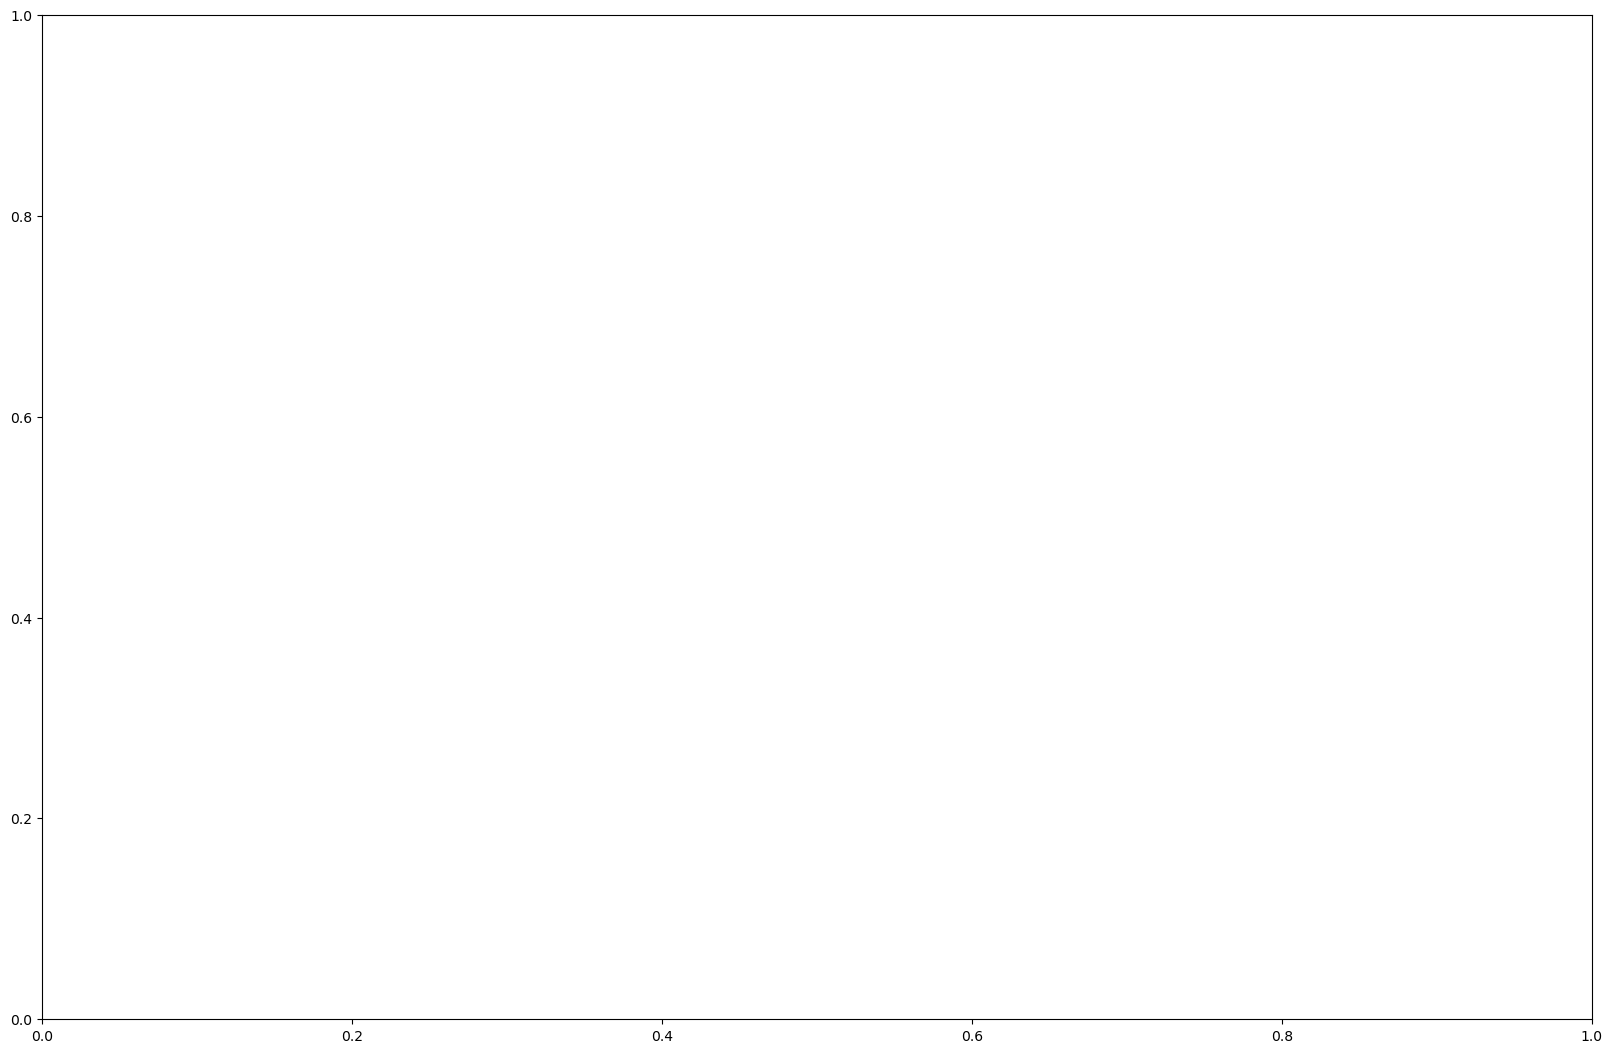

In [187]:
plt.figure(figsize=(20,60))
plt.subplot(411)
comparisonModels = comparisonModels.sort_values(by="F1", ascending=False)
label=sns.barplot(x="F1", y="Model", data=comparisonModels, palette="Greens_d")
labels(label)
plt.xticks(fontproperties='Arial Black', fontsize=16)
plt.yticks(fontproperties='Arial Black', fontsize=16)
plt.title('Figure 3: Résulat du score F1 des modèles du Maching Learning appliquer au dataset Healthcare', y=-0.1, fontproperties='Arial Black', fontsize=20)
plt.show()

NameError: name 'comparisonModels' is not defined

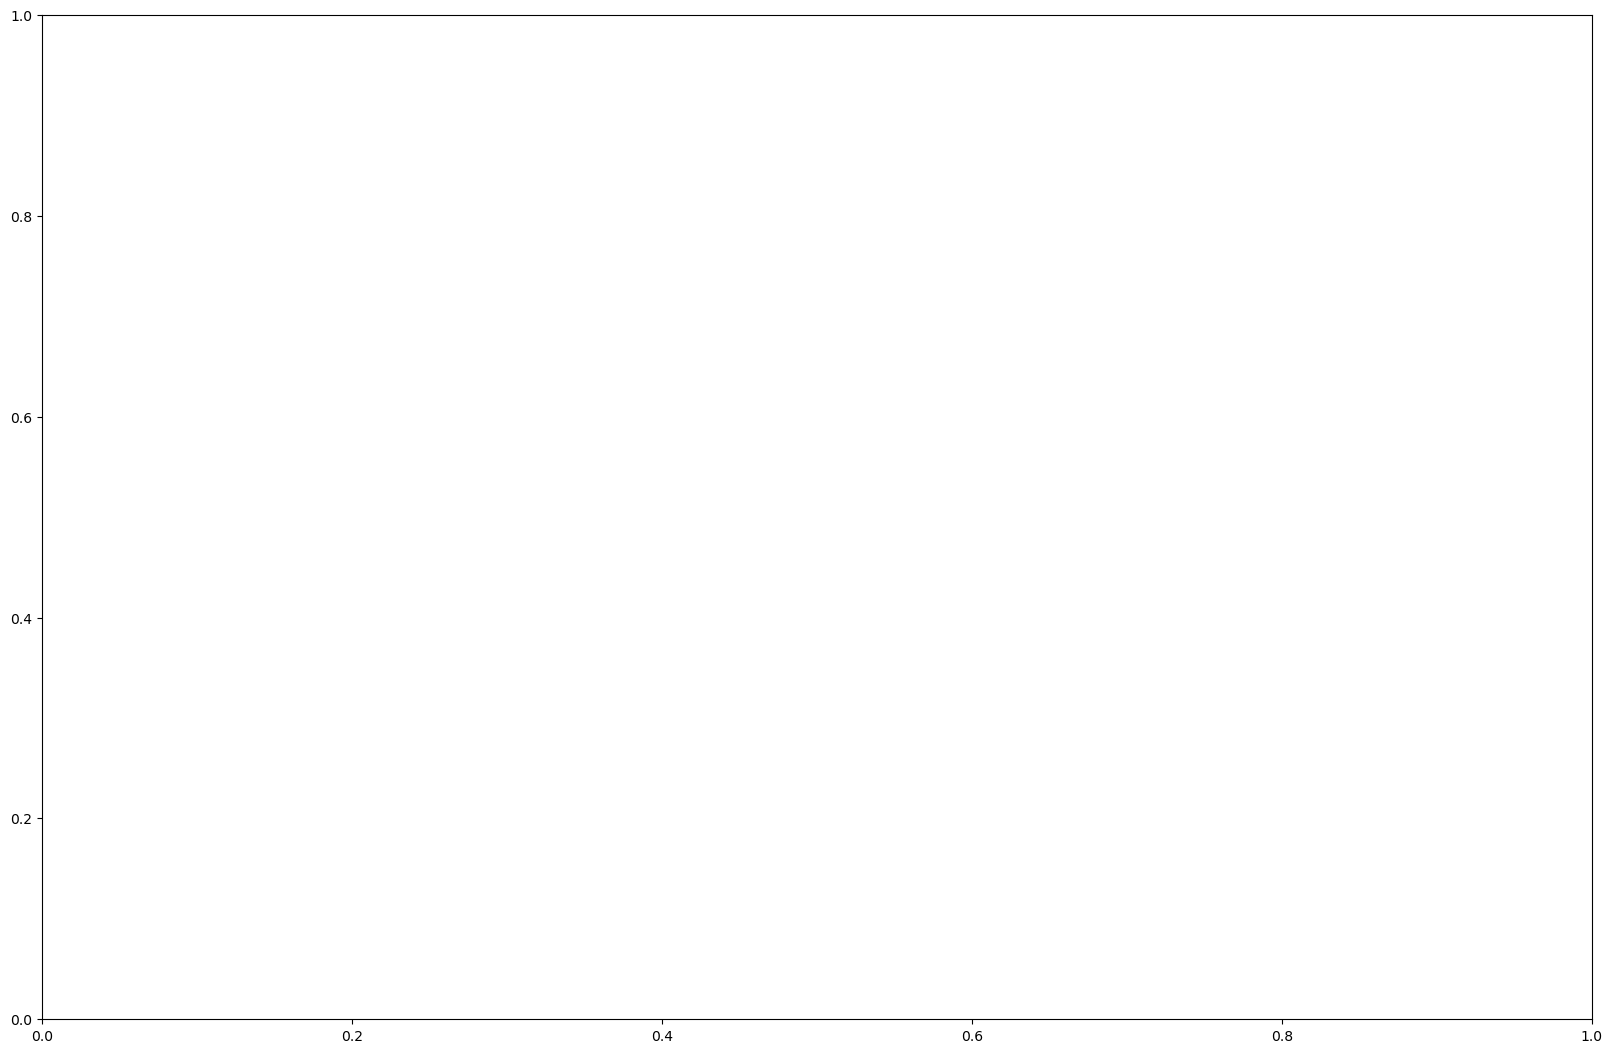

In [188]:
plt.figure(figsize=(20,60))
plt.subplot(411)
label=sns.barplot(x="Recall", y="Model", data=comparisonModels, palette="Greens_d")
labels(label)
plt.xticks(fontproperties='Arial Black', fontsize=16)
plt.yticks(fontproperties='Arial Black', fontsize=16)
plt.title('Figure 4: Résulat du score Recall des modèles du Maching Learning appliquer au dataset Healthcare', y=-0.1, fontproperties='Arial Black', fontsize=20)
plt.show()

NameError: name 'comparisonModels' is not defined

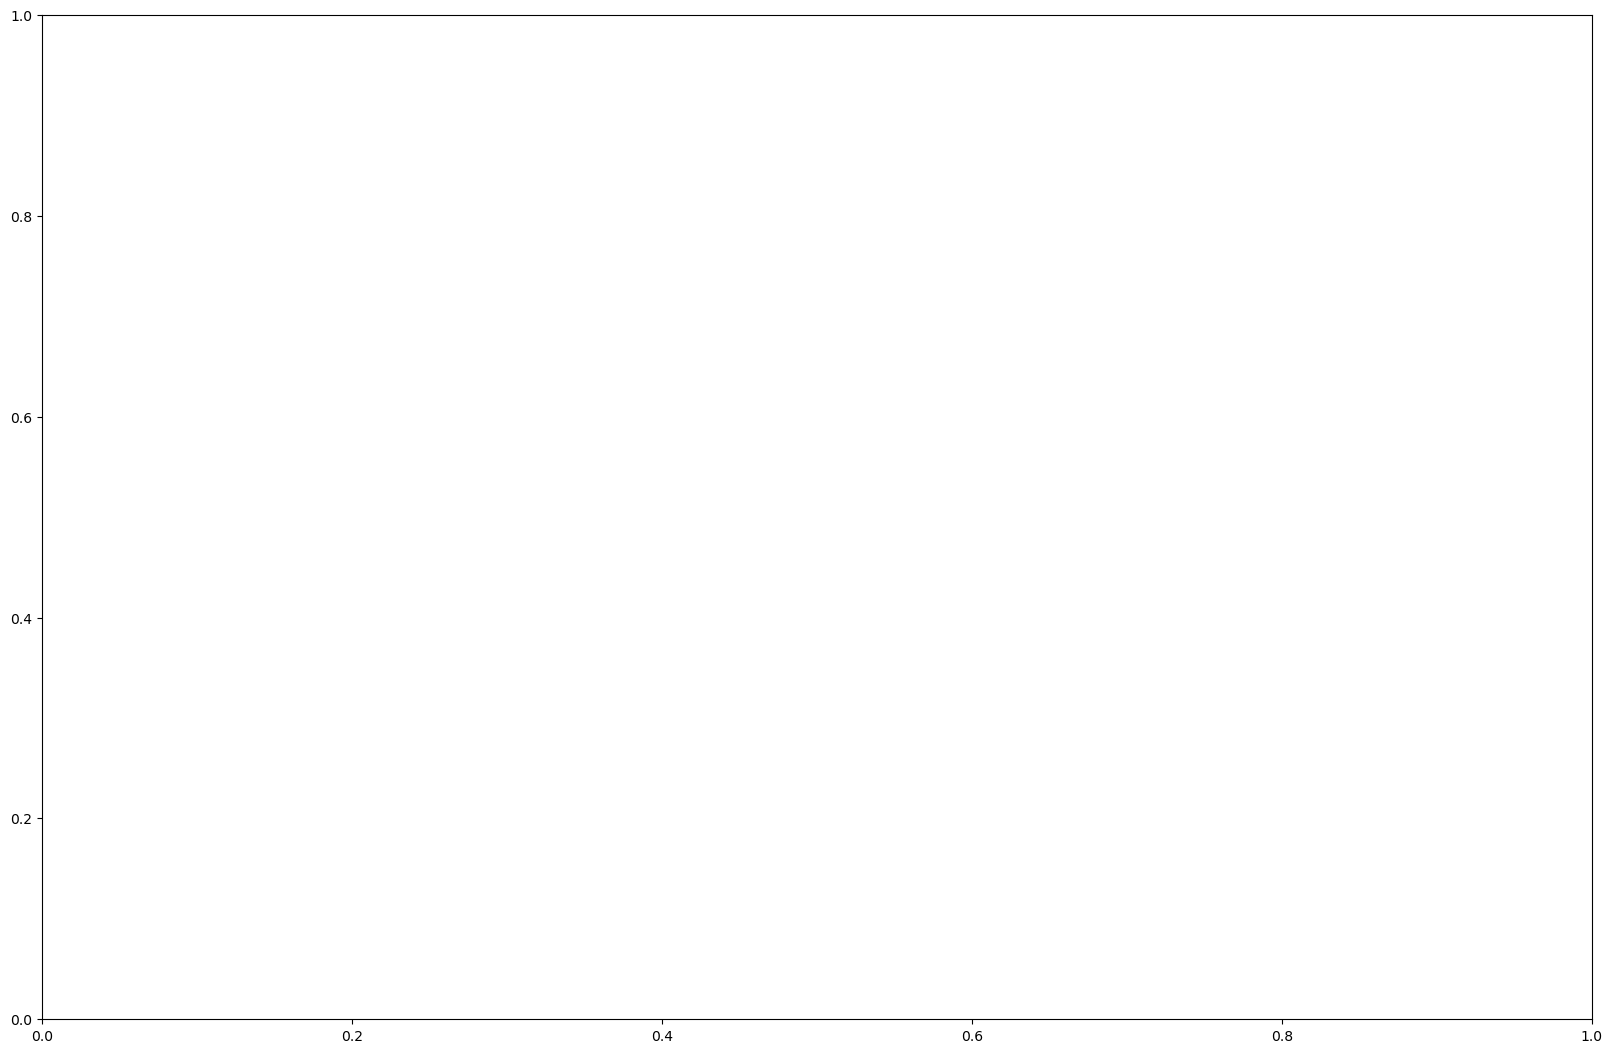

In [189]:
plt.figure(figsize=(20,60))
plt.subplot(411)
comparisonModels = comparisonModels.sort_values(by="Accuracy", ascending=False)
label=sns.barplot(x="Accuracy", y="Model", data=comparisonModels, palette="Greens_d")
labels(label)
plt.xticks(fontproperties='Arial Black', fontsize=16)
plt.yticks(fontproperties='Arial Black', fontsize=16)
plt.title('Figure 5: Résulat du score Accuracy des modèles du Maching Learning appliquer au dataset Healthcare', y=-0.1, fontproperties='Arial Black', fontsize=20)
plt.show()

NameError: name 'comparisonModels' is not defined

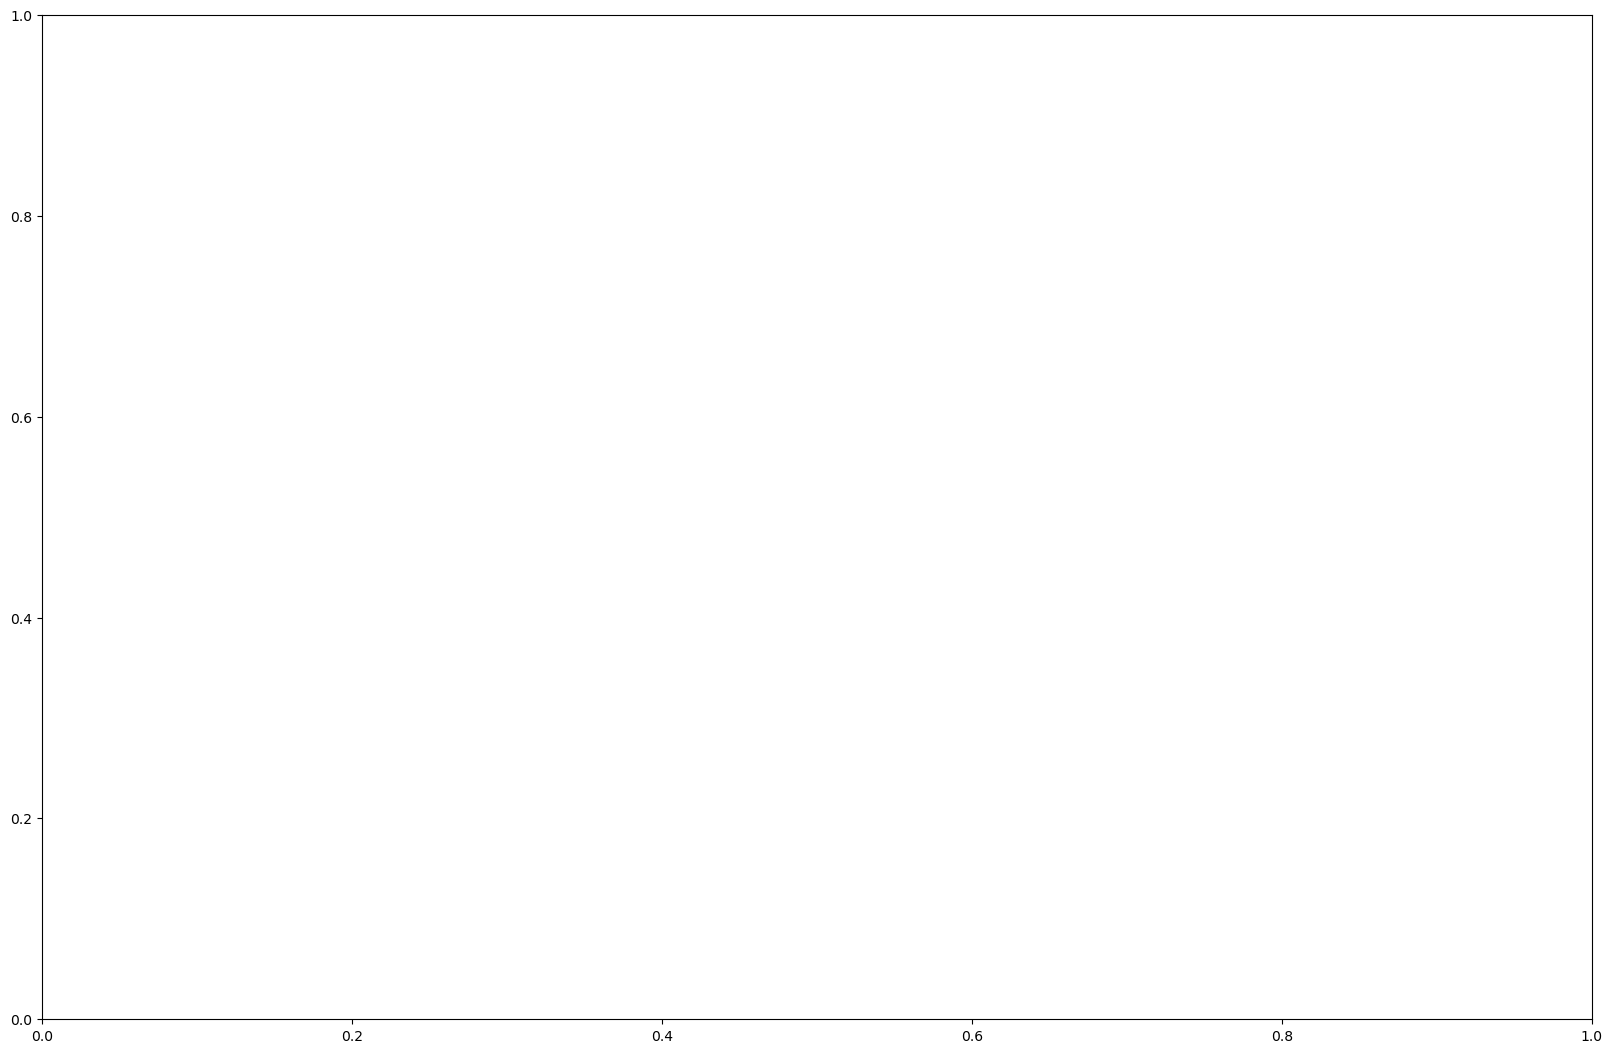

In [190]:
plt.figure(figsize=(20,60))
plt.subplot(411)
comparisonModels = comparisonModels.sort_values(by="ROC_AUC", ascending=False)
label=sns.barplot(x="ROC_AUC", y="Model", data=comparisonModels, palette="Greens_d")
labels(label)
plt.xticks(fontproperties='Arial Black', fontsize=16)
plt.yticks(fontproperties='Arial Black', fontsize=16)
plt.title('Figure 6: Résulat du score ROC_AUC des modèles du Maching Learning appliquer au dataset Healthcare', y=-0.1, fontproperties='Arial Black', fontsize=20)
plt.show()

NameError: name 'comparisonModels' is not defined

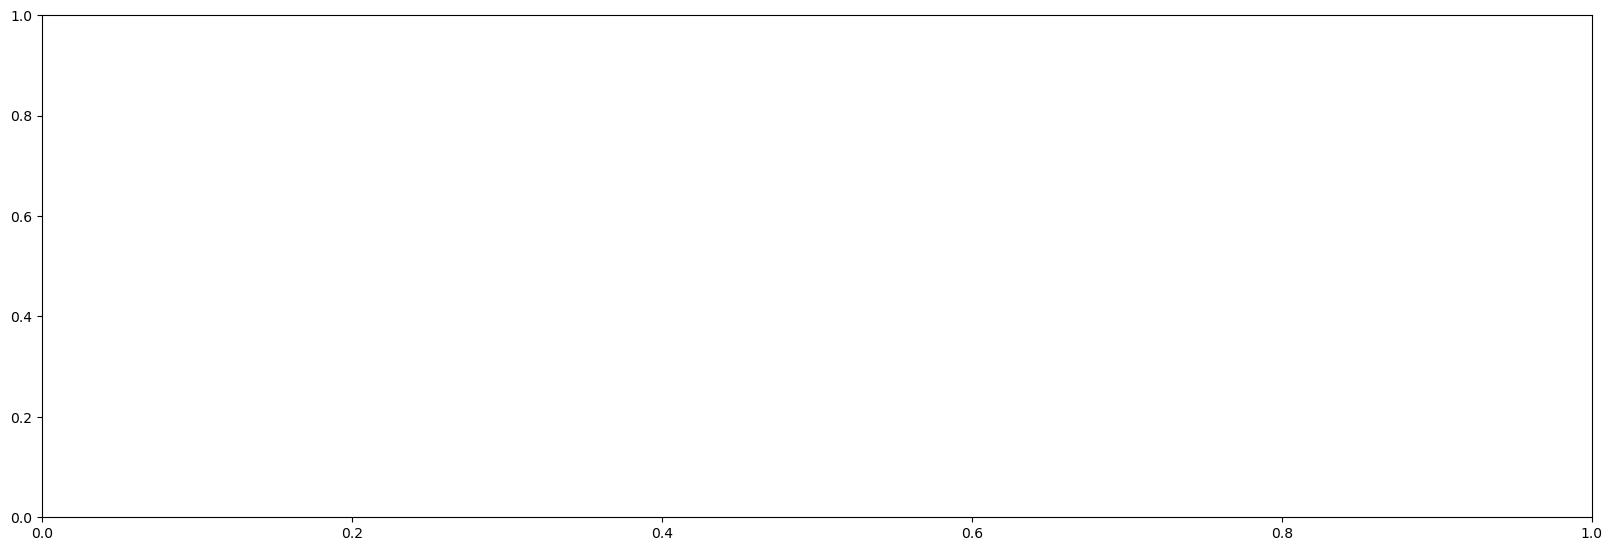

In [191]:
plt.figure(figsize=(20,30))
plt.subplot(411)
comparisonModels = comparisonModels.sort_values(by="F1", ascending=False)
label=sns.barplot(x="F1", y="Model", data=comparisonModels, palette="Greens_d")
labels(label)
plt.xticks(fontproperties='Arial Black', fontsize=16)
plt.yticks(fontproperties='Arial Black', fontsize=16)

plt.subplot(412)
comparisonModels = comparisonModels.sort_values(by="Recall", ascending=False)
label=sns.barplot(x="Recall", y="Model", data=comparisonModels, palette="Greens_d")
labels(label)
plt.xticks(fontproperties='Arial Black', fontsize=16)
plt.yticks(fontproperties='Arial Black', fontsize=16)

plt.subplot(413)
comparisonModels = comparisonModels.sort_values(by="Accuracy", ascending=False)
label=sns.barplot(x="Accuracy", y="Model", data=comparisonModels, palette="Greens_d")
labels(label)
plt.xticks(fontproperties='Arial Black', fontsize=16)
plt.yticks(fontproperties='Arial Black', fontsize=16)

plt.subplot(414)
comparisonModels = comparisonModels.sort_values(by="ROC_AUC", ascending=False)
label=sns.barplot(x="ROC_AUC", y="Model", data=comparisonModels, palette="Greens_d")
labels(label)
plt.xticks(fontproperties='Arial Black', fontsize=16)
plt.yticks(fontproperties='Arial Black', fontsize=16)

plt.title('Figure 6: Résulat des scores selon les modèles du Maching Learning appliquer au dataset Healthcare', 
          y=-0.2, fontproperties='Arial Black', fontsize=20)
plt.show()

# Conclusion

In [168]:
import pickle

In [169]:
# save the model to disk
pickle.dump(KNNGridModel, open('finalizedGridKNNModelHealthcare.sav', 'wb'))
# save the model to disk
pickle.dump(XGBoostClassifierGrid, open('finalizedGridXGBModelHealthcare.sav', 'wb'))
# save the model to disk
pickle.dump(GBGrid, open('finalizedGridGBModelHealthcare.sav', 'wb'))
# save the model to disk
pickle.dump(naiveBayesClassifierGrid, open('finalizedNBModelHealthcare.sav', 'wb'))





In [170]:
# load the model from disk
bestKNNClassifier = pickle.load(open('finalizedGridKNNModelHealthcare.sav', 'rb'))
bestXGBClassifier = pickle.load(open('finalizedGridXGBModelHealthcare.sav', 'rb'))
bestGBClassifier = pickle.load(open('finalizedGridGBModelHealthcare.sav', 'rb'))
bestNBClassifier = pickle.load(open('finalizedNBModelHealthcare.sav', 'rb'))




In [171]:
# Etat de deux personnes
dataPredict = {
    'age':[3, 74, 59], 
    'hypertension':[0, 0, 1],
    'heart_disease':[0, 0, 0],                     
    'avg_glucose_level':[97.84, 74.96, 57.11], 
    'bmi':[20, 26.6, 31.5],                            
    'gender_Female':[1, 1, 1],                    
    'gender_Male':[0, 0, 0],                      
    'gender_Other':[0, 0, 0],                      
    'ever_married_No':[1, 0, 0],                    
    'ever_married_Yes':[0, 1, 1],                   
    'work_type_Govt_job':[0, 0, 0],                 
    'work_type_Never_worked':[0, 0, 0],             
    'work_type_Private':[0, 0, 0],                  
    'work_type_Self-employed':[0, 1, 1],            
    'work_type_children':[1, 0, 0],                 
    'Residence_type_Rural':[0, 0, 0],               
    'Residence_type_Urban':[1, 1, 1],               
    'smoking_status_No Info':[1, 0, 0],            
    'smoking_status_formerly smoked':[0, 0, 0],    
    'smoking_status_never smoked':[0, 1, 1],      
    'smoking_status_smokes':[0, 0, 0], 
}


dataPredic = {'gender':['Male','Female'],
        'age':[78, 74], 
        'hypertension':[0, 0],
        'heart_disease':[0, 0], 
        'ever_married':['Yes', 'Yes'], 
        'work_type':['Self-employed', 'Self-employed'], 
        'Residence_type':['Urban', 'Urban'], 
        'avg_glucose_level':[78.56, 74.96], 
        'bmi':[29.2, 26.6], 
        'smoking_status':['formerly smoked', 'never smoked']
        }

In [172]:
# Prediction du resultat
dataPredict = pd.DataFrame(dataPredict)

In [173]:
sc = pickle.load(open('finalizedScalerHealthcare.sav', 'rb'))
dataPredict = sc.transform(dataPredict)
print(dataPredict)


[[-2.55356573 -0.47218777 -0.39826013 -0.38288497 -1.41685731  0.85133159
  -0.85123657 -0.0073751   1.93324567 -1.93324567 -0.37652998 -0.04550901
  -1.18160672 -0.55728894  4.18071668 -0.99144311  0.99144311  1.83499888
  -0.54655419 -0.77075918 -0.44989626]
 [ 0.82847764 -0.47218777 -0.39826013 -0.80055454 -0.42462251  0.85133159
  -0.85123657 -0.0073751  -0.51726483  0.51726483 -0.37652998 -0.04550901
  -1.18160672  1.79440131 -0.23919344 -0.99144311  0.99144311 -0.54495946
  -0.54655419  1.29742212 -0.44989626]
 [ 0.11396144  2.11780158 -0.39826013 -1.12640253  0.31203666  0.85133159
  -0.85123657 -0.0073751  -0.51726483  0.51726483 -0.37652998 -0.04550901
  -1.18160672  1.79440131 -0.23919344 -0.99144311  0.99144311 -0.54495946
  -0.54655419  1.29742212 -0.44989626]]


In [174]:
# Accuracy 97%
resulatKNN = bestKNNClassifier.predict(dataPredict)
print(resulatKNN)
resulatXGB = bestXGBClassifier.predict(dataPredict)
print(resulatXGB)
# Accuracy 95%
resulatGB = bestGBClassifier.predict(dataPredict)
print(resulatGB)
resulatNB = bestNBClassifier.predict(dataPredict)
print(resulatNB)



[0 1 1]
[0 1 1]
[0 1 1]
[0 1 1]
